<a href="https://colab.research.google.com/github/climate-and-health-datasci-Unicamp/py-climate-health-toolbox/blob/master/examples/Climatex_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climatex_example

This script is an example of how to use the functions from climatex.py, using an example dataset with measures of maximum and minimum temperature, humidity and pressure.




**Input files:** example_temperature.csv , example_humidity.csv, example_pressure.csv - Examples datasets

**Summary:**

- Computation of extreme climatic events:
  -  high humidity waves, low humidity waves, high pressure waves, low pressure waves, heat waves and cold waves
  - humidity above range and temperature above range
  - difference of humidity, difference of pressure and difference of temperature
- Computation and Description of Yearly and Seasonal Metrics for all the events



## Import libraries

In [1]:
!pip install -q py-climate-health-toolbox

In [2]:
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import datetime
import more_itertools as mit
import datetime
import io
import matplotlib.pyplot as plt
from datetime import timedelta
from calendar import isleap
from google.colab import drive
from google.colab import files

import climatex as tex

drive.mount('/content/drive')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Temperature


In [4]:
uploaded = files.upload()
df_temp = pd.read_csv(io.BytesIO(uploaded['example_temperature.csv']))

df_temp = df_temp.drop(columns = {'Unnamed: 0'})
df_temp['DATE'] = pd.to_datetime(df_temp['DATE']) #to datetime
df_temp['YEAR'] = df_temp['DATE'].dt.year
df_temp

Saving example_temperature.csv to example_temperature.csv


DATE  T_min(°C)  T_max(°C)  YEAR
0    1990-01-02       11.8       19.5  1990
1    1990-01-03       10.2       26.1  1990
2    1990-01-04       12.2       28.3  1990
3    1990-01-05       15.0       29.9  1990
4    1990-01-06       15.6       20.6  1990
...         ...        ...        ...   ...
9212 2015-12-27       13.1       28.3  2015
9213 2015-12-28       13.4       31.4  2015
9214 2015-12-29       14.7       24.3  2015
9215 2015-12-30       14.5       20.0  2015
9216 2015-12-31       13.0       28.0  2015

[9217 rows x 4 columns]

In [5]:
#define climatic normal for temperature
climatic_norm_temp = df_temp[(df_temp['YEAR']>=1990) & (df_temp['YEAR']<=2010)]
climatic_norm_temp

DATE  T_min(°C)  T_max(°C)  YEAR
0    1990-01-02       11.8       19.5  1990
1    1990-01-03       10.2       26.1  1990
2    1990-01-04       12.2       28.3  1990
3    1990-01-05       15.0       29.9  1990
4    1990-01-06       15.6       20.6  1990
...         ...        ...        ...   ...
7389 2010-12-27       10.9       29.4  2010
7390 2010-12-28       10.2       30.5  2010
7391 2010-12-29        9.7       31.4  2010
7392 2010-12-30       11.0       32.3  2010
7393 2010-12-31       12.3       32.0  2010

[7394 rows x 4 columns]

In [6]:
#define database for temperature
database_temp = df_temp[df_temp['YEAR']>2010]
database_temp

DATE  T_min(°C)  T_max(°C)  YEAR
7394 2011-01-01       12.7       32.0  2011
7395 2011-01-02       12.7       32.4  2011
7396 2011-01-03       13.9       32.5  2011
7397 2011-01-04       13.6       28.7  2011
7398 2011-01-05       13.1       31.5  2011
...         ...        ...        ...   ...
9212 2015-12-27       13.1       28.3  2015
9213 2015-12-28       13.4       31.4  2015
9214 2015-12-29       14.7       24.3  2015
9215 2015-12-30       14.5       20.0  2015
9216 2015-12-31       13.0       28.0  2015

[1823 rows x 4 columns]

### Cold Wave

3 ou more consecutive days with both minimum and maximum temperature below the 10th percentile.

In [7]:
help(tex.check_ColdWave)

Help on function check_ColdWave in module climatex:

check_ColdWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.1, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Cold Waves on the database according to the Climatic Normal
    ##
    ## Checks for Cold Waves on the database according to the Climatic Normal This
    ## function uses Geirinhas et al. 2018 method. It obtains first a dataframe with
    ## the percentiles computed from the Climatic Normal according to the defined
    ## window size Then compares it with the database, to check if the maximum and
    ## minimum temperatures are below the corresponding percentile. If the
    ## temperatures are above the threshold, the column 'below_pct' receives 1. This
    ## column is then used to identify if there are 3 or more consec

In [8]:
#get dataframe with columns 'below_pct' and 'CW' indicating the occurence of a cold wave
#and the dataframe with the 10th percentile for maximum and minimum temperature
database_temp, df_pct = tex.check_ColdWave(database_temp,'T_max(°C)','T_min(°C)',climatic_norm_temp,'T_max(°C)','T_min(°C)')

In [9]:
database_temp

DAY365       DATE  T_min(°C)  T_max(°C)    YEAR  below_pct  CW
0          1 2011-01-01       12.7       32.0  2011.0          0   0
1          2 2011-01-02       12.7       32.4  2011.0          0   0
2          3 2011-01-03       13.9       32.5  2011.0          0   0
3          4 2011-01-04       13.6       28.7  2011.0          0   0
4          5 2011-01-05       13.1       31.5  2011.0          0   0
...      ...        ...        ...        ...     ...        ...  ..
1820     361 2015-12-27       13.1       28.3  2015.0          0   0
1821     362 2015-12-28       13.4       31.4  2015.0          0   0
1822     363 2015-12-29       14.7       24.3  2015.0          0   0
1823     364 2015-12-30       14.5       20.0  2015.0          0   0
1824     365 2015-12-31       13.0       28.0  2015.0          0   0

[1825 rows x 7 columns]

In [10]:
df_pct

CMX10pct  CMN10pct
DAY365                    
1          22.41     11.51
2          22.16     11.42
3          21.96     11.23
4          21.84     11.20
5          22.00     11.20
...          ...       ...
361        22.92     10.20
362        22.50     10.20
363        22.85     10.75
364        23.30     11.20
365        22.89     11.20

[365 rows x 2 columns]

In [11]:
help(tex.wave_metrics)

Help on function wave_metrics in module climatex:

wave_metrics(df_checkW, wave_column, plot=False)
    #-------------------------------------------------------------------------------
    ## Function to obtain the yearly metrics of a Wave given the database
    ## dataframe containing the 'HW'/'CW'/'LPW'/'HPW'/'LHW'/'HHW' column that
    ## indicates if a day is inside of a Wave or not (check get_wave function).
    ## This function obtains the number of events (HWN/CWN/LPWN/HPWN/LHWN/HHWN),
    ## the event with maximum duration (HWD/CWD/LPWD/HPWD/LHWD/HHWD) and the 
    ## cumulative sum of wave durations (HWF/CWF/LPWF/HPWF/LHWF/HHWF) for each 
    ## year of the dataframe. These metrics are stored in a dataframe which includes the
    ## Wave metrics for each year of the database.
    ##
    ## It is possible to plot the metrics (plot=True). For a better adjustment of
    ## the plots, check function plot_oneMetric.
    ##
    ## :param      df_checkW:    Database dataframe with th

CWN  CWD   CWF
YEAR                
2011  2.0  3.0   6.0
2012  2.0  3.0   6.0
2013  4.0  4.0  15.0
2014  0.0  0.0   0.0
2015  0.0  0.0   0.0

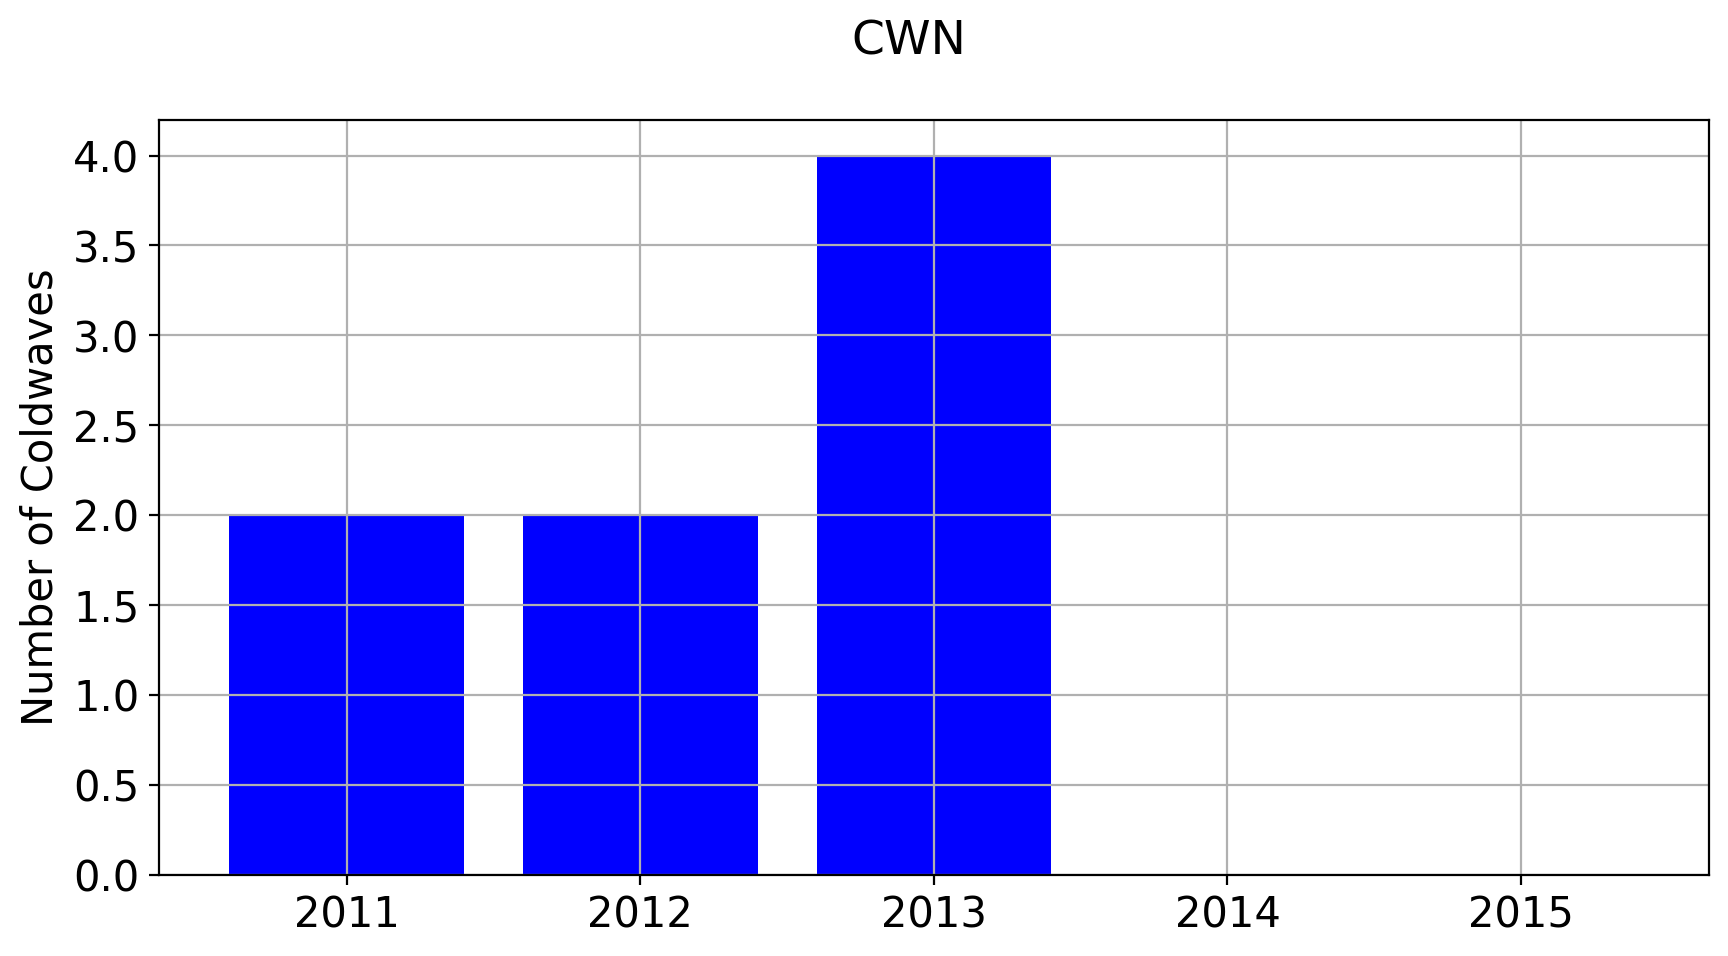

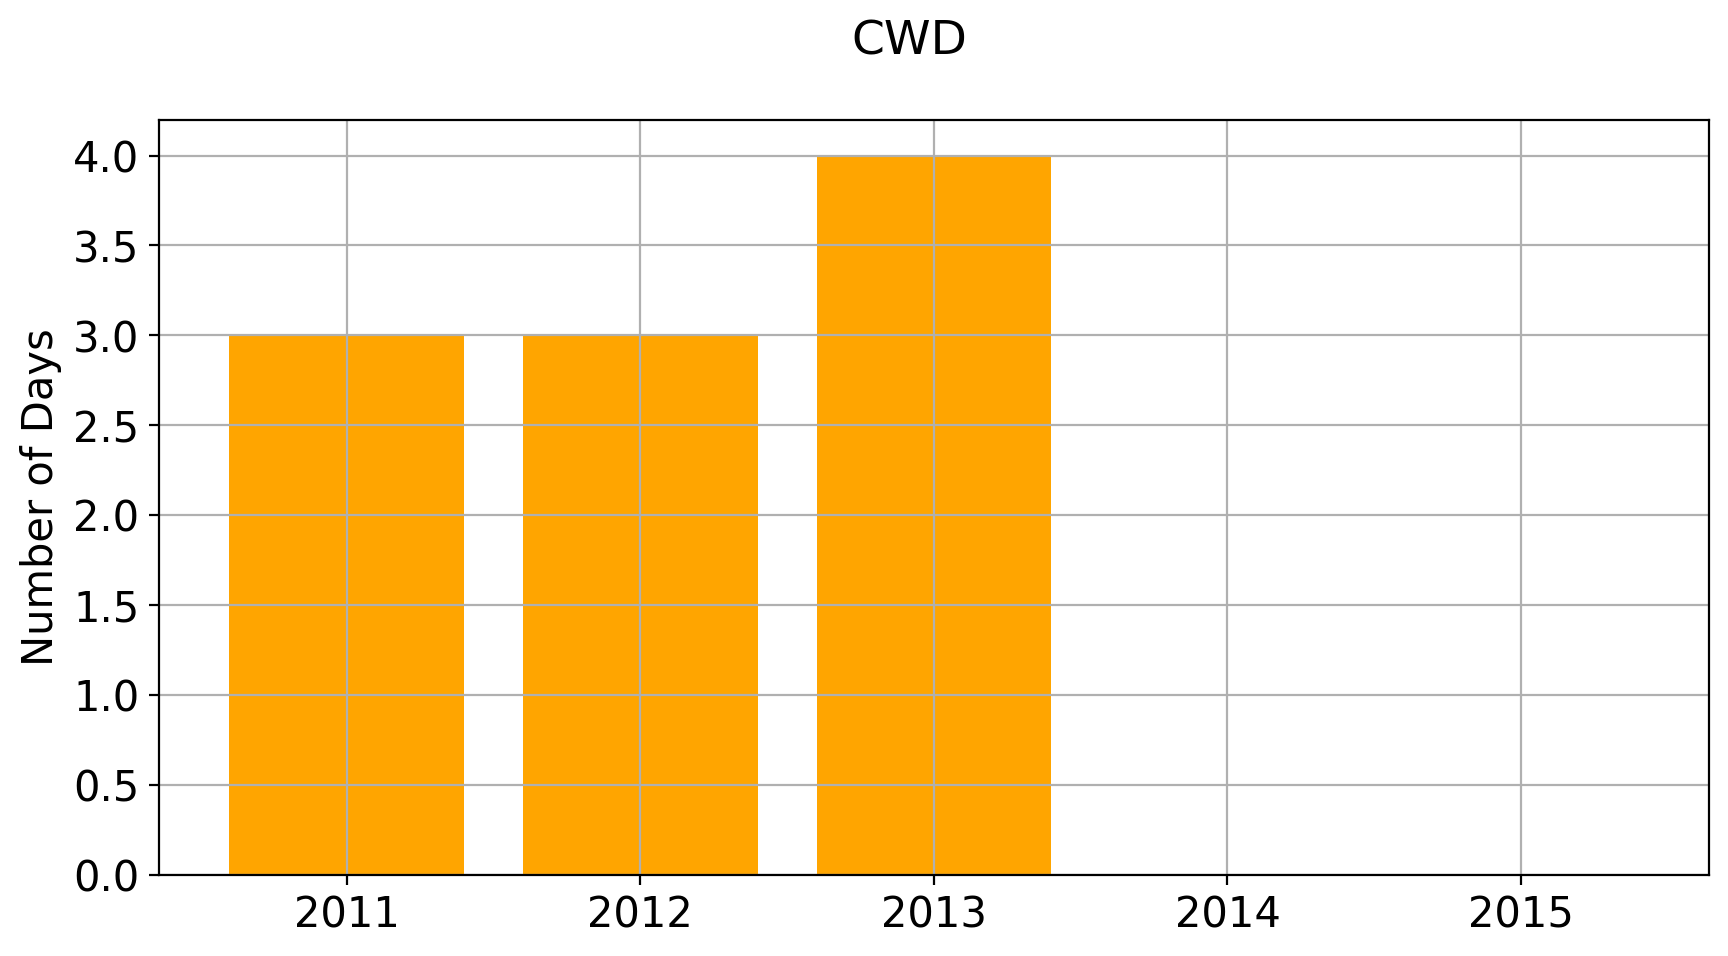

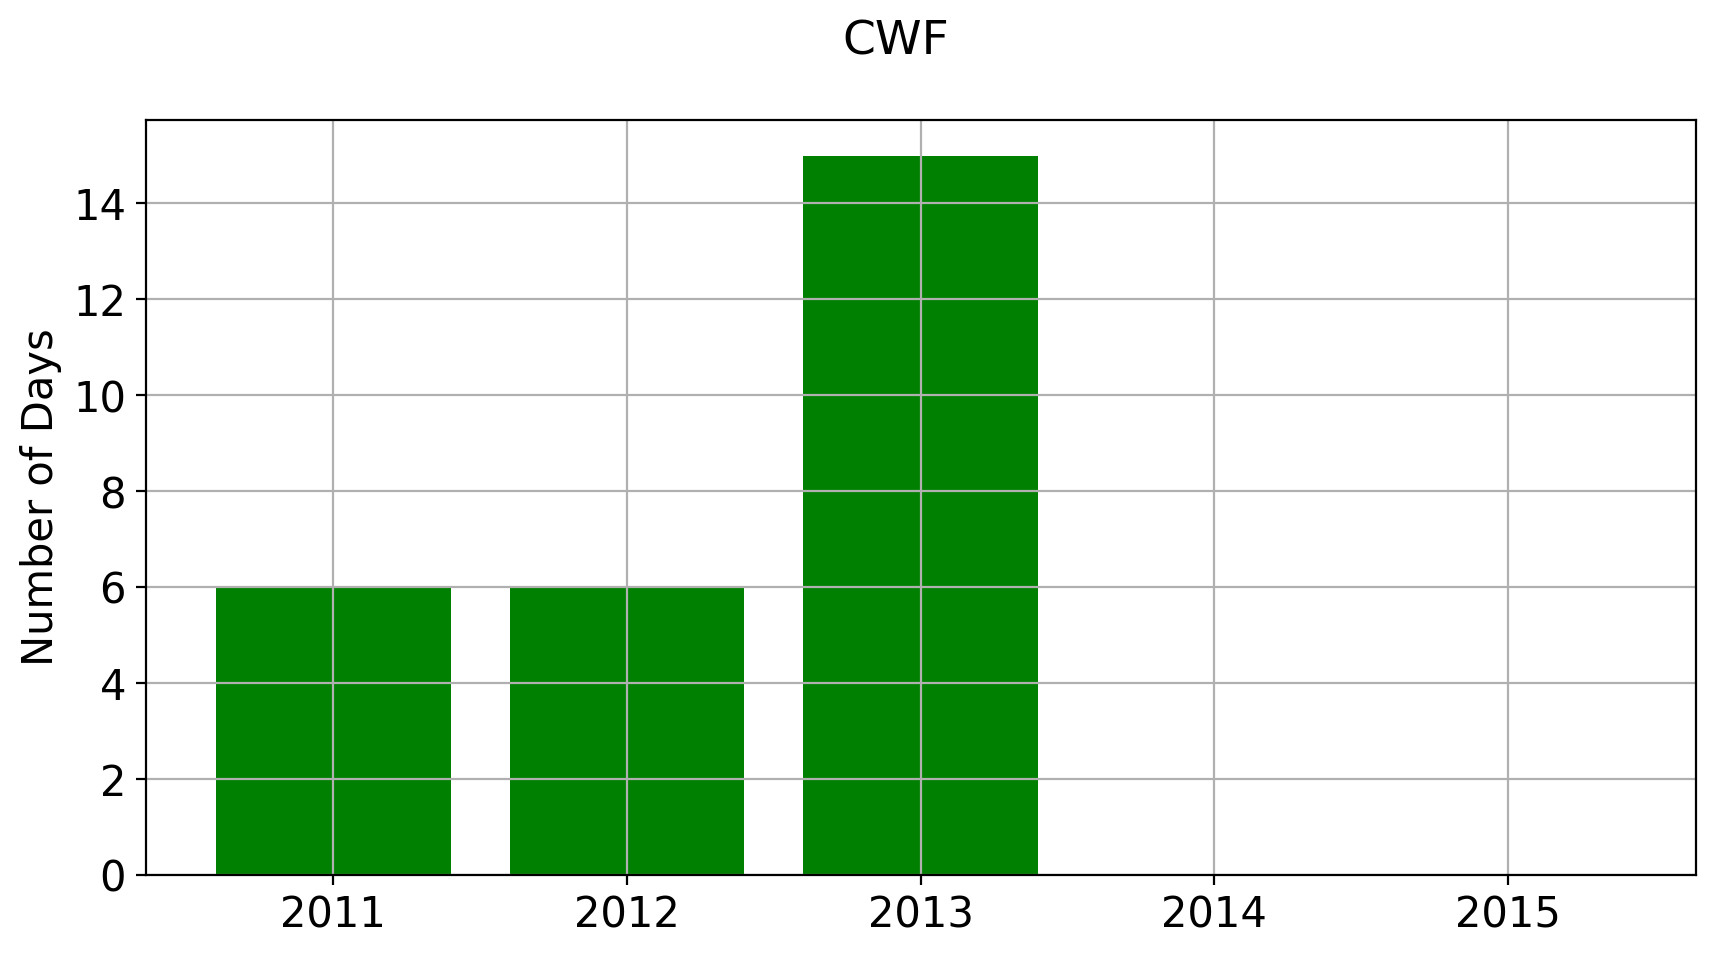

In [12]:
tex.wave_metrics(database_temp,'CW',plot=True)

In [13]:
help(tex.wave_seasonMetrics)

Help on function wave_seasonMetrics in module climatex:

wave_seasonMetrics(df_checkW, wave_column, plot=False)
    #-------------------------------------------------------------------------------
    ## Function to obtain the seasonal metrics of a Wave given the
    ## database dataframe containing the 'HW'/'CW'/'LPW'/'HPW'/'LHW'/'HHW' column
    ## that indicates if a day is part of a Wave or not (check get_wave function).
    ## This function obtains the number of events (HWN/CWN/LPWN/HPWN/LHWN/HHWN),
    ## the event with maximum duration (HWD/CWD/LPWD/HPWD/LHWD/HHWD) and the
    ## cumulative sum of wave durations (HWF/CWF/LPWF/HPWF/LHWF/HHWF) for all seasons
    ## (summer, autumn, winter and spring) of each year of the dataframe. These
    ## metrics are stored in a dataframe which includes the Wave metrics
    ## for each year of the database, separated by seasons.
    ##
    ## The calendar year adopted is from december of previous year until november of
    ## actual year.
  

CWN  CWD  CWF
YEAR SEASON               
2011 1       0.0  0.0  0.0
     2       0.0  0.0  0.0
     3       1.0  3.0  3.0
     4       1.0  3.0  3.0
2012 1       1.0  3.0  3.0
     2       1.0  3.0  3.0
     3       0.0  0.0  0.0
     4       0.0  0.0  0.0
2013 1       0.0  0.0  0.0
     2       1.0  4.0  4.0
     3       2.0  4.0  7.0
     4       1.0  4.0  4.0
2014 1       0.0  0.0  0.0
     2       0.0  0.0  0.0
     3       0.0  0.0  0.0
     4       0.0  0.0  0.0
2015 1       0.0  0.0  0.0
     2       0.0  0.0  0.0
     3       0.0  0.0  0.0
     4       0.0  0.0  0.0

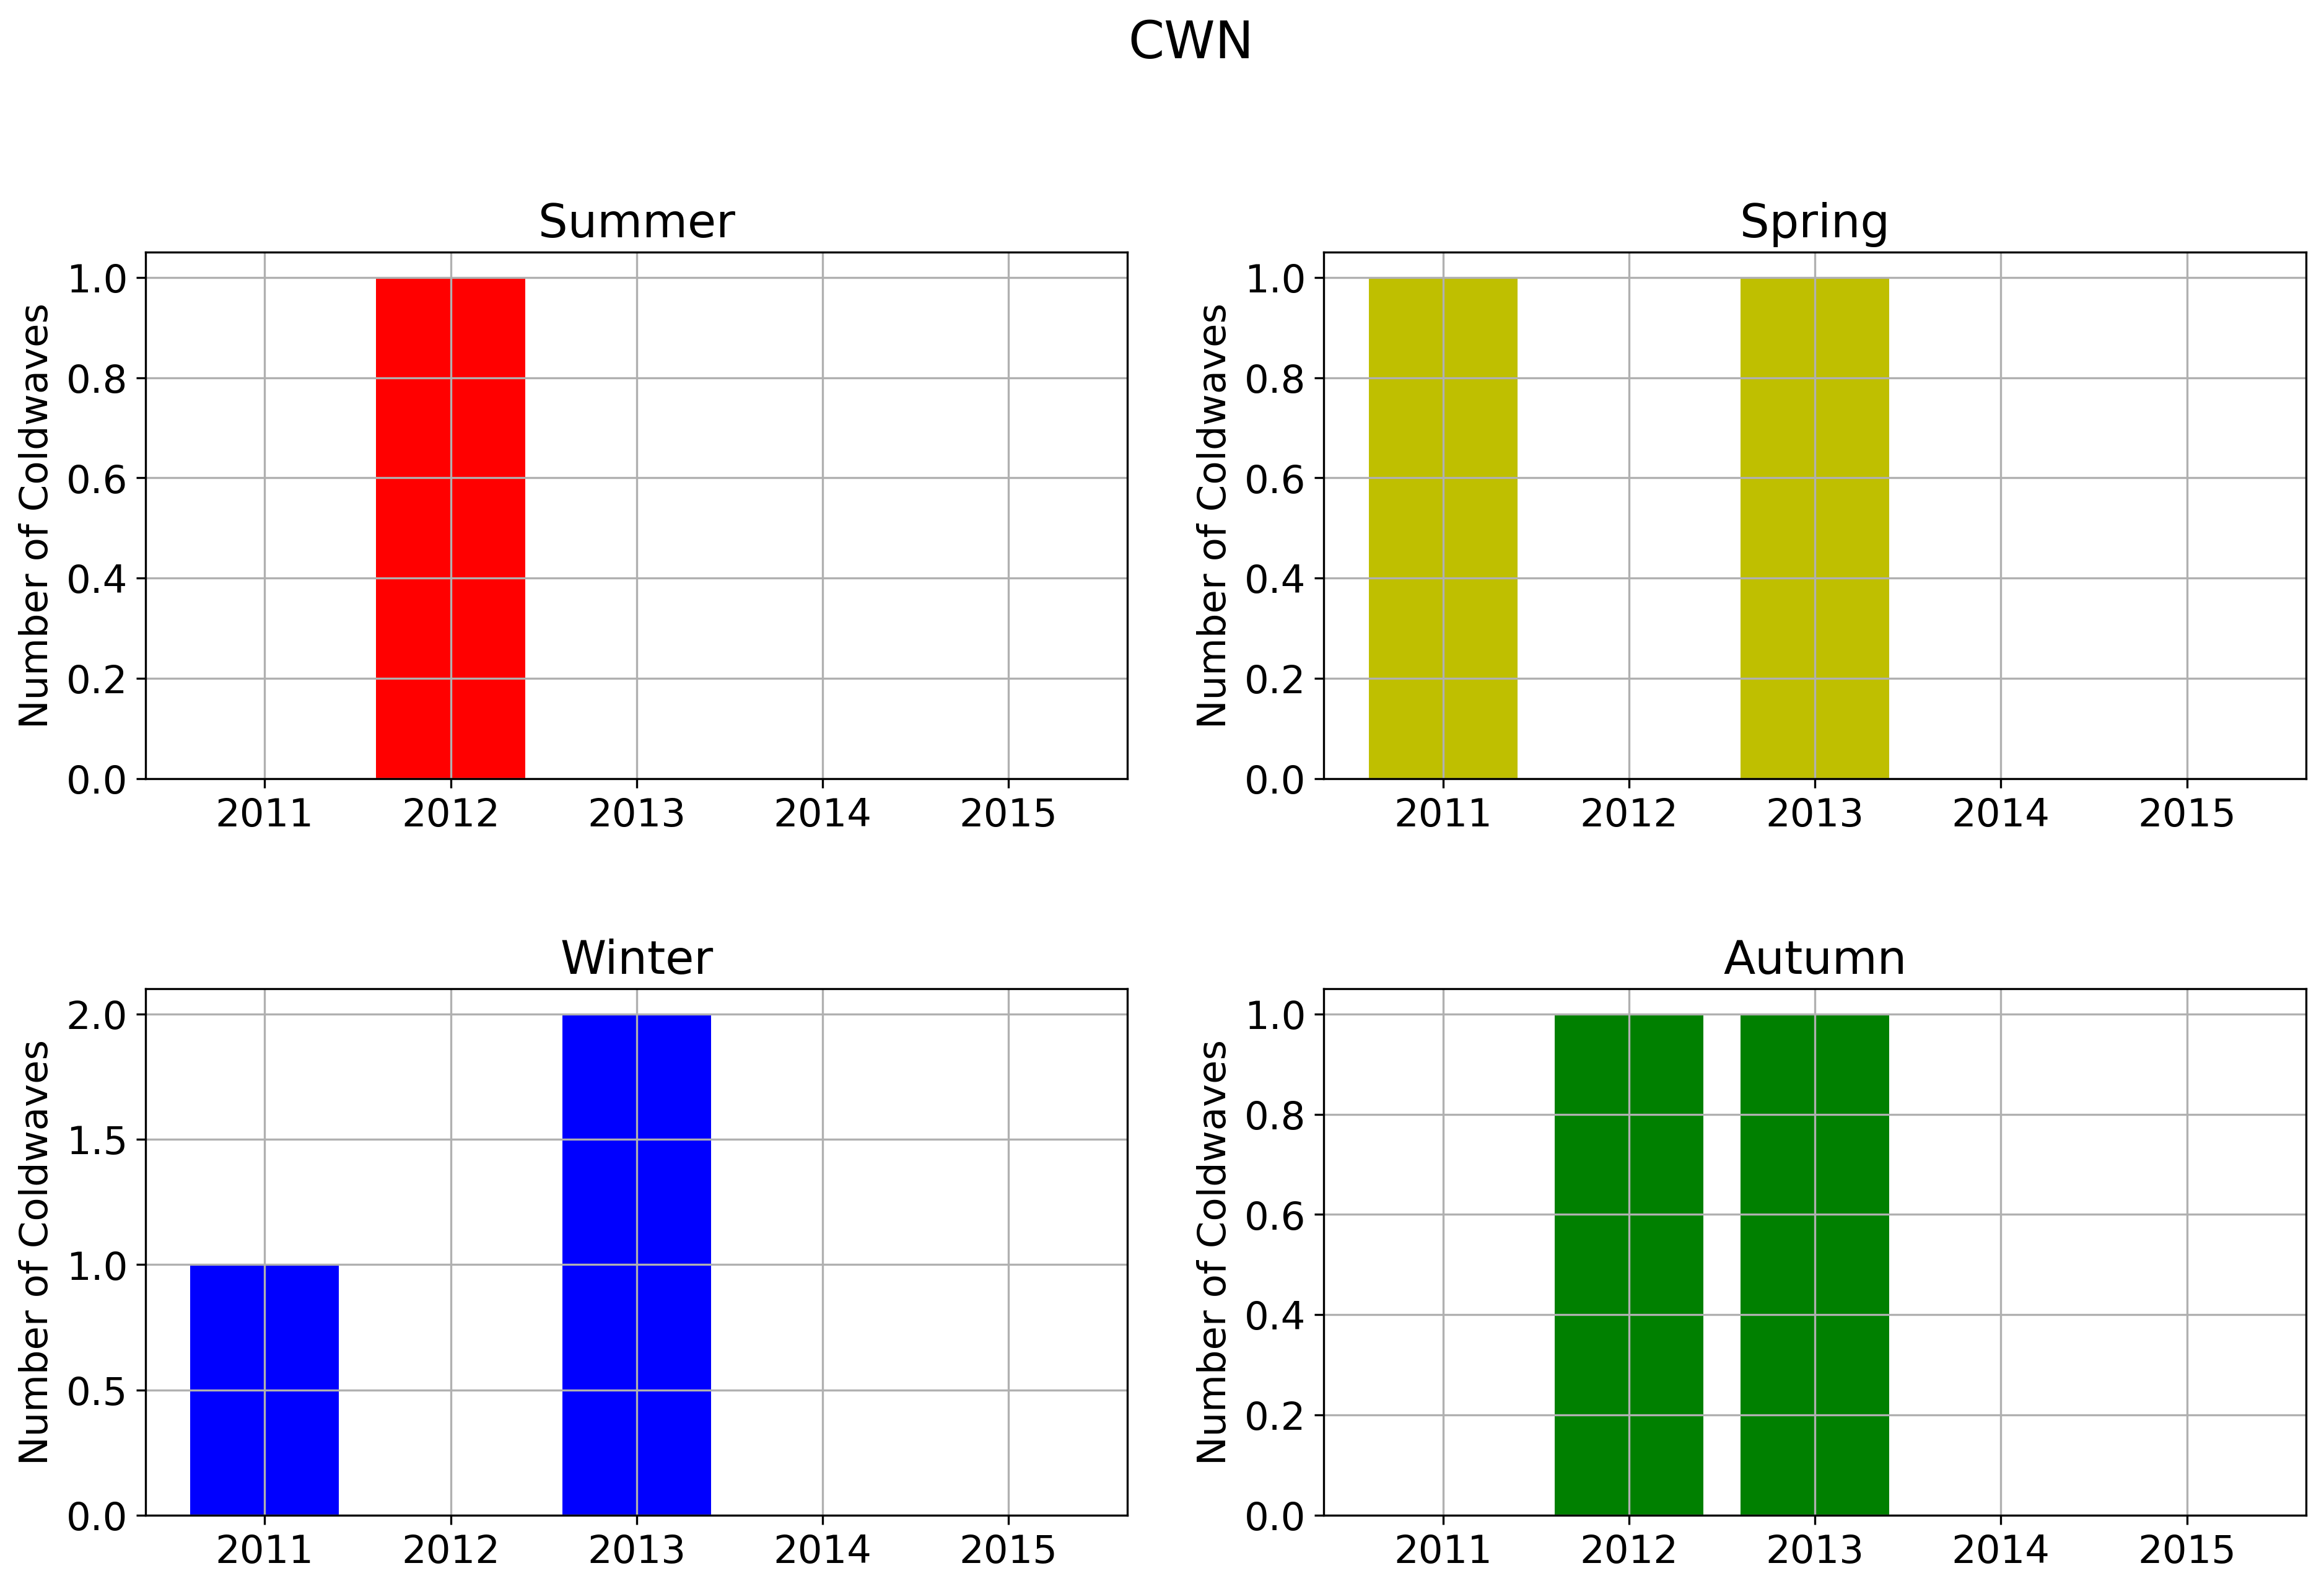

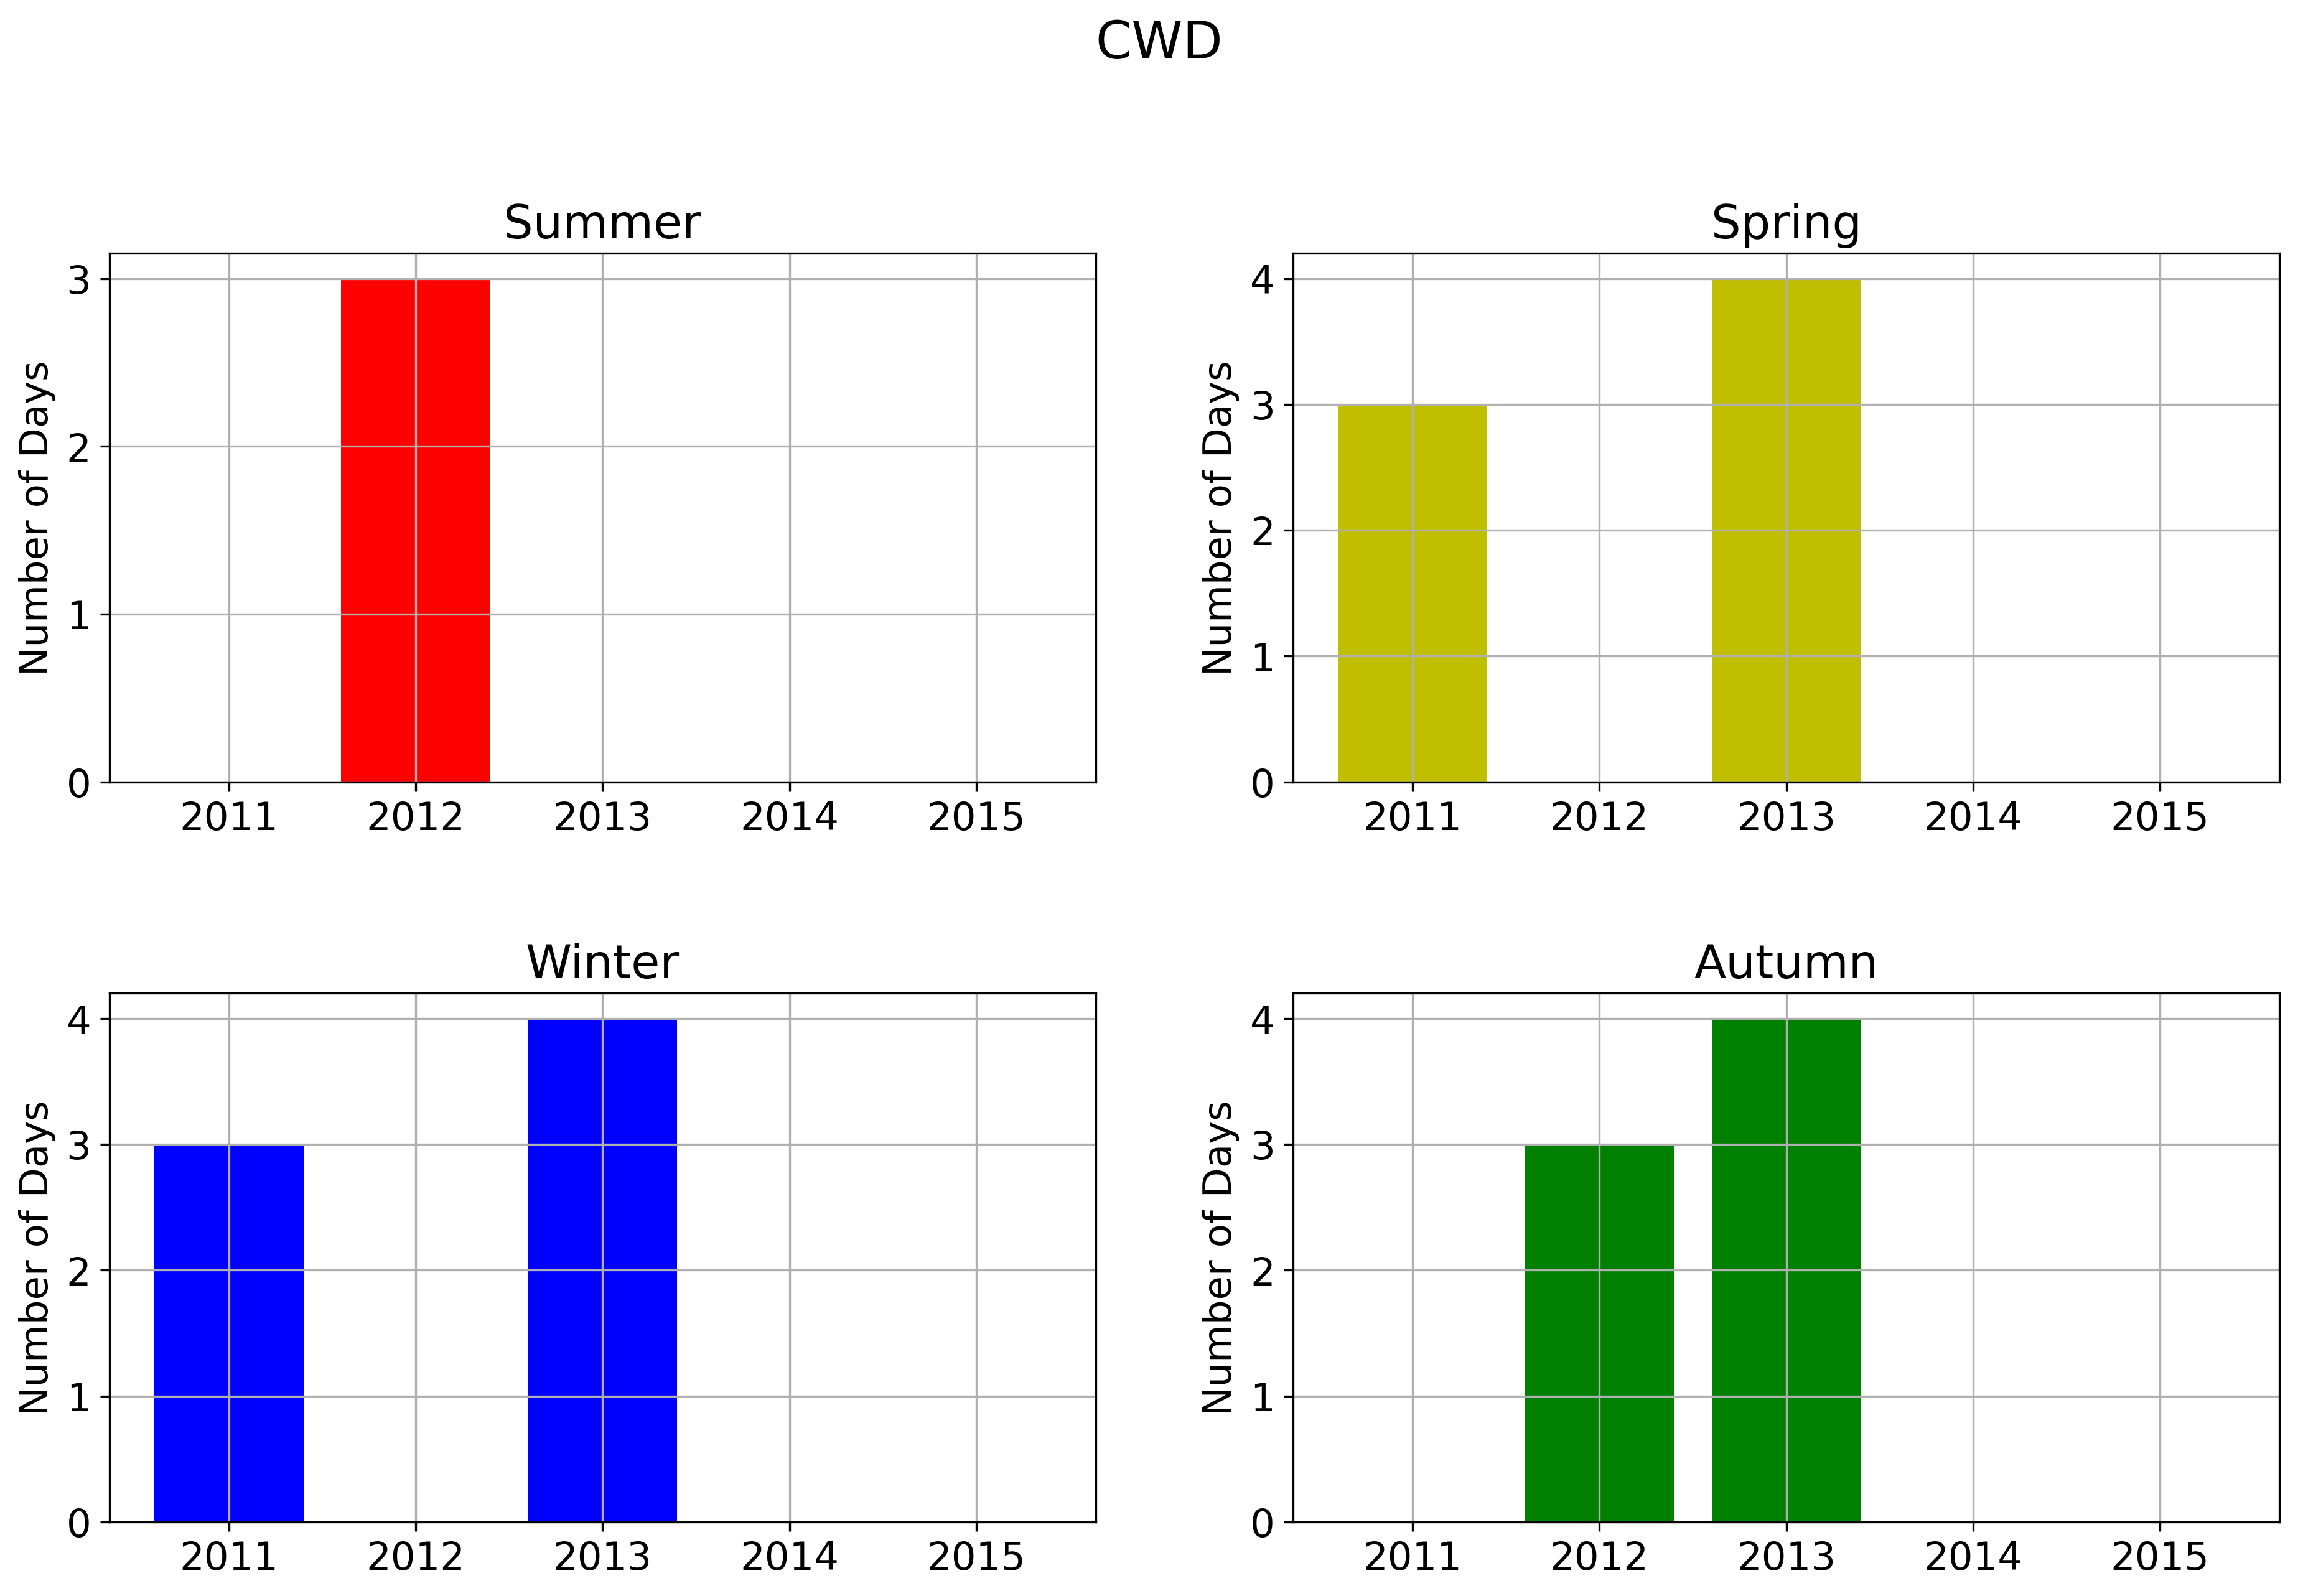

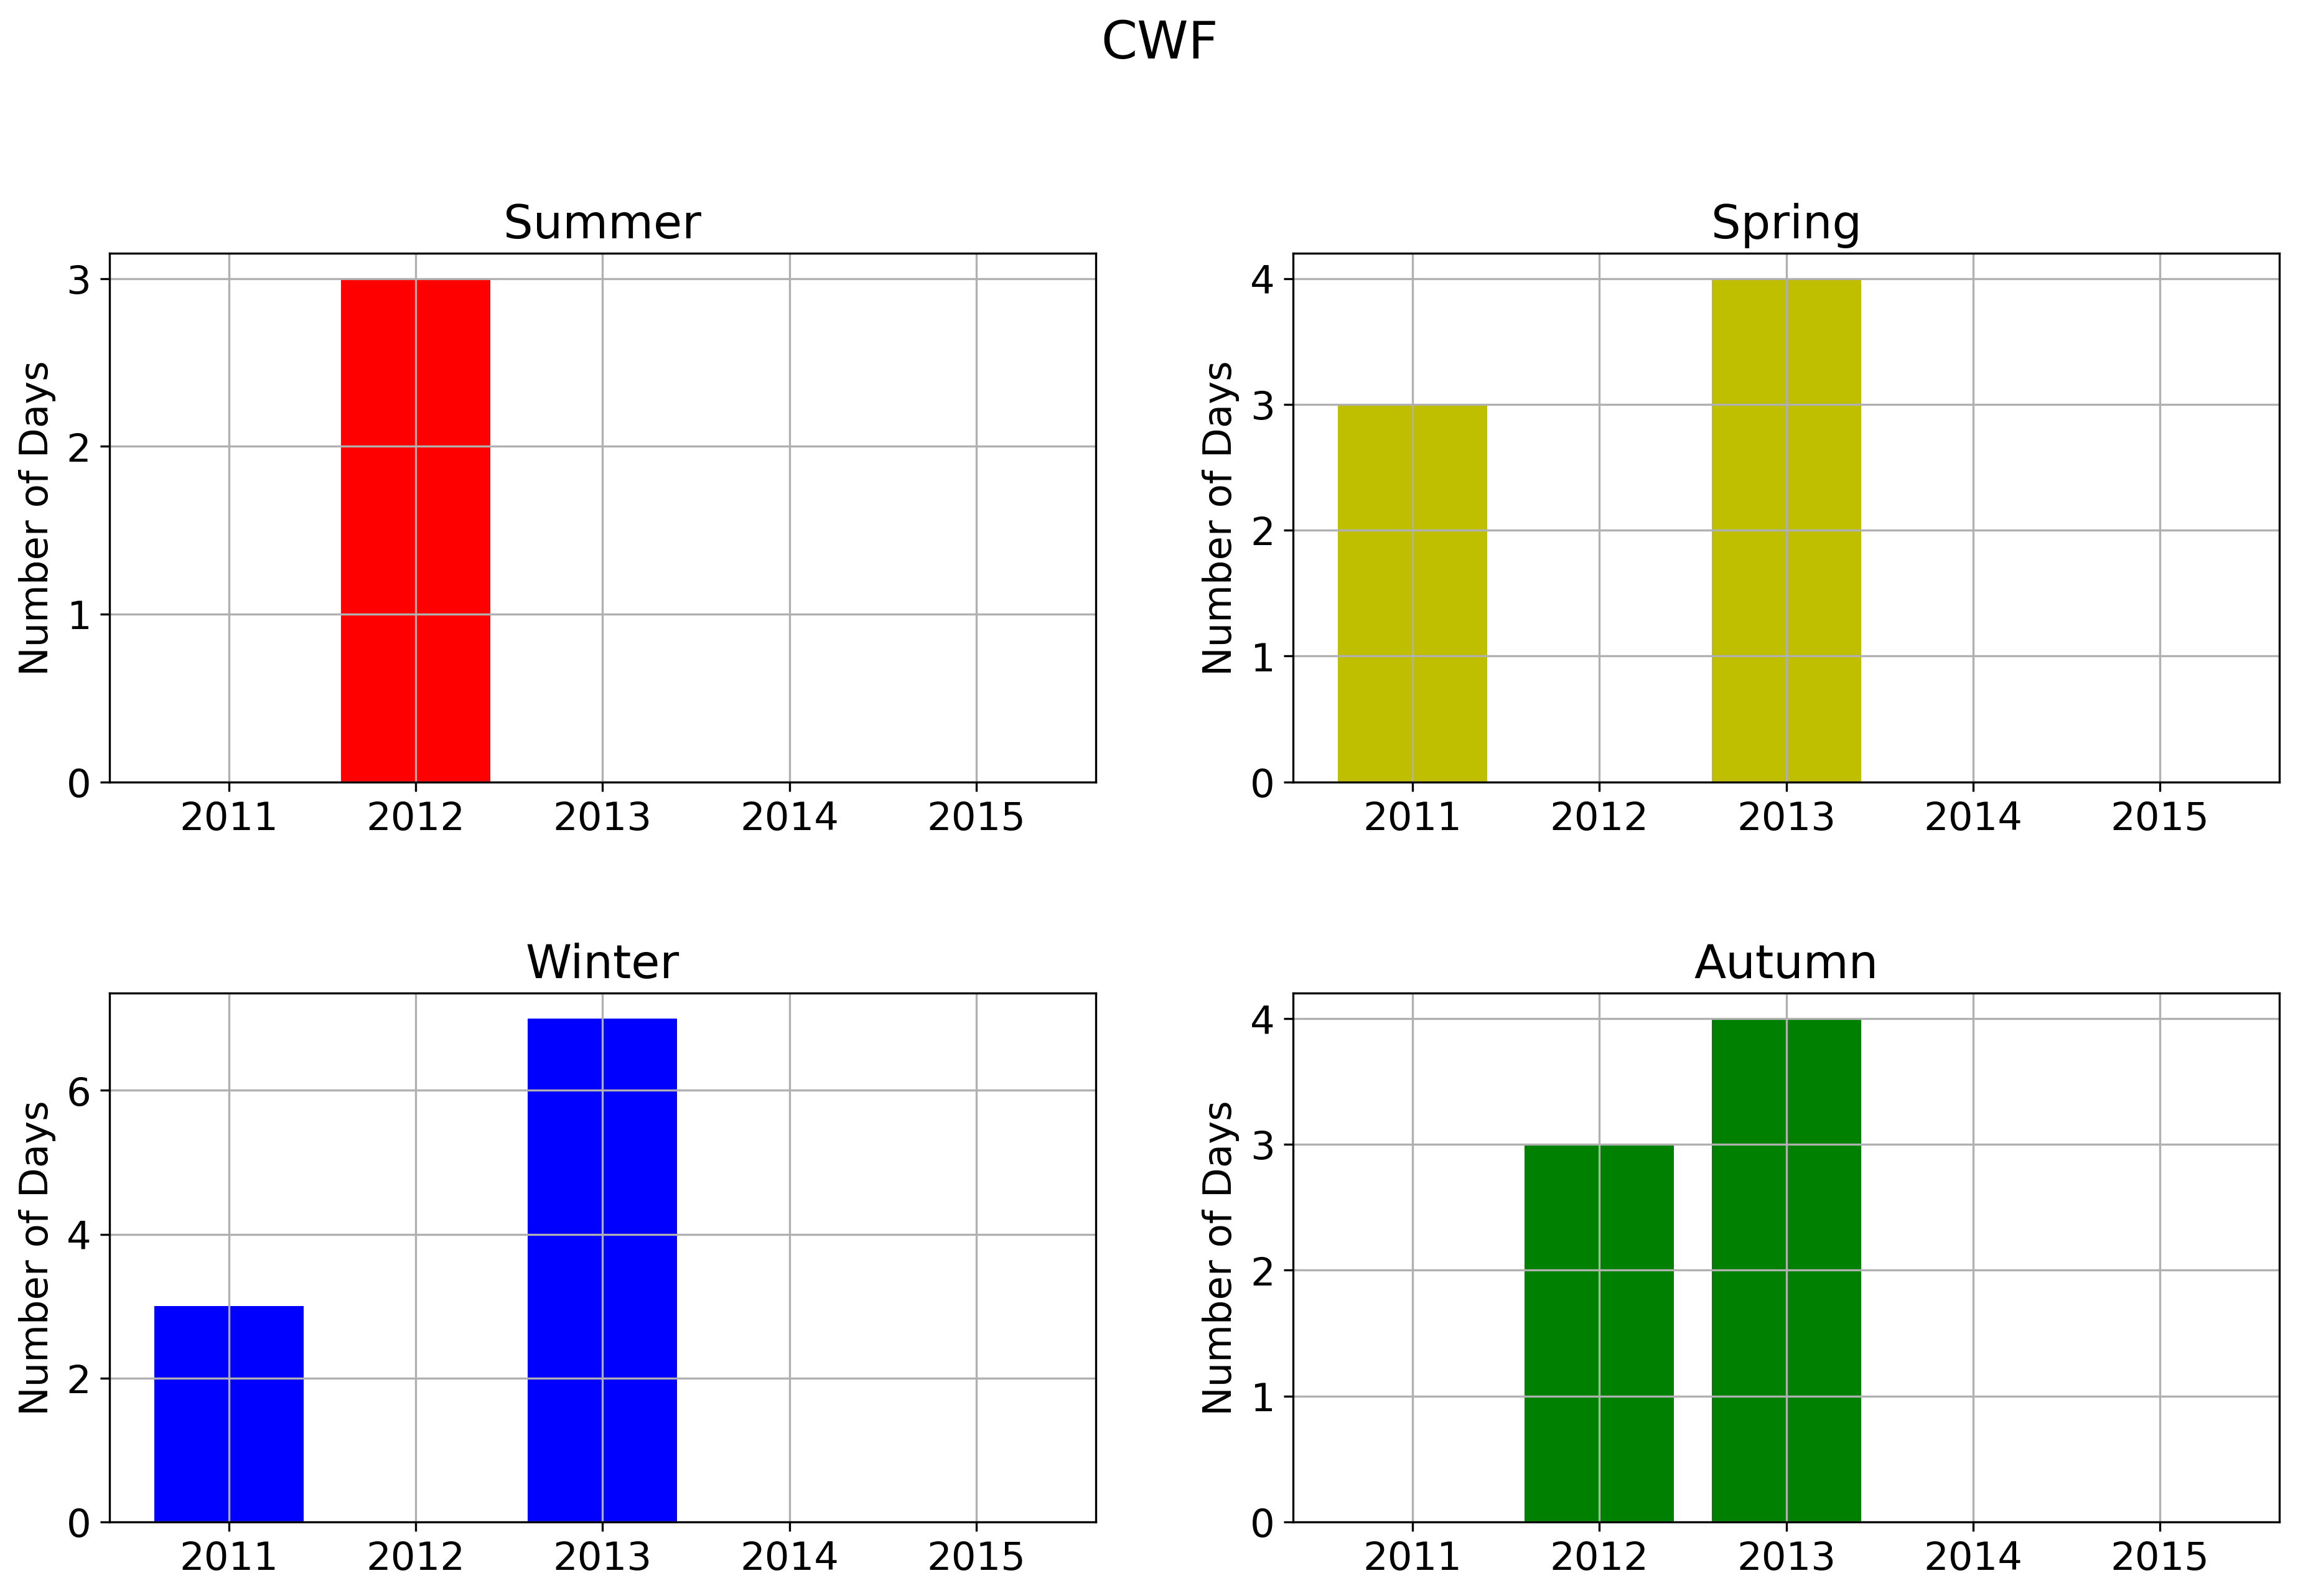

In [14]:
tex.wave_seasonMetrics(database_temp,'CW',True)

### Heat Wave

3 ou more consecutive days with both minimum and maximum temperature above the 90th percentile.

In [15]:
help(tex.check_HeatWave)

Help on function check_HeatWave in module climatex:

check_HeatWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Heat Waves on the database according to the Climatic Normal This
    ## function uses Geirinhas et al. 2018 method. It obtains first a dataframe with
    ## the percentiles computed from the Climatic Normal according to the defined
    ## window size (df_pct). Then compares it with the database, to check if the
    ## maximum and minimum temperatures are above the corresponding percentile. If
    ## the temperatures are above the threshold, the column 'above_pct' receives 1.
    ## This column is then used to identify if there are 3 or more consecutive
    ## extremely warm days (Heat Wave). The column 'HW' then receives

In [16]:
#get dataframe with columns 'above_pct' and 'HW' indicating the occurence of a heat wave
#and the dataframe with the 90th percentile for maximum and minimum temperature
database_temp, df_pct = tex.check_HeatWave(database_temp,'T_max(°C)','T_min(°C)',climatic_norm_temp,'T_max(°C)','T_min(°C)')

In [17]:
database_temp

DAY365       DATE  T_min(°C)  T_max(°C)  ...  below_pct   CW  above_pct  HW
0          1 2011-01-01       12.7       32.0  ...        0.0  0.0          0   0
1          2 2011-01-02       12.7       32.4  ...        0.0  0.0          0   0
2          3 2011-01-03       13.9       32.5  ...        0.0  0.0          0   0
3          4 2011-01-04       13.6       28.7  ...        0.0  0.0          0   0
4          5 2011-01-05       13.1       31.5  ...        0.0  0.0          0   0
...      ...        ...        ...        ...  ...        ...  ...        ...  ..
1820     361 2015-12-27       13.1       28.3  ...        0.0  0.0          0   0
1821     362 2015-12-28       13.4       31.4  ...        0.0  0.0          0   0
1822     363 2015-12-29       14.7       24.3  ...        0.0  0.0          0   0
1823     364 2015-12-30       14.5       20.0  ...        0.0  0.0          0   0
1824     365 2015-12-31       13.0       28.0  ...        0.0  0.0          0   0

[1825 rows x 9 columns]

In [18]:
df_pct

CMX90pct  CMN90pct
DAY365                    
1          32.10     17.20
2          32.30     17.20
3          32.30     17.20
4          32.42     17.20
5          32.50     17.20
...          ...       ...
361        31.50     16.63
362        31.50     16.84
363        31.60     16.95
364        32.00     17.20
365        32.10     17.20

[365 rows x 2 columns]

HWN   HWD   HWF
YEAR                 
2011  0.0   0.0   0.0
2012  0.0   0.0   0.0
2013  0.0   0.0   0.0
2014  1.0  12.0  12.0
2015  2.0  12.0  17.0

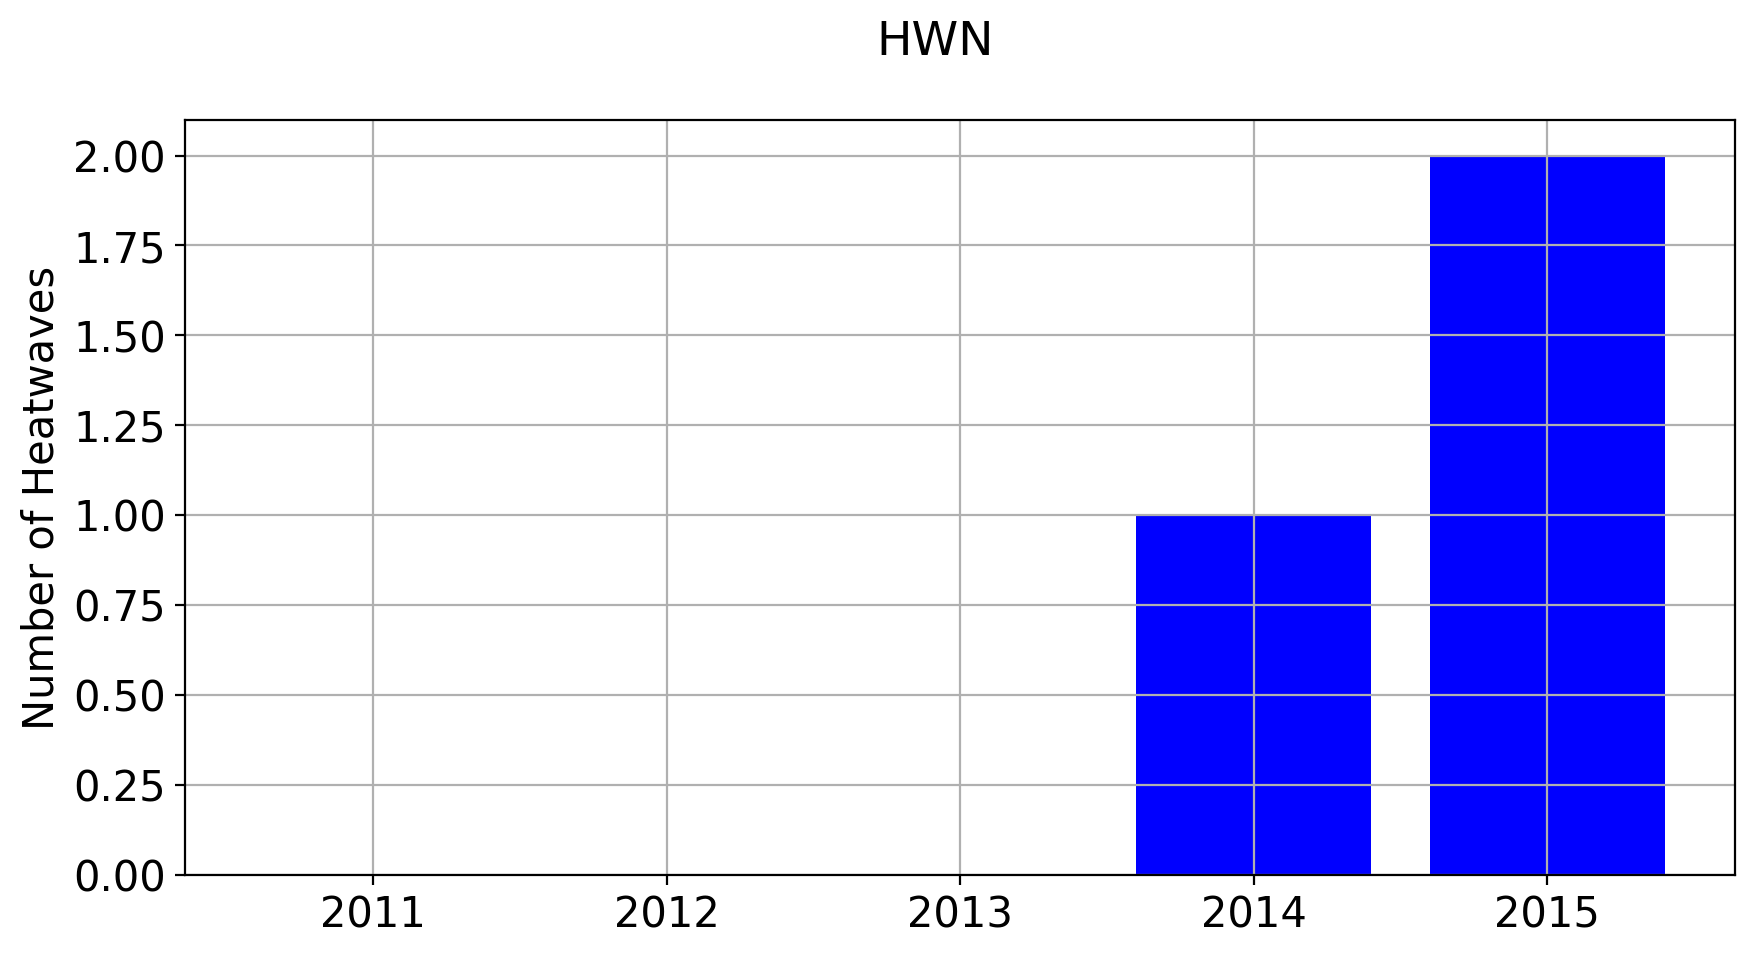

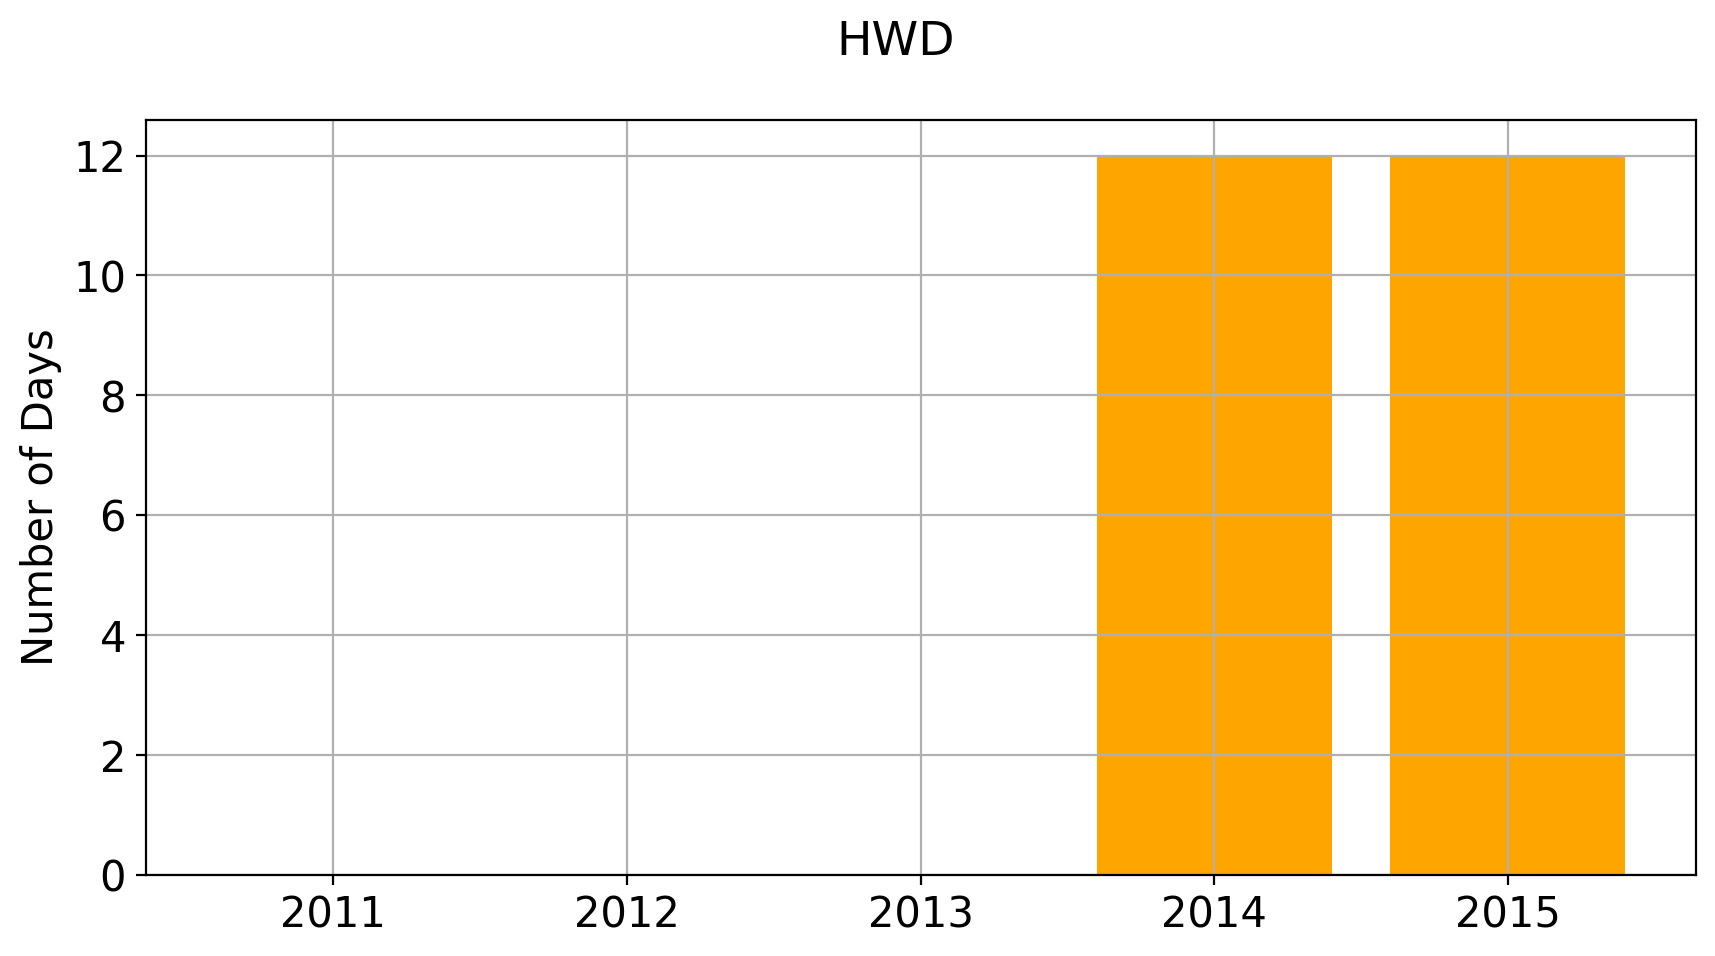

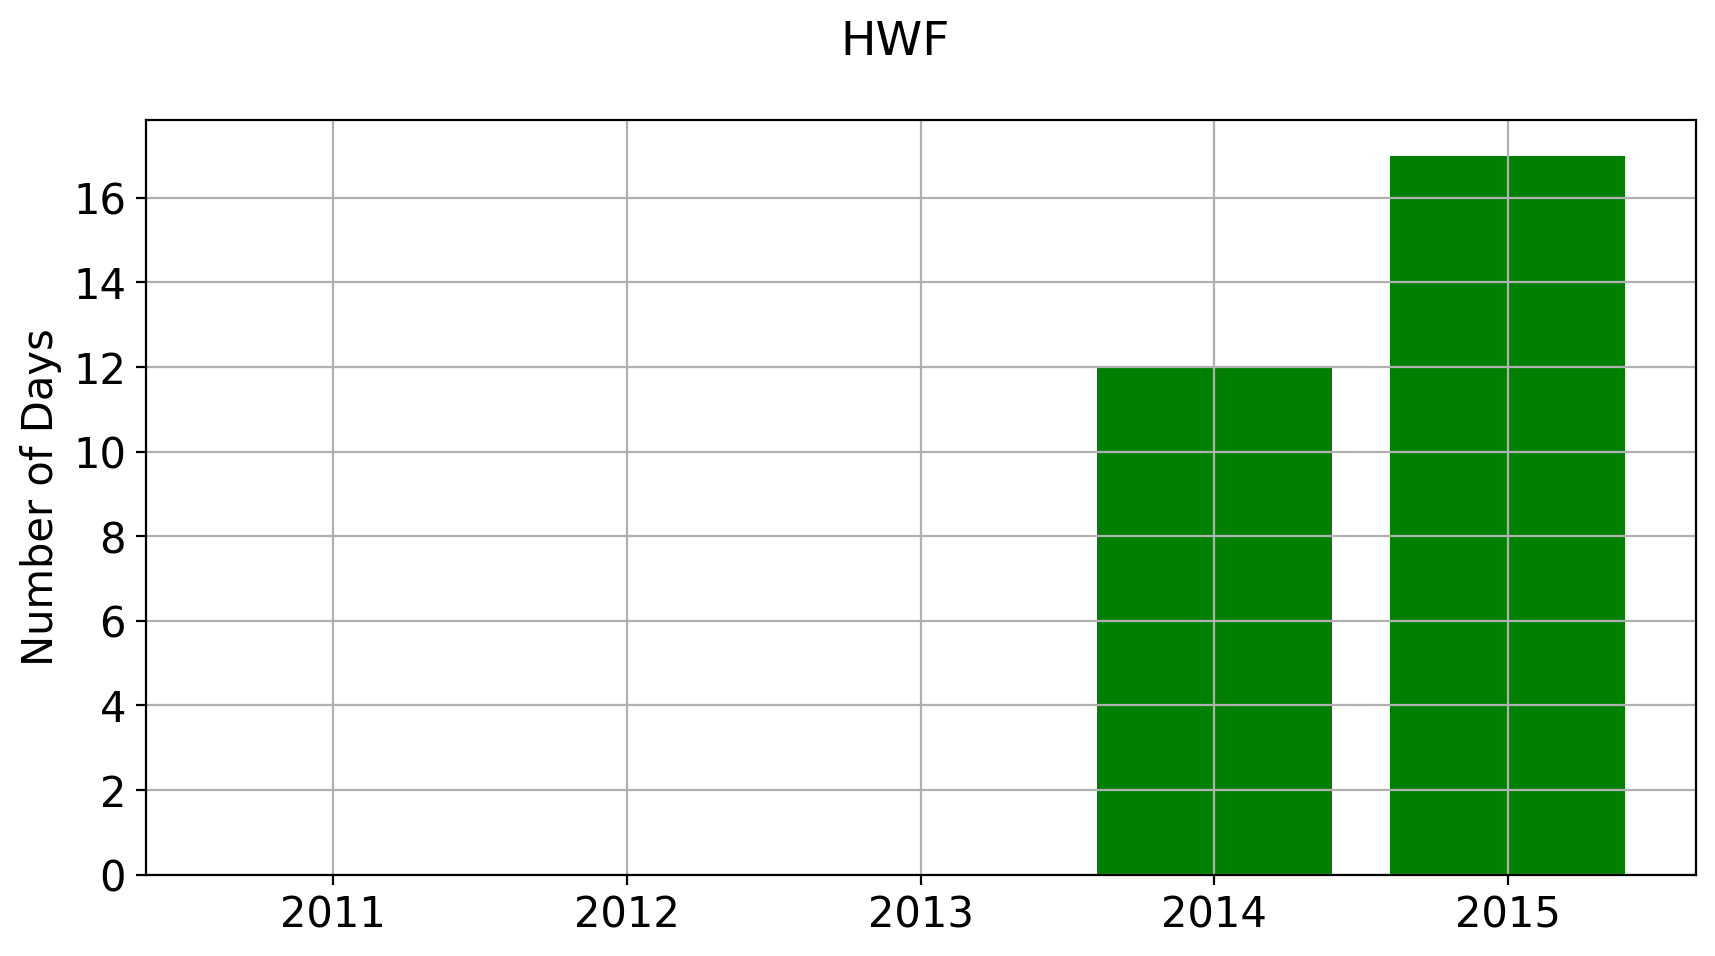

In [19]:
tex.wave_metrics(database_temp,'HW',plot=True)

HWN   HWD   HWF
YEAR SEASON                 
2011 1       0.0   0.0   0.0
     2       0.0   0.0   0.0
     3       0.0   0.0   0.0
     4       0.0   0.0   0.0
2012 1       0.0   0.0   0.0
     2       0.0   0.0   0.0
     3       0.0   0.0   0.0
     4       0.0   0.0   0.0
2013 1       0.0   0.0   0.0
     2       0.0   0.0   0.0
     3       0.0   0.0   0.0
     4       0.0   0.0   0.0
2014 1       0.0   0.0   0.0
     2       0.0   0.0   0.0
     3       1.0  12.0  12.0
     4       0.0   0.0   0.0
2015 1       1.0   5.0   5.0
     2       1.0  12.0  12.0
     3       0.0   0.0   0.0
     4       0.0   0.0   0.0

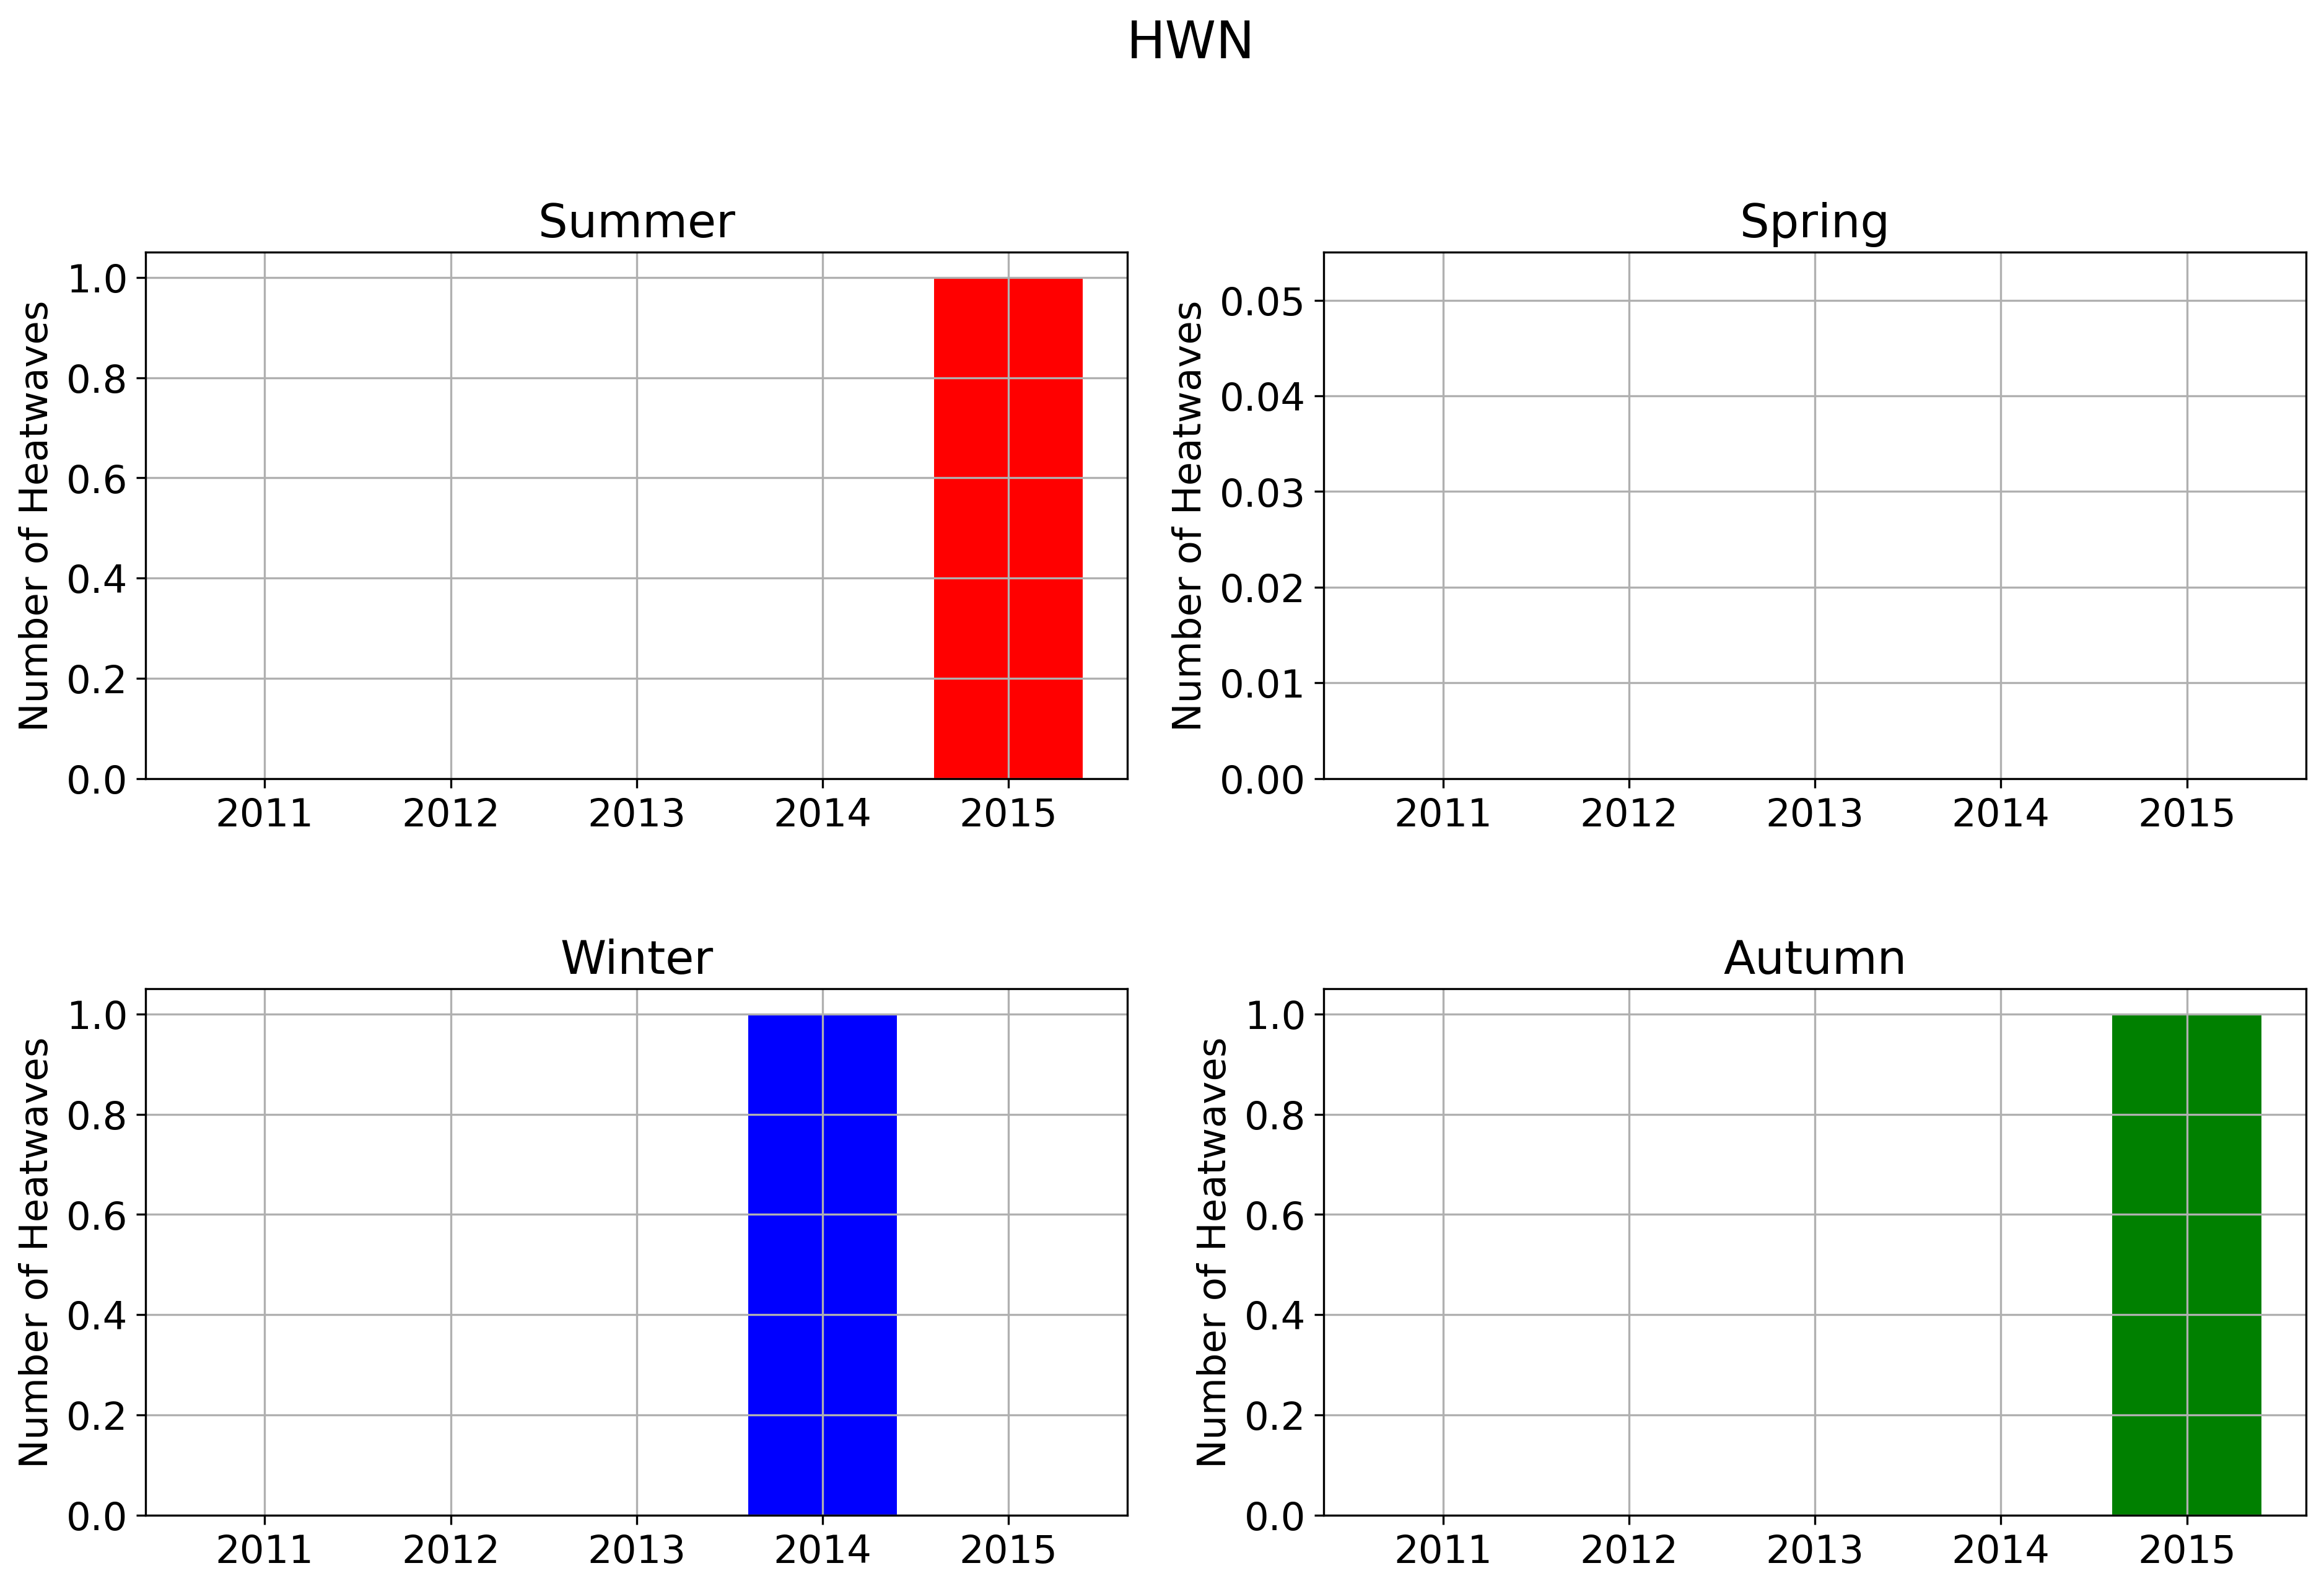

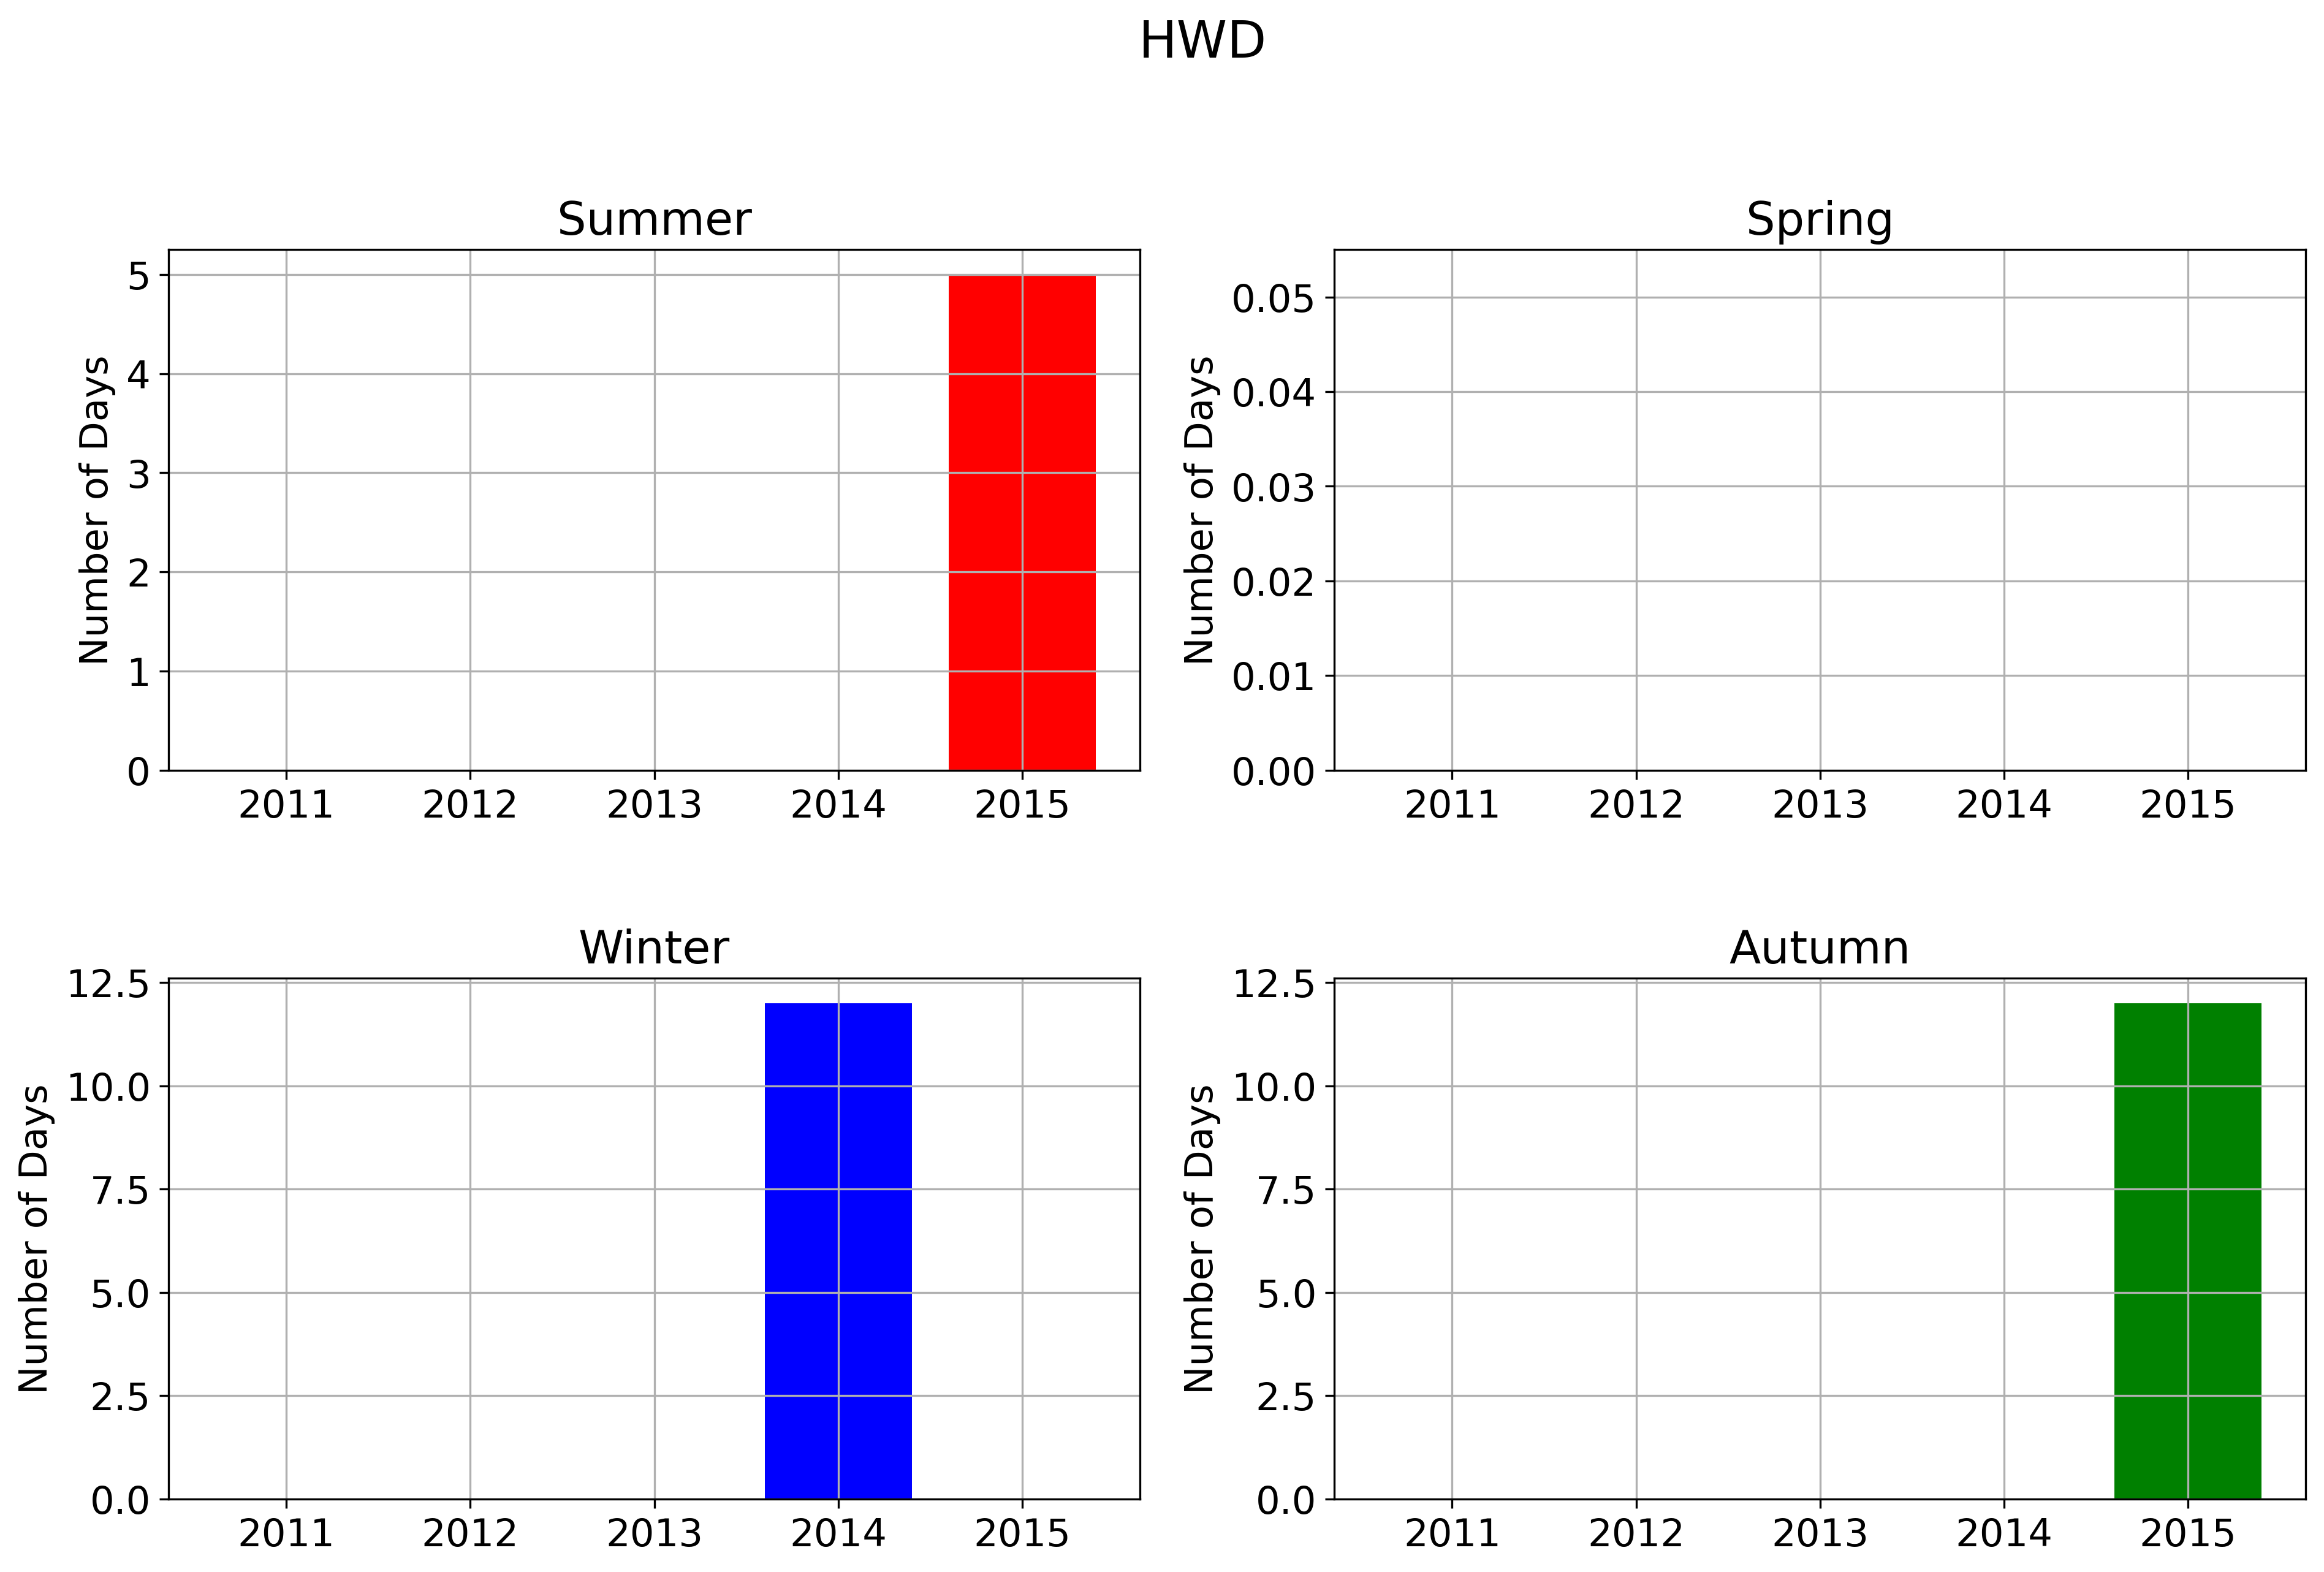

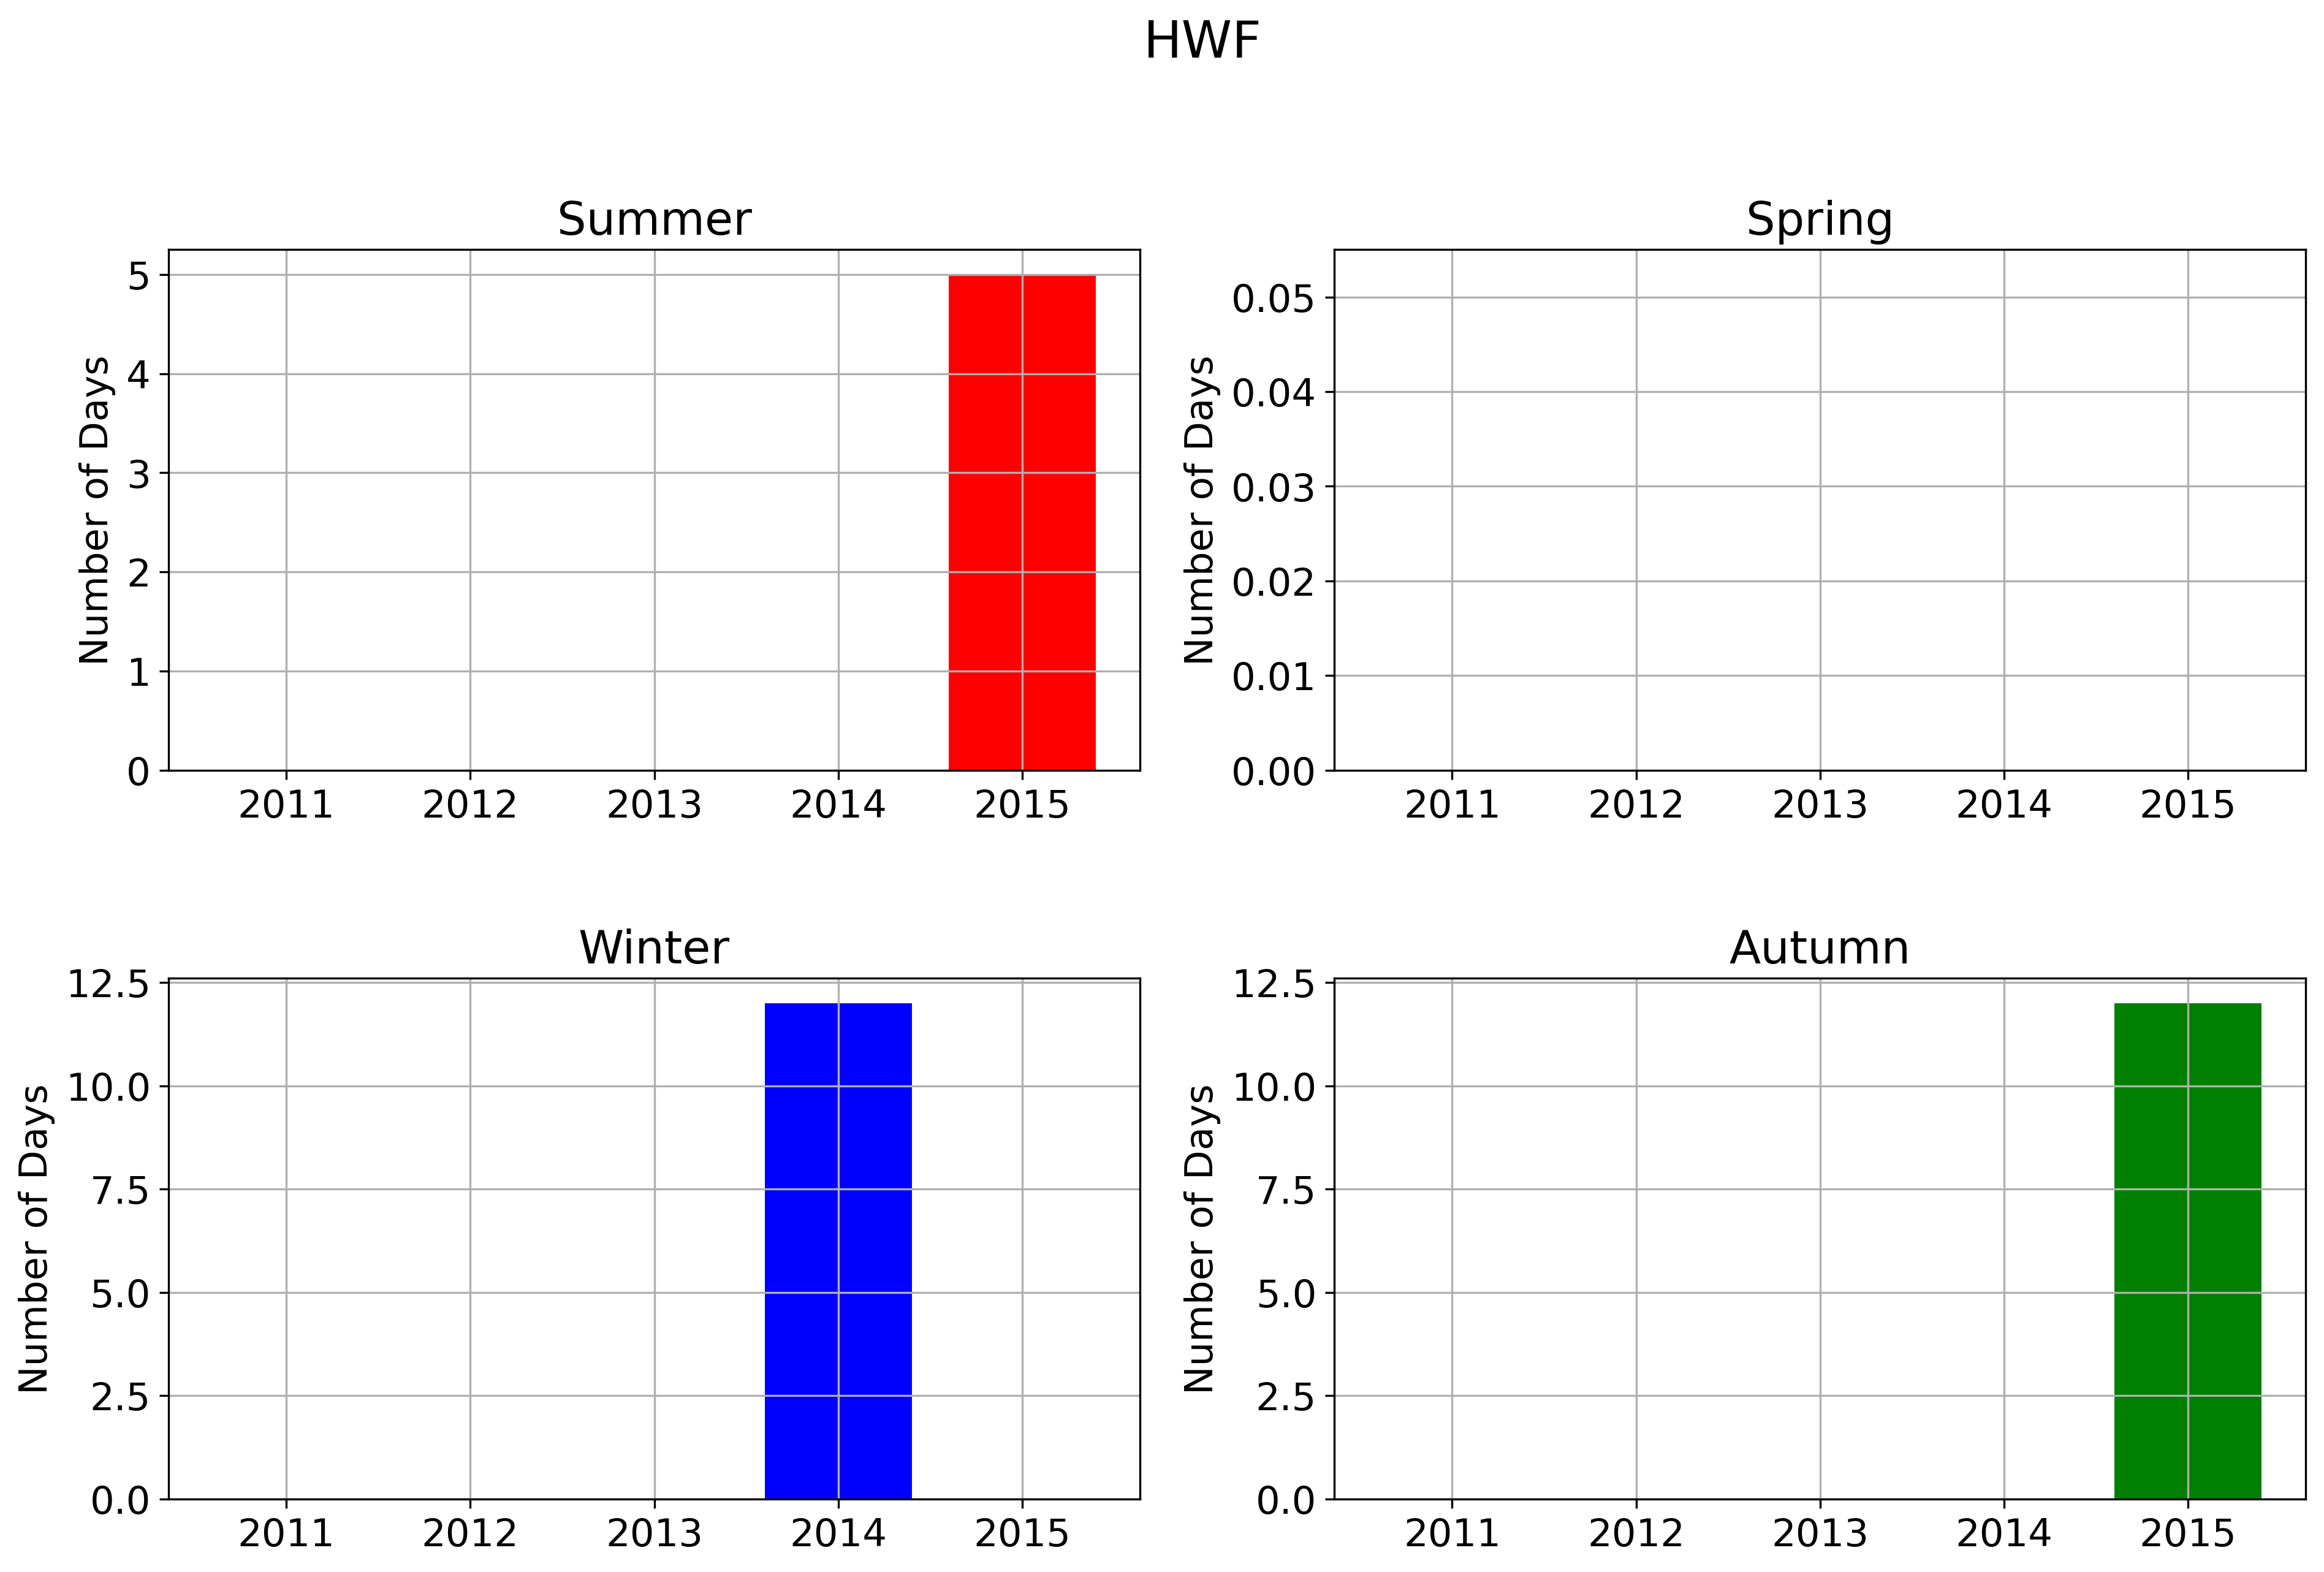

In [20]:
tex.wave_seasonMetrics(database_temp,'HW',True)

In [21]:
help(tex.wave_intensity)

Help on function wave_intensity in module climatex:

wave_intensity(df_checkW, wave_column, db_columnMAX, df_pct, season=False)
    #-------------------------------------------------------------------------------
    ## Function that generates a dataframe with the Tmax anomaly of each Heat/Cold
    ## wave (= maxTmax of each HW minus the correspondent CTX90pct - according to
    ## day of the year - DAY365)
    ##
    ## :param      df_checkW:     Database dataframe with the column "HW" or CW"
    ## :type       df_checkW:     pandas.DataFrame
    ## :param      wave_column:   Name of the column that is going to store
    ##                            information about Heat/Cold Waves (e.g. 'HW' or
    ##                            'CW')
    ## :type       wave_column:   String
    ## :param      db_columnMAX:  Name of the column of the database with maximum
    ##                            temperatures to be compared with CTX_pct
    ## :type       db_columnMAX:  String
    ## :param

In [22]:
tex.wave_intensity(database_temp,'HW','T_max(°C)',df_pct)

DAY365       DATE  T_max(°C)  CMX90pct  Tmax_anomaly
0     163 2014-06-12       36.5     33.50          3.00
1      49 2015-02-18       36.9     34.26          2.64
2     146 2015-05-26       37.1     33.50          3.60

### Temperature range

Thermal range above the 90th percentile.


In [23]:
help(tex.check_TemperatureAboveRange)

Help on function check_TemperatureAboveRange in module climatex:

check_TemperatureAboveRange(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for days with a high range of temperature according to the Climatic Normal
    ##
    ## It first create a column for range in the database and in the Climatic normal. 
    ## Then it obtains a dataframe with the percentiles computed from the Climatic Normal
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the range is above the percentile. If it is above the threshold, 
    ## the column 'above_pct' receives 1.
    ##
    ## Climatic Normal dataframe needs to have at least 'DATE' and 'pct_column'
    ## Database dataframe needs to have at 

In [24]:
#get dataframe with columns 'above_pct_range' indicating the occurence of the event
#and the dataframe with the 90th percentile for temperature range
database_temp, df_pct = tex.check_TemperatureAboveRange(database_temp,'T_max(°C)','T_min(°C)',climatic_norm_temp,'T_max(°C)','T_min(°C)')

In [25]:
database_temp

DAY365       DATE  T_min(°C)  ...   HW  Temperature range  above_pct_range
0          1 2011-01-01       12.7  ...  0.0               19.3                1
1          2 2011-01-02       12.7  ...  0.0               19.7                1
2          3 2011-01-03       13.9  ...  0.0               18.6                1
3          4 2011-01-04       13.6  ...  0.0               15.1                0
4          5 2011-01-05       13.1  ...  0.0               18.4                1
...      ...        ...        ...  ...  ...                ...              ...
1820     361 2015-12-27       13.1  ...  0.0               15.2                0
1821     362 2015-12-28       13.4  ...  0.0               18.0                1
1822     363 2015-12-29       14.7  ...  0.0                9.6                0
1823     364 2015-12-30       14.5  ...  0.0                5.5                0
1824     365 2015-12-31       13.0  ...  0.0               15.0                0

[1825 rows x 11 columns]

In [26]:
df_pct

C90pct
DAY365        
1         17.3
2         17.3
3         17.3
4         17.3
5         17.3
...        ...
361       17.3
362       17.3
363       17.3
364       17.3
365       17.3

[365 rows x 1 columns]

In [27]:
help(tex.range_metrics)

Help on function range_metrics in module climatex:

range_metrics(df_above_range, plot=False)
    #-------------------------------------------------------------------------------
    ## Function to obtain the yearly metrics of  a range parameter above the percentile,
    ## given the database  dataframe containing the 'above_pct_range' column that 
    ## indicates if the range of  the parameter on that day is above the percentile 
    ## (90th percentile by default). 
    ## This function obtains the number of days with range above the percentile (RND)
    ## for each year of the dataframe. This metric is stored in a dataframe.
    ##
    ## It is possible to plot the metrics (plot=True). For a better adjustment of
    ## the plots, check function plot_oneMetric
    ##
    ## :param      df_above_range:   Database dataframe with the column 'above_pct'
    ## :type       (df_above_range:  pandas.DataFrame
    ## :param      plot:             If True, function plot_oneMetric is used to 

RND
YEAR     
2011   90
2012   96
2013   65
2014   48
2015   33

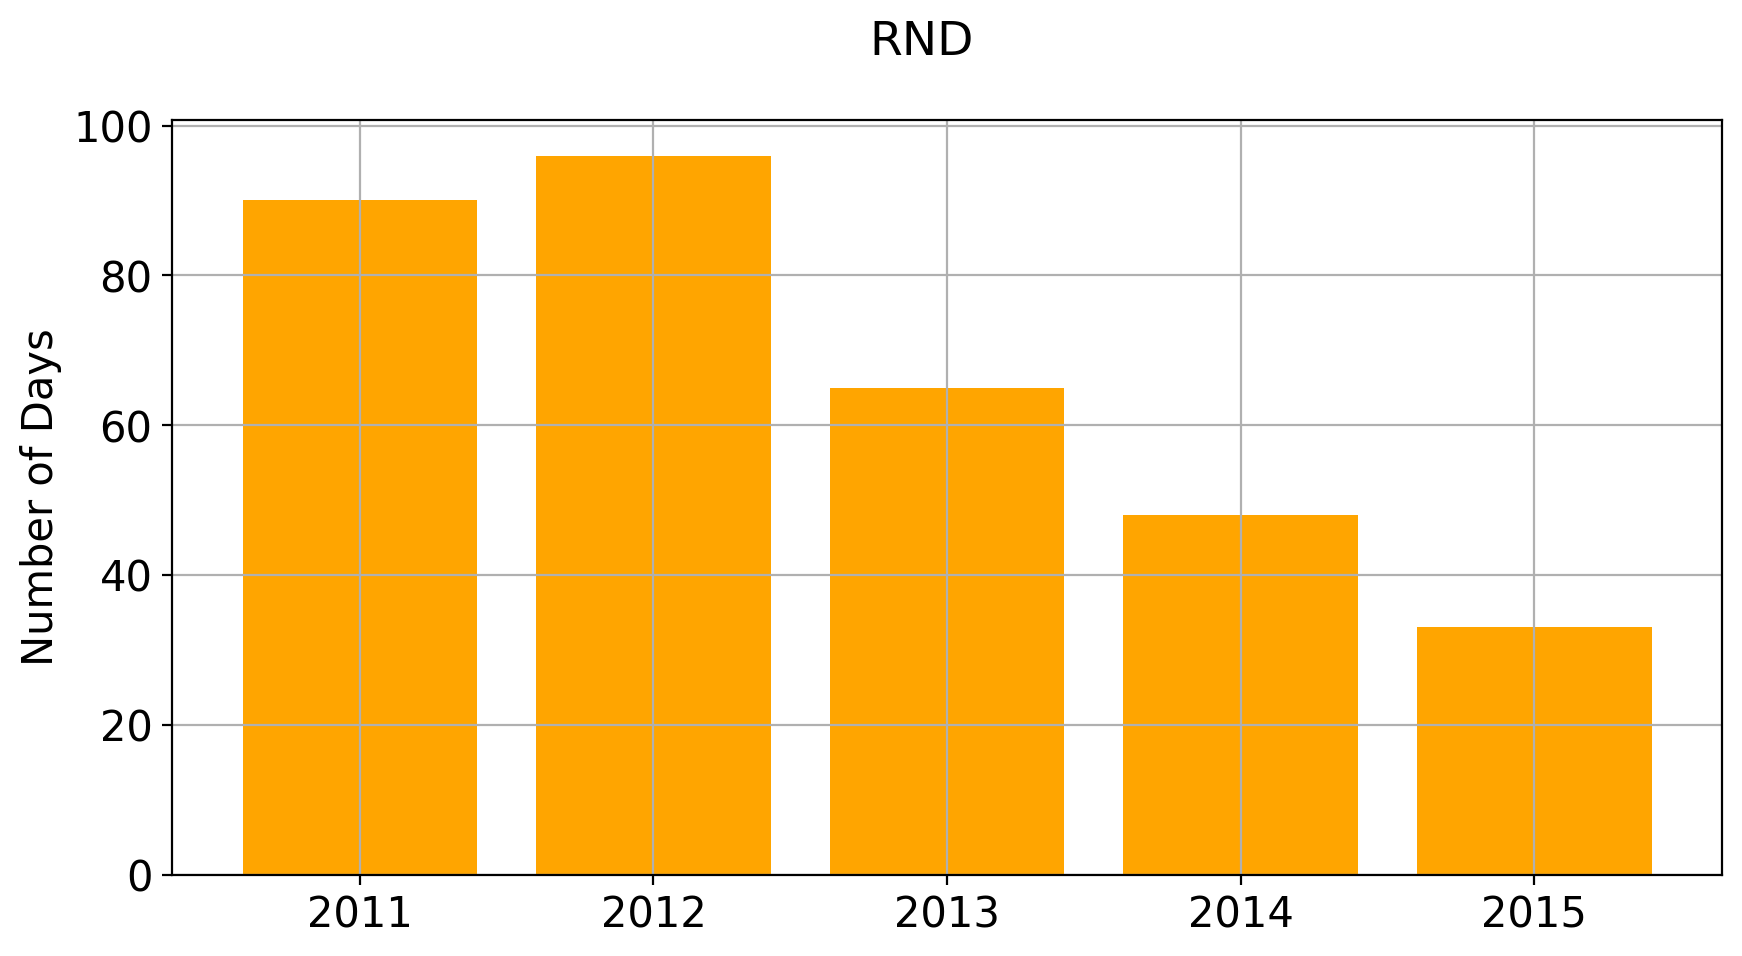

In [28]:
tex.range_metrics(database_temp,True)

In [29]:
help(tex.range_seasonMetrics)

Help on function range_seasonMetrics in module climatex:

range_seasonMetrics(df_above_range, plot=False)
    #-------------------------------------------------------------------------------
    ## ## Function to obtain the season metrics of  a range parameter above the percentile,
    ## given the database  dataframe containing the 'above_pct_range' column that 
    ## indicates if the range of  the parameter on that day is above the percentile 
    ## (90th percentile by default). 
    ## This function obtains the number of days with range above the percentile (RND)
    ## for all season for each year of the dataframe. This metric is stored in a dataframe
    ## which includes the Range metrics for each year of the database, separated by seasons.
    ## The calendar year adopted is from december of previous year until november of
    ## actual year.
    ##
    ## It is possible to plot the seasonal metrics, for a better adjustment of the
    ## plots, go to function plot_oneSeasonMet

RND
YEAR SEASON     
2011 1        31
     2        17
     3        18
     4        24
2012 1        26
     2        26
     3        37
     4         7
2013 1        21
     2        15
     3        15
     4        14
2014 1        18
     2        11
     3        13
     4         6
2015 1        14
     2        15
     3         3
     4         1

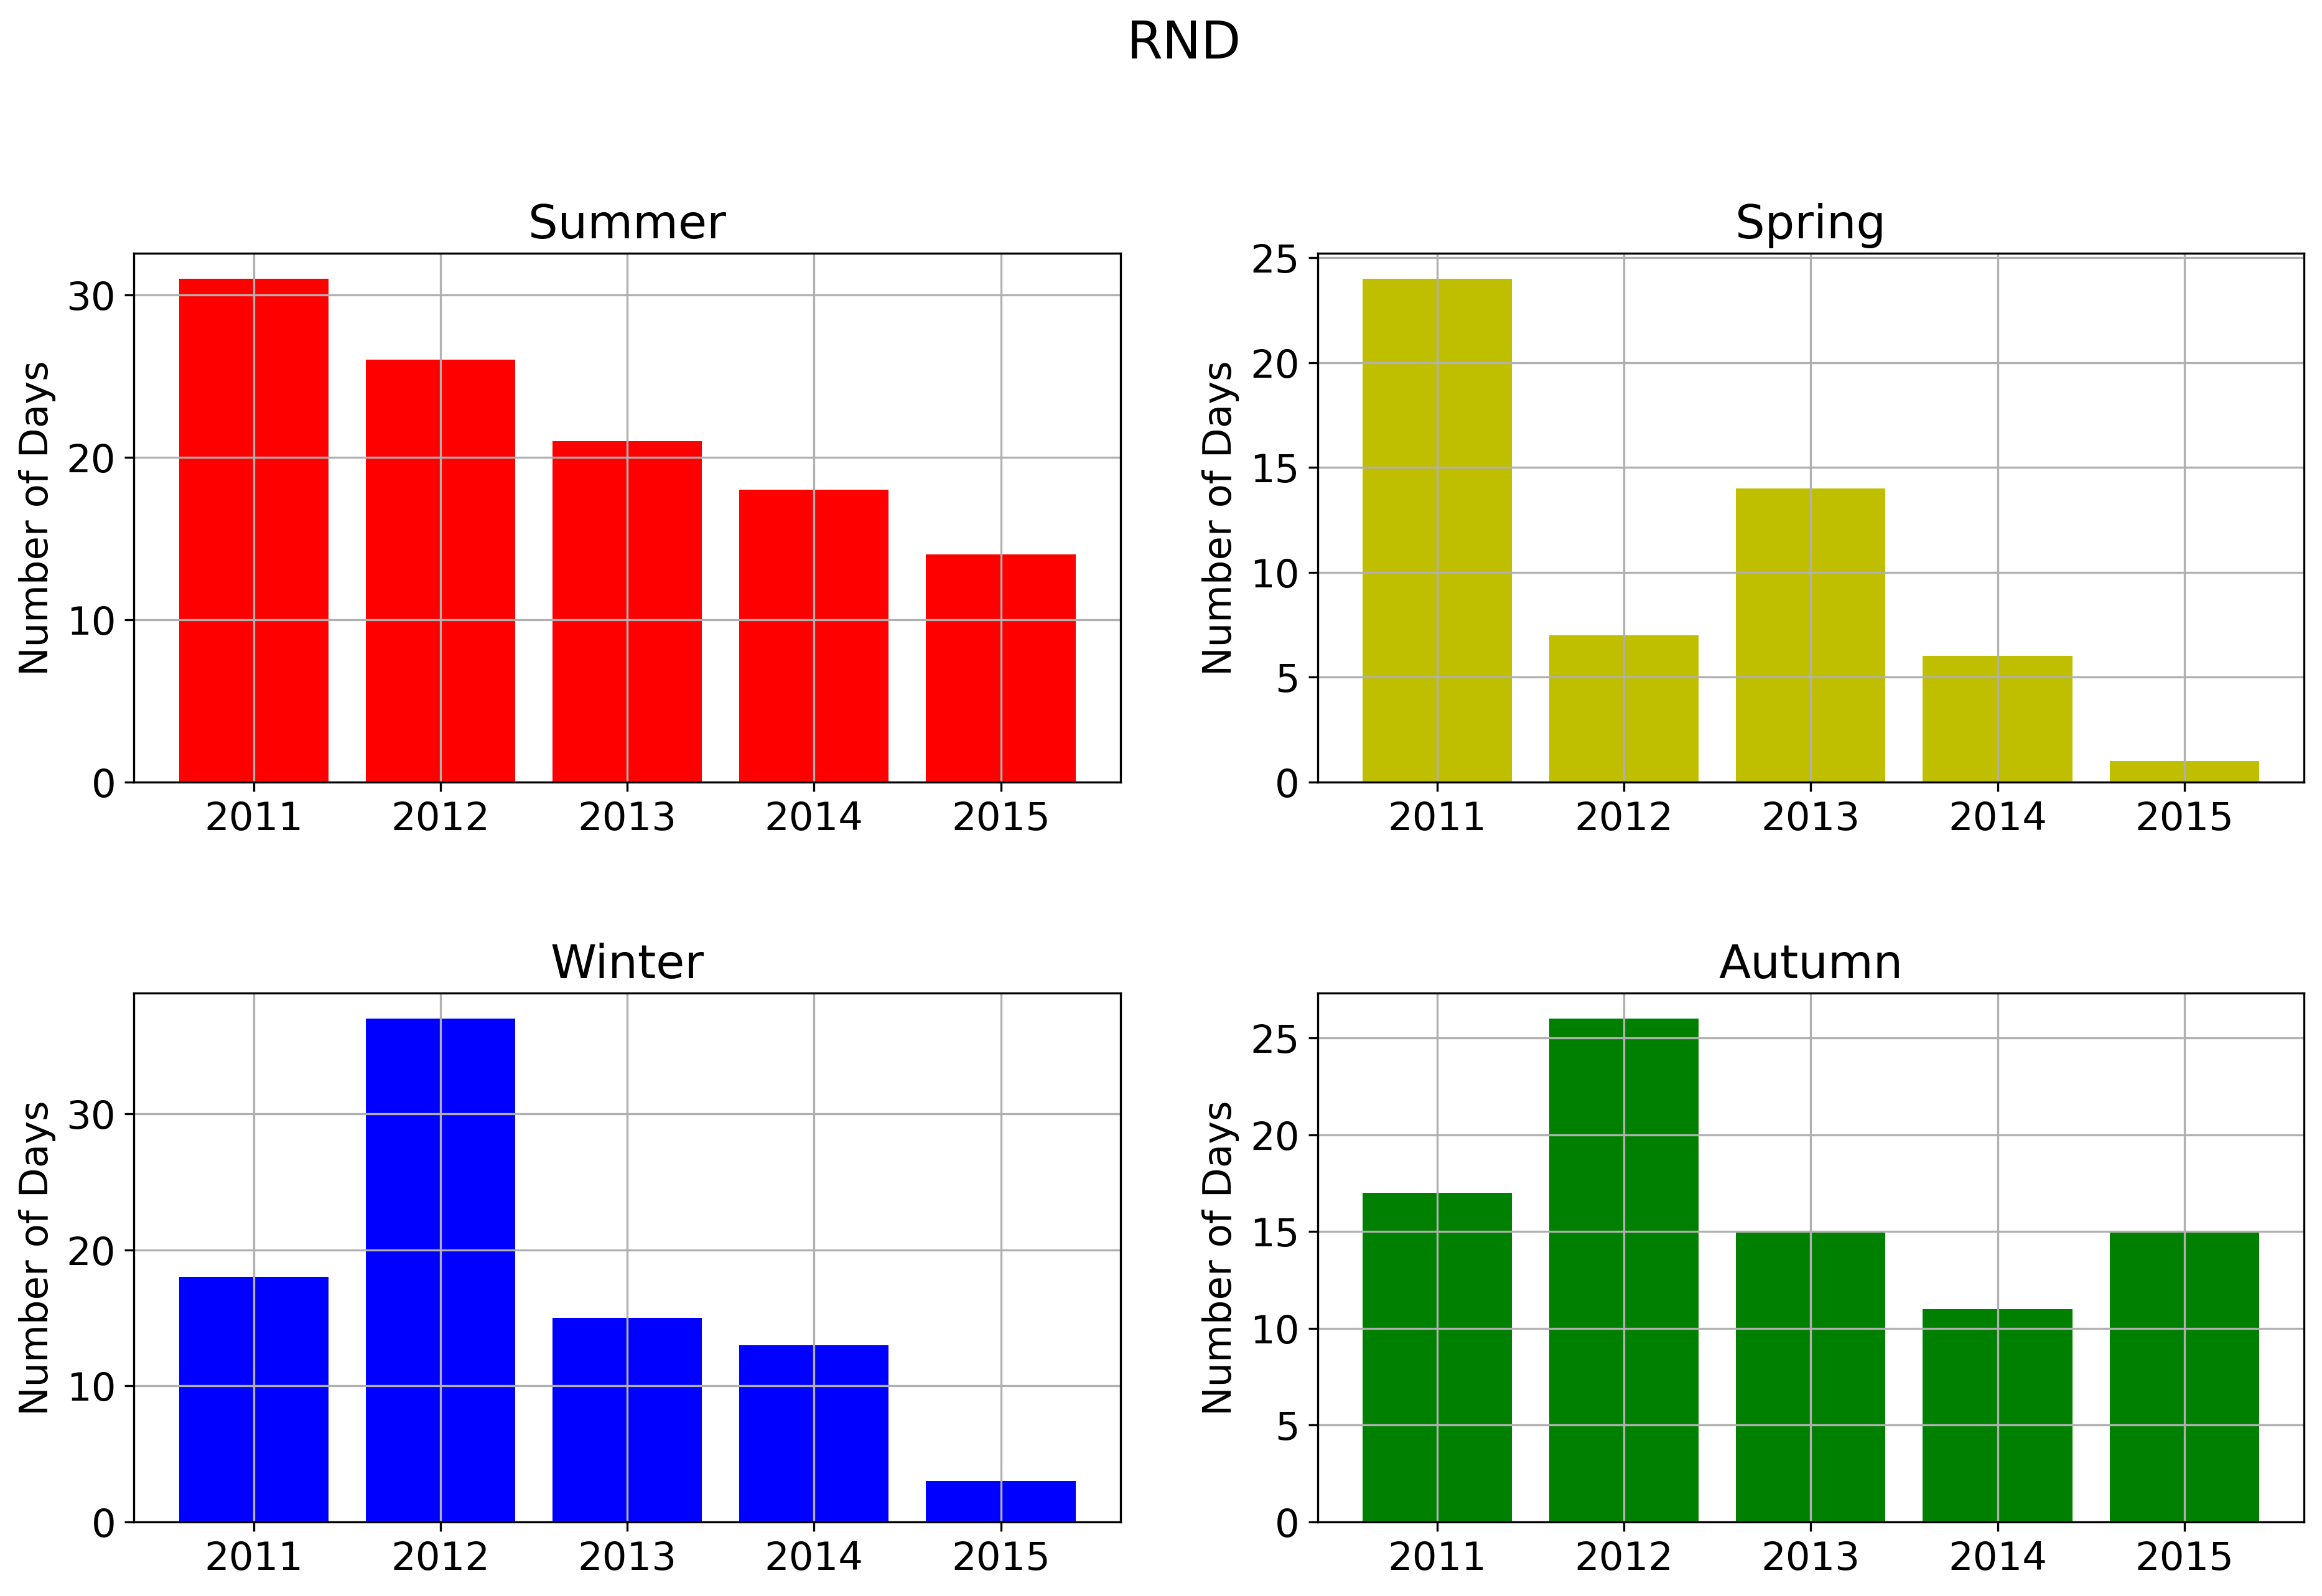

In [30]:
tex.range_seasonMetrics(database_temp,True)

### Temperature Difference between days

Difference between maximum and minimum humidity between subsequent days above 90th percentile.

In [31]:
help(tex.check_Temperature_difdays)

Help on function check_Temperature_difdays in module climatex:

check_Temperature_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of temperature according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## temperature (Dif_max) between two subsequent days and for the difference between minimum
    ## temperature (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Cl

In [32]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum temperature difference
database_temp, df_pct = tex.check_Temperature_difdays(database_temp,'T_max(°C)','T_min(°C)',climatic_norm_temp,'T_max(°C)','T_min(°C)')

In [33]:
database_temp

DAY365       DATE  T_min(°C)  ...  Dif_min  Dif_max  above_pct_dif
0          1 2011-01-01       12.7  ...      NaN      NaN              0
1          2 2011-01-02       12.7  ...      0.0      0.4              0
2          3 2011-01-03       13.9  ...      1.2      0.1              0
3          4 2011-01-04       13.6  ...     -0.3     -3.8              0
4          5 2011-01-05       13.1  ...     -0.5      2.8              0
...      ...        ...        ...  ...      ...      ...            ...
1820     361 2015-12-27       13.1  ...     -1.4      2.6              0
1821     362 2015-12-28       13.4  ...      0.3      3.1              0
1822     363 2015-12-29       14.7  ...      1.3     -7.1              0
1823     364 2015-12-30       14.5  ...     -0.2     -4.3              0
1824     365 2015-12-31       13.0  ...     -1.5      8.0              0

[1825 rows x 15 columns]

In [34]:
df_pct

CMX90pct  CMN90pct
DAY365                    
1           6.00      2.90
2           6.00      2.99
3           6.08      2.90
4           6.17      3.00
5           6.20      3.00
...          ...       ...
361         4.73      2.90
362         5.00      2.90
363         5.35      2.80
364         5.36      2.76
365         5.74      2.77

[365 rows x 2 columns]

In [35]:
help(tex.dif_metrics)

Help on function dif_metrics in module climatex:

dif_metrics(df_above_dif, plot=False)
    #-------------------------------------------------------------------------------
    ## Function to obtain the yearly metrics of the difference of a parameter between days
    ## above the percentile, given the database  dataframe containing the 'above_pct_dif'
    ## column that indicates if the difference of  the parameter on that day is above the percentile 
    ## (90th percentile by default). 
    ## This function obtains the number of days with range above the percentile (DND)
    ## for each year of the dataframe. This metric is stored in a dataframe.
    ##
    ## It is possible to plot the metrics (plot=True). For a better adjustment of
    ## the plots, check function plot_oneMetric
    ##
    ## :param      df_above_dif:   Database dataframe with the column 'above_pct_dif'
    ## :type                       pandas.DataFrame
    ## :param      plot:           If True, function plot_one

DND
YEAR     
2011    4
2012    5
2013    4
2014    3
2015    5

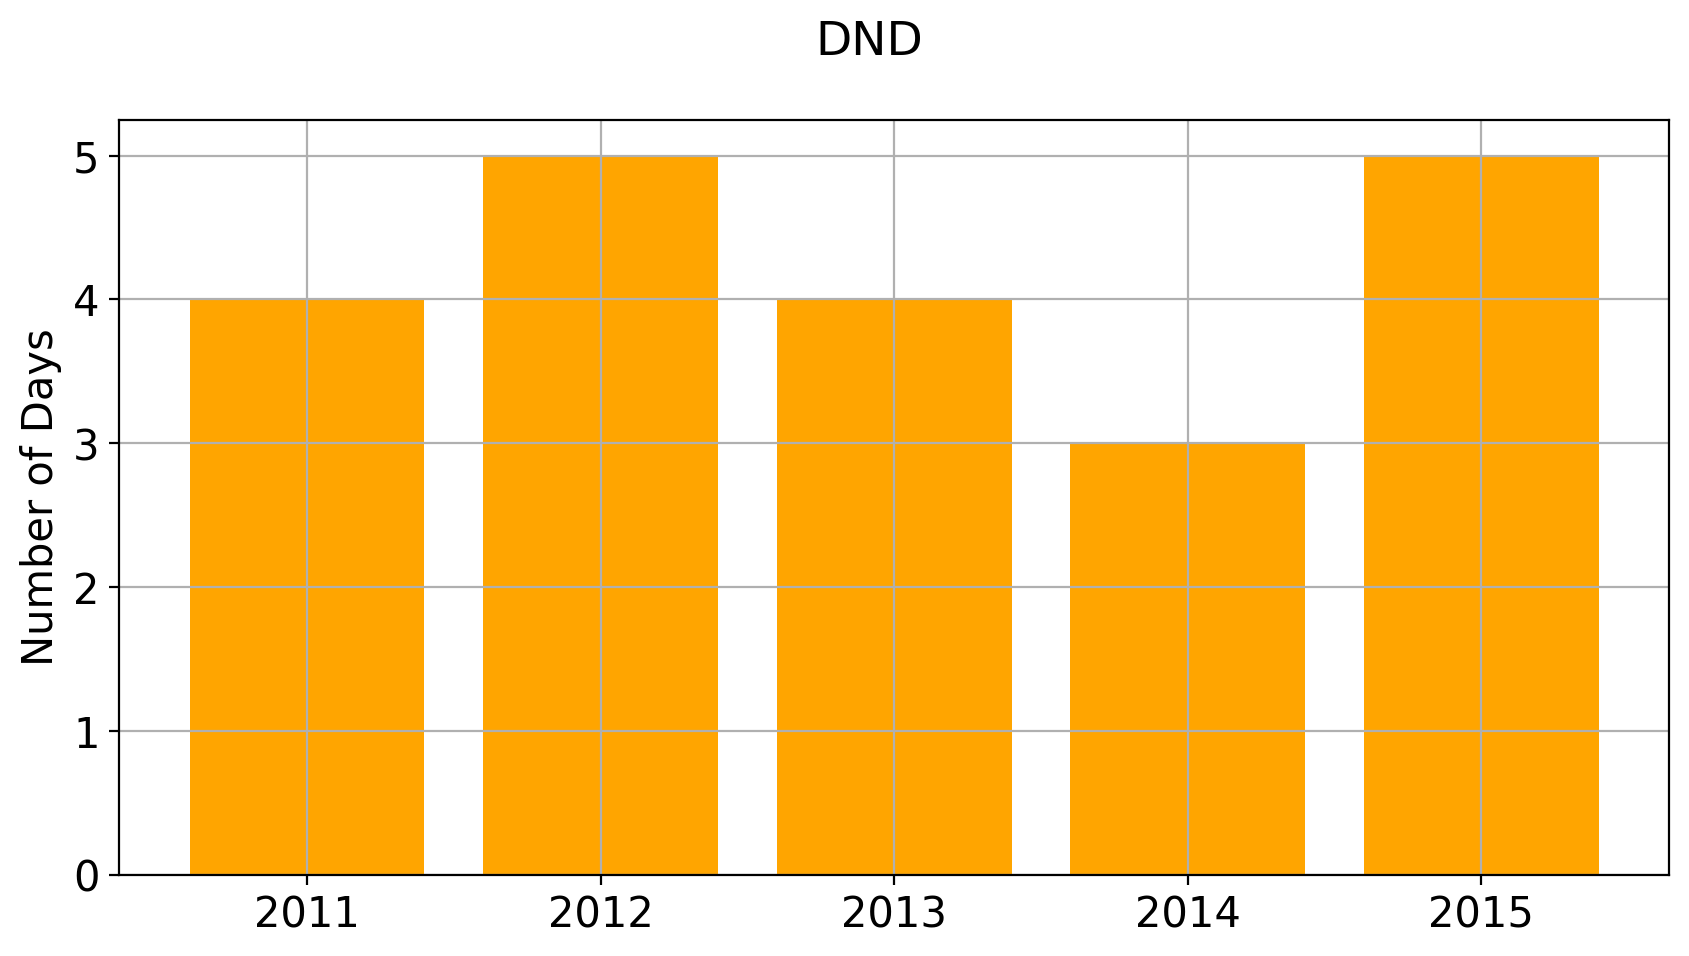

In [36]:
tex.dif_metrics(database_temp,True)

In [37]:
help(tex.dif_seasonMetrics)

Help on function dif_seasonMetrics in module climatex:

dif_seasonMetrics(df_above_dif, plot=False)
    #-------------------------------------------------------------------------------
    ## Function to obtain the season metrics of the difference of a parameter between days
    ## above the percentile, given the database  dataframe containing the 'above_pct_dif'
    ## column that indicates if the difference of  the parameter on that day is above the percentile 
    ## (90th percentile by default). 
    ## This function obtains the number of days with difference above the percentile (DND)
    ## for all season for each year of the dataframe. This metric is stored in a dataframe
    ## which includes the Range metrics for each year of the database, separated by seasons.
    ## The calendar year adopted is from december of previous year until november of
    ## actual year.
    ##
    ## It is possible to plot the seasonal metrics, for a better adjustment of the
    ## plots, go to func

RND
YEAR SEASON     
2011 1         0
     2         0
     3         0
     4         4
2012 1         1
     2         0
     3         3
     4         1
2013 1         1
     2         1
     3         1
     4         1
2014 1         2
     2         0
     3         0
     4         1
2015 1         1
     2         2
     3         1
     4         1

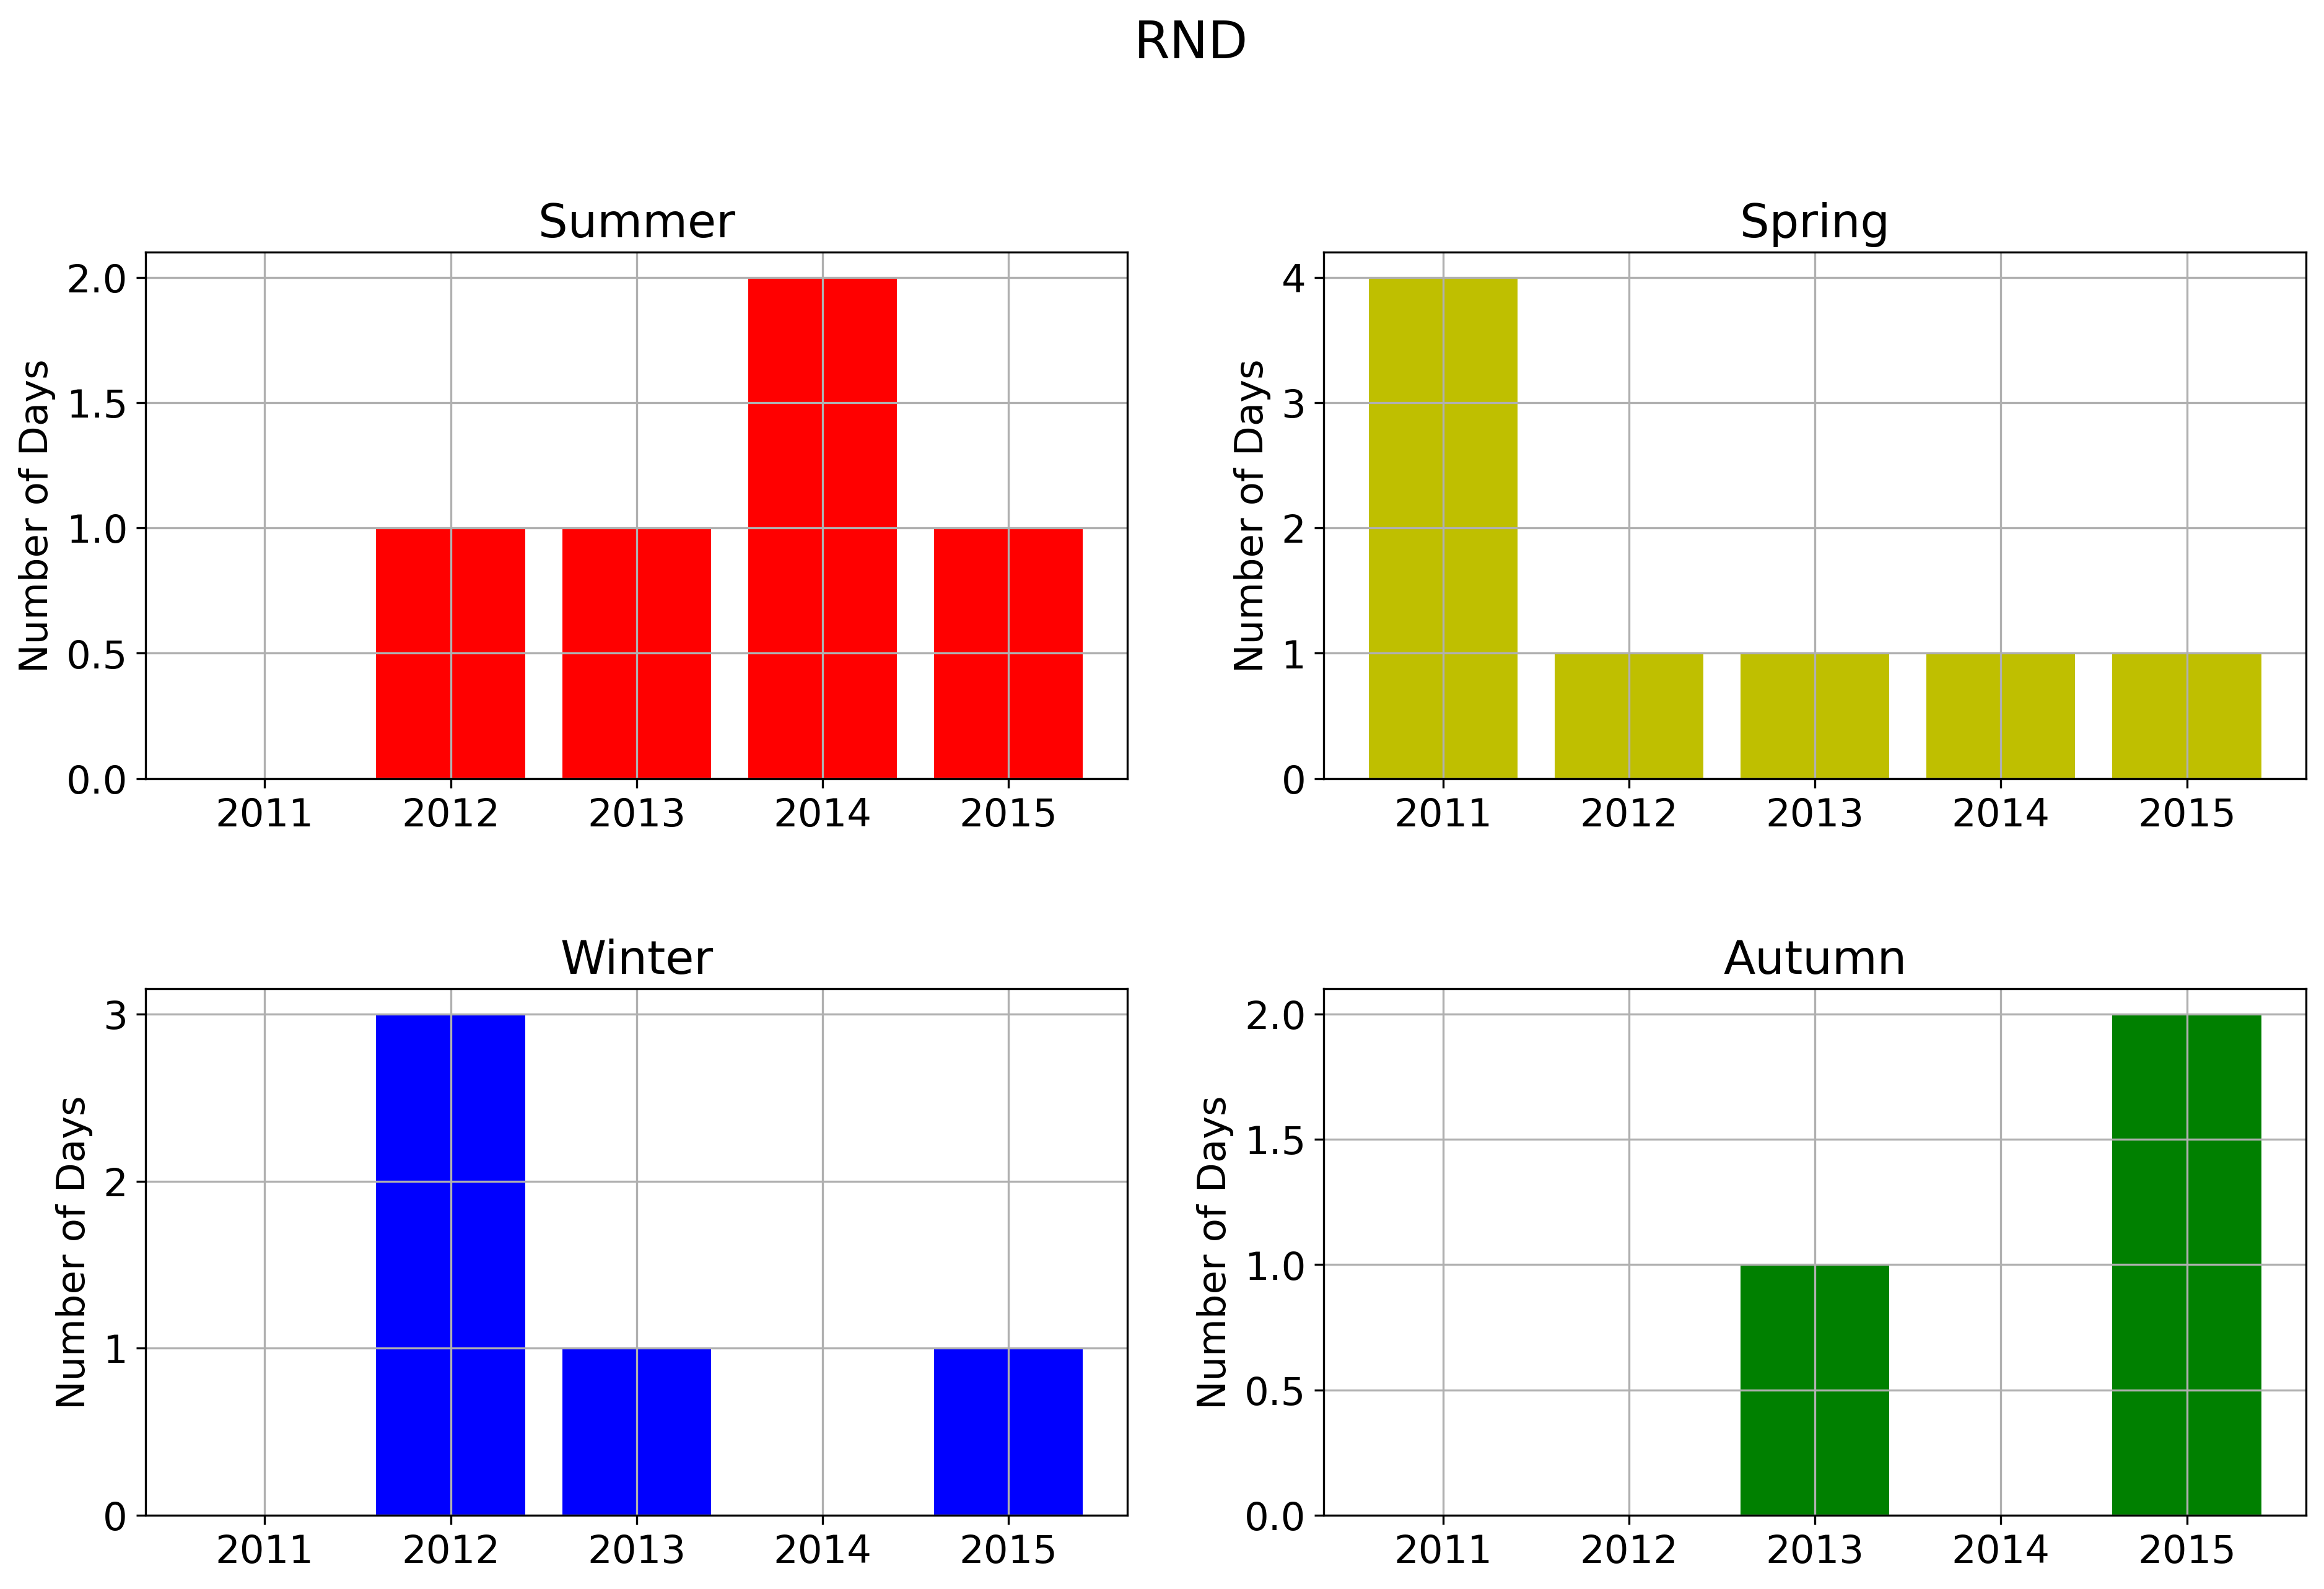

In [38]:
tex.dif_seasonMetrics(database_temp,True)

## Humidity



In [39]:
uploaded = files.upload()
df_humidity = pd.read_csv(io.BytesIO(uploaded['example_humidity.csv']))

df_humidity = df_humidity.drop(columns = {'Unnamed: 0'})
df_humidity['DATE'] = pd.to_datetime(df_humidity['DATE']) #to datetime
df_humidity['YEAR'] = df_humidity['DATE'].dt.year
df_humidity

Saving example_humidity.csv to example_humidity.csv


DATE  Humidity_min(%)  Humidity_max(%)  YEAR
0    1990-01-02             31.0             99.0  1990
1    1990-01-03             28.0             89.0  1990
2    1990-01-04             35.0             89.0  1990
3    1990-01-05             34.0             95.0  1990
4    1990-01-06             60.0             95.0  1990
...         ...              ...              ...   ...
9205 2015-12-27             26.0             79.0  2015
9206 2015-12-28             37.0             96.0  2015
9207 2015-12-29             70.0             97.0  2015
9208 2015-12-30             50.0             97.0  2015
9209 2015-12-31             61.0             96.0  2015

[9210 rows x 4 columns]

In [40]:
#define climatic normal for humidity
climatic_norm_humidity = df_humidity[(df_humidity['YEAR']>=1990) & (df_humidity['YEAR']<=2010)]
climatic_norm_humidity

DATE  Humidity_min(%)  Humidity_max(%)  YEAR
0    1990-01-02             31.0             99.0  1990
1    1990-01-03             28.0             89.0  1990
2    1990-01-04             35.0             89.0  1990
3    1990-01-05             34.0             95.0  1990
4    1990-01-06             60.0             95.0  1990
...         ...              ...              ...   ...
7382 2010-12-27             48.0             96.0  2010
7383 2010-12-28             49.0             97.0  2010
7384 2010-12-29             52.0             94.0  2010
7385 2010-12-30             24.0             91.0  2010
7386 2010-12-31             20.0             91.0  2010

[7387 rows x 4 columns]

In [41]:
#define database for humidity
database_humidity = df_humidity[df_humidity['YEAR']>2010]
database_humidity

DATE  Humidity_min(%)  Humidity_max(%)  YEAR
7387 2011-01-01             26.0             84.0  2011
7388 2011-01-02             28.0             98.0  2011
7389 2011-01-03             61.0             99.0  2011
7390 2011-01-04             27.0             95.0  2011
7391 2011-01-05             32.0             93.0  2011
...         ...              ...              ...   ...
9205 2015-12-27             26.0             79.0  2015
9206 2015-12-28             37.0             96.0  2015
9207 2015-12-29             70.0             97.0  2015
9208 2015-12-30             50.0             97.0  2015
9209 2015-12-31             61.0             96.0  2015

[1823 rows x 4 columns]

### Low humidity waves

3 or more consective days with both minimum and maximum humidity below the 10th percentile.


In [42]:
help(tex.check_LowHumidityWave)

Help on function check_LowHumidityWave in module climatex:

check_LowHumidityWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.1, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Low Humidity Waves on the database according to the Climatic Normal
    ##
    ## ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for humidity waves. It obtains first a dataframe with the percentiles 
    ## computed from the Climatic Normal according to the defined window size (df_pct).
    ## Then compares it with the database, to check if the maximum and minimum values
    ## of humidity are below the corresponding percentile. If they are below the threshold,
    ## the column 'below_pct' receives 1. This column is then used to identify if there
    ## ar

In [43]:
#get dataframe with columns 'below_pct' and 'LHW' indicating the occurence of a low humidity wave
#and the dataframe with the 10th percentile for maximum and minimum humidity
database_humidity,df_pct = tex.check_LowHumidityWave(database_humidity,'Humidity_max(%)','Humidity_min(%)',climatic_norm_humidity,'Humidity_max(%)','Humidity_min(%)')

In [44]:
database_humidity

DAY365       DATE  Humidity_min(%)  ...    YEAR  below_pct  LHW
0          1 2011-01-01             26.0  ...  2011.0          0    0
1          2 2011-01-02             28.0  ...  2011.0          0    0
2          3 2011-01-03             61.0  ...  2011.0          0    0
3          4 2011-01-04             27.0  ...  2011.0          0    0
4          5 2011-01-05             32.0  ...  2011.0          0    0
...      ...        ...              ...  ...     ...        ...  ...
1820     361 2015-12-27             26.0  ...  2015.0          0    0
1821     362 2015-12-28             37.0  ...  2015.0          0    0
1822     363 2015-12-29             70.0  ...  2015.0          0    0
1823     364 2015-12-30             50.0  ...  2015.0          0    0
1824     365 2015-12-31             61.0  ...  2015.0          0    0

[1825 rows x 7 columns]

LHWN  LHWD  LHWF
YEAR                  
2011   0.0   0.0   0.0
2012   1.0   5.0   5.0
2013   0.0   0.0   0.0
2014  10.0  19.0  59.0
2015   6.0  12.0  29.0

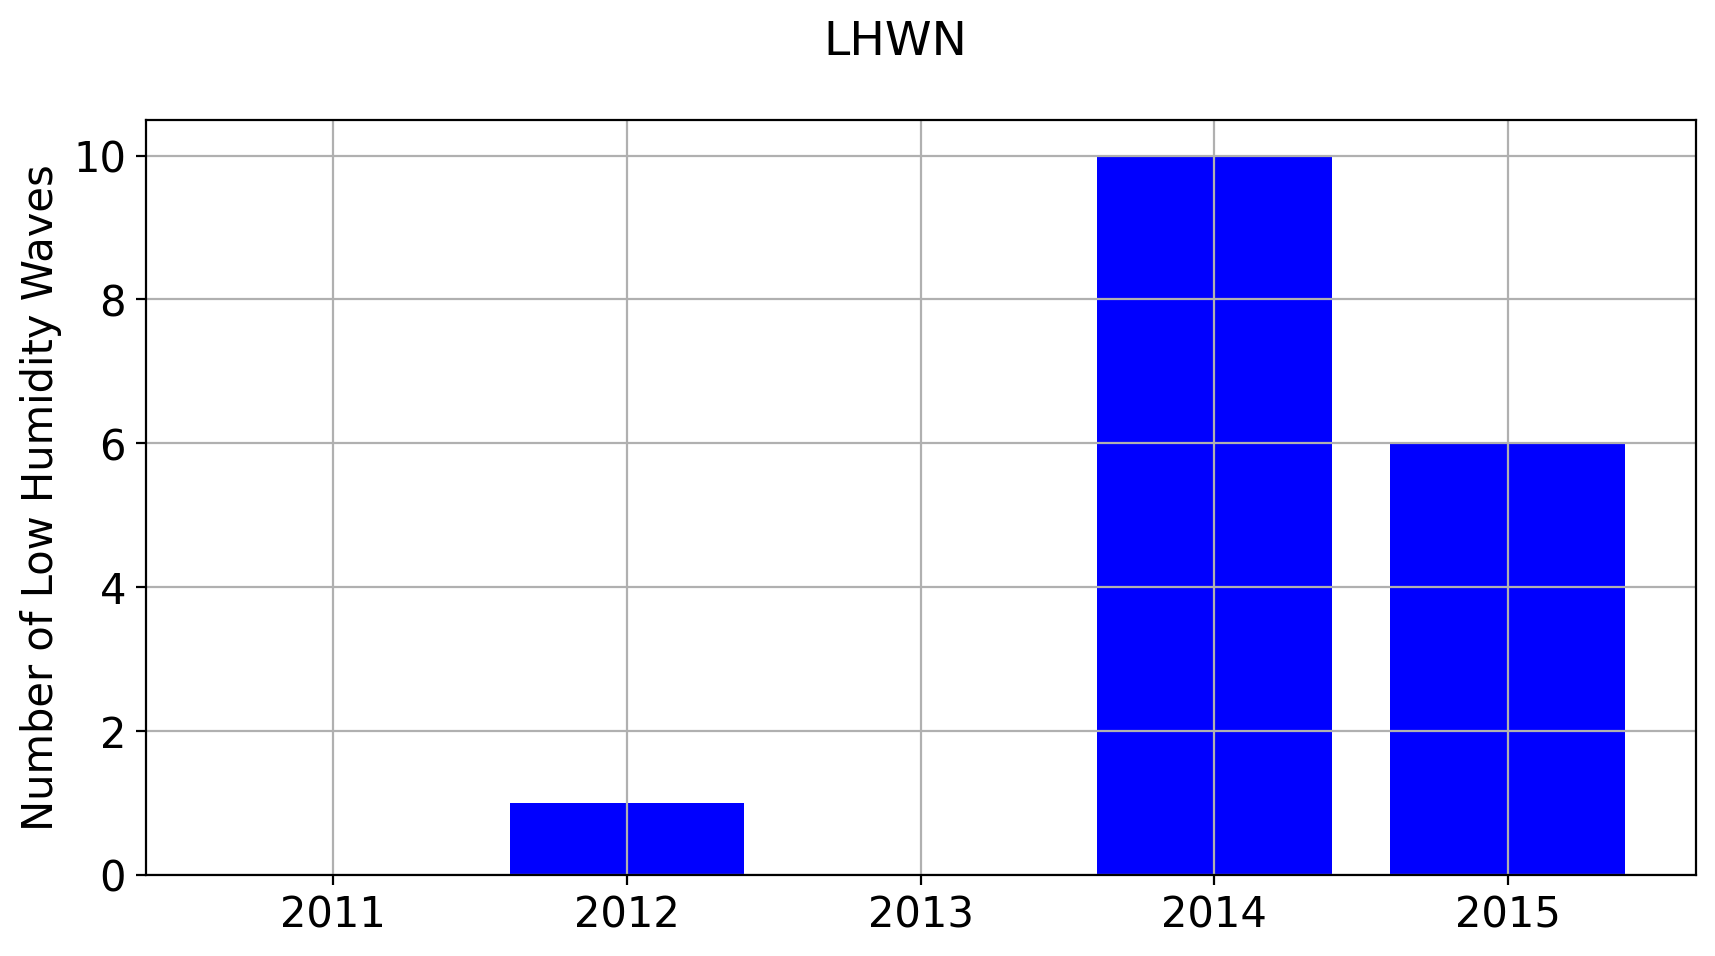

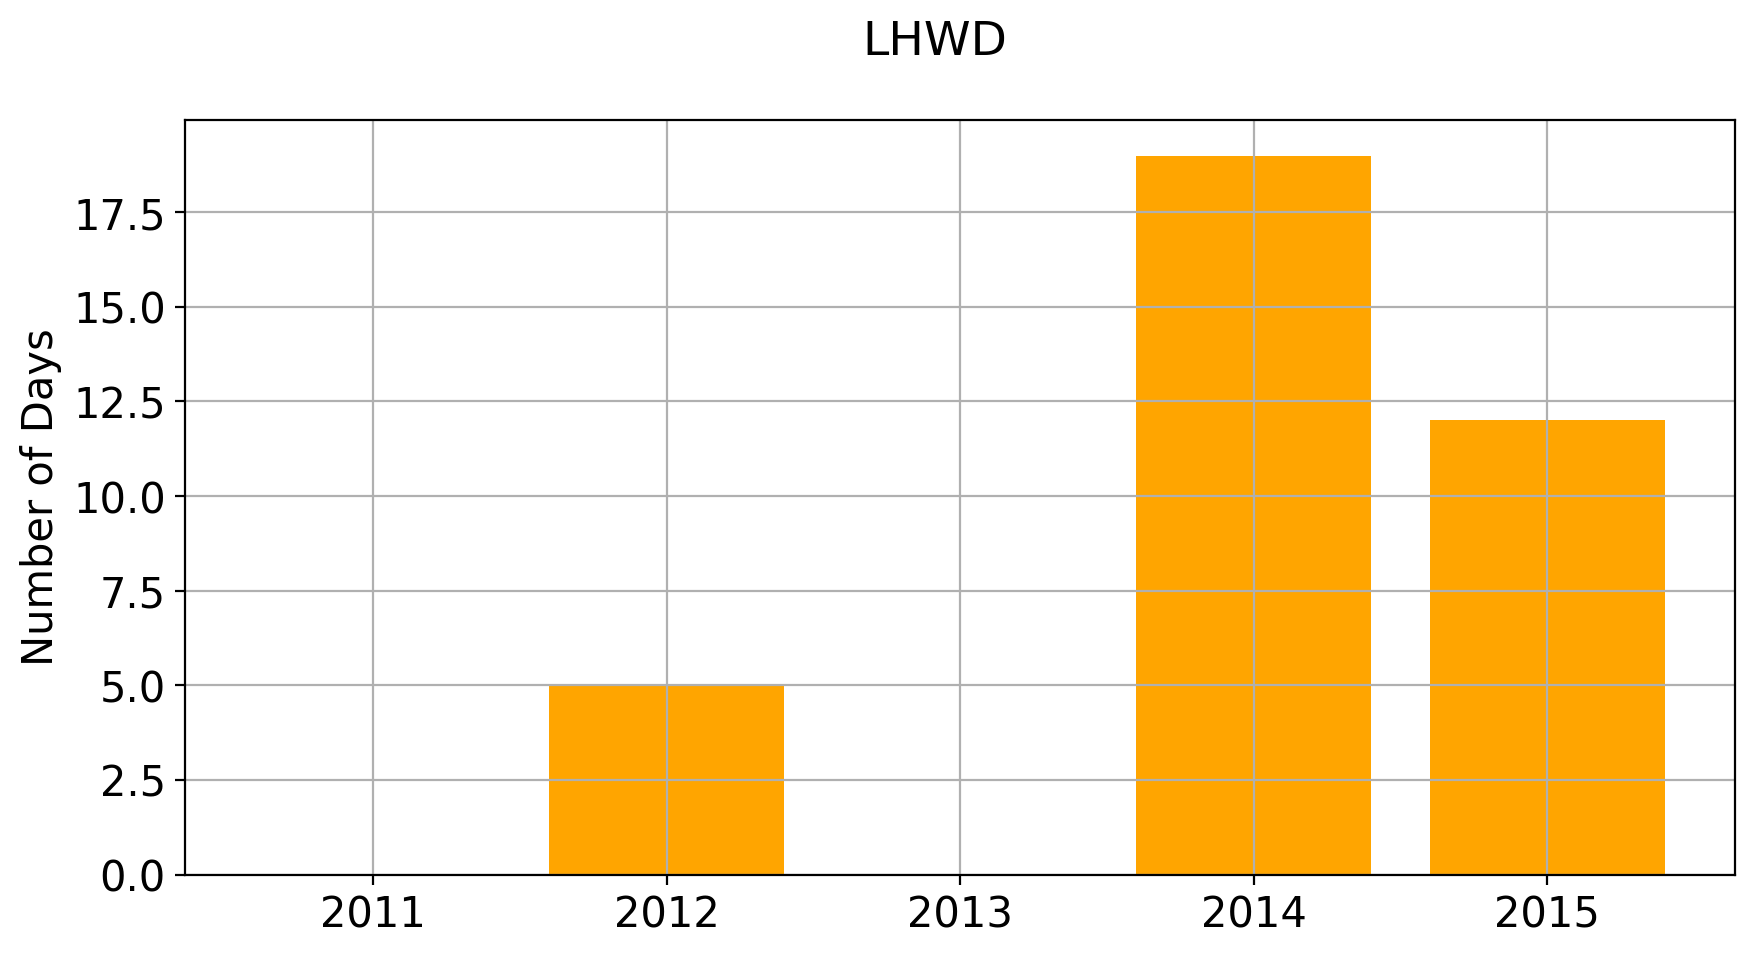

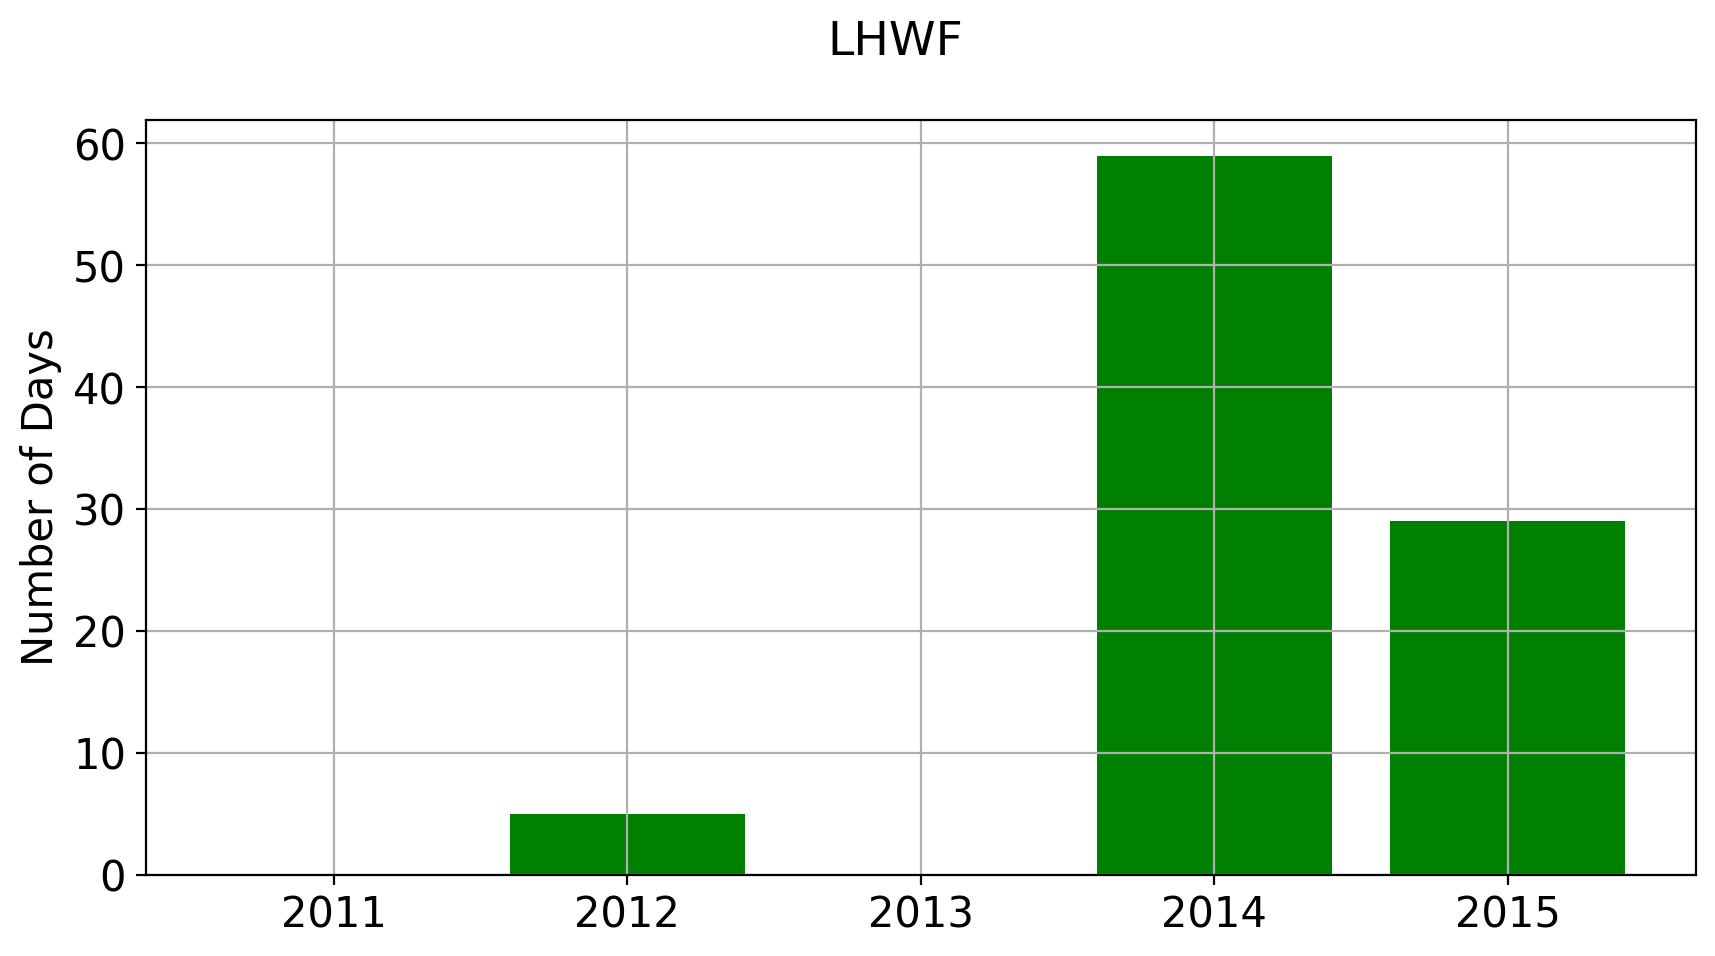

In [45]:
tex.wave_metrics(database_humidity,'LHW',True)

LHWN  LHWD  LHWF
YEAR SEASON                  
2011 1        0.0   0.0   0.0
     2        0.0   0.0   0.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0
2012 1        0.0   0.0   0.0
     2        1.0   5.0   5.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0
2013 1        0.0   0.0   0.0
     2        0.0   0.0   0.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0
2014 1        1.0   4.0   4.0
     2        5.0  19.0  35.0
     3        2.0   5.0   8.0
     4        1.0   3.0   3.0
2015 1        3.0   9.0  17.0
     2        2.0  12.0  15.0
     3        0.0   0.0   0.0
     4        2.0   3.0   6.0

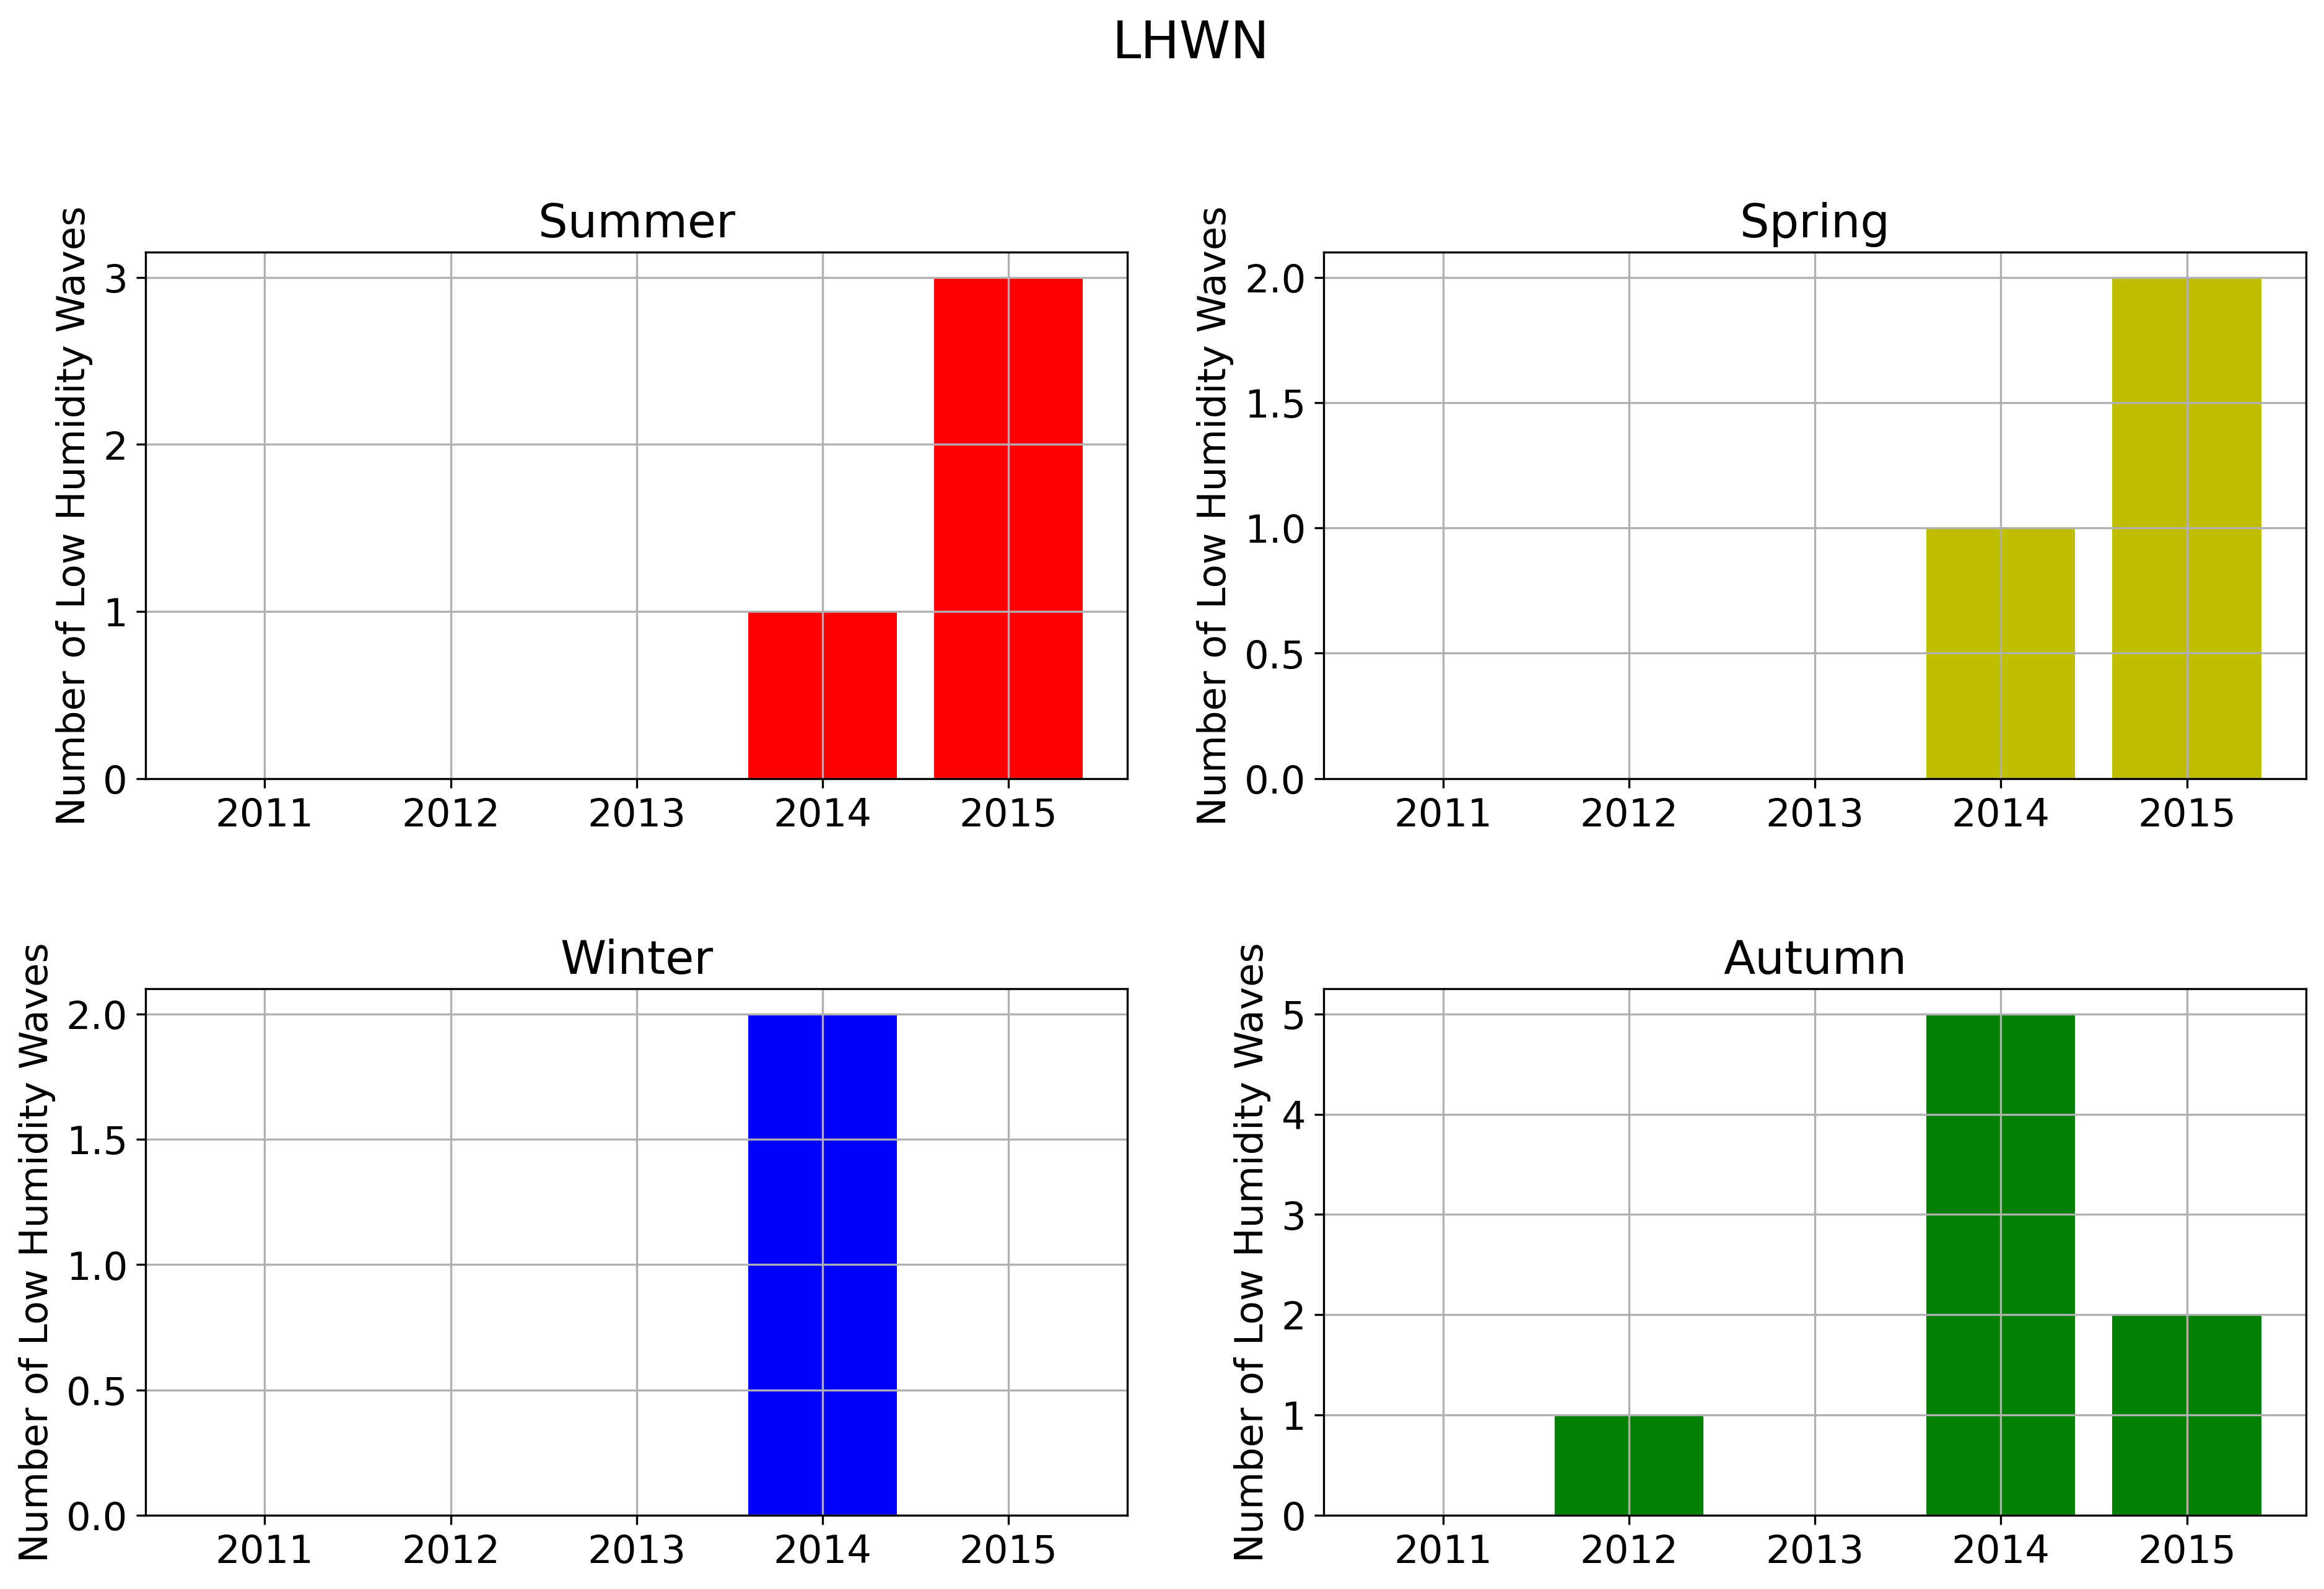

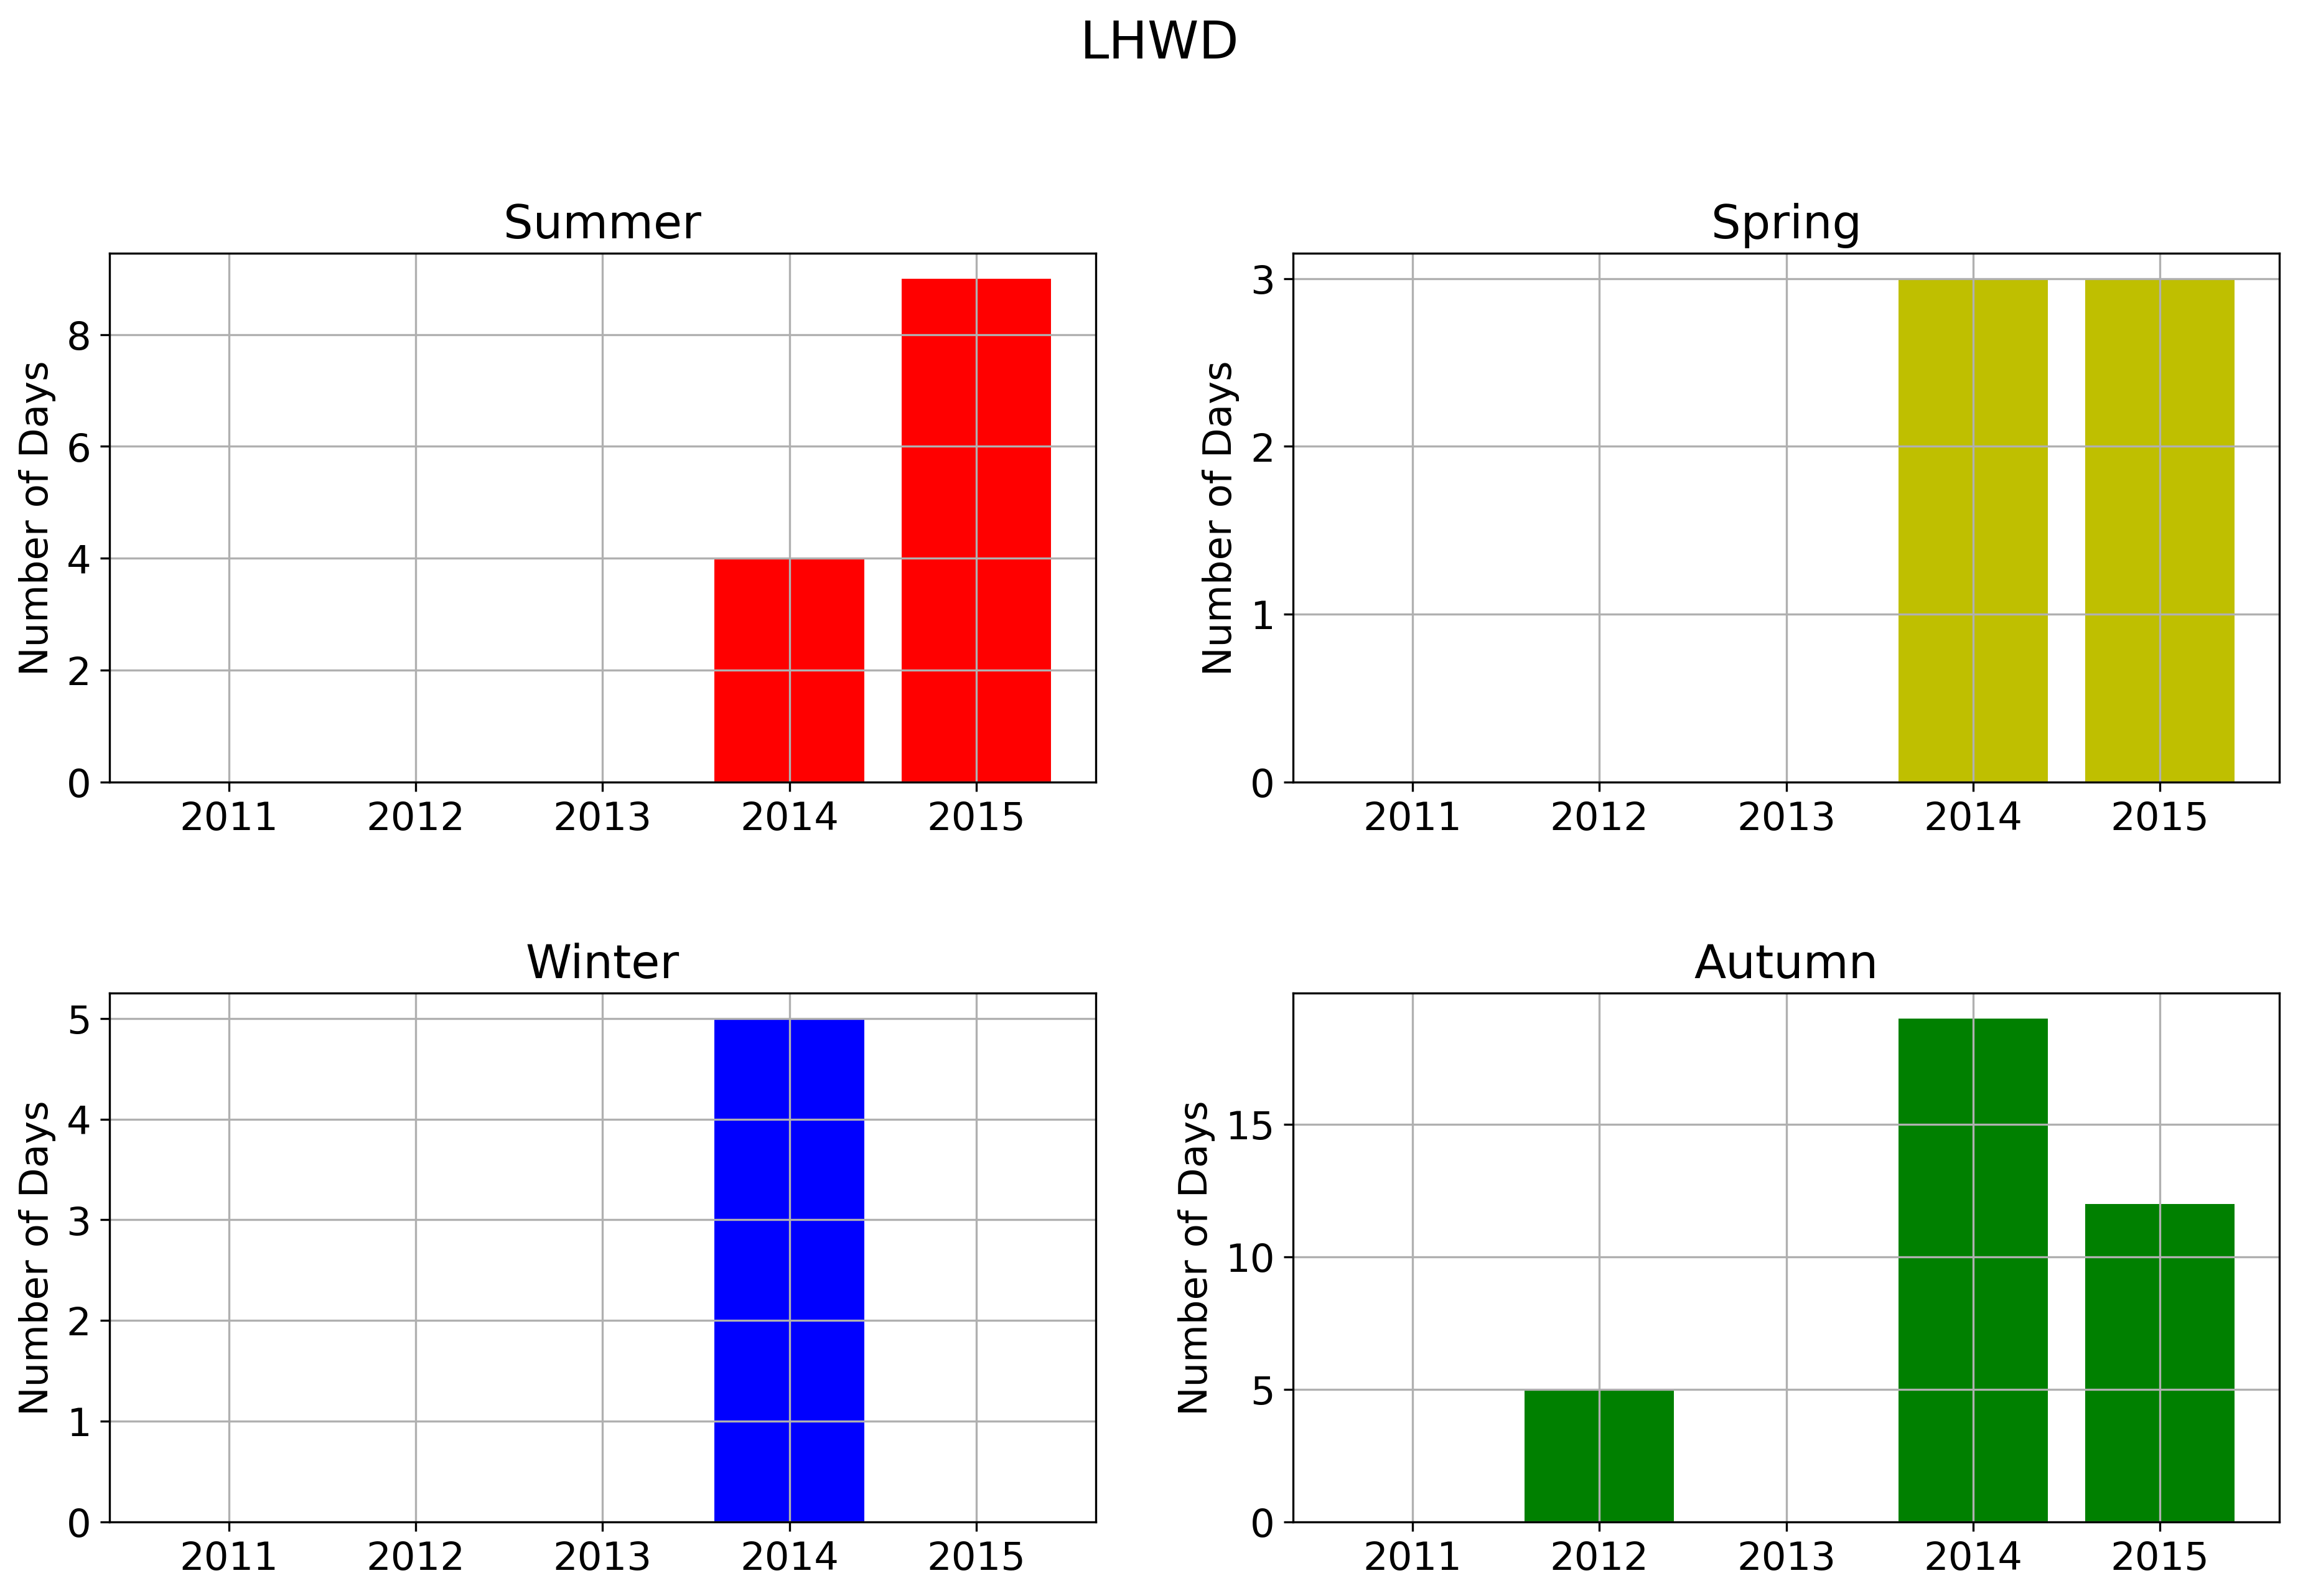

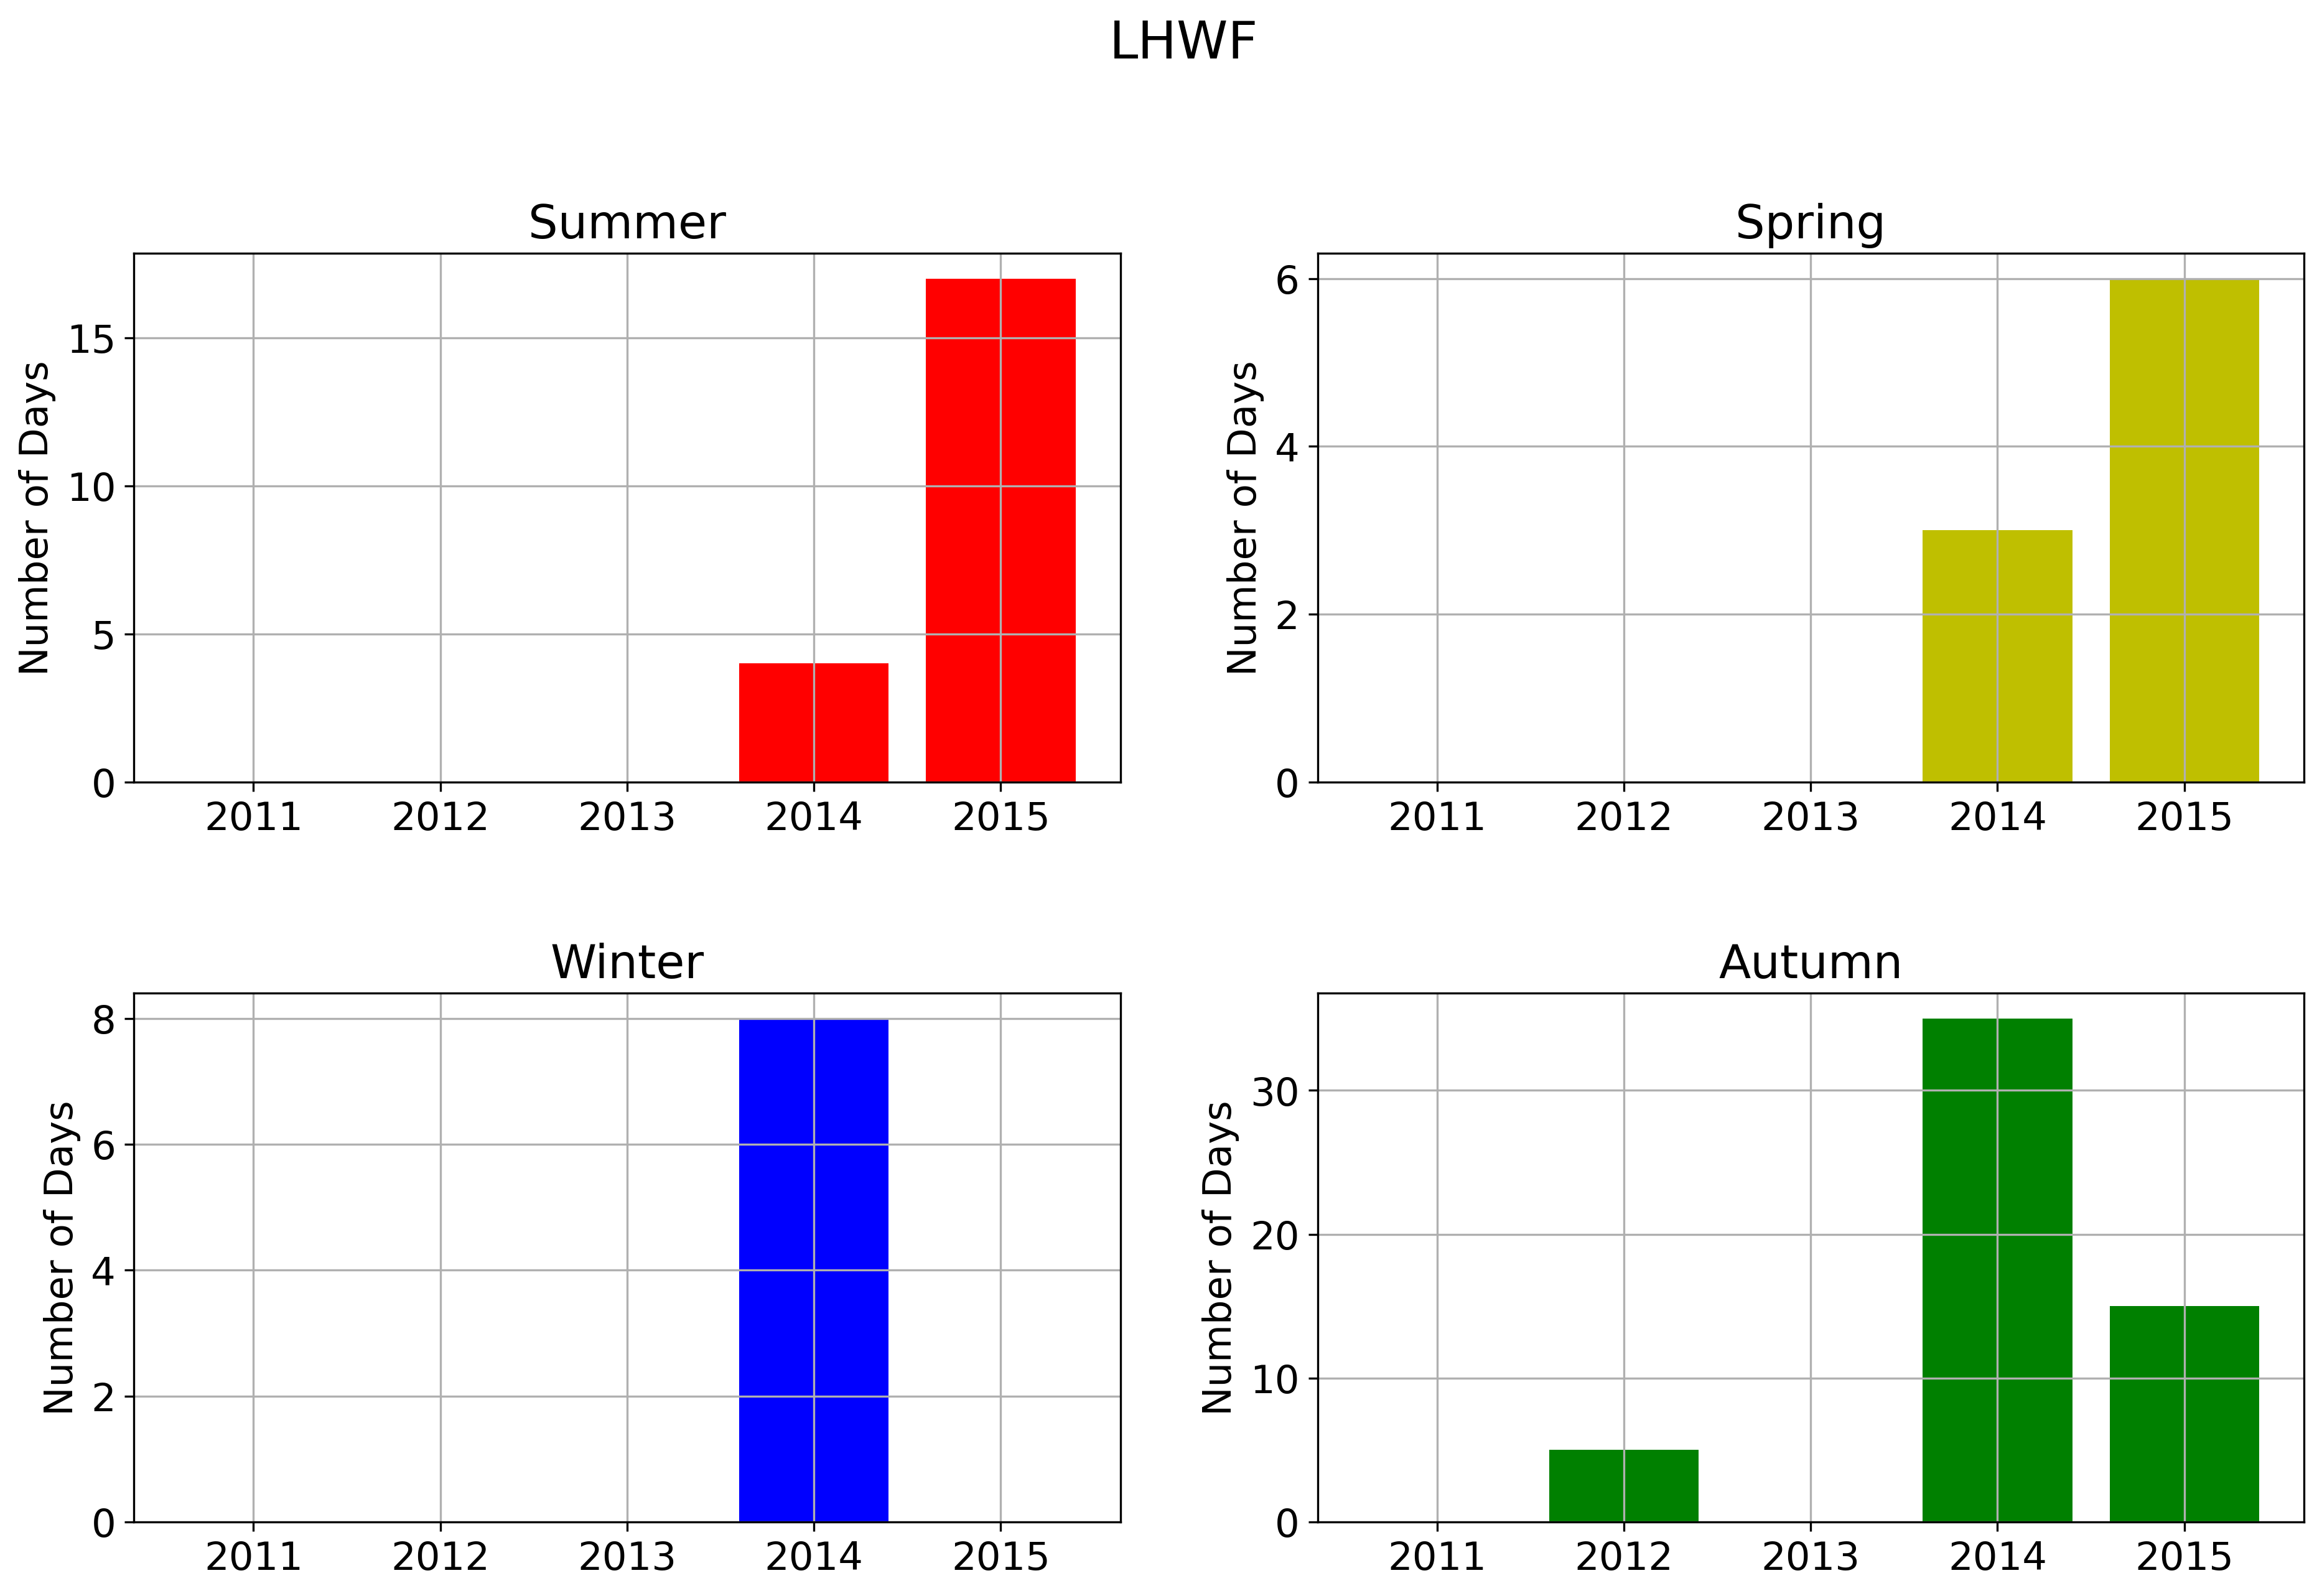

In [46]:
tex.wave_seasonMetrics(database_humidity,'LHW',True)

### High Humidity Wave

3 or more consecutive days with both minimum and maximum humidity above the 90th percentile.

In [47]:
help(tex.check_HighHumidityWave)

Help on function check_HighHumidityWave in module climatex:

check_HighHumidityWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for High Humidity Waves on the database according to the Climatic Normal 
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for humidity waves. It obtains first a dataframe with the percentiles computed from the Climatic Normal 
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the maximum and minimum values of humidity are above the corresponding percentile.
    ## If they are above the threshold, the column 'above_pct' receives 1. This column is 
    ## then used to identify if there are 3 o

In [48]:
#get dataframe with columns 'aboe_pct' and 'HHW' indicating the occurence of a high humidity wave
#and the dataframe with the 90th percentile for maximum and minimum humidity
database_humidity,df_pct = tex.check_HighHumidityWave(database_humidity,'Humidity_max(%)','Humidity_min(%)',climatic_norm_humidity,'Humidity_max(%)','Humidity_min(%)')

In [49]:
database_humidity

DAY365       DATE  Humidity_min(%)  ...  LHW  above_pct  HHW
0          1 2011-01-01             26.0  ...  0.0          0    0
1          2 2011-01-02             28.0  ...  0.0          0    0
2          3 2011-01-03             61.0  ...  0.0          0    0
3          4 2011-01-04             27.0  ...  0.0          0    0
4          5 2011-01-05             32.0  ...  0.0          0    0
...      ...        ...              ...  ...  ...        ...  ...
1820     361 2015-12-27             26.0  ...  0.0          0    0
1821     362 2015-12-28             37.0  ...  0.0          0    0
1822     363 2015-12-29             70.0  ...  0.0          0    0
1823     364 2015-12-30             50.0  ...  0.0          0    0
1824     365 2015-12-31             61.0  ...  0.0          0    0

[1825 rows x 9 columns]

In [50]:
df_pct

CMX90pct  CMN90pct
DAY365                    
1           99.0      64.0
2           99.0      64.8
3           99.0      65.7
4           99.0      66.6
5           99.0      67.0
...          ...       ...
361         99.0      61.3
362         99.0      62.0
363         99.0      63.5
364         99.0      64.0
365         99.0      64.0

[365 rows x 2 columns]

HHWN  HHWD  HHWF
YEAR                  
2011   0.0   0.0   0.0
2012   2.0   4.0   8.0
2013   4.0   5.0  16.0
2014   0.0   0.0   0.0
2015   0.0   0.0   0.0

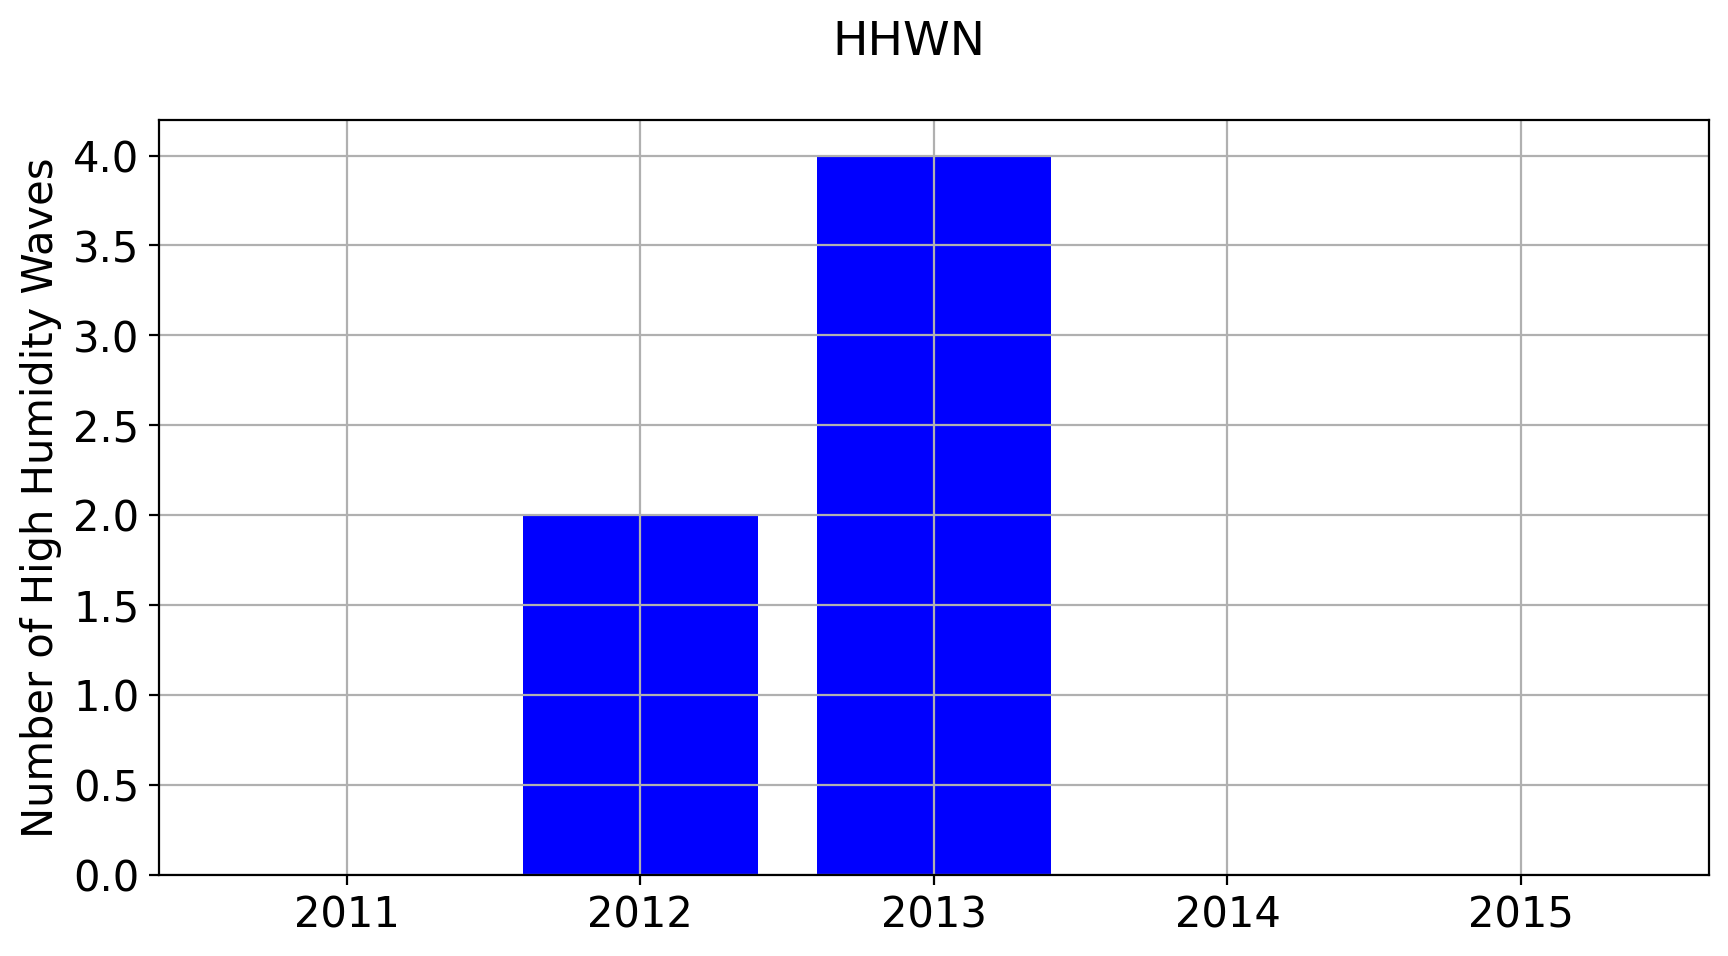

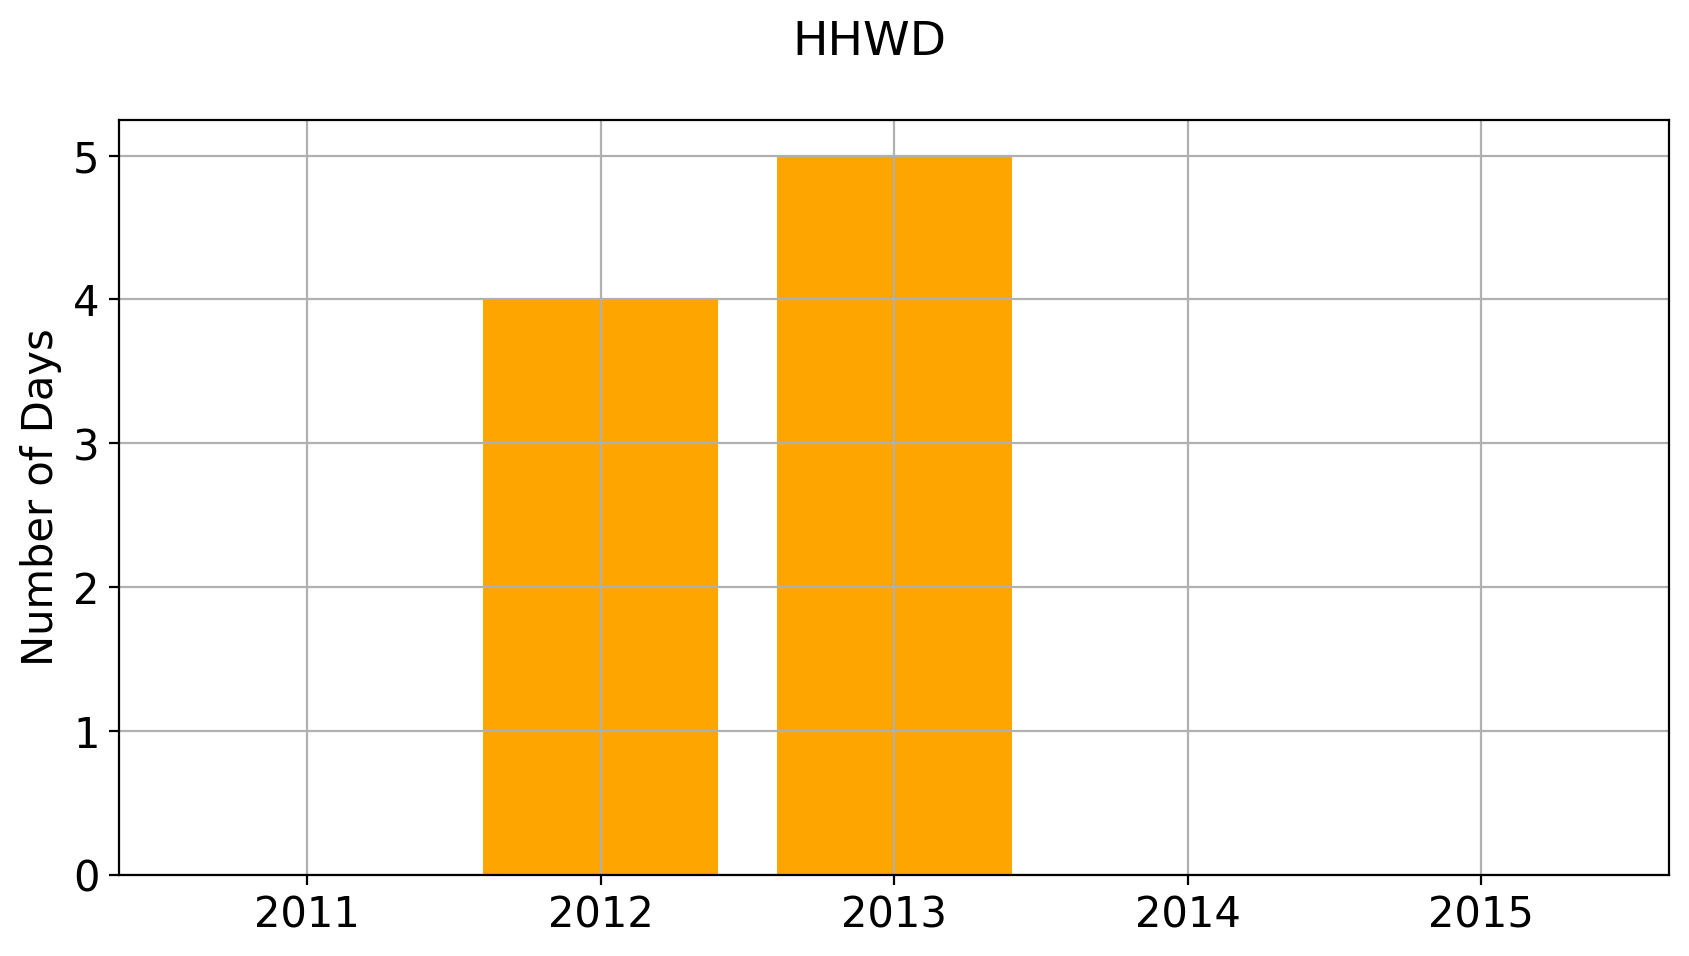

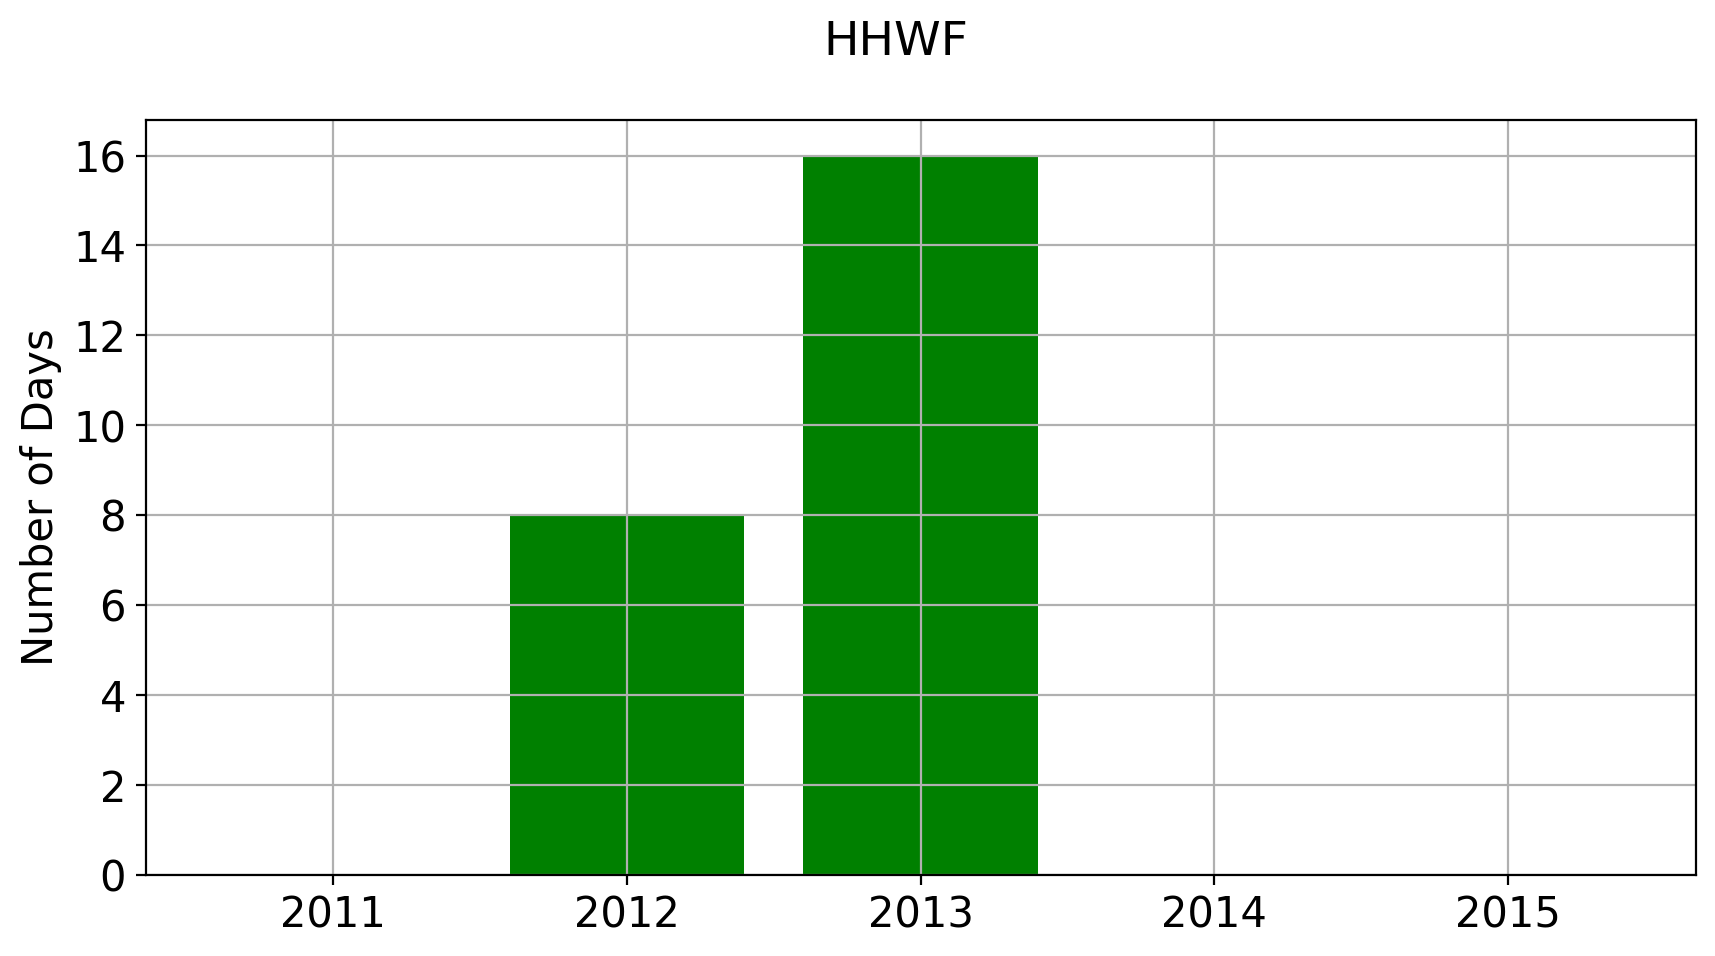

In [51]:
tex.wave_metrics(database_humidity,'HHW',True)

LHWN  LHWD  LHWF
YEAR SEASON                  
2011 1        0.0   0.0   0.0
     2        0.0   0.0   0.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0
2012 1        0.0   0.0   0.0
     2        1.0   5.0   5.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0
2013 1        0.0   0.0   0.0
     2        0.0   0.0   0.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0
2014 1        1.0   4.0   4.0
     2        5.0  19.0  35.0
     3        2.0   5.0   8.0
     4        1.0   3.0   3.0
2015 1        3.0   9.0  17.0
     2        2.0  12.0  15.0
     3        0.0   0.0   0.0
     4        2.0   3.0   6.0

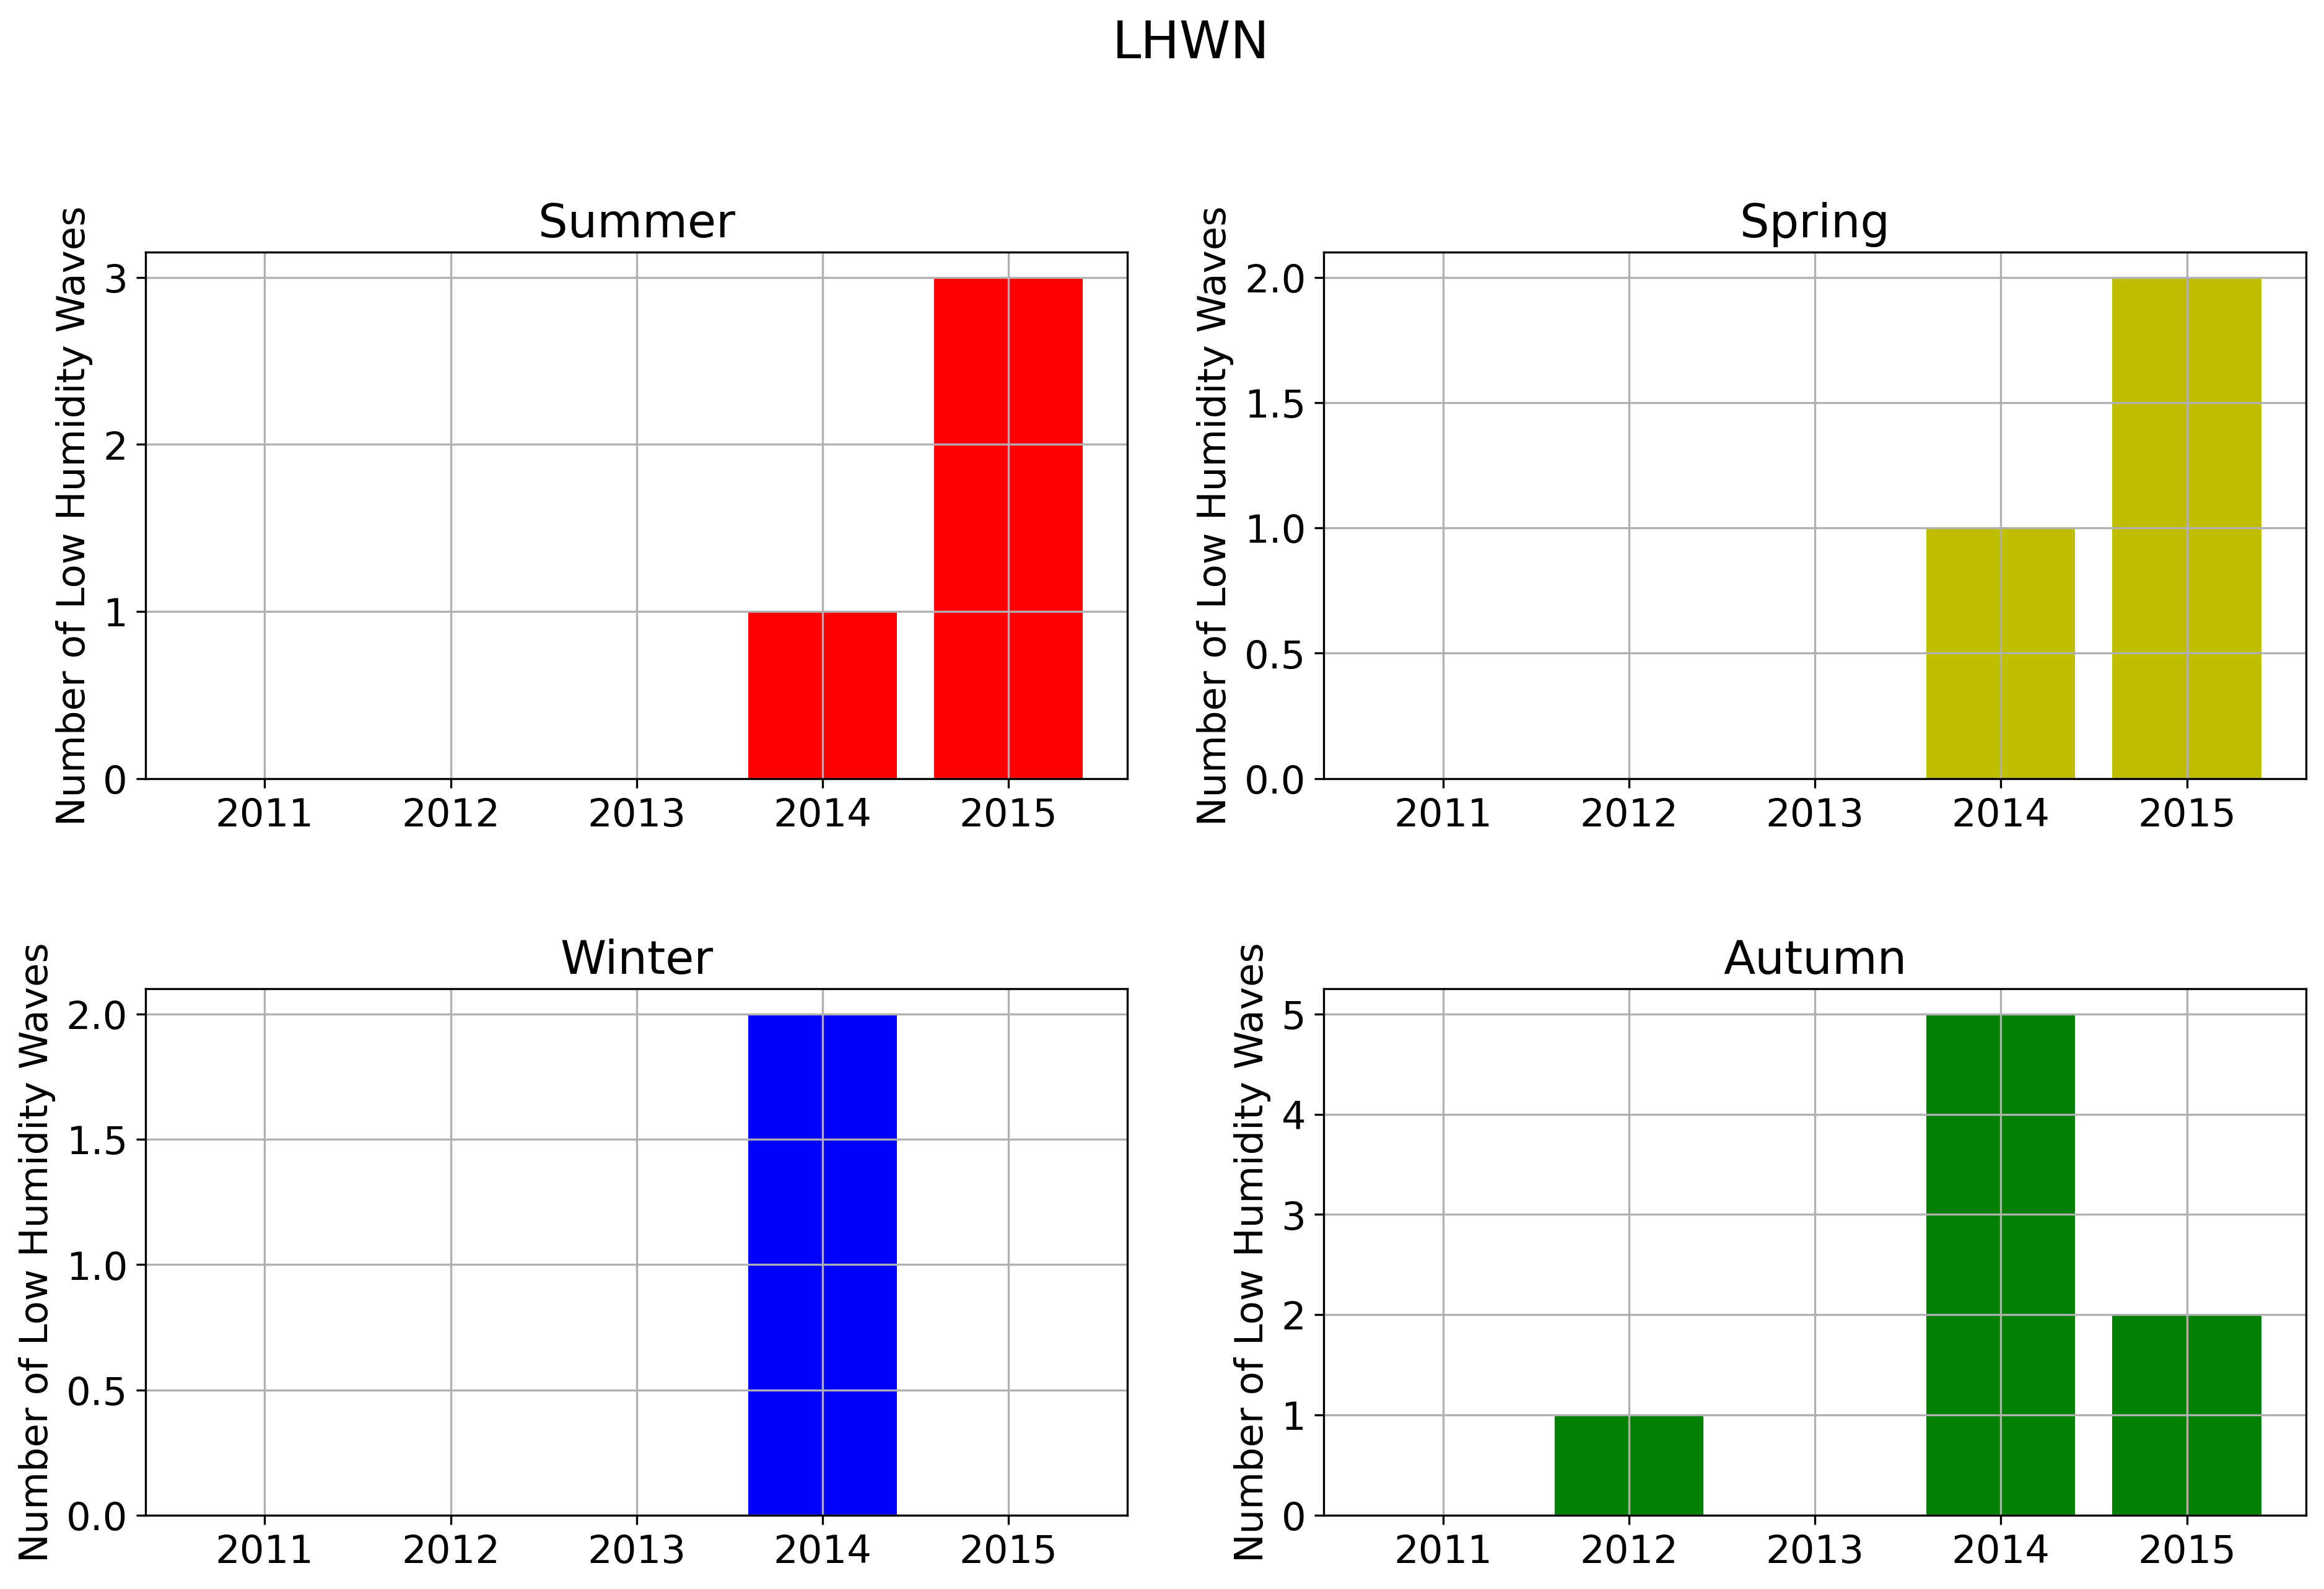

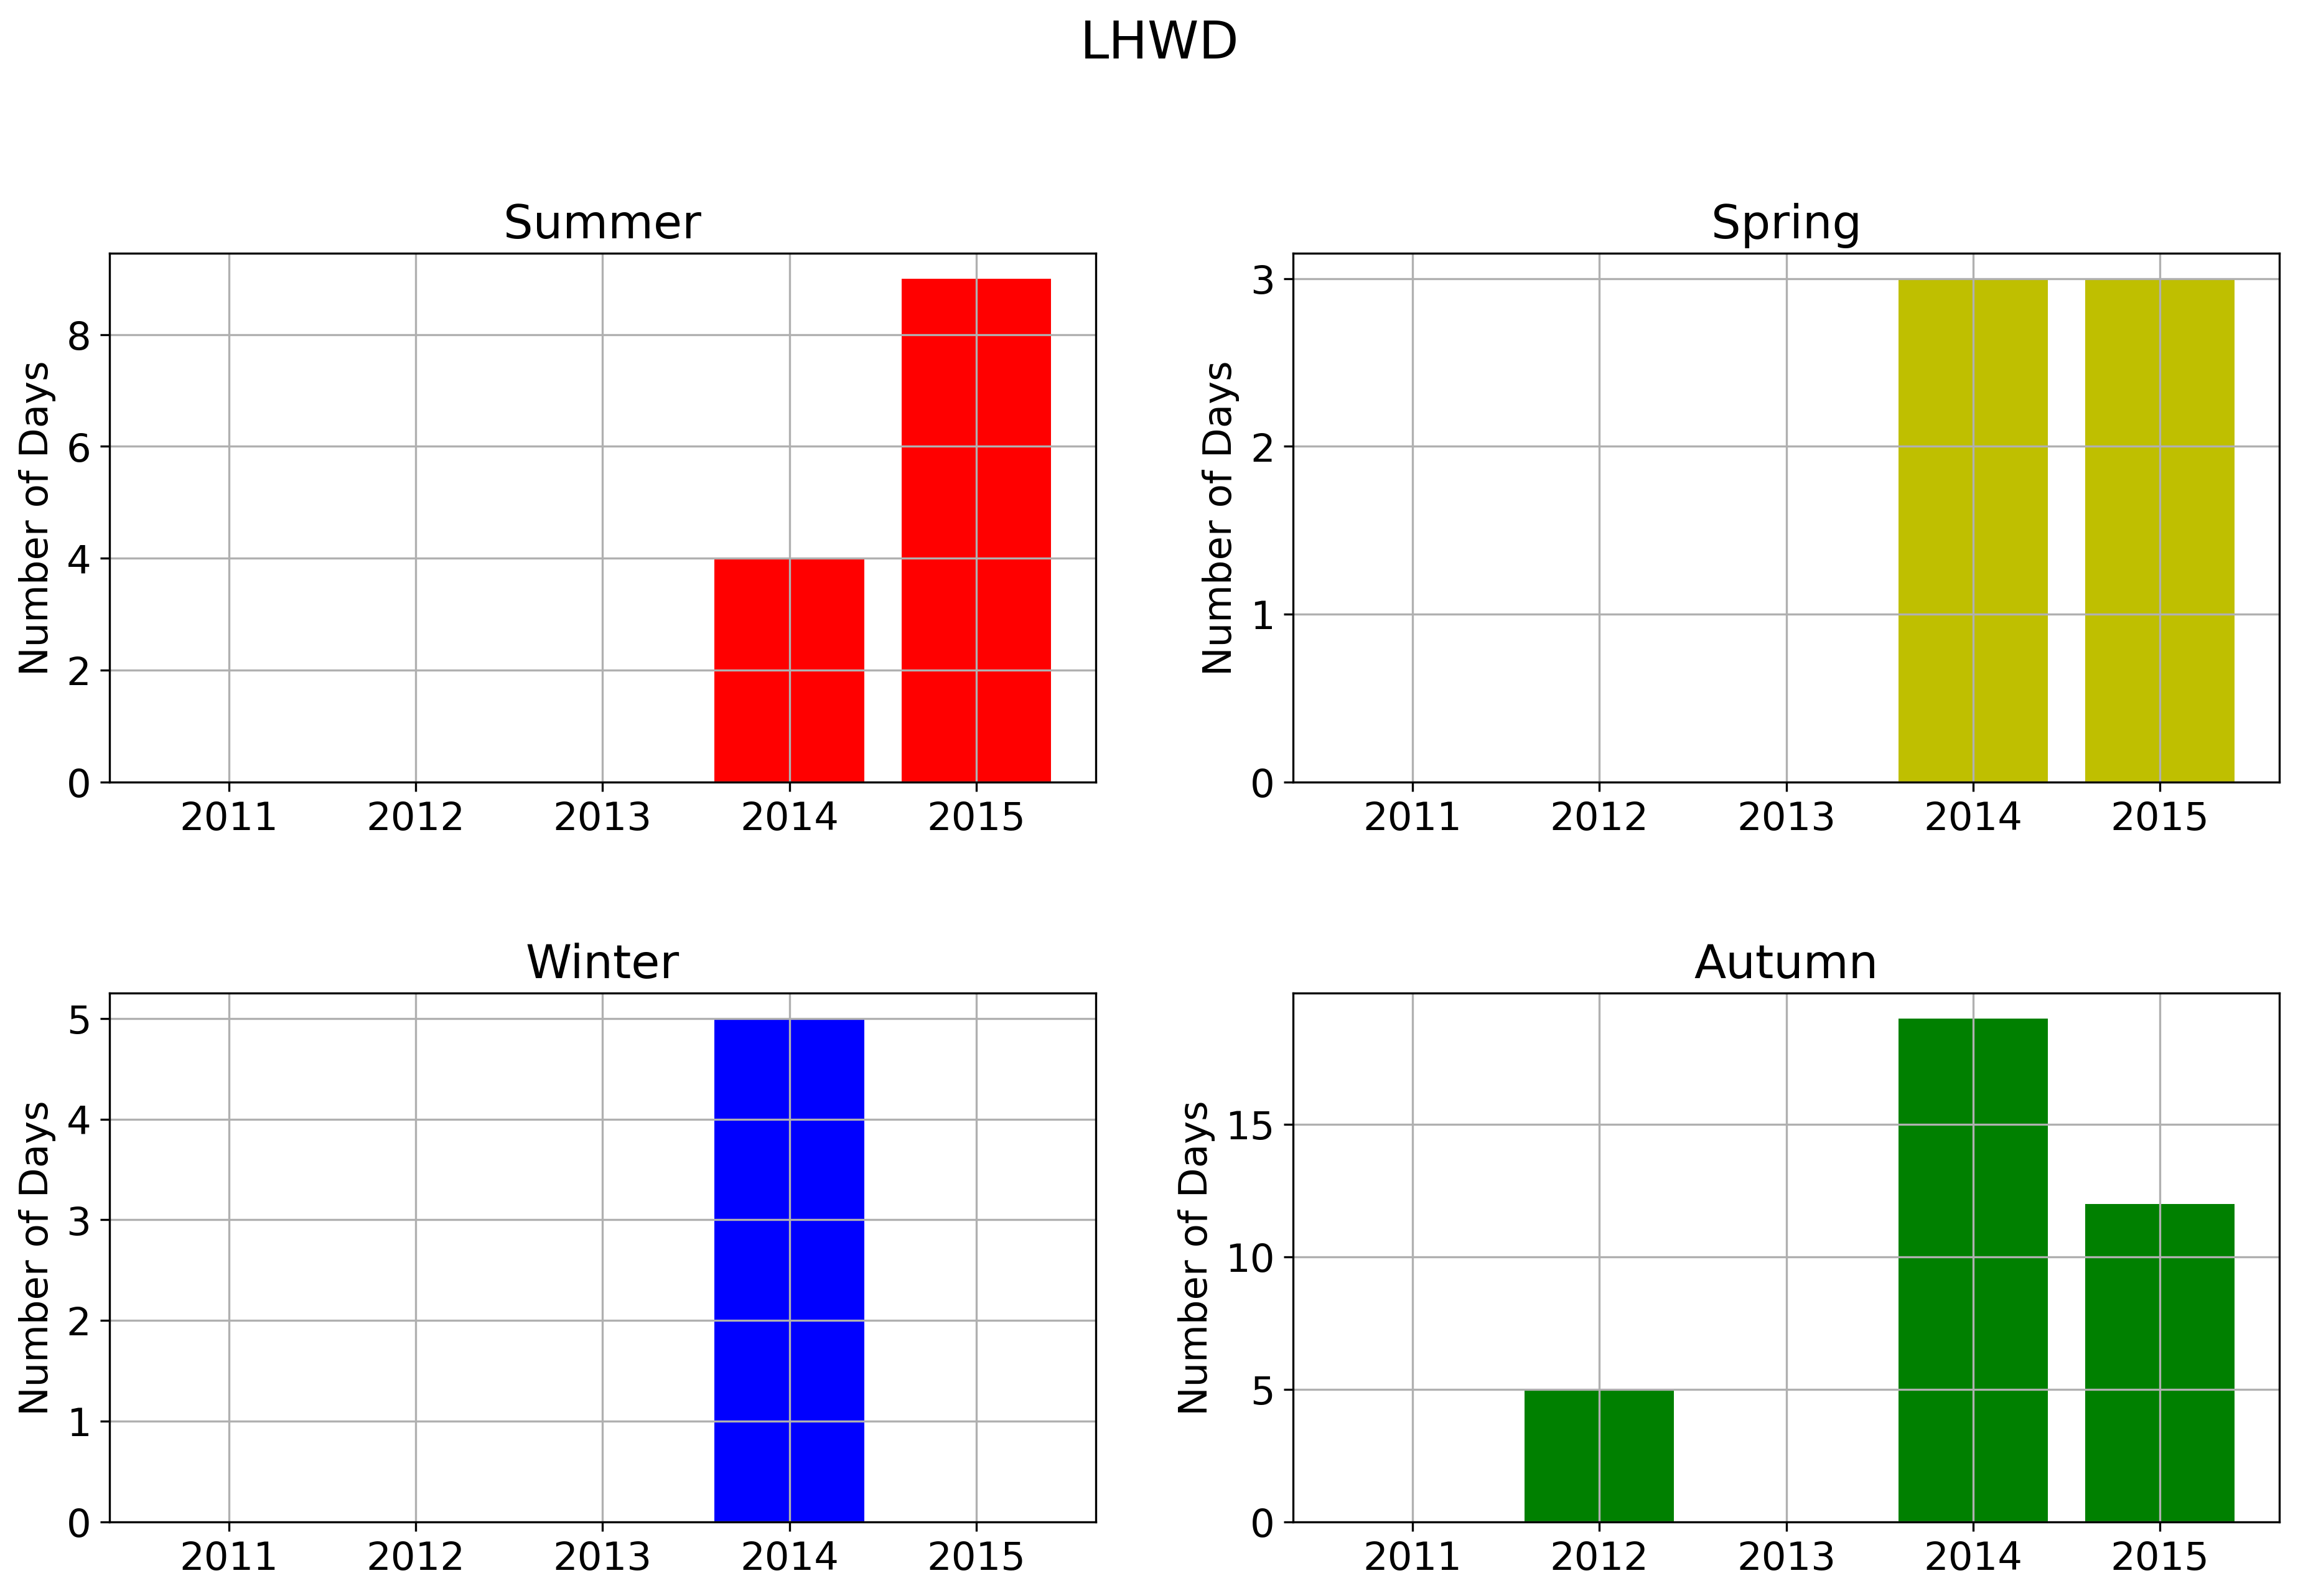

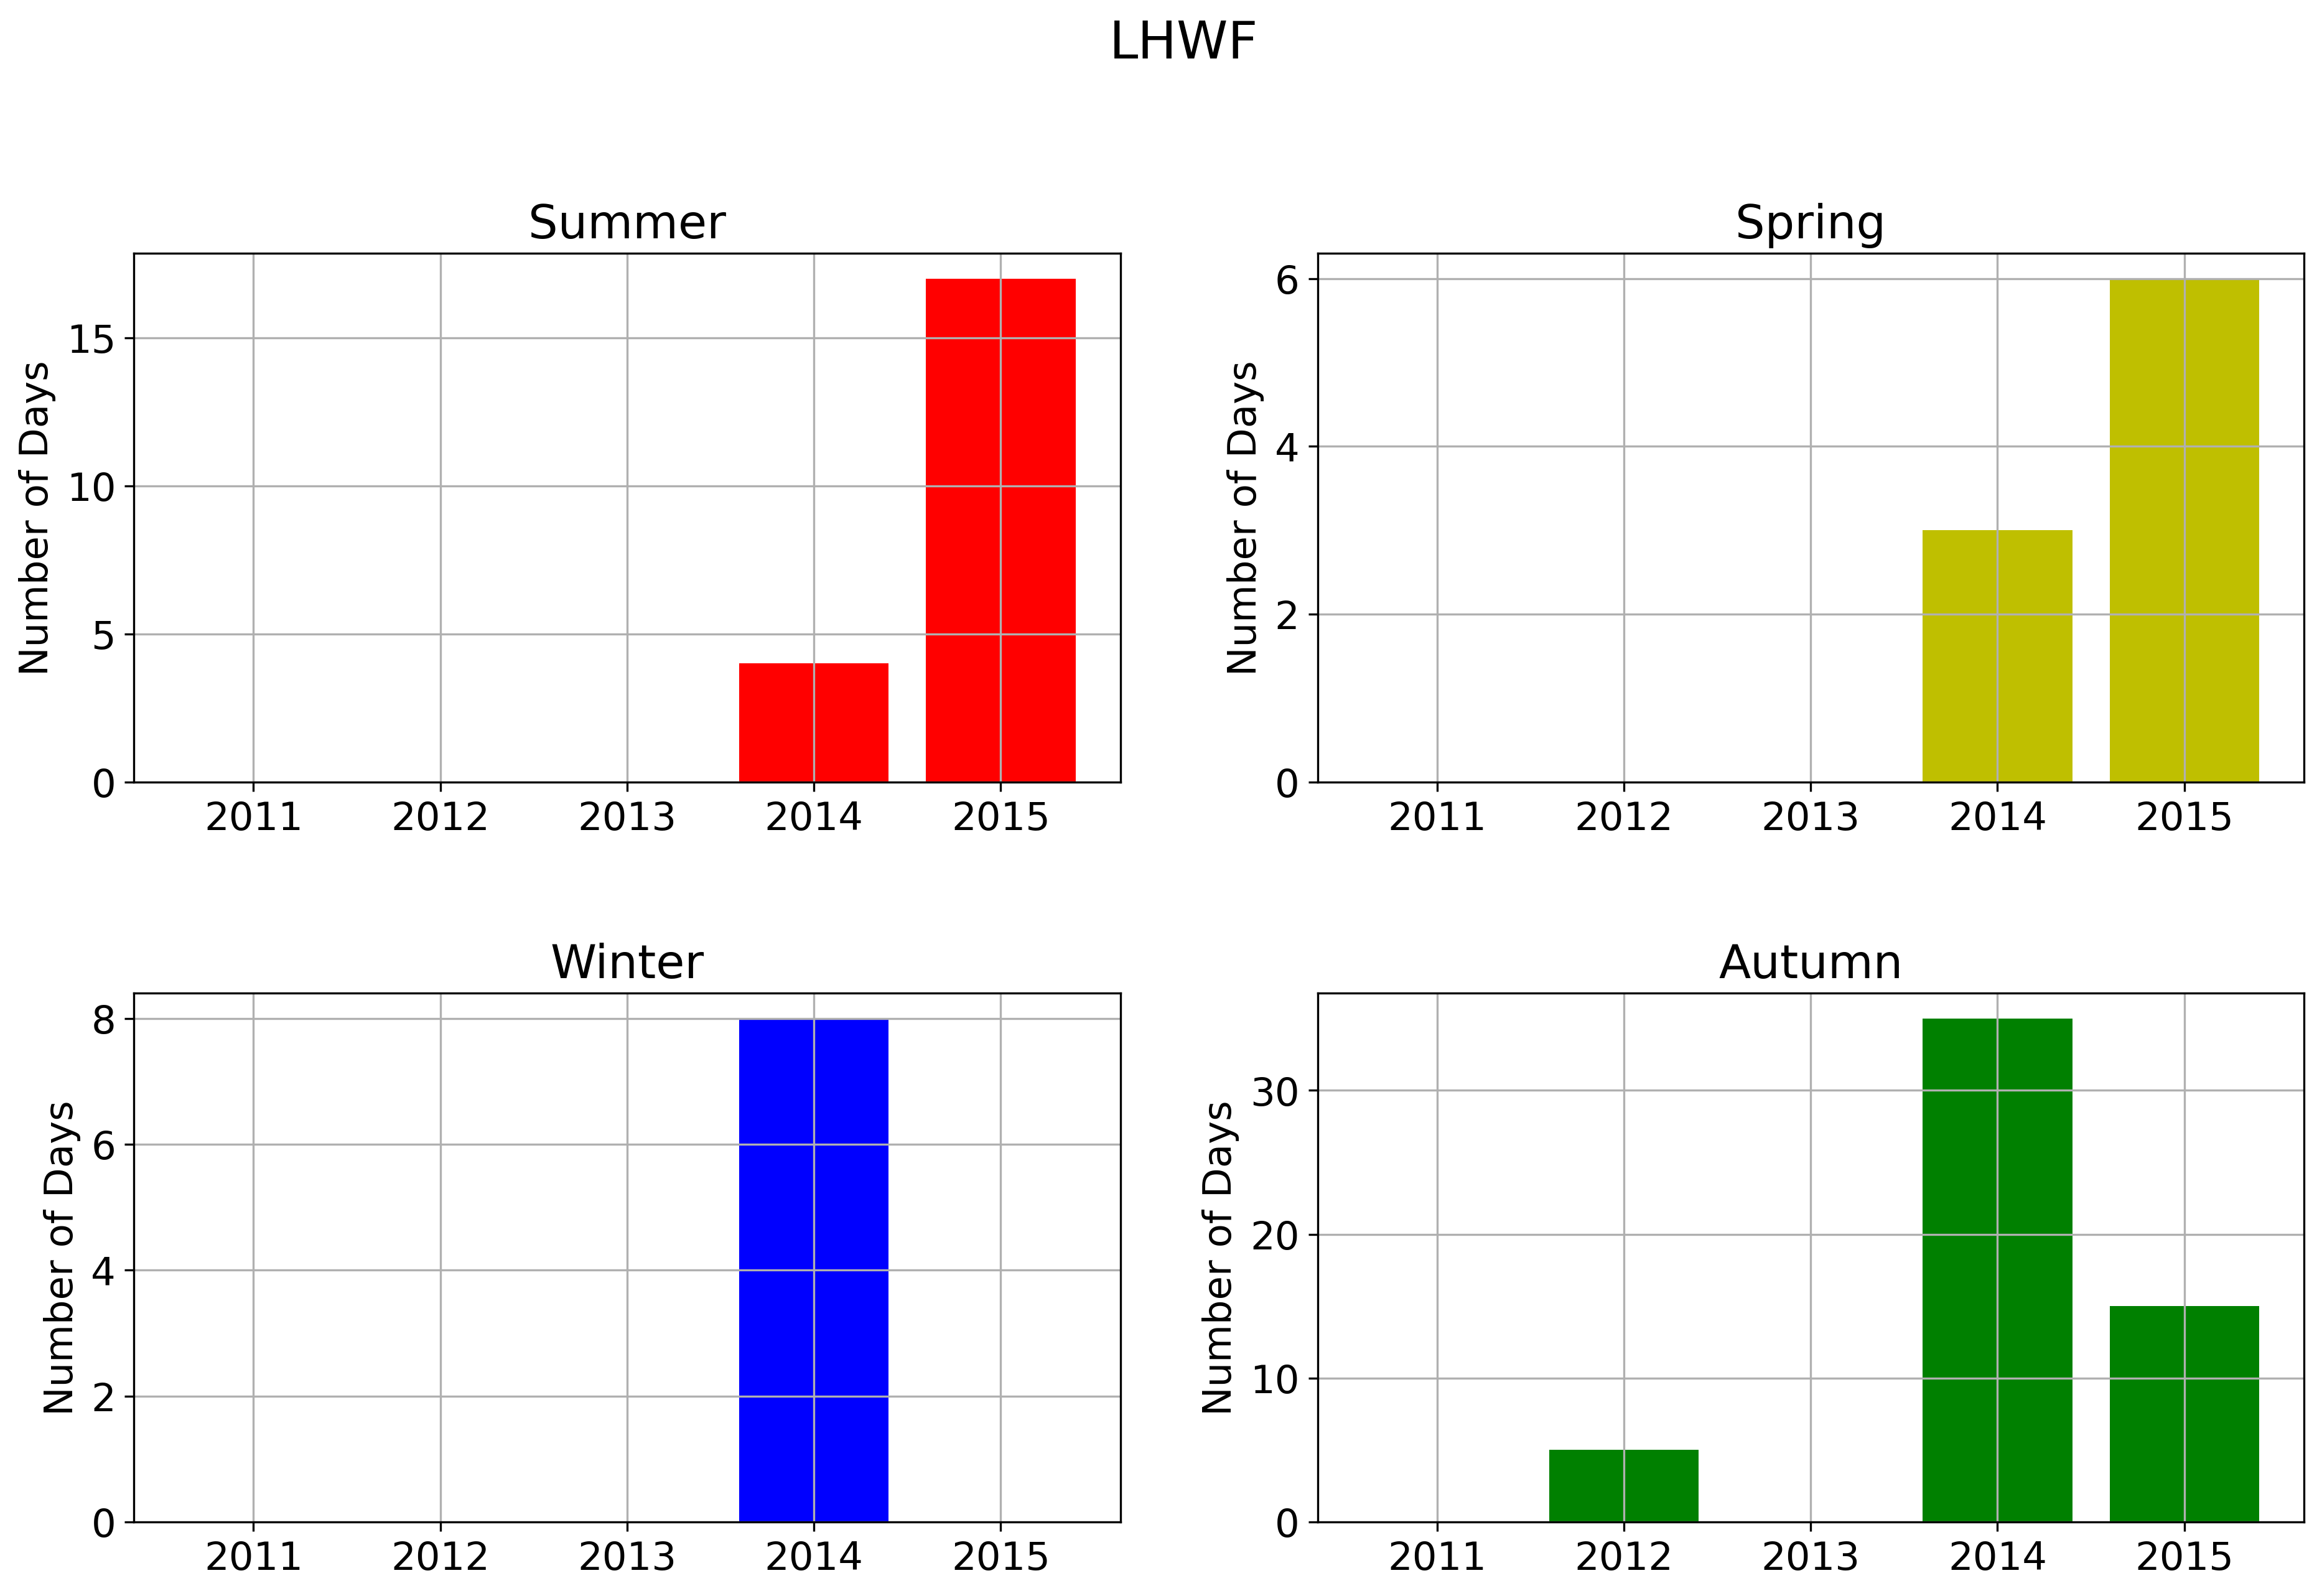

In [52]:
tex.wave_seasonMetrics(database_humidity,'LHW',True)

### Humidity range

Humidity range (humidity max - humidity min) above the 90th percentile.


In [53]:
help(tex.check_HumidityAboveRange)

Help on function check_HumidityAboveRange in module climatex:

check_HumidityAboveRange(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for days with a high range of humidity according to the Climatic Normal
    ##
    ## It first create a column for range in the database and in the Climatic normal. 
    ## Then it obtains a dataframe with the percentiles computed from the Climatic Normal
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the range is above the percentile. If it is above the threshold, 
    ## the column 'above_pct_range' receives 1.
    ##
    ## Climatic Normal dataframe needs to have at least 'DATE' and 'pct_column'
    ## Database dataframe needs to have at lea

In [54]:
#get dataframe with columns 'above_pct_range' indicating the occurence of the event
#and the dataframe with the 90th percentile for humidity range
database_humidity, df_pct = tex.check_HumidityAboveRange(database_humidity,'Humidity_max(%)','Humidity_min(%)',climatic_norm_humidity,'Humidity_max(%)','Humidity_min(%)')

In [55]:
database_humidity

DAY365       DATE  Humidity_min(%)  ...  HHW  Humidity range  above_pct_range
0          1 2011-01-01             26.0  ...  0.0            58.0                0
1          2 2011-01-02             28.0  ...  0.0            70.0                1
2          3 2011-01-03             61.0  ...  0.0            38.0                0
3          4 2011-01-04             27.0  ...  0.0            68.0                1
4          5 2011-01-05             32.0  ...  0.0            61.0                0
...      ...        ...              ...  ...  ...             ...              ...
1820     361 2015-12-27             26.0  ...  0.0            53.0                0
1821     362 2015-12-28             37.0  ...  0.0            59.0                0
1822     363 2015-12-29             70.0  ...  0.0            27.0                0
1823     364 2015-12-30             50.0  ...  0.0            47.0                0
1824     365 2015-12-31             61.0  ...  0.0            35.0                0

[1825 rows x 11 columns]

In [56]:
df_pct

C90pct
DAY365        
1         63.9
2         63.0
3         62.0
4         62.0
5         62.0
...        ...
361       65.3
362       65.0
363       65.0
364       65.0
365       65.0

[365 rows x 1 columns]

RND
YEAR     
2011   60
2012   57
2013   28
2014   50
2015   30

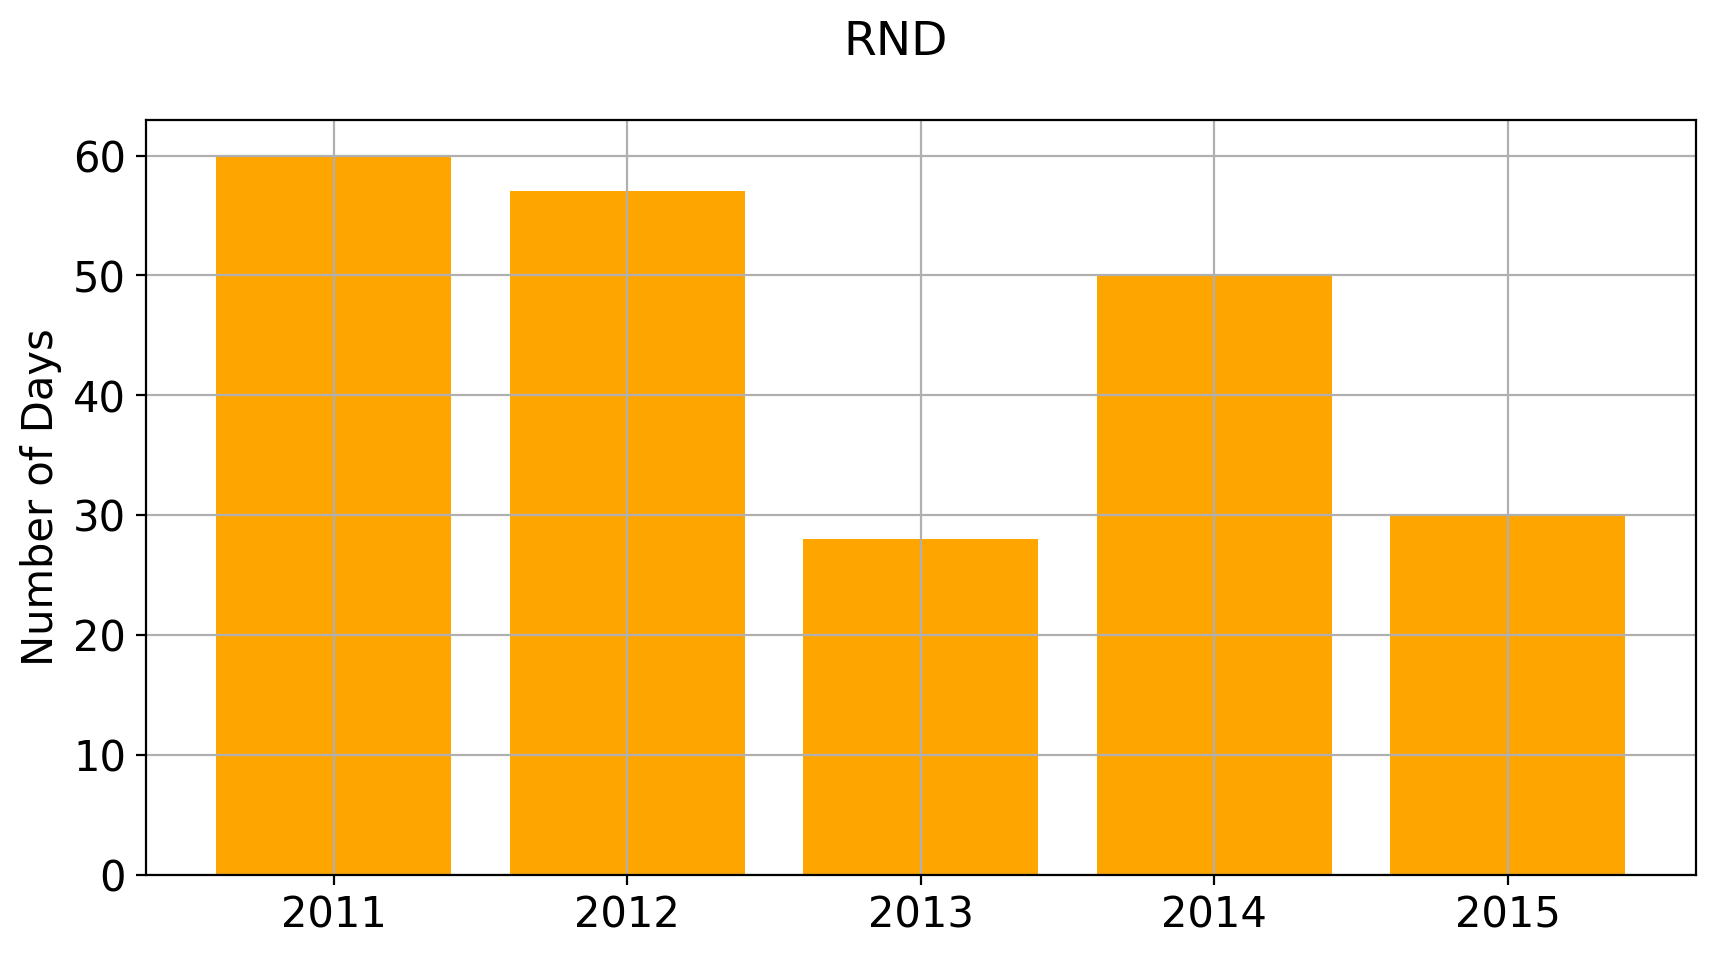

In [57]:
tex.range_metrics(database_humidity,True)

RND
YEAR SEASON     
2011 1        12
     2        20
     3        12
     4        16
2012 1        14
     2        27
     3         9
     4         7
2013 1         8
     2         6
     3         8
     4         6
2014 1        12
     2        23
     3         9
     4         6
2015 1         7
     2        11
     3         5
     4         7

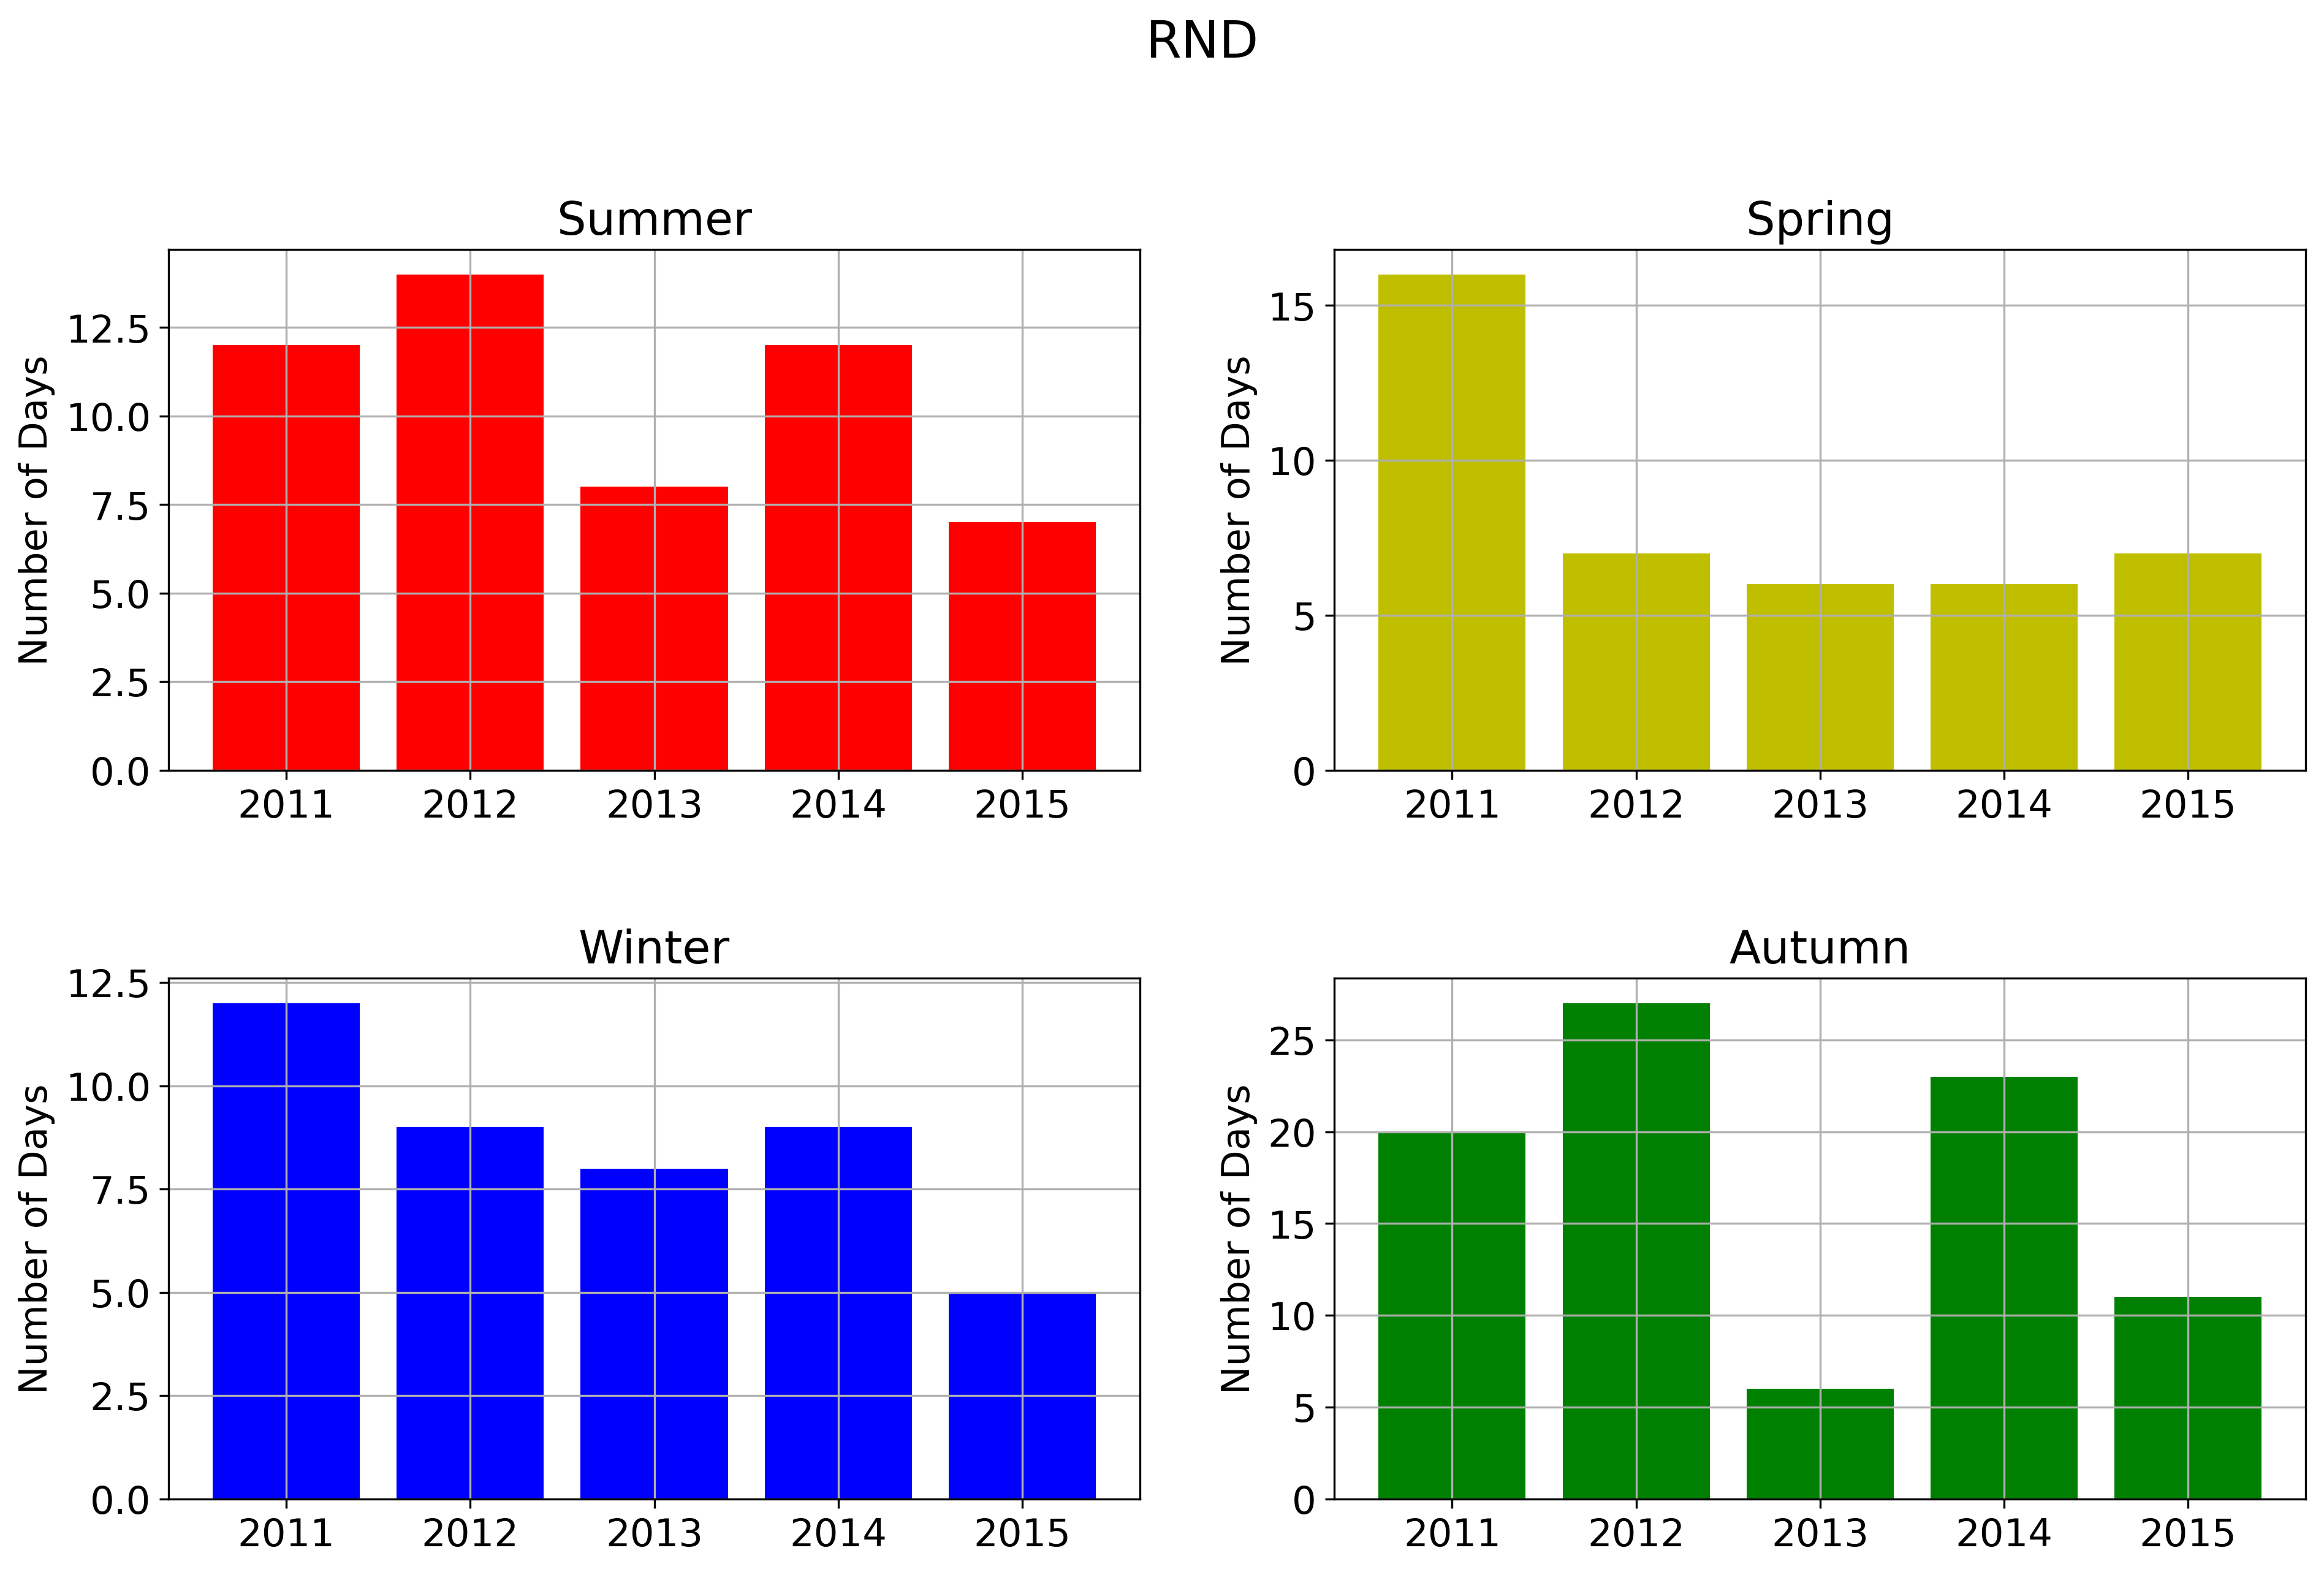

In [58]:
tex.range_seasonMetrics(database_humidity,True)

### Humidity Difference between days

Difference between maximum and minimum humidity between subsequent days above 90th percentile.


In [59]:
help(tex.check_Humidity_difdays)

Help on function check_Humidity_difdays in module climatex:

check_Humidity_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of humidity according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## humidity (Dif_max) between two subsequent days and for the difference between minimum
    ## humidity (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Climatic Normal a

In [60]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum humidity difference
database_humidity, df_pct = tex.check_Humidity_difdays(database_humidity,'Humidity_max(%)','Humidity_min(%)',climatic_norm_humidity,'Humidity_max(%)','Humidity_min(%)')

In [61]:
database_humidity

DAY365       DATE  Humidity_min(%)  ...  Dif_min  Dif_max  above_pct_dif
0          1 2011-01-01             26.0  ...      NaN      NaN              0
1          2 2011-01-02             28.0  ...      2.0     14.0              0
2          3 2011-01-03             61.0  ...     33.0      1.0              0
3          4 2011-01-04             27.0  ...    -34.0     -4.0              0
4          5 2011-01-05             32.0  ...      5.0     -2.0              0
...      ...        ...              ...  ...      ...      ...            ...
1820     361 2015-12-27             26.0  ...    -12.0     -4.0              0
1821     362 2015-12-28             37.0  ...     11.0     17.0              0
1822     363 2015-12-29             70.0  ...     33.0      1.0              0
1823     364 2015-12-30             50.0  ...    -20.0      0.0              0
1824     365 2015-12-31             61.0  ...     11.0     -1.0              0

[1825 rows x 15 columns]

In [62]:
df_pct

CMX90pct  CMN90pct
DAY365                    
1           12.0      23.0
2           12.0      23.0
3           12.0      24.0
4           12.0      24.0
5           11.6      24.0
...          ...       ...
361         12.0      22.0
362         12.0      22.0
363         12.0      22.5
364         12.0      23.0
365         11.7      23.0

[365 rows x 2 columns]

DND
YEAR     
2011    6
2012    4
2013    2
2014    4
2015    5

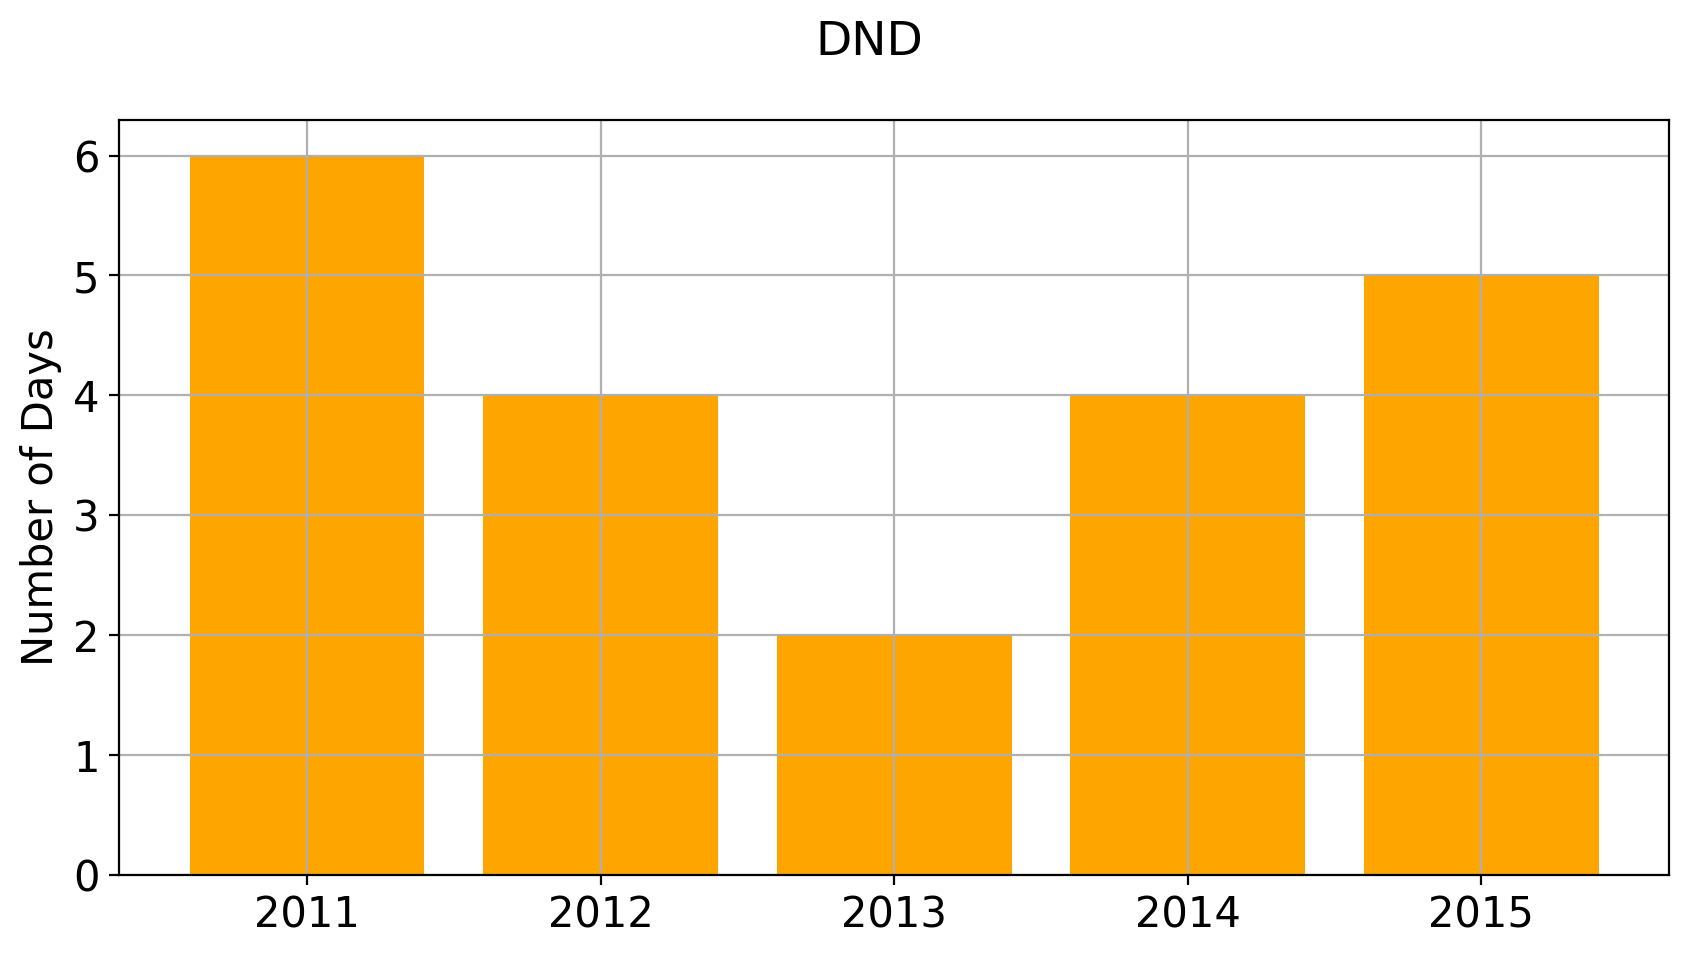

In [63]:
tex.dif_metrics(database_humidity,True)

RND
YEAR SEASON     
2011 1         2
     2         2
     3         1
     4         1
2012 1         1
     2         3
     3         0
     4         0
2013 1         1
     2         0
     3         0
     4         1
2014 1         0
     2         1
     3         0
     4         3
2015 1         0
     2         2
     3         2
     4         1

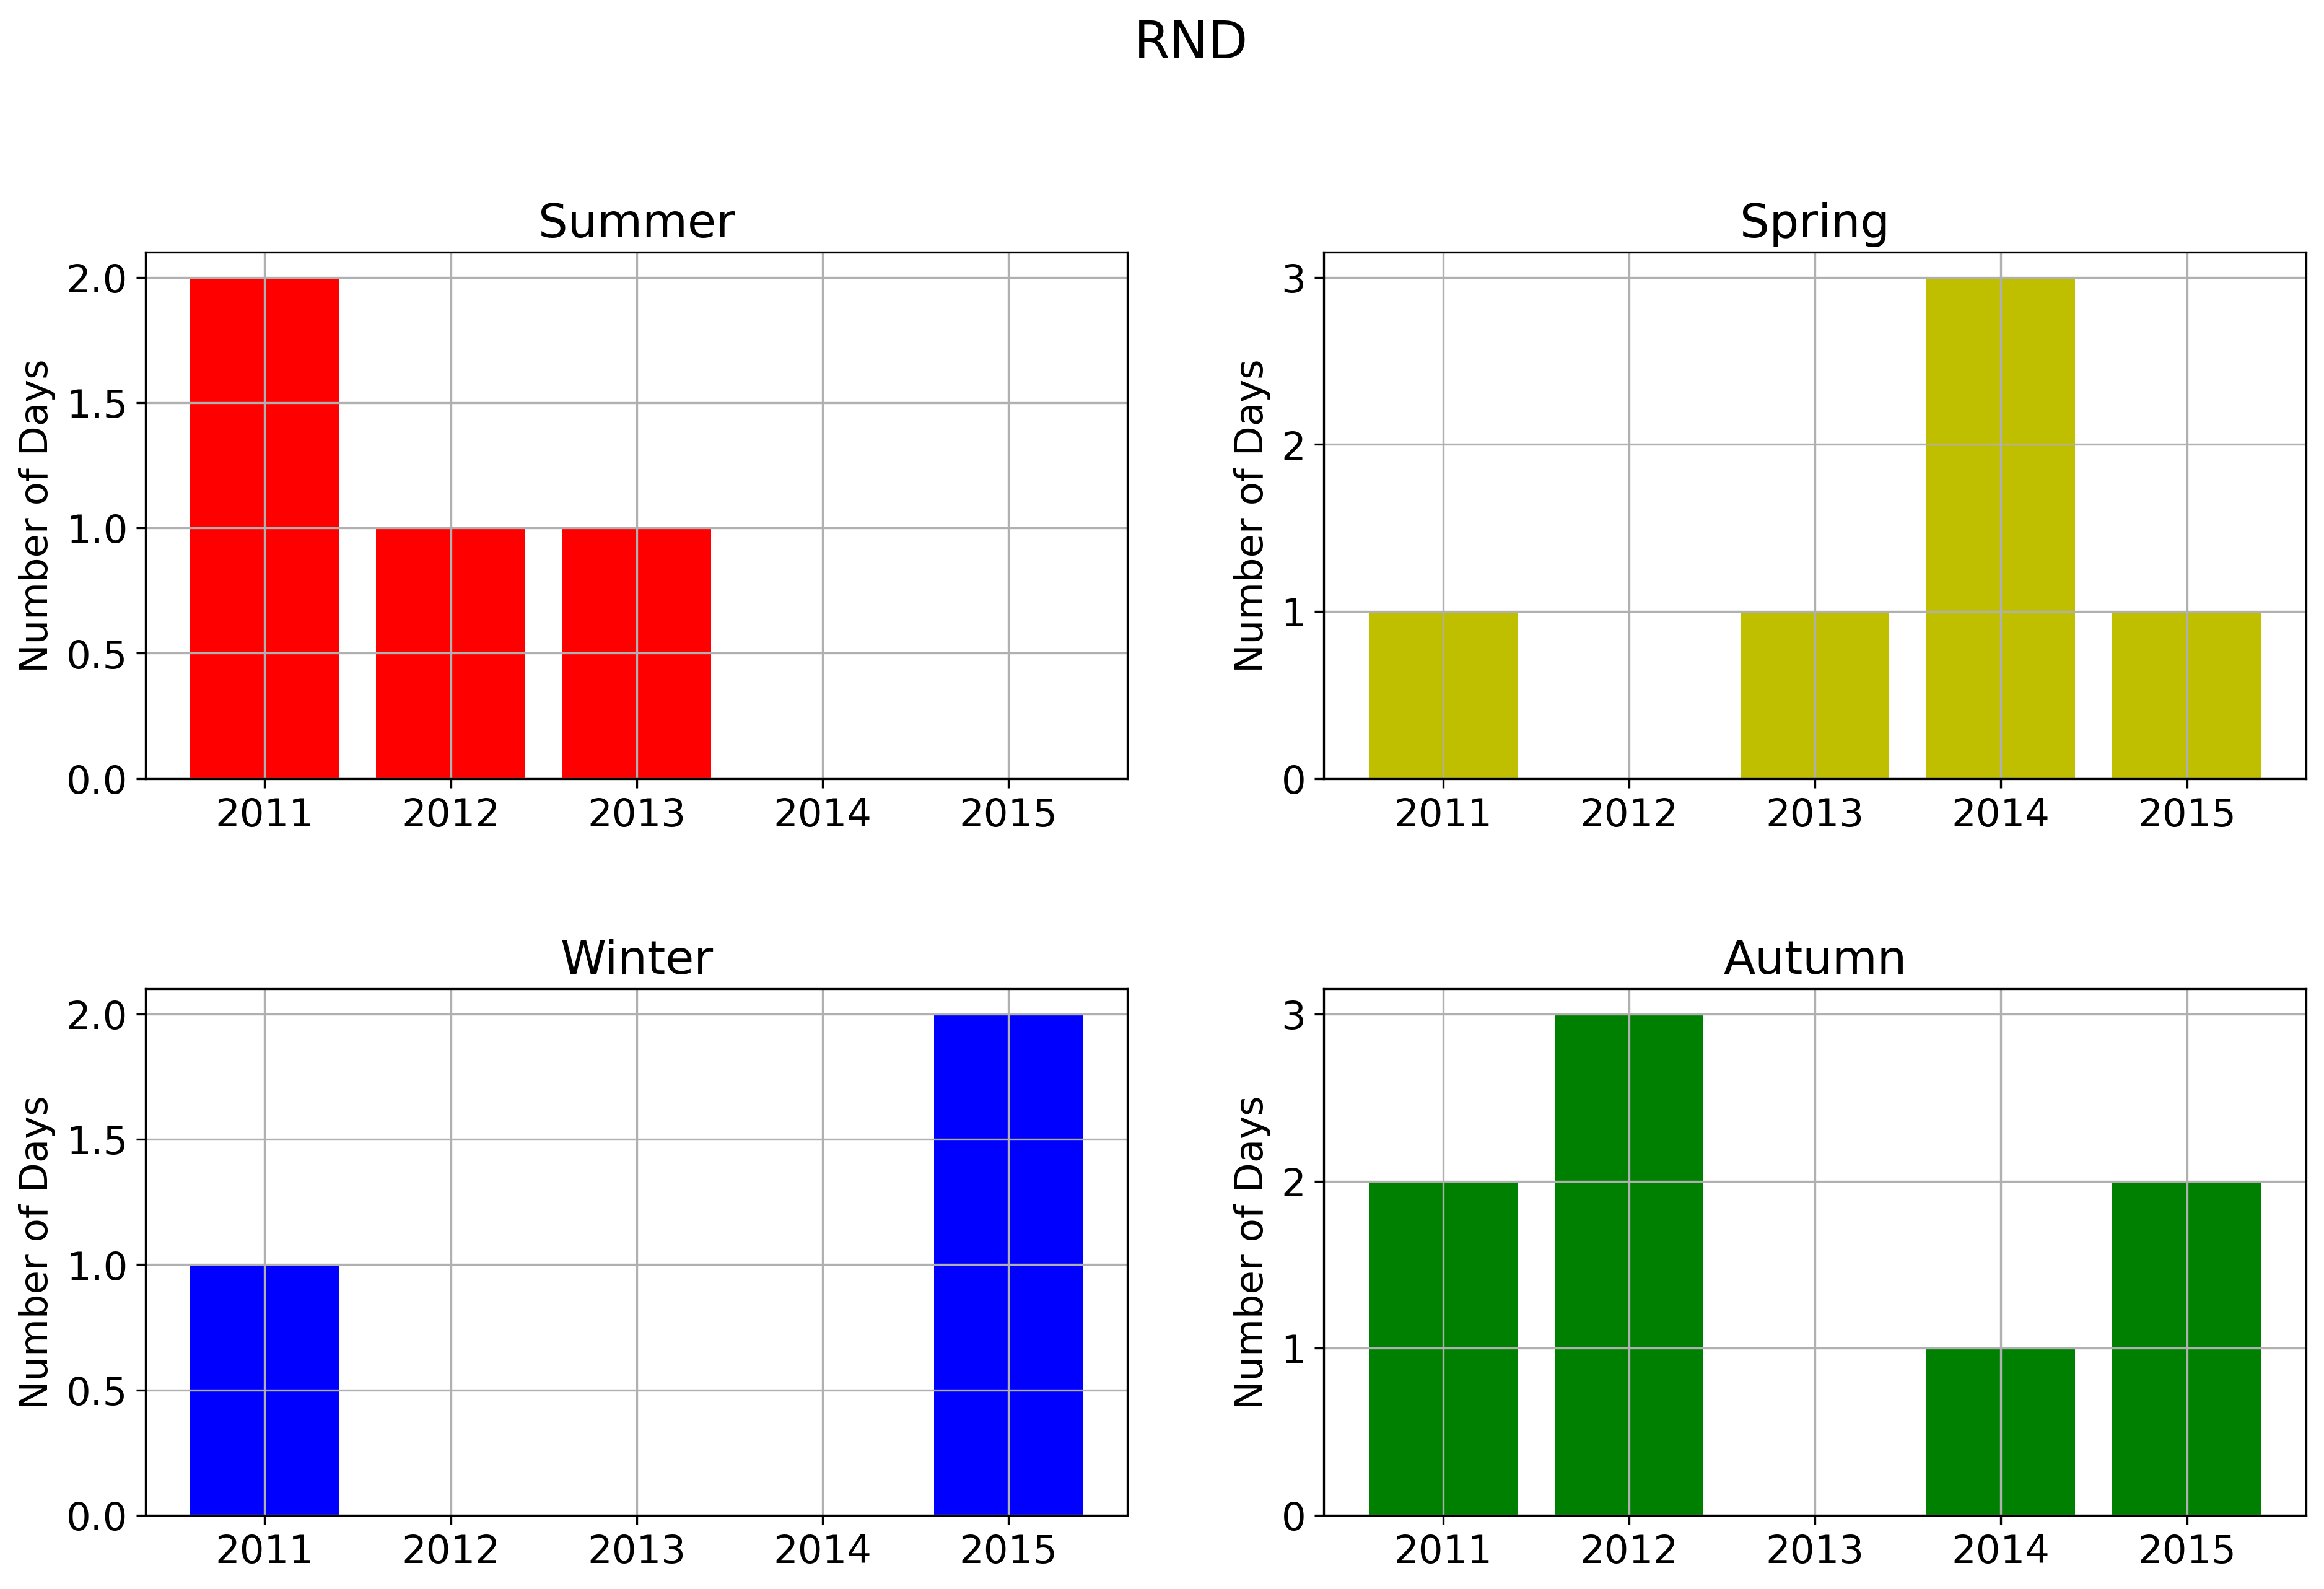

In [64]:
tex.dif_seasonMetrics(database_humidity,True)

## Pressure



In [65]:
uploaded = files.upload()
df_pressure = pd.read_csv(io.BytesIO(uploaded['example_pressure.csv']))

df_pressure = df_pressure.drop(columns = {'Unnamed: 0'})
df_pressure['DATE'] = pd.to_datetime(df_pressure['DATE']) #to datetime
df_pressure['YEAR'] = df_pressure['DATE'].dt.year
df_pressure

Saving example_pressure.csv to example_pressure.csv


DATE  Pressure_max(HPA)  Pressure_min(HPA)  YEAR
0    1990-01-02         960.670833         930.670833  1990
1    1990-01-03         960.066667         930.066667  1990
2    1990-01-04         961.279167         931.279167  1990
3    1990-01-05         958.450000         928.450000  1990
4    1990-01-06         955.008000         925.008000  1990
...         ...                ...                ...   ...
8087 2015-12-27         962.583333         932.583333  2015
8088 2015-12-28         962.325000         932.325000  2015
8089 2015-12-29         961.611538         931.611538  2015
8090 2015-12-30         959.528000         929.528000  2015
8091 2015-12-31         959.688000         929.688000  2015

[8092 rows x 4 columns]

In [66]:
#define climatic normal for pressure
climatic_norm_pressure = df_pressure[(df_pressure['YEAR']>=1990) & (df_pressure['YEAR']<=2010)]
climatic_norm_pressure

DATE  Pressure_max(HPA)  Pressure_min(HPA)  YEAR
0    1990-01-02         960.670833         930.670833  1990
1    1990-01-03         960.066667         930.066667  1990
2    1990-01-04         961.279167         931.279167  1990
3    1990-01-05         958.450000         928.450000  1990
4    1990-01-06         955.008000         925.008000  1990
...         ...                ...                ...   ...
6262 2010-12-27         956.662500         926.662500  2010
6263 2010-12-28         955.860714         925.860714  2010
6264 2010-12-29         955.220833         925.220833  2010
6265 2010-12-30         955.254167         925.254167  2010
6266 2010-12-31         955.683333         925.683333  2010

[6267 rows x 4 columns]

In [67]:
#define database for pressure
database_pressure = df_pressure[df_pressure['YEAR']>2010]
database_pressure

DATE  Pressure_max(HPA)  Pressure_min(HPA)  YEAR
6267 2011-01-01         954.900000         924.900000  2011
6268 2011-01-02         955.710345         925.710345  2011
6269 2011-01-03         958.120833         928.120833  2011
6270 2011-01-04         958.720833         928.720833  2011
6271 2011-01-05         957.548000         927.548000  2011
...         ...                ...                ...   ...
8087 2015-12-27         962.583333         932.583333  2015
8088 2015-12-28         962.325000         932.325000  2015
8089 2015-12-29         961.611538         931.611538  2015
8090 2015-12-30         959.528000         929.528000  2015
8091 2015-12-31         959.688000         929.688000  2015

[1825 rows x 4 columns]

### Low Pressure Wave

3 or more consecutive days with pressure below the 10th percentile.

In [68]:
help(tex.check_LowPressureWave)

Help on function check_LowPressureWave in module climatex:

check_LowPressureWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.1, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for Low Pressure Waves on the database according to the Climatic Normal
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for pressure waves .It obtains first a dataframe with the percentiles computed
    ## from the Climatic Normal according to the defined window size (df_pct). Then
    ## compares it with the database, to check if the maximum and minimum values of pressure
    ## are below the  corresponding percentile. If they are below the threshold, the column 'below_pct'
    ## receives 1. This column is then used to identify if there are 3 or mor

In [69]:
#get dataframe with columns 'below_pct' and 'LPW' indicating the occurence of a low pressure wave
#and the dataframe with the 10th percentile for pressure
database_pressure,df_pct = tex.check_LowPressureWave(database_pressure,'Pressure_max(HPA)','Pressure_min(HPA)',climatic_norm_pressure,'Pressure_max(HPA)','Pressure_min(HPA)')

In [70]:
database_pressure

DAY365       DATE  Pressure_max(HPA)  ...    YEAR  below_pct  LPW
0          1 2011-01-01         954.900000  ...  2011.0          1    0
1          2 2011-01-02         955.710345  ...  2011.0          0    0
2          3 2011-01-03         958.120833  ...  2011.0          0    0
3          4 2011-01-04         958.720833  ...  2011.0          0    0
4          5 2011-01-05         957.548000  ...  2011.0          0    0
...      ...        ...                ...  ...     ...        ...  ...
1820     361 2015-12-27         962.583333  ...  2015.0          0    0
1821     362 2015-12-28         962.325000  ...  2015.0          0    0
1822     363 2015-12-29         961.611538  ...  2015.0          0    0
1823     364 2015-12-30         959.528000  ...  2015.0          0    0
1824     365 2015-12-31         959.688000  ...  2015.0          0    0

[1825 rows x 7 columns]

In [71]:
df_pct

CMX10pct    CMN10pct
DAY365                        
1       955.051587  925.051587
2       955.014067  925.014067
3       955.014933  925.014933
4       955.015800  925.015800
5       955.080645  925.080645
...            ...         ...
361     955.935476  925.935476
362     955.798095  925.798095
363     955.665833  925.665833
364     955.573700  925.573700
365     955.362500  925.362500

[365 rows x 2 columns]

LPWN  LPWD  LPWF
YEAR                  
2011   9.0   9.0  43.0
2012   3.0   5.0  11.0
2013   2.0   5.0   8.0
2014   2.0   8.0  11.0
2015   1.0   3.0   3.0

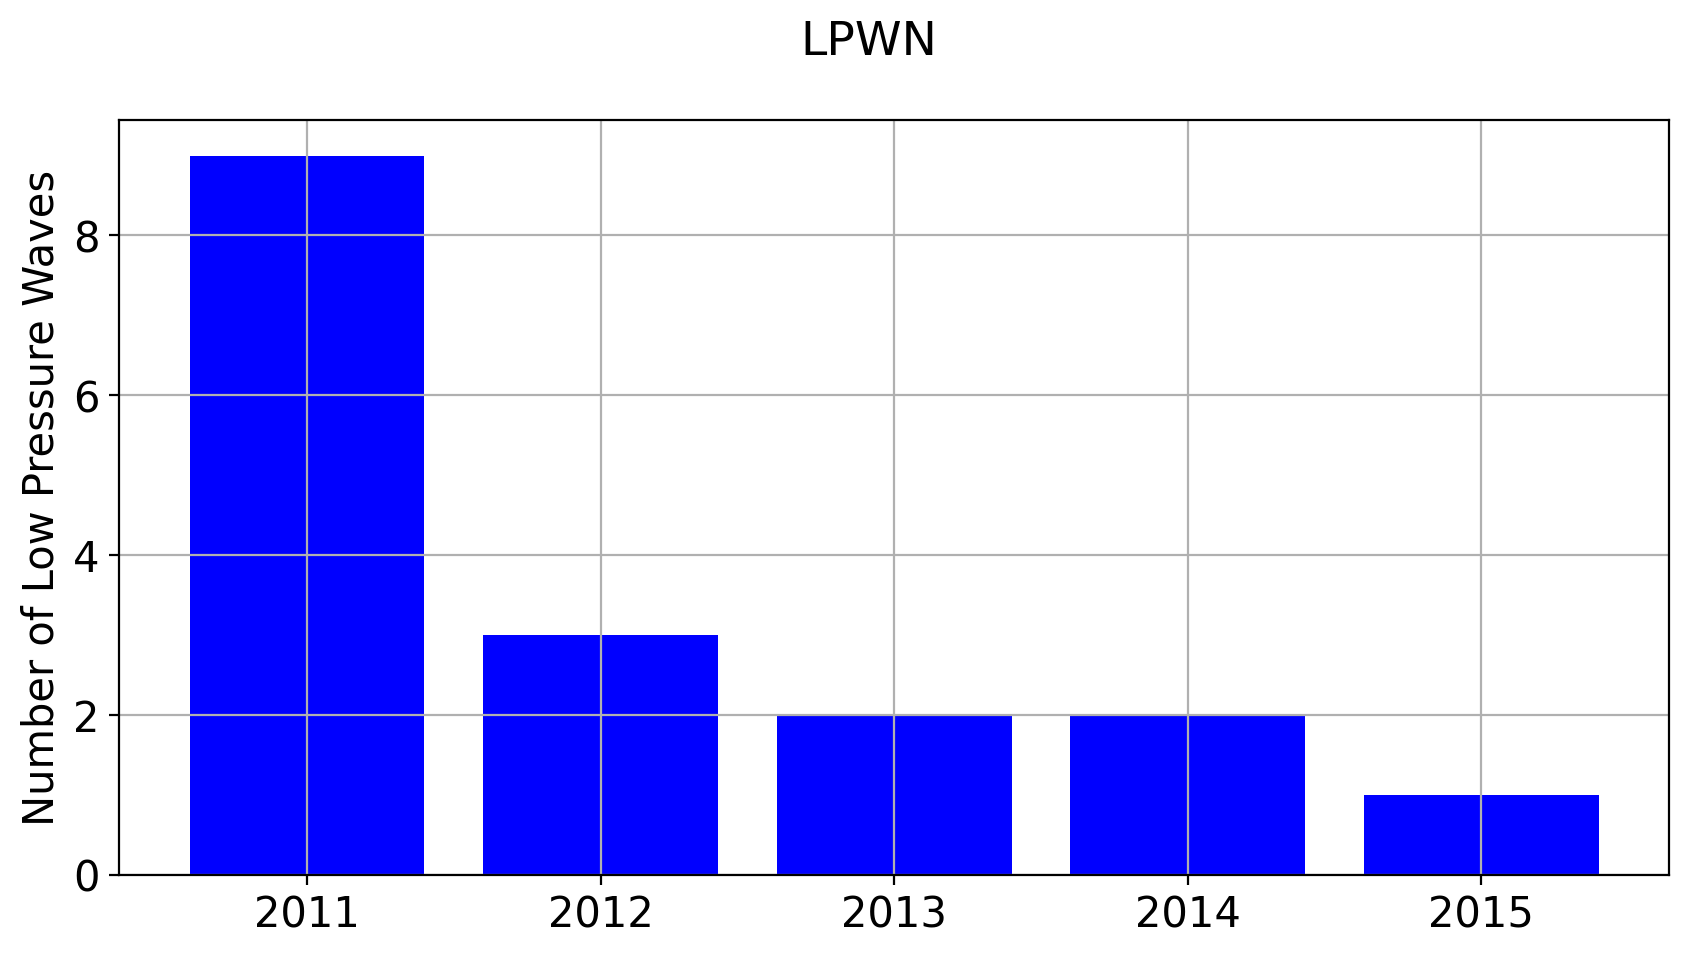

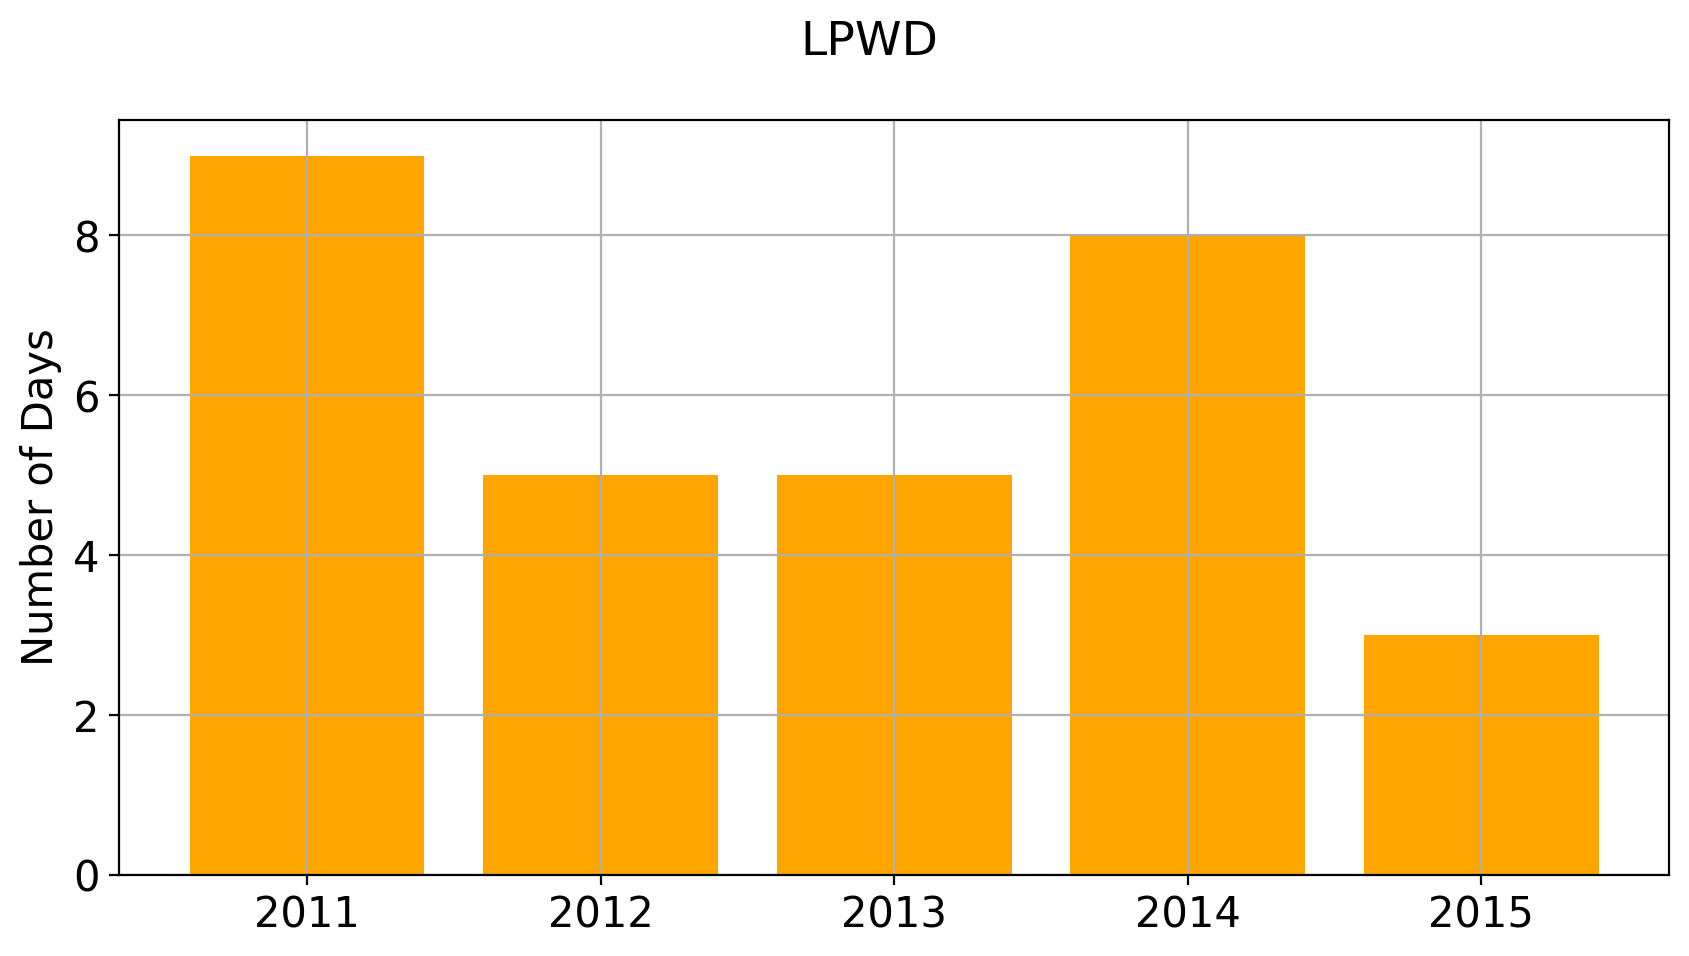

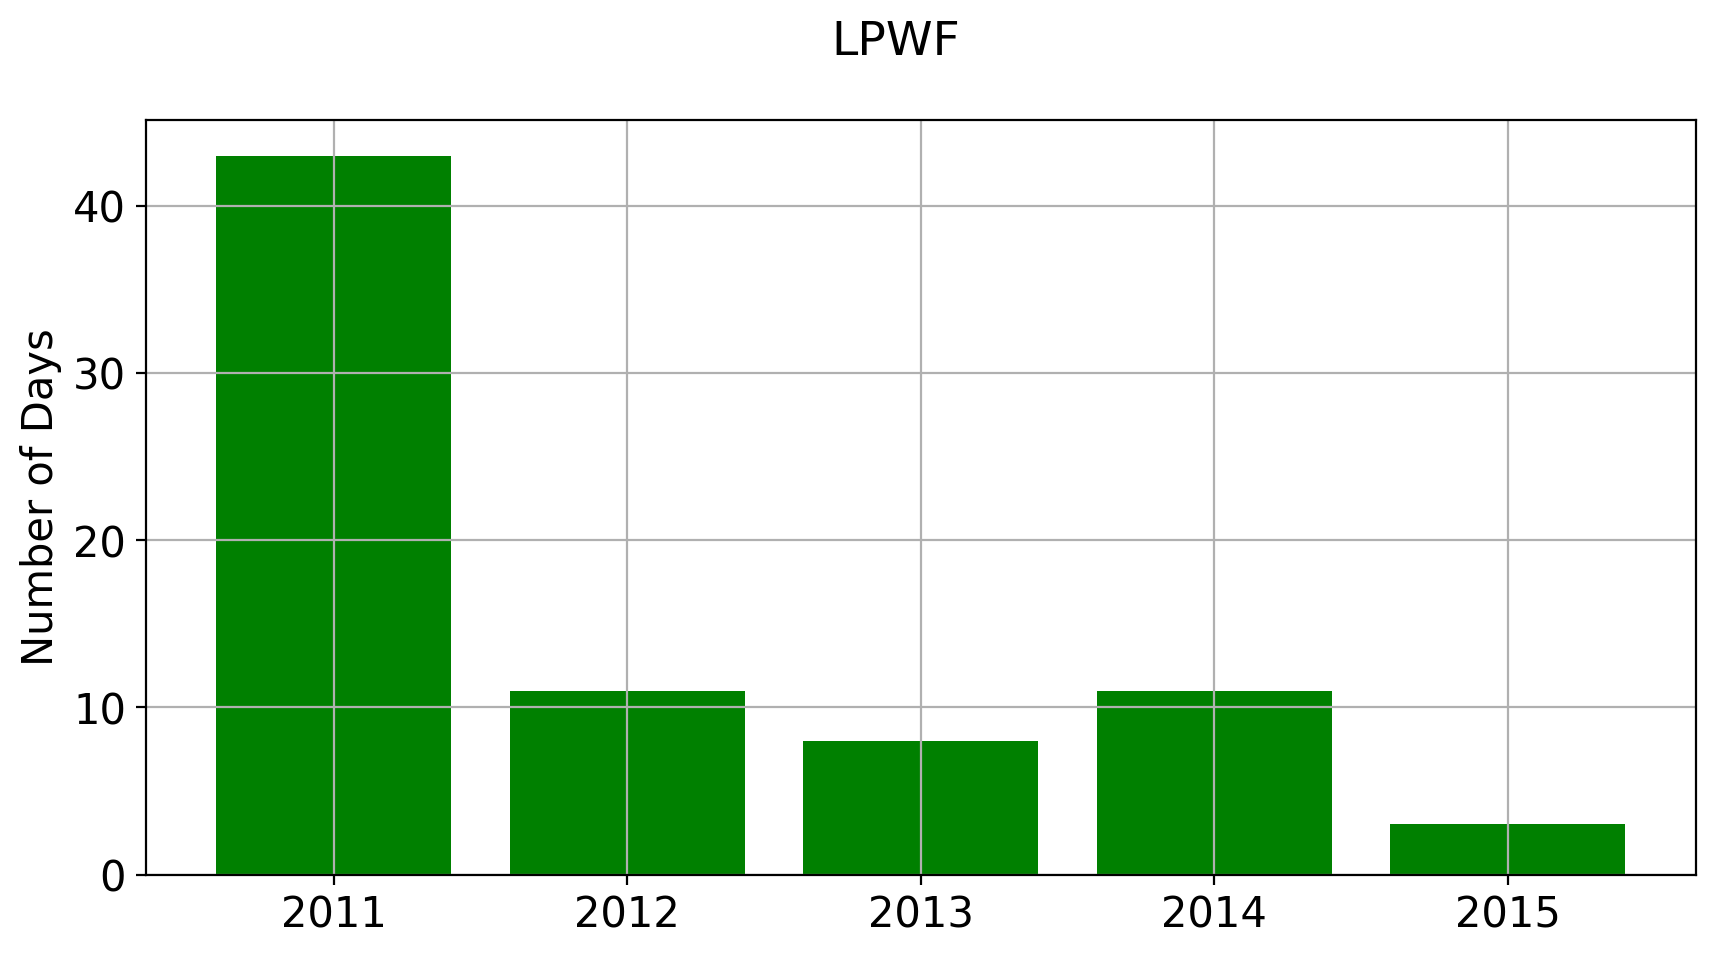

In [72]:
tex.wave_metrics(database_pressure,'LPW',True)

LPWN  LPWD  LPWF
YEAR SEASON                  
2011 1        4.0   4.0  13.0
     2        2.0   9.0  13.0
     3        1.0   3.0   3.0
     4        1.0   6.0   6.0
2012 1        2.0   8.0  11.0
     2        0.0   0.0   0.0
     3        2.0   5.0   8.0
     4        0.0   0.0   0.0
2013 1        0.0   0.0   0.0
     2        0.0   0.0   0.0
     3        1.0   3.0   3.0
     4        1.0   5.0   5.0
2014 1        1.0   3.0   3.0
     2        0.0   0.0   0.0
     3        1.0   8.0   8.0
     4        0.0   0.0   0.0
2015 1        0.0   0.0   0.0
     2        1.0   3.0   3.0
     3        0.0   0.0   0.0
     4        0.0   0.0   0.0

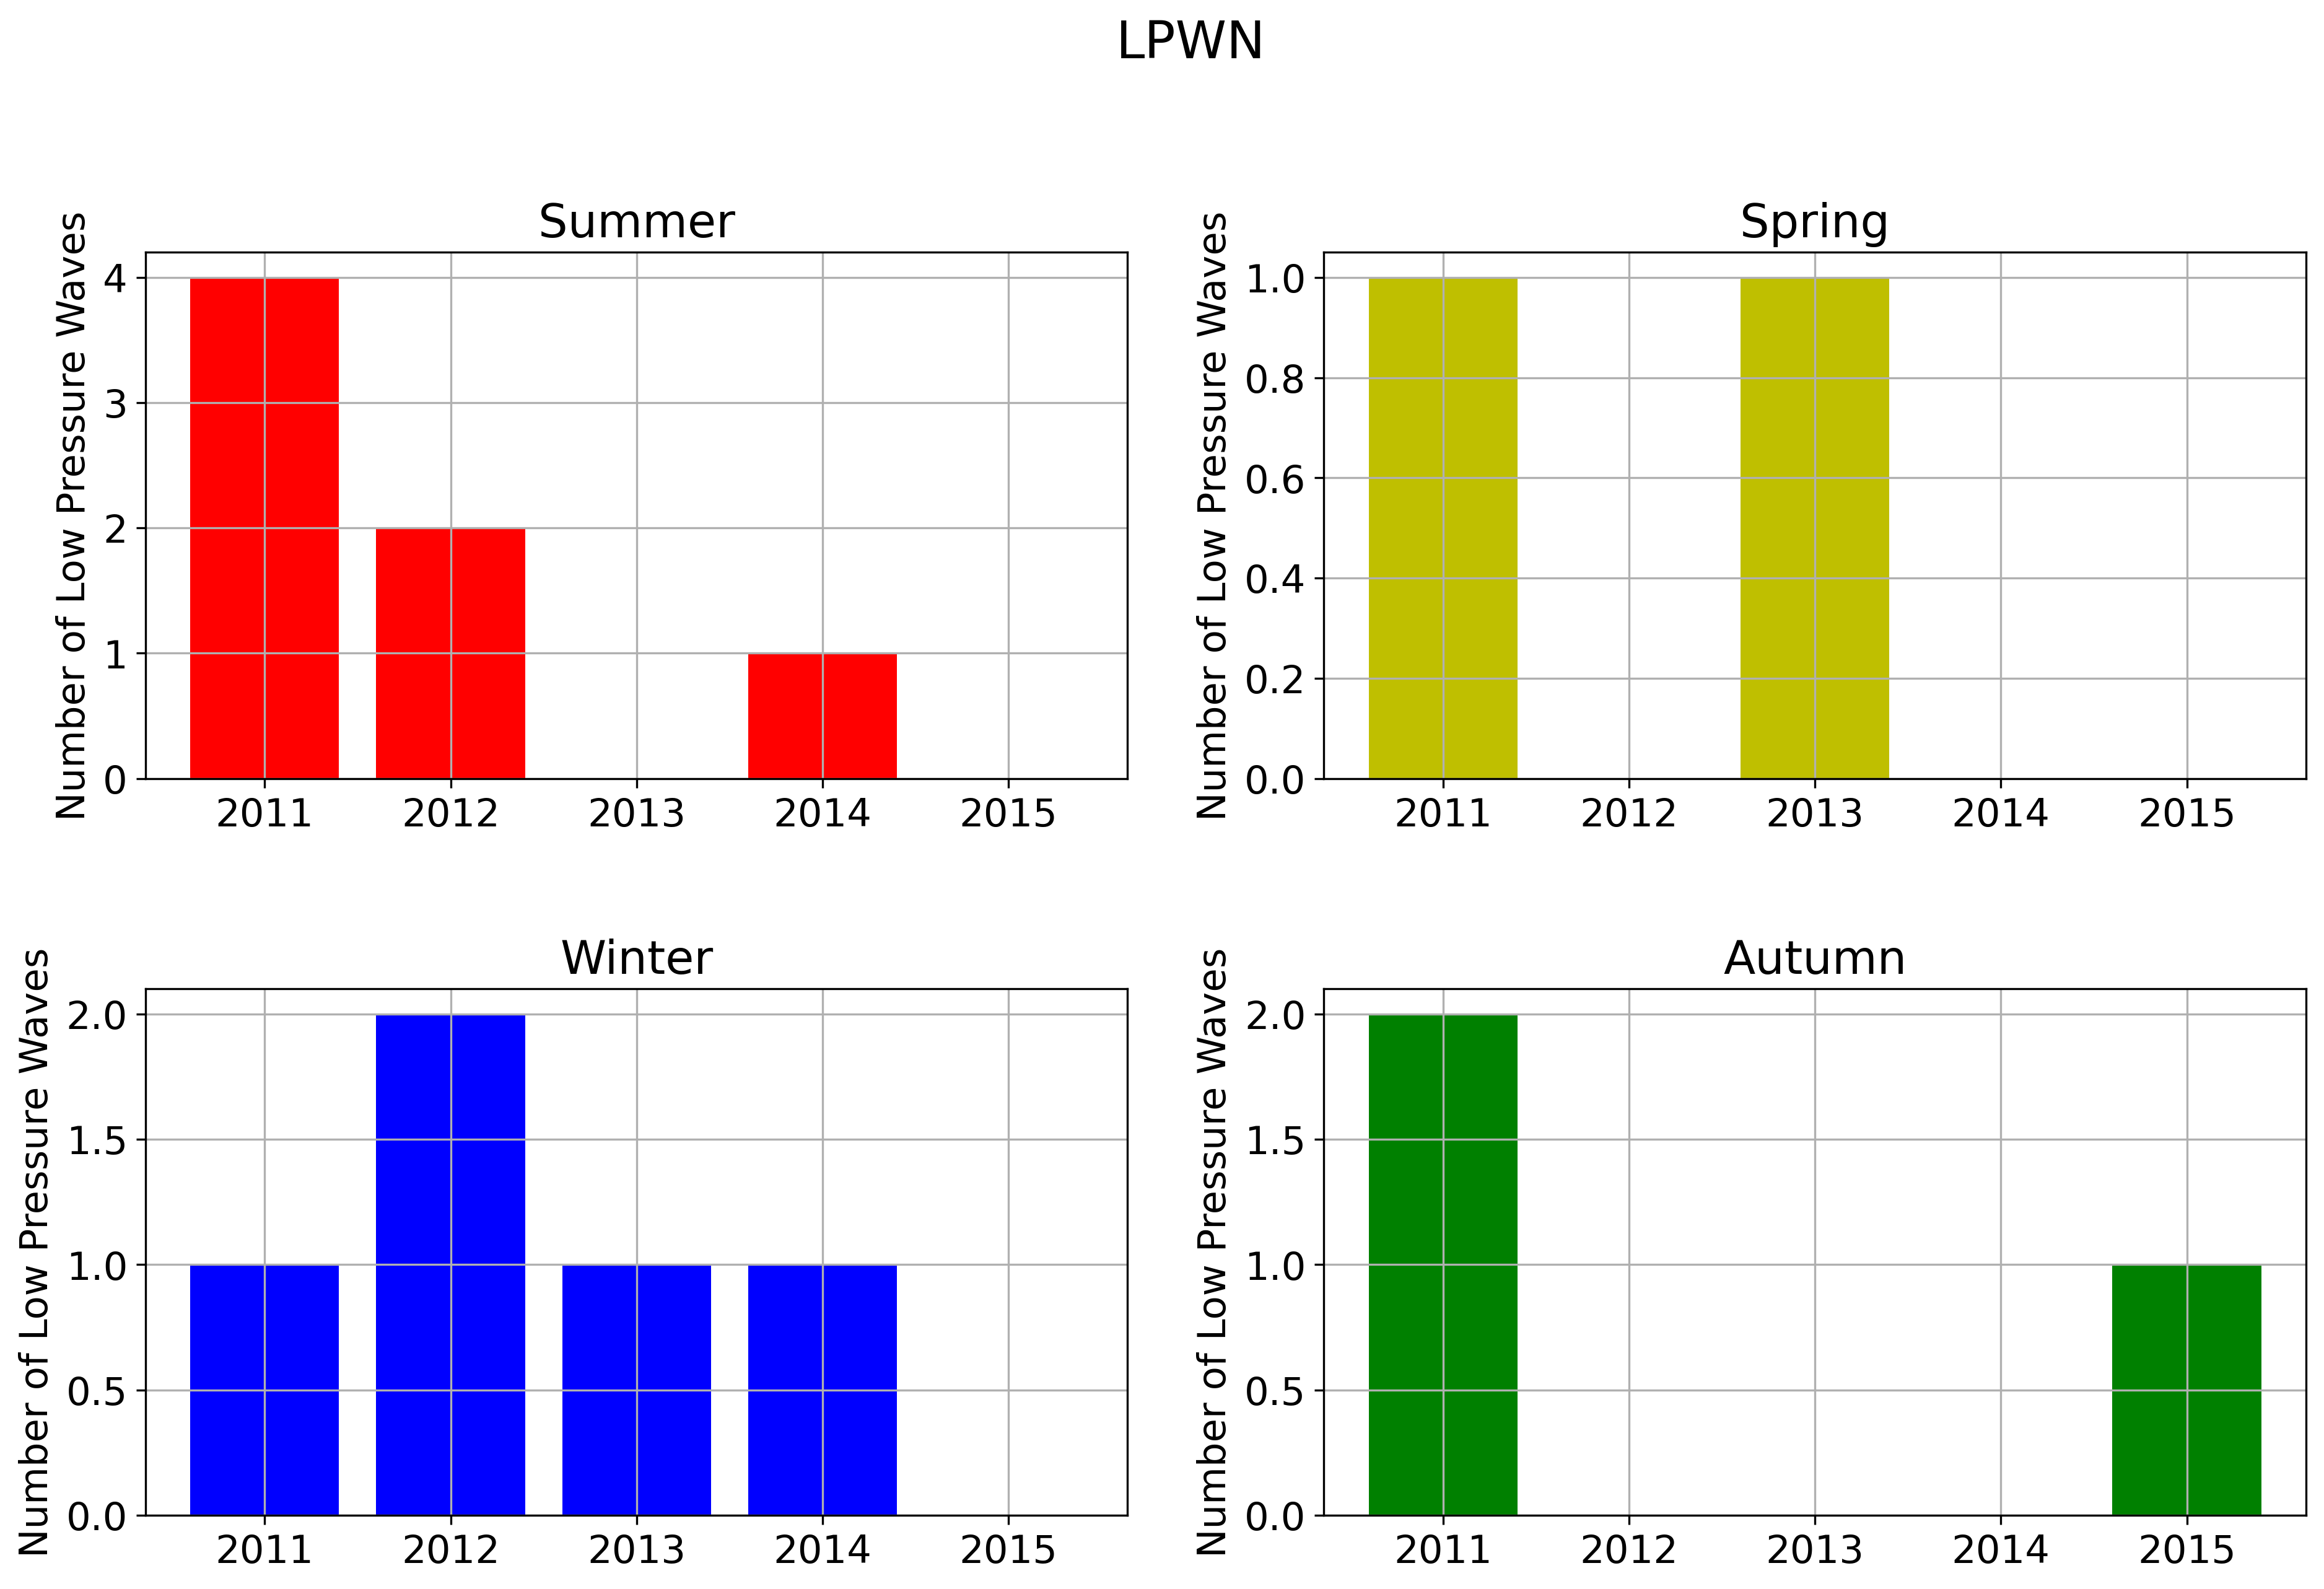

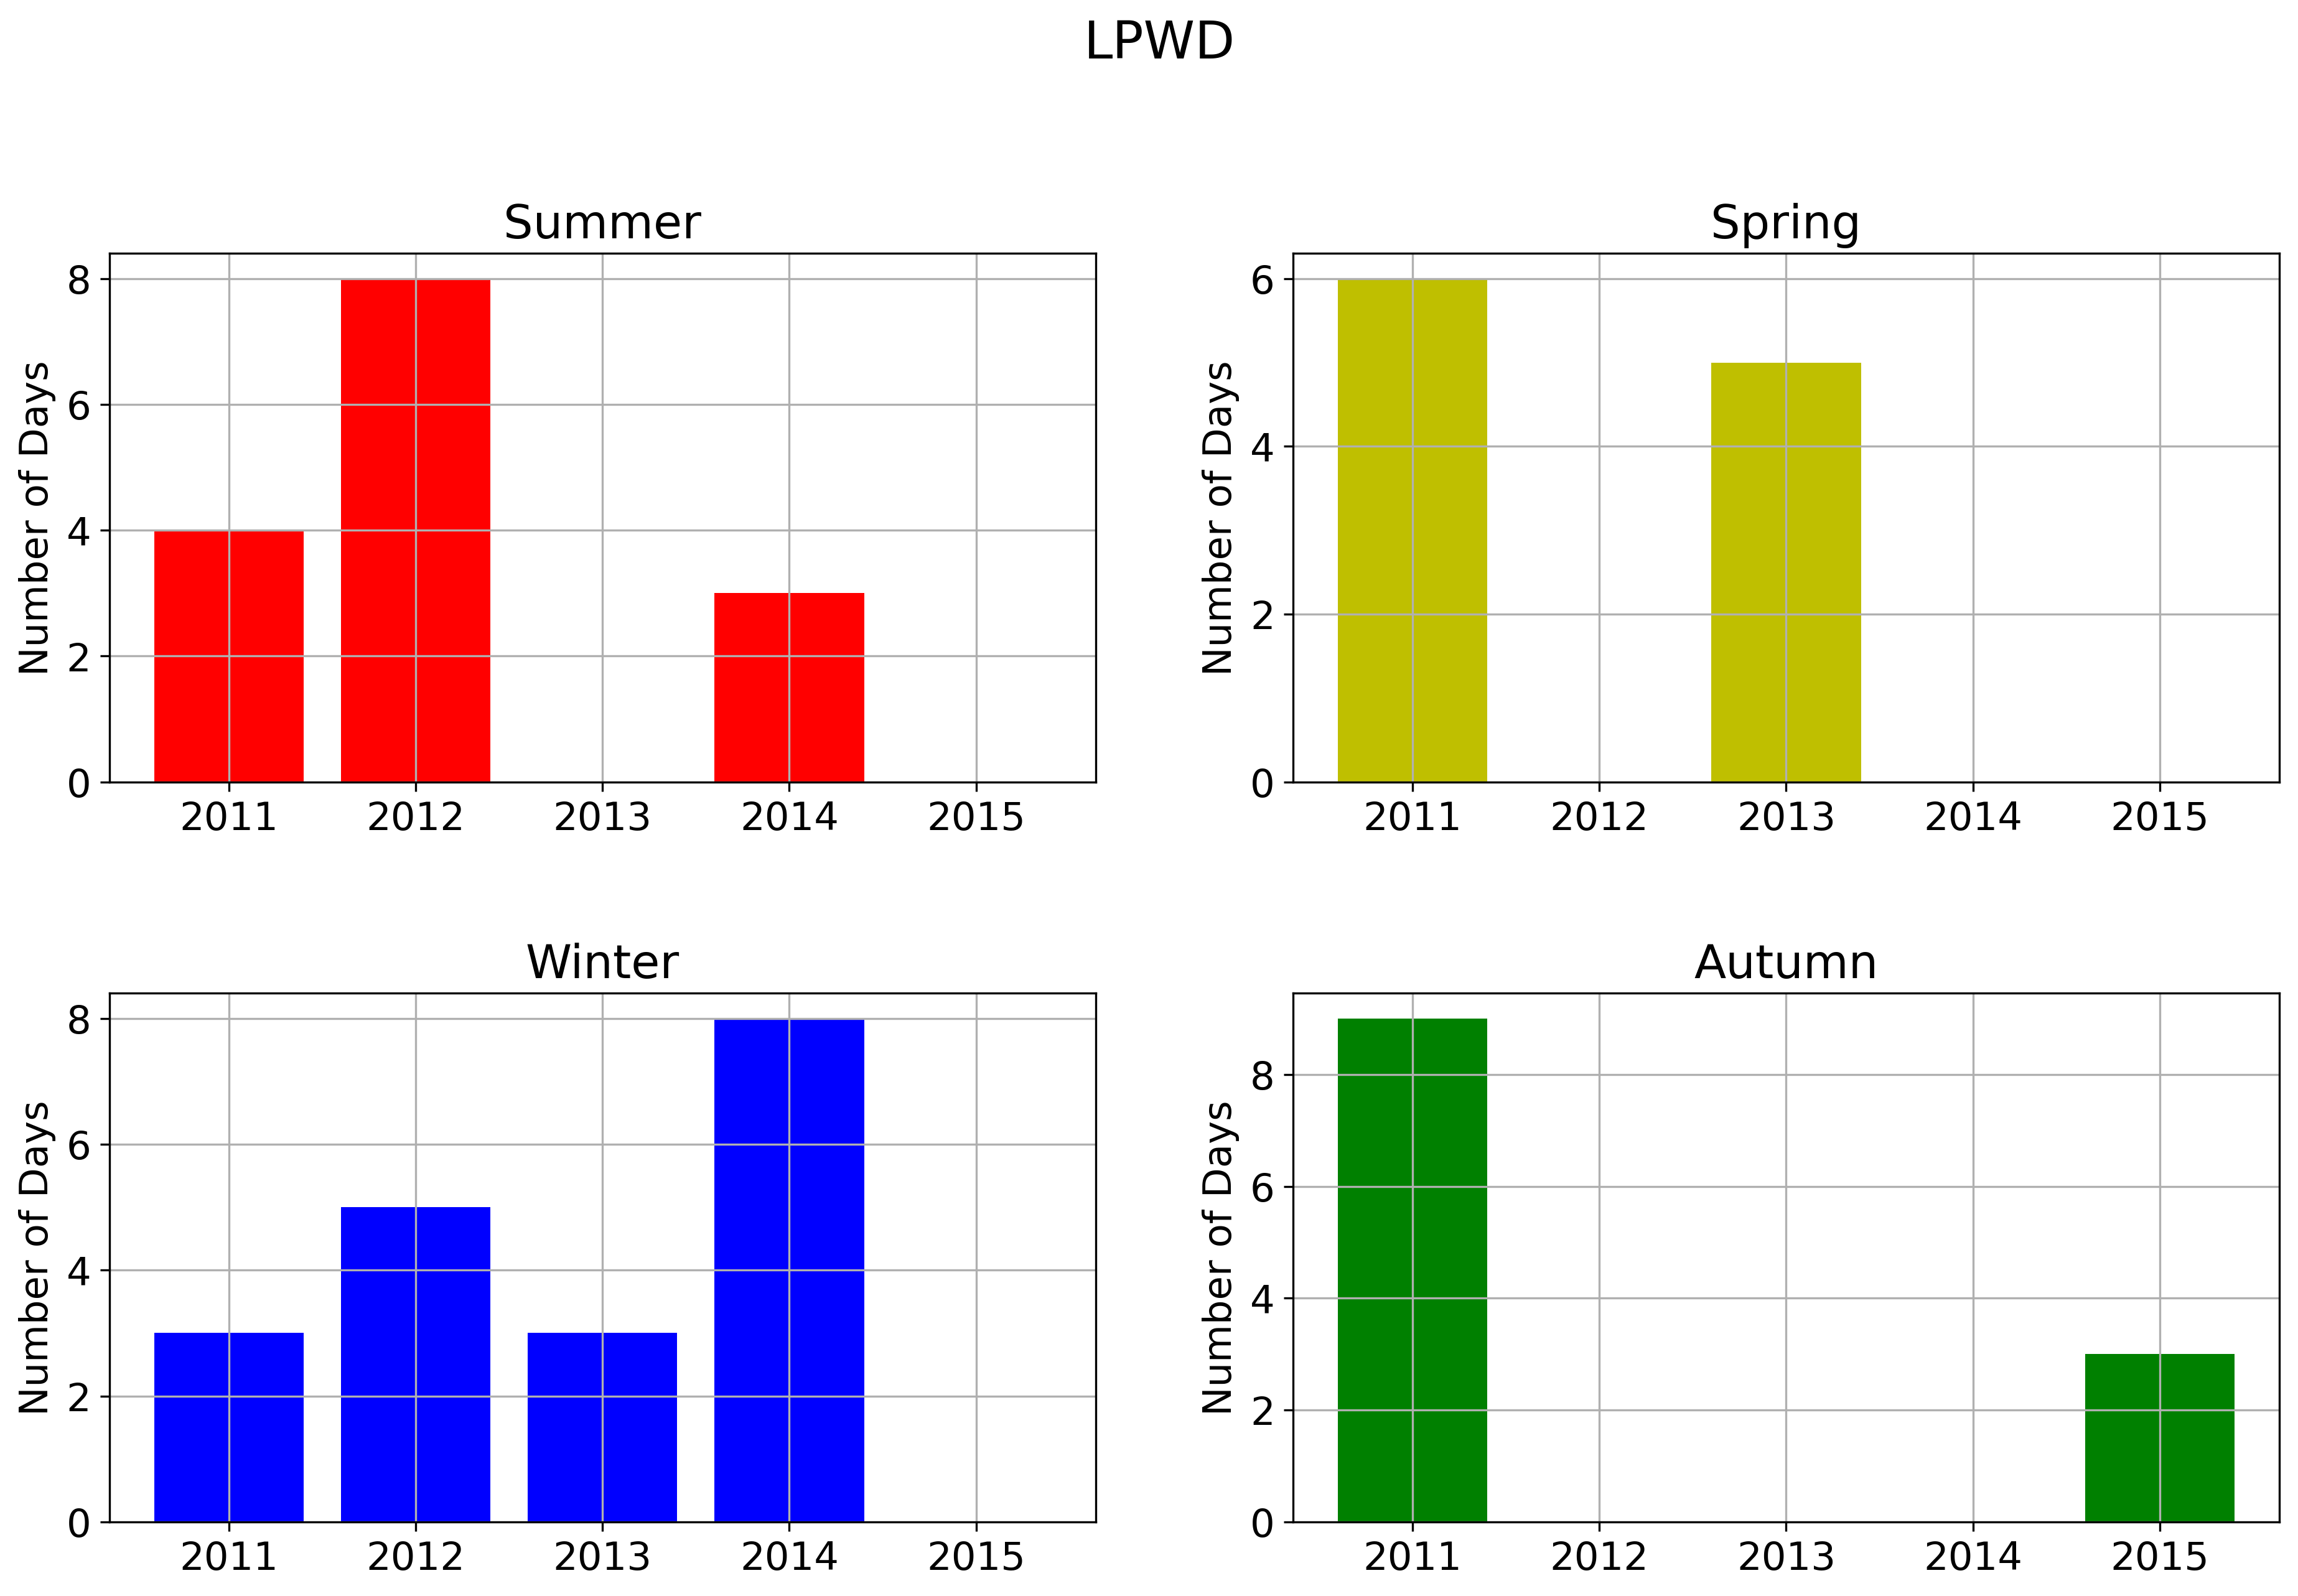

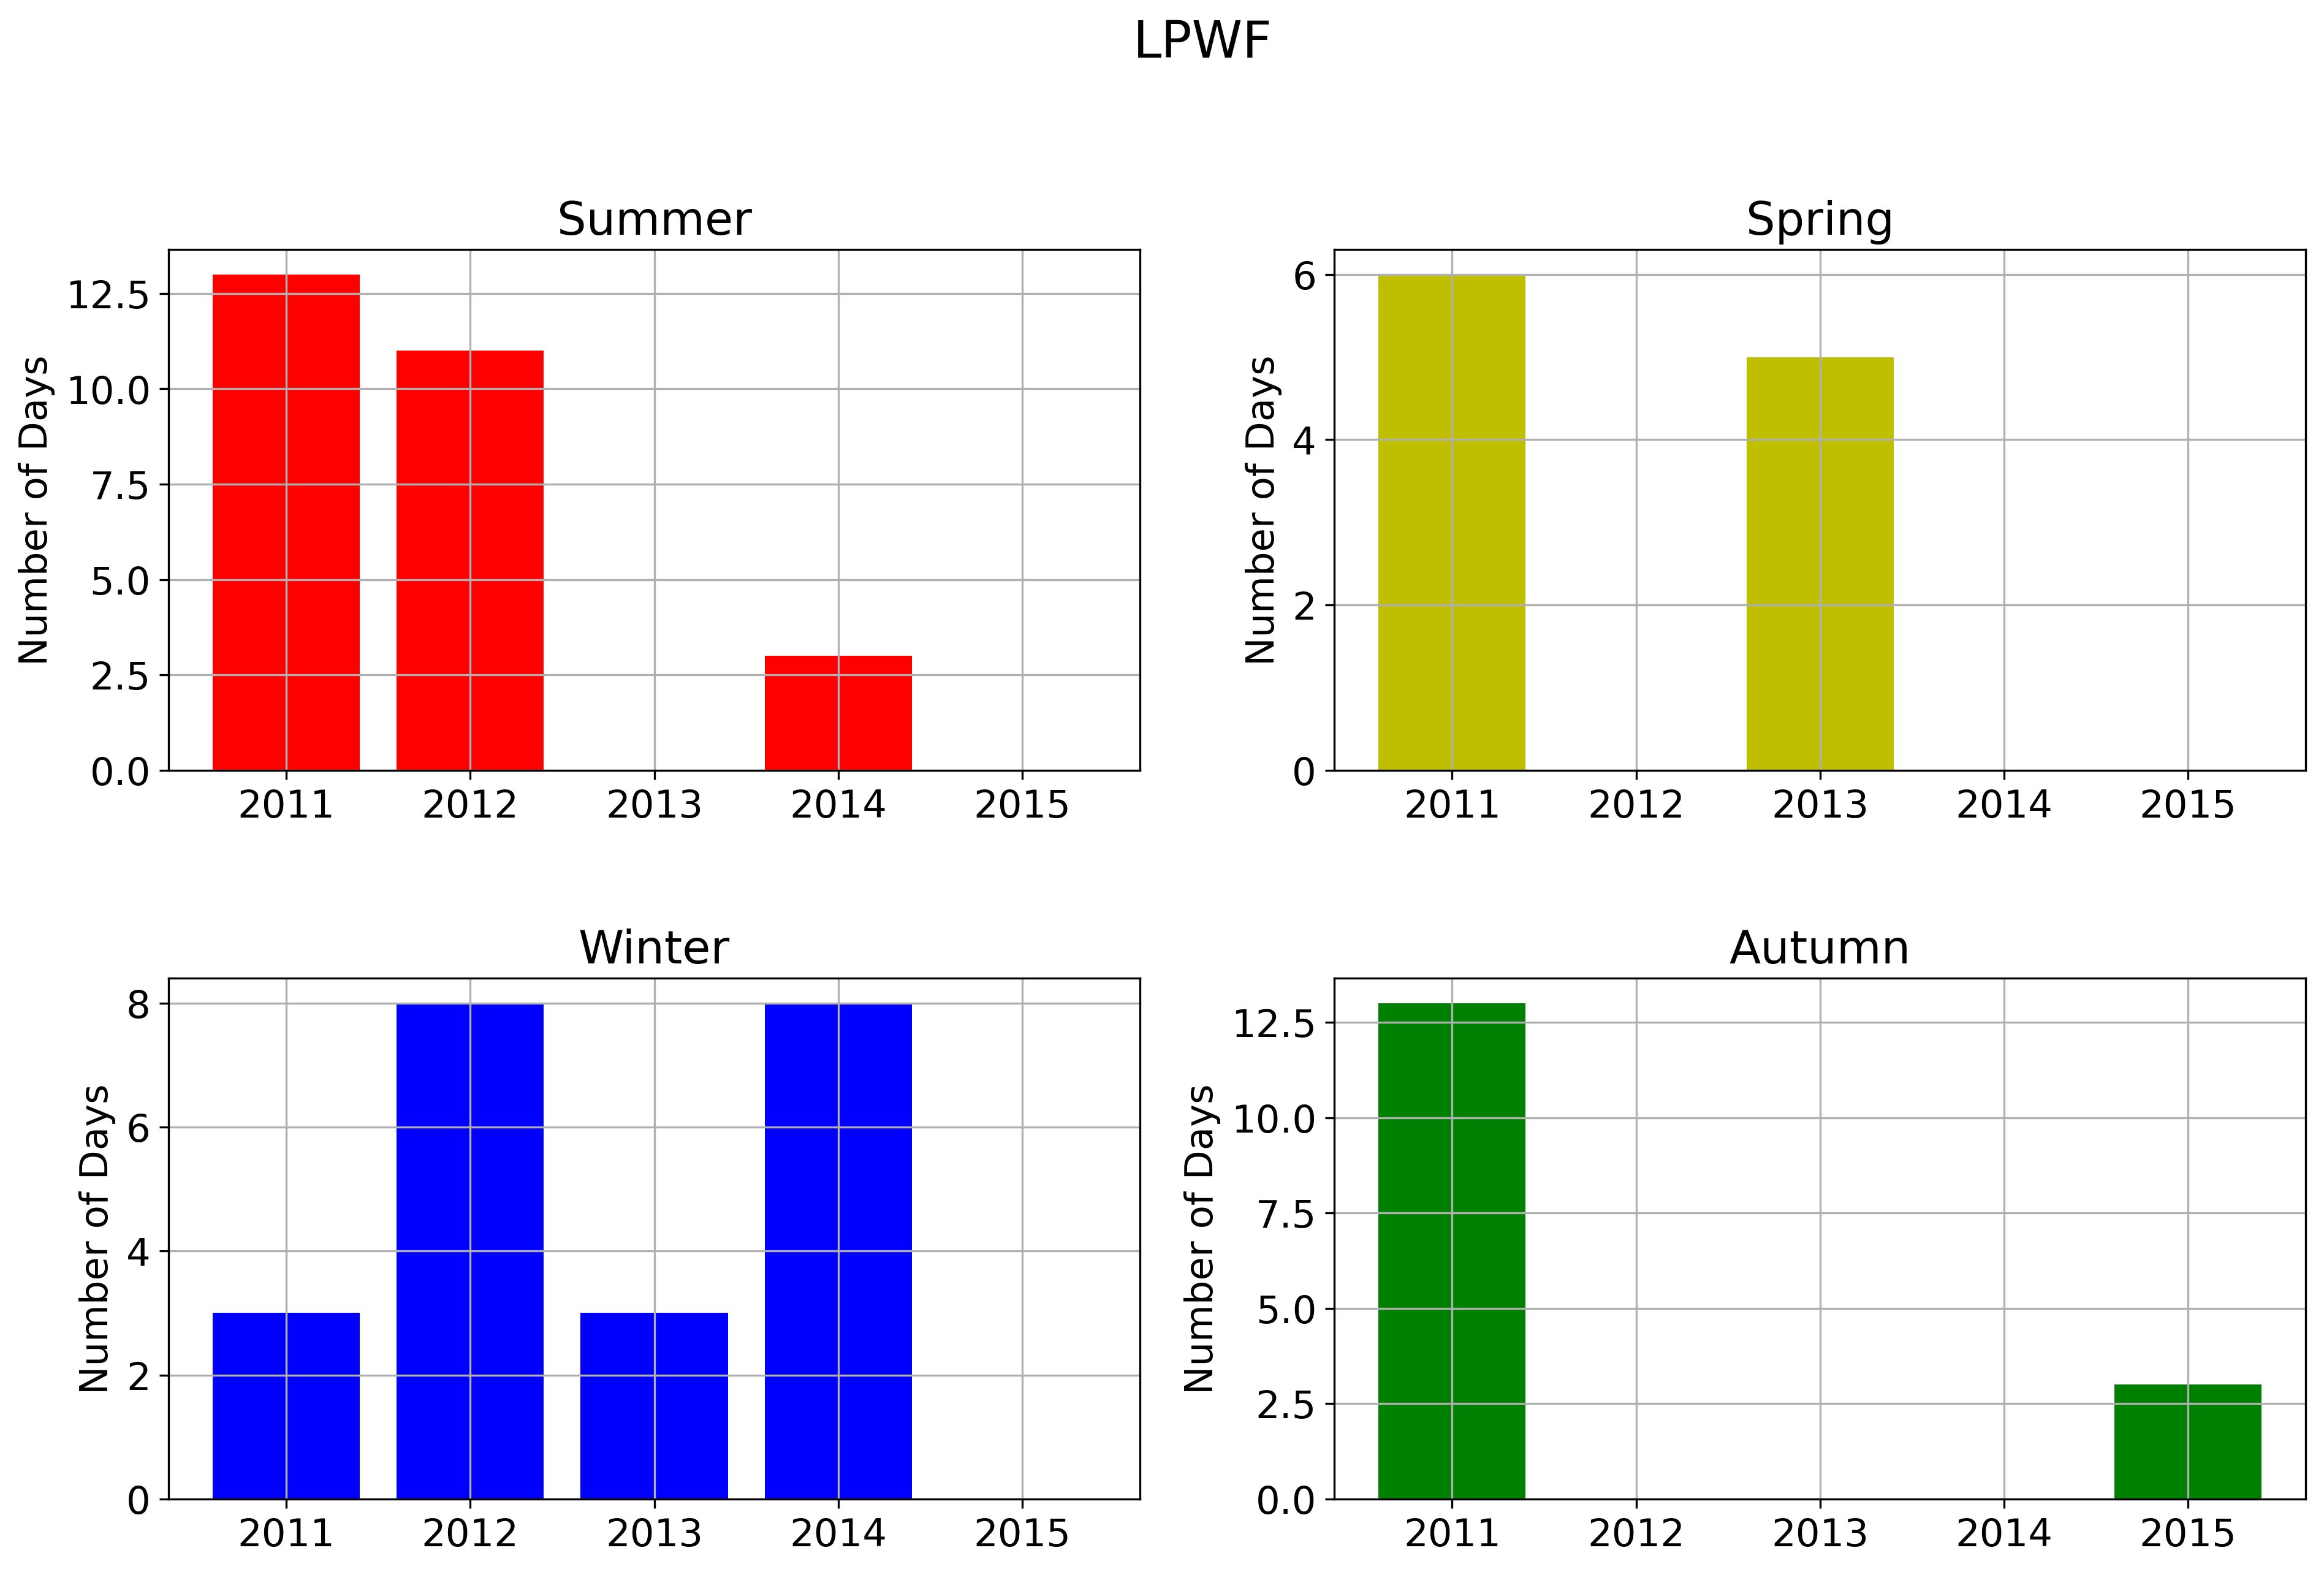

In [73]:
tex.wave_seasonMetrics(database_pressure,'LPW',plot=True)

### High Pressure Wave

3 or more consecutive days with pressure above the 90th percentile.

In [74]:
help(tex.check_HighPressureWave)

Help on function check_HighPressureWave in module climatex:

check_HighPressureWave(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for High Pressure Waves on the database according to the Climatic Normal 
    ##
    ## This function is inspired in Geirinhas et al. 2018 method for thermal waves and adapted
    ## for pressure waves. It obtains first a dataframe with the percentiles computed from
    ## the Climatic Normal according to the defined window size (df_pct). Then compares
    ## it with the database, to check if the maximum and minimum values of pressure are
    ## above the corresponding percentile. If they are above the threshold, the column
    ## 'above_pct' receives 1. This column is then used to identify if there are 3 or 

In [75]:
#get dataframe with columns 'above_pct' and 'HPW' indicating the occurence of a high pressure wave
#and the dataframe with the 90th percentile for pressure
database_pressure,df_pct = tex.check_HighPressureWave(database_pressure,'Pressure_max(HPA)','Pressure_min(HPA)',climatic_norm_pressure,'Pressure_max(HPA)','Pressure_min(HPA)')

In [76]:
database_pressure

DAY365       DATE  Pressure_max(HPA)  ...  LPW  above_pct  HPW
0          1 2011-01-01         954.900000  ...  0.0          0    0
1          2 2011-01-02         955.710345  ...  0.0          0    0
2          3 2011-01-03         958.120833  ...  0.0          0    0
3          4 2011-01-04         958.720833  ...  0.0          0    0
4          5 2011-01-05         957.548000  ...  0.0          0    0
...      ...        ...                ...  ...  ...        ...  ...
1820     361 2015-12-27         962.583333  ...  0.0          0    0
1821     362 2015-12-28         962.325000  ...  0.0          0    0
1822     363 2015-12-29         961.611538  ...  0.0          0    0
1823     364 2015-12-30         959.528000  ...  0.0          0    0
1824     365 2015-12-31         959.688000  ...  0.0          0    0

[1825 rows x 9 columns]

In [77]:
df_pct

CMX90pct    CMN90pct
DAY365                        
1       961.851667  931.851667
2       961.486667  931.486667
3       961.398974  931.398974
4       961.254300  931.254300
5       961.212500  931.212500
...            ...         ...
361     962.773333  932.773333
362     962.698333  932.698333
363     962.635000  932.635000
364     962.528333  932.528333
365     962.250000  932.250000

[365 rows x 2 columns]

HPWN  HPWD  HPWF
YEAR                  
2011   3.0   5.0  11.0
2012   7.0   5.0  26.0
2013   5.0   5.0  19.0
2014   7.0   5.0  27.0
2015   7.0  10.0  35.0

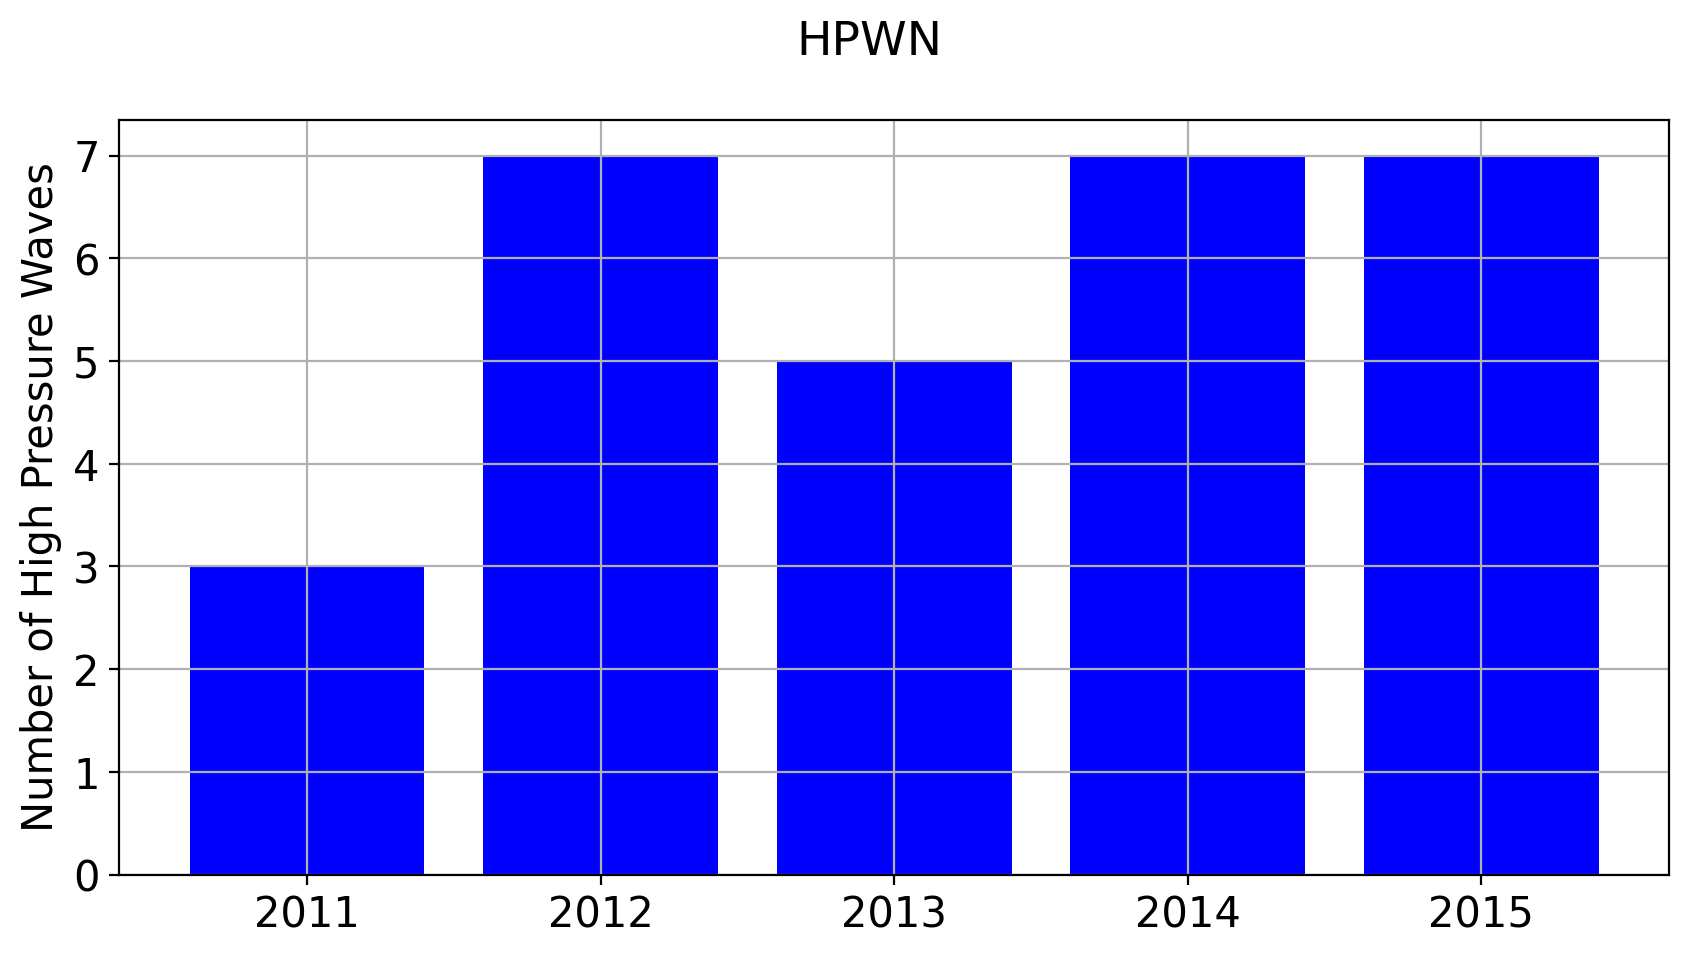

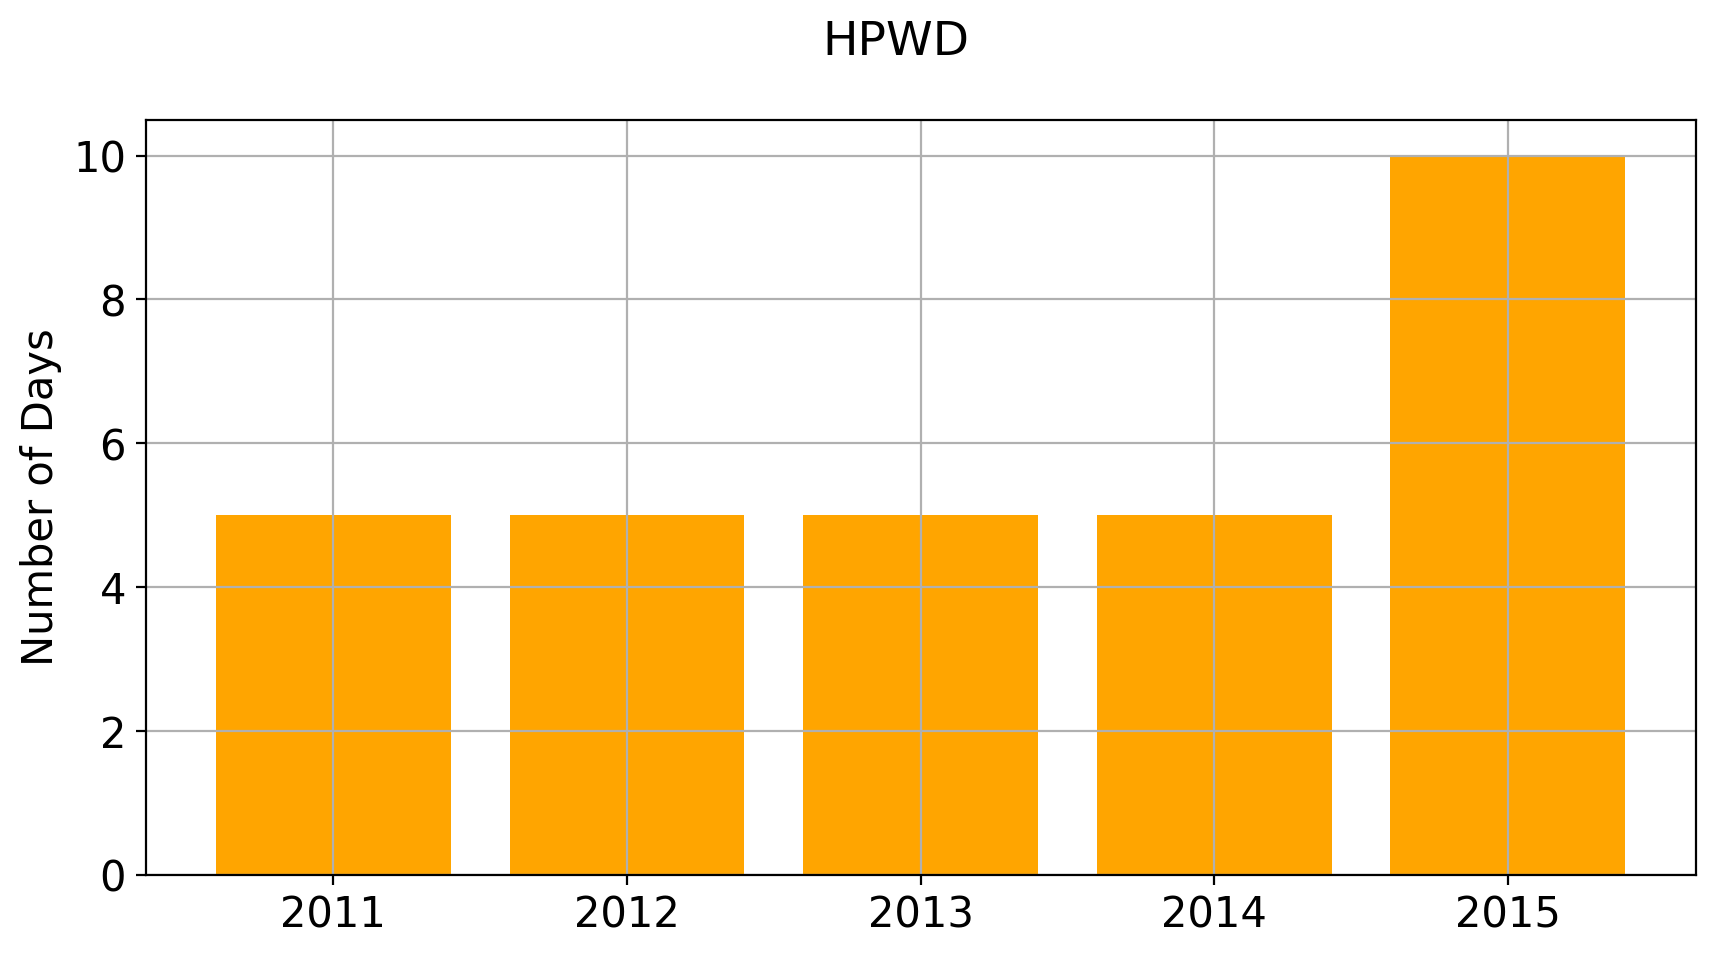

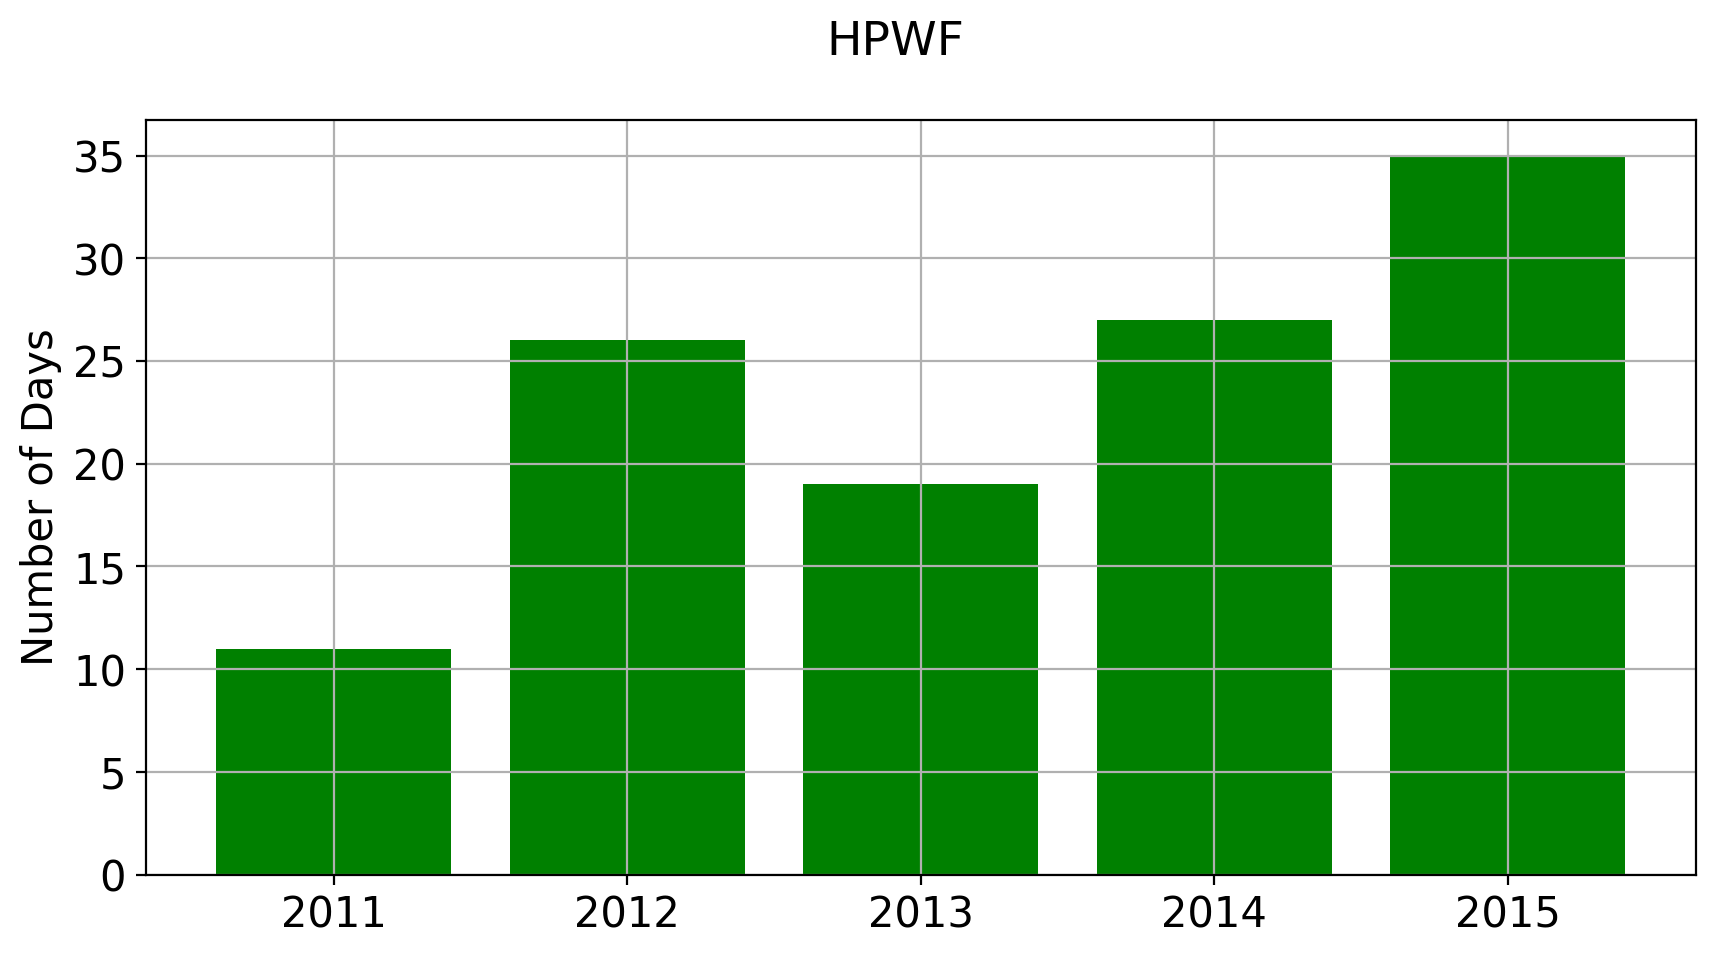

In [78]:
tex.wave_metrics(database_pressure,'HPW',True)

HPWN  HPWD  HPWF
YEAR SEASON                  
2011 1        1.0   3.0   3.0
     2        0.0   0.0   0.0
     3        0.0   0.0   0.0
     4        2.0   5.0   8.0
2012 1        1.0   4.0   4.0
     2        2.0   3.0   6.0
     3        2.0   4.0   7.0
     4        2.0   5.0   9.0
2013 1        0.0   0.0   0.0
     2        2.0   3.0   6.0
     3        2.0   5.0   8.0
     4        0.0   0.0   0.0
2014 1        1.0   5.0   5.0
     2        3.0   5.0  12.0
     3        1.0   3.0   3.0
     4        2.0   4.0   7.0
2015 1        3.0   5.0  13.0
     2        3.0   6.0  12.0
     3        2.0  10.0  15.0
     4        0.0   0.0   0.0

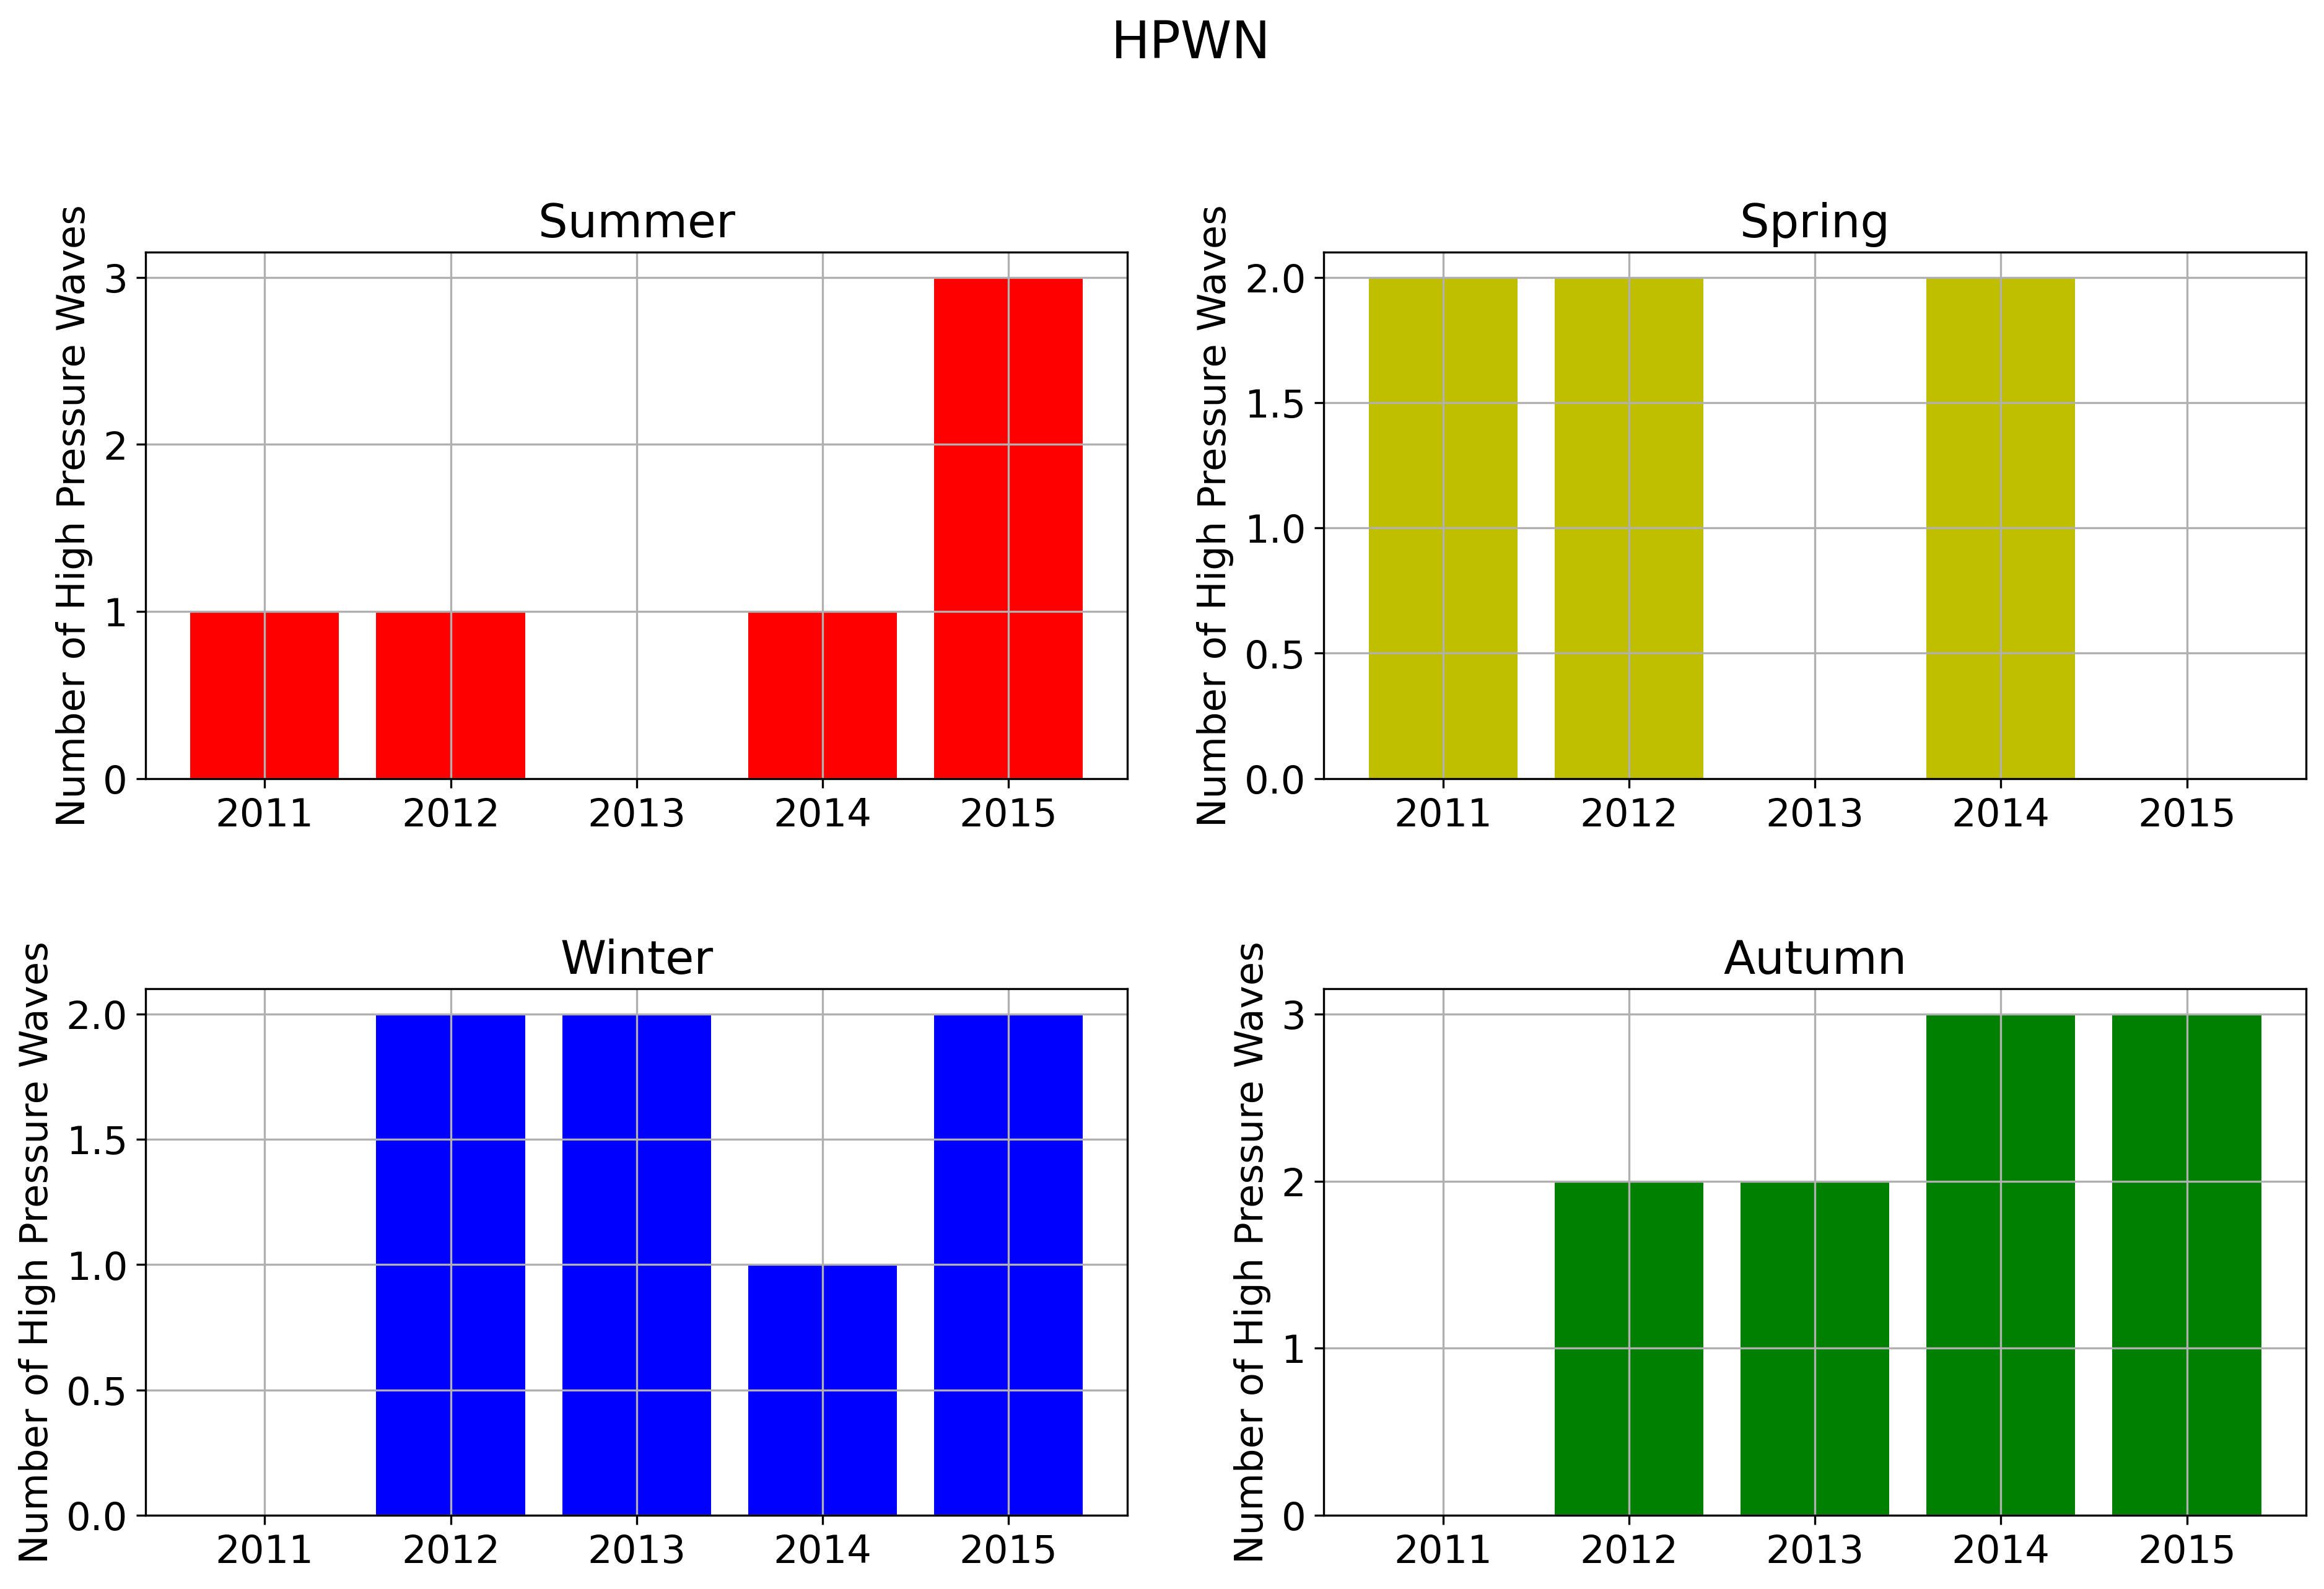

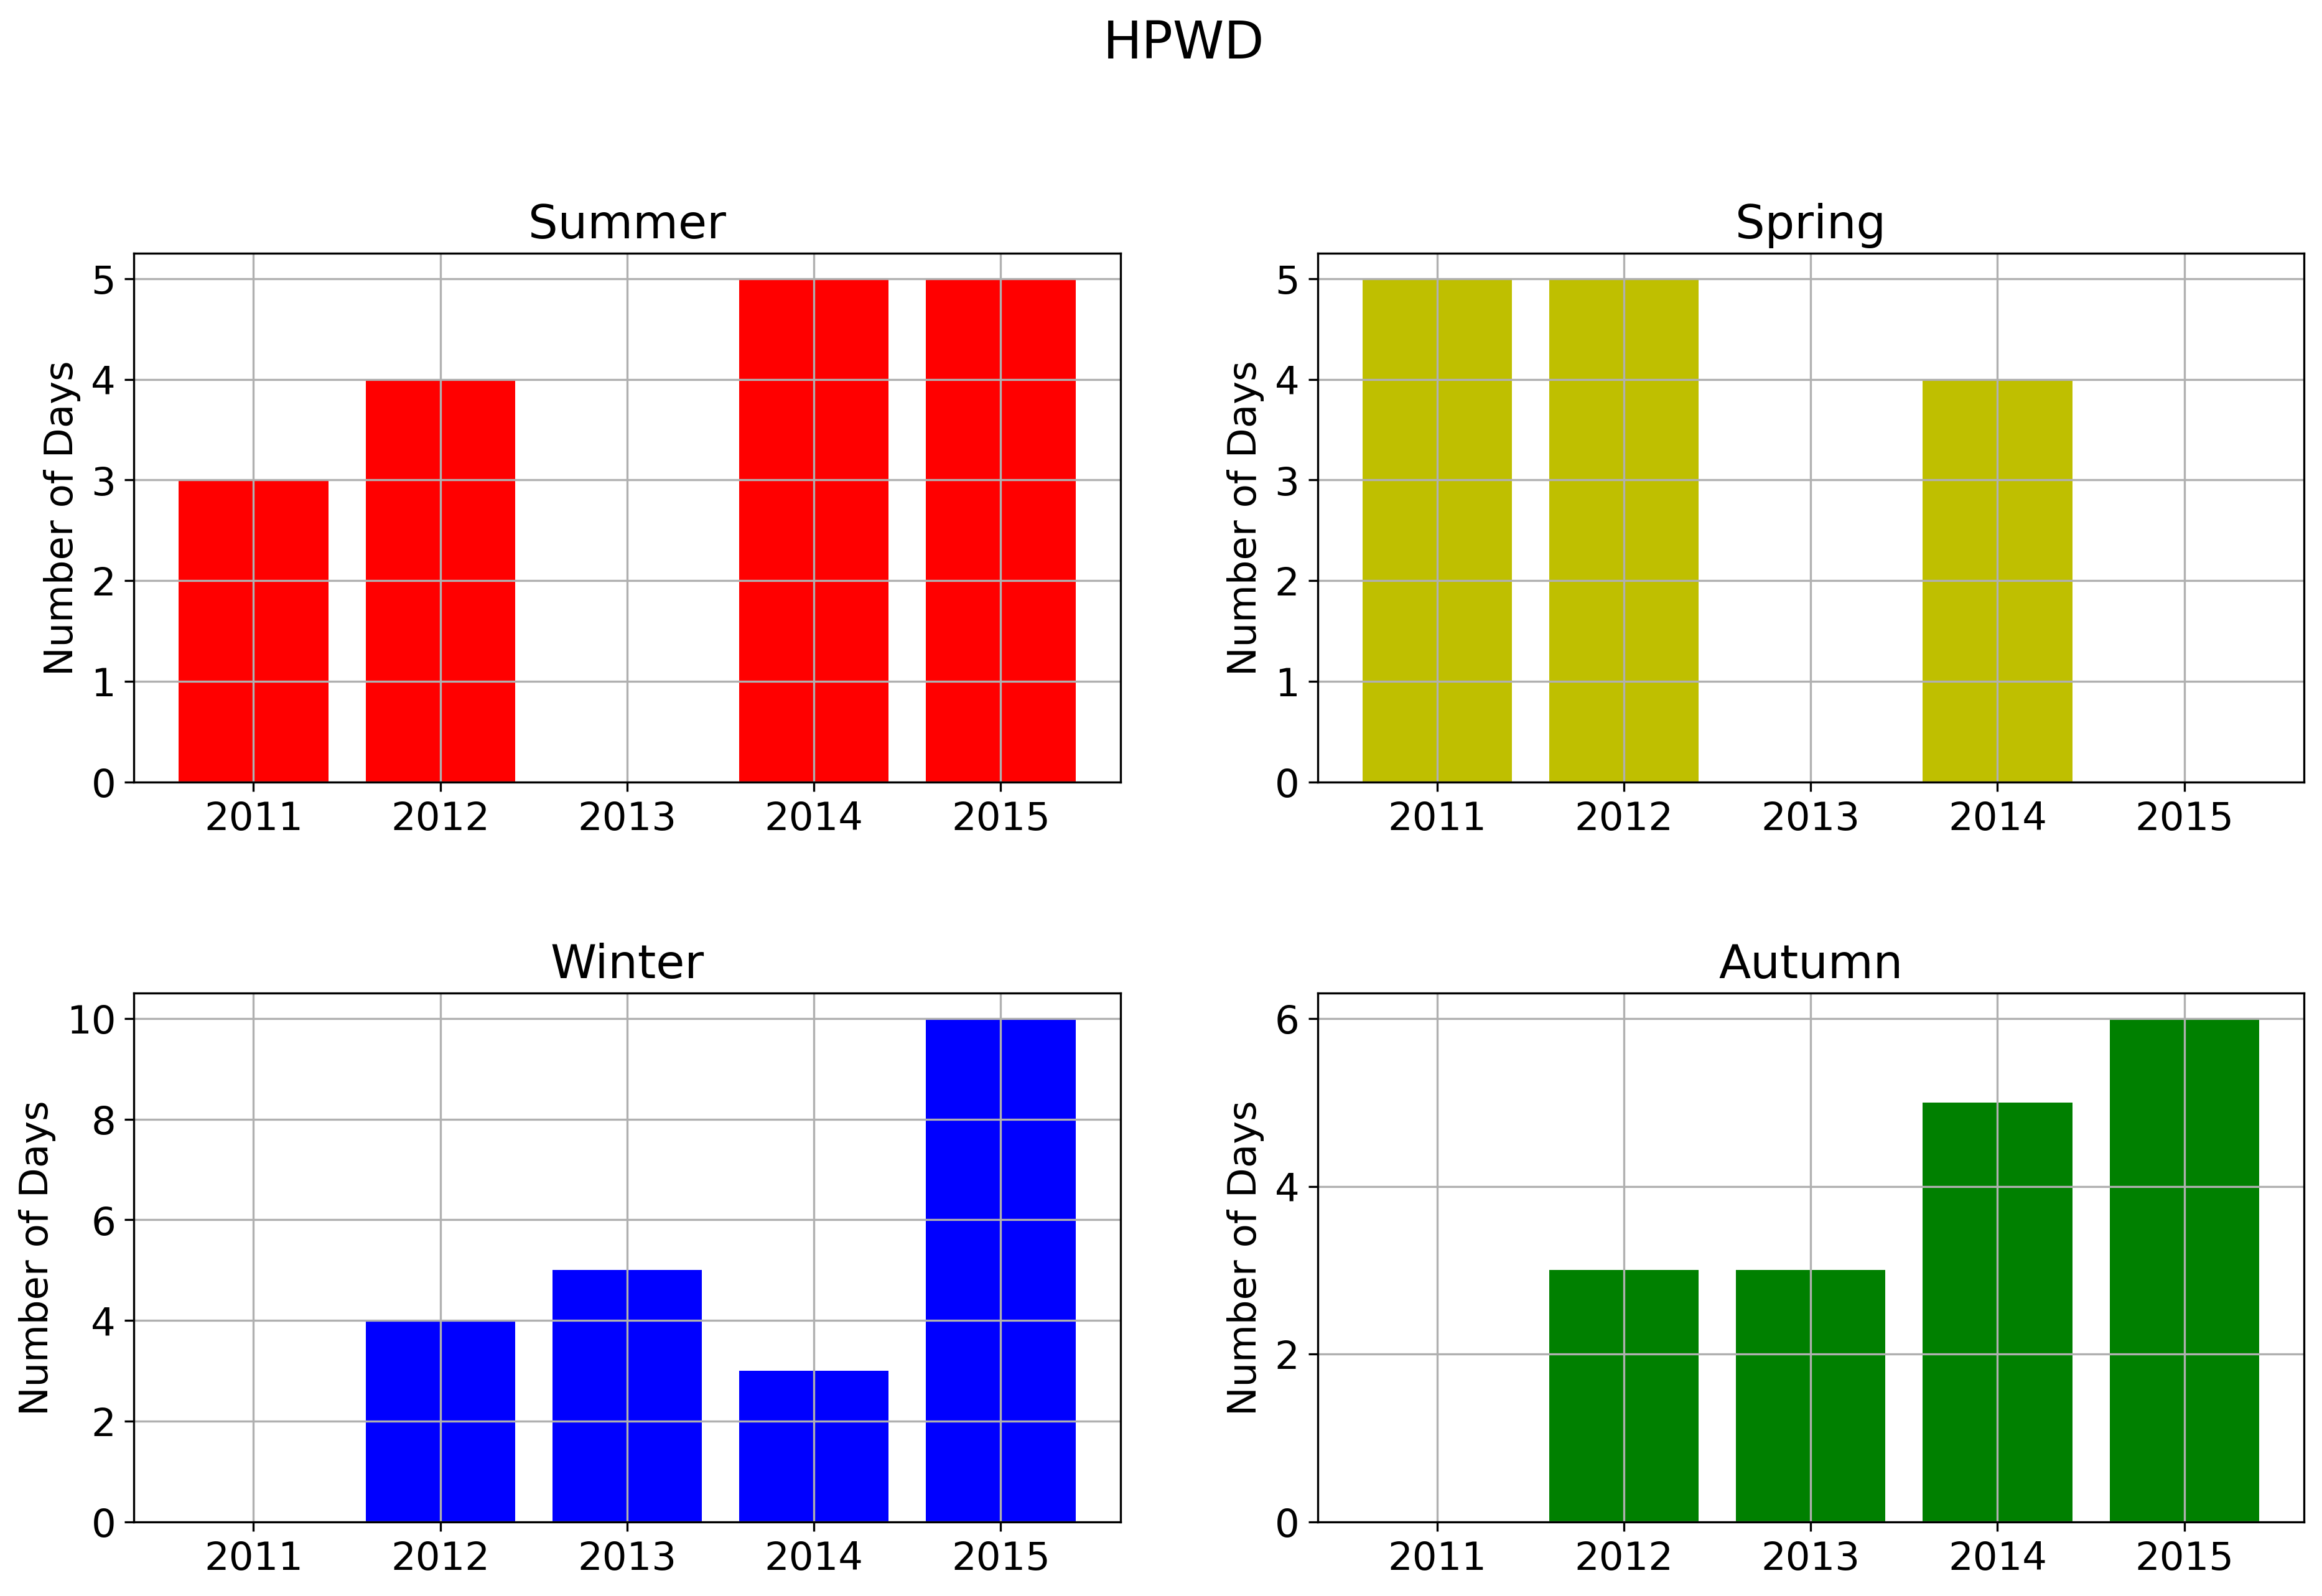

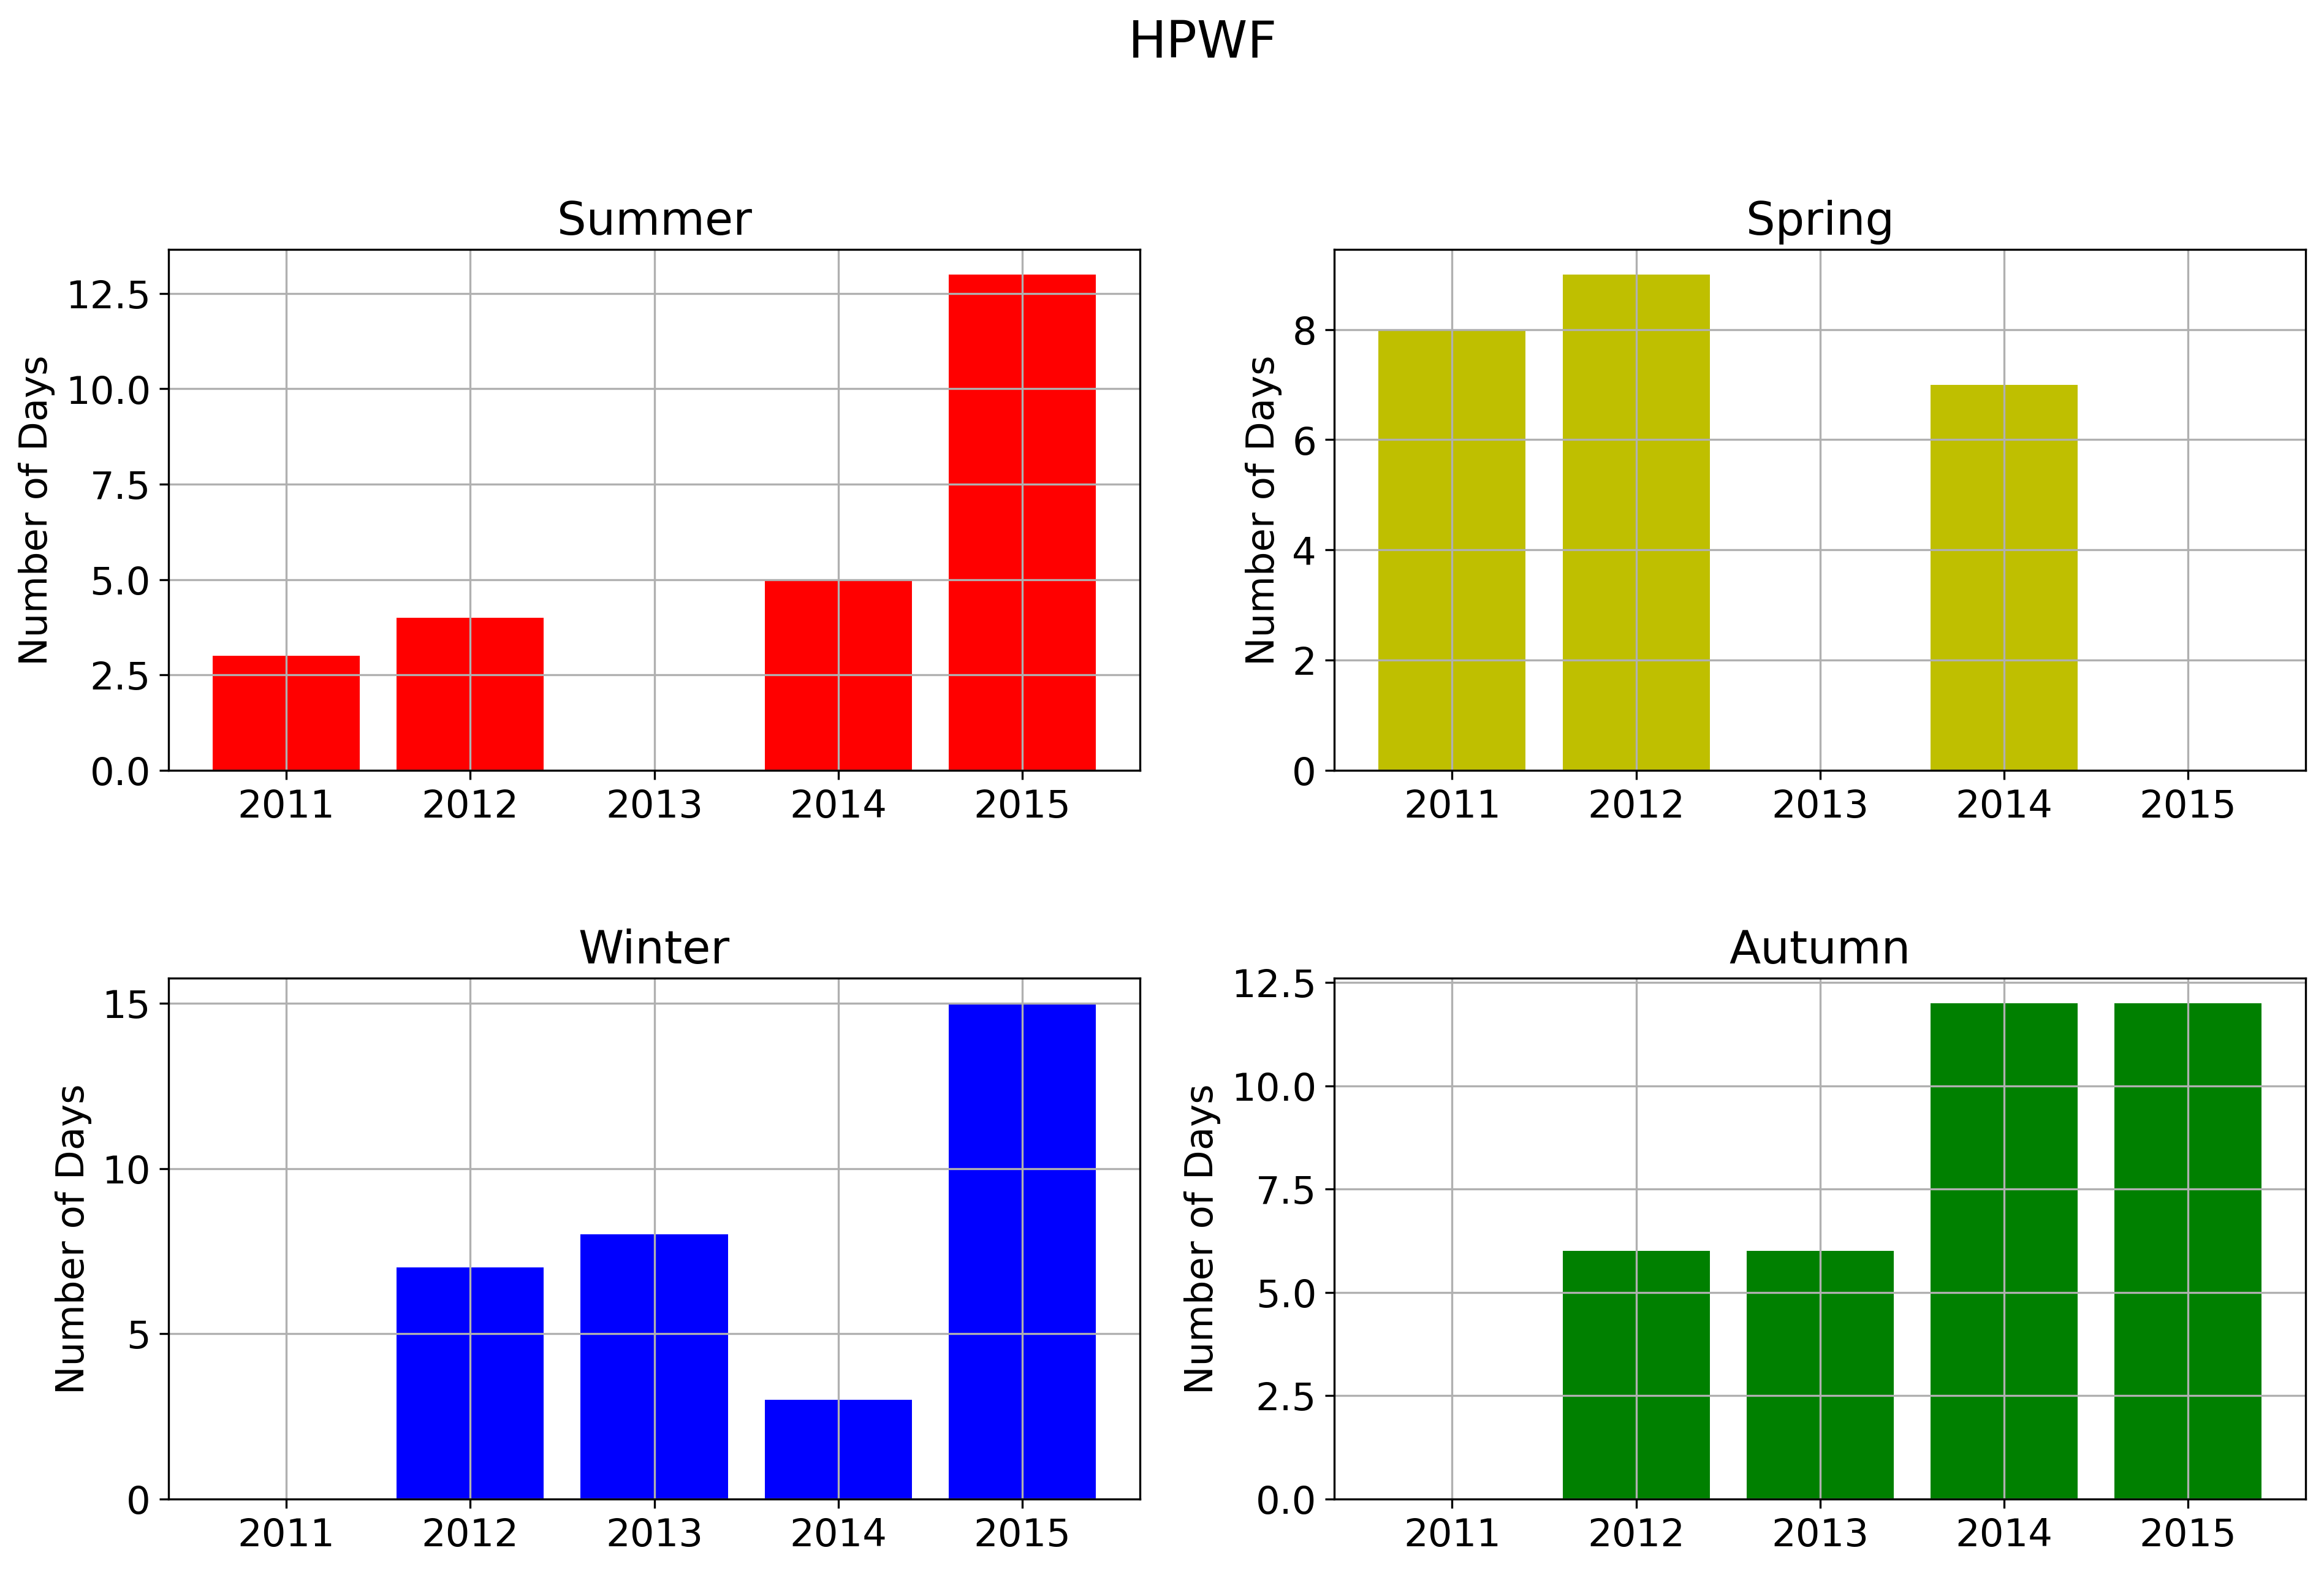

In [79]:
tex.wave_seasonMetrics(database_pressure,'HPW',True)

### Pressure range

Pressure range above the 90th percentile.


In [80]:
help(tex.check_PressureAboveRange)

Help on function check_PressureAboveRange in module climatex:

check_PressureAboveRange(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for days with a high range of pressure according to the Climatic Normal
    ##
    ## It first create a column for range in the database and in the Climatic normal. 
    ## Then it obtains a dataframe with the percentiles computed from the Climatic Normal
    ## according to the defined window size (df_pct). Then compares it with the database,
    ## to check if the range is above the percentile. If it is above the threshold, 
    ## the column 'above_pct' receives 1.
    ##
    ## Climatic Normal dataframe needs to have at least 'DATE' and 'pct_column'
    ## Database dataframe needs to have at least 'DA

In [81]:
#get dataframe with columns 'above_pct_range' indicating the occurence of the event
#and the dataframe with the 90th percentile for temperature range
database_pressure, df_pct = tex.check_PressureAboveRange(database_pressure,'Pressure_max(HPA)','Pressure_min(HPA)',climatic_norm_pressure,'Pressure_max(HPA)','Pressure_min(HPA)')

In [82]:
database_pressure

DAY365       DATE  ...  Pressure range  above_pct_range
0          1 2011-01-01  ...            30.0                1
1          2 2011-01-02  ...            30.0                1
2          3 2011-01-03  ...            30.0                1
3          4 2011-01-04  ...            30.0                1
4          5 2011-01-05  ...            30.0                1
...      ...        ...  ...             ...              ...
1820     361 2015-12-27  ...            30.0                1
1821     362 2015-12-28  ...            30.0                1
1822     363 2015-12-29  ...            30.0                1
1823     364 2015-12-30  ...            30.0                1
1824     365 2015-12-31  ...            30.0                1

[1825 rows x 11 columns]

In [83]:
df_pct

C90pct
DAY365        
1         30.0
2         30.0
3         30.0
4         30.0
5         30.0
...        ...
361       30.0
362       30.0
363       30.0
364       30.0
365       30.0

[365 rows x 1 columns]

RND
YEAR     
2011  365
2012  364
2013  365
2014  365
2015  365

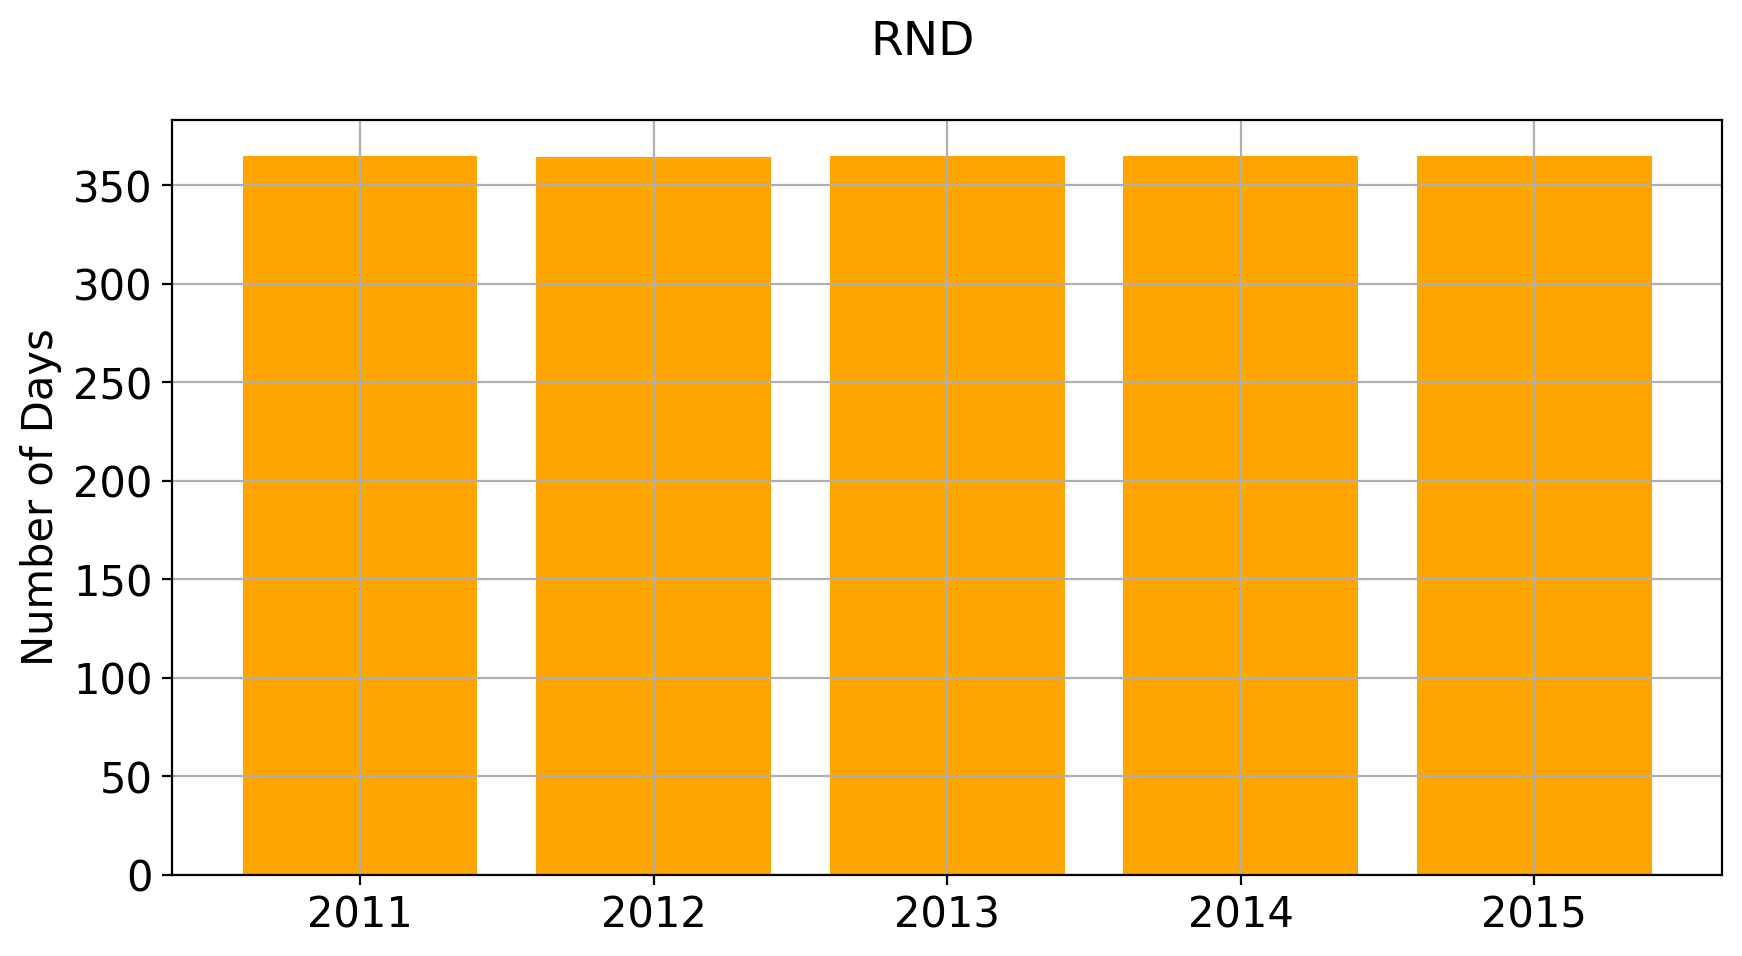

In [84]:
tex.range_metrics(database_pressure,True)

RND
YEAR SEASON     
2011 1        90
     2        92
     3        92
     4        91
2012 1        90
     2        92
     3        91
     4        91
2013 1        90
     2        92
     3        92
     4        91
2014 1        90
     2        92
     3        92
     4        91
2015 1        90
     2        92
     3        92
     4        91

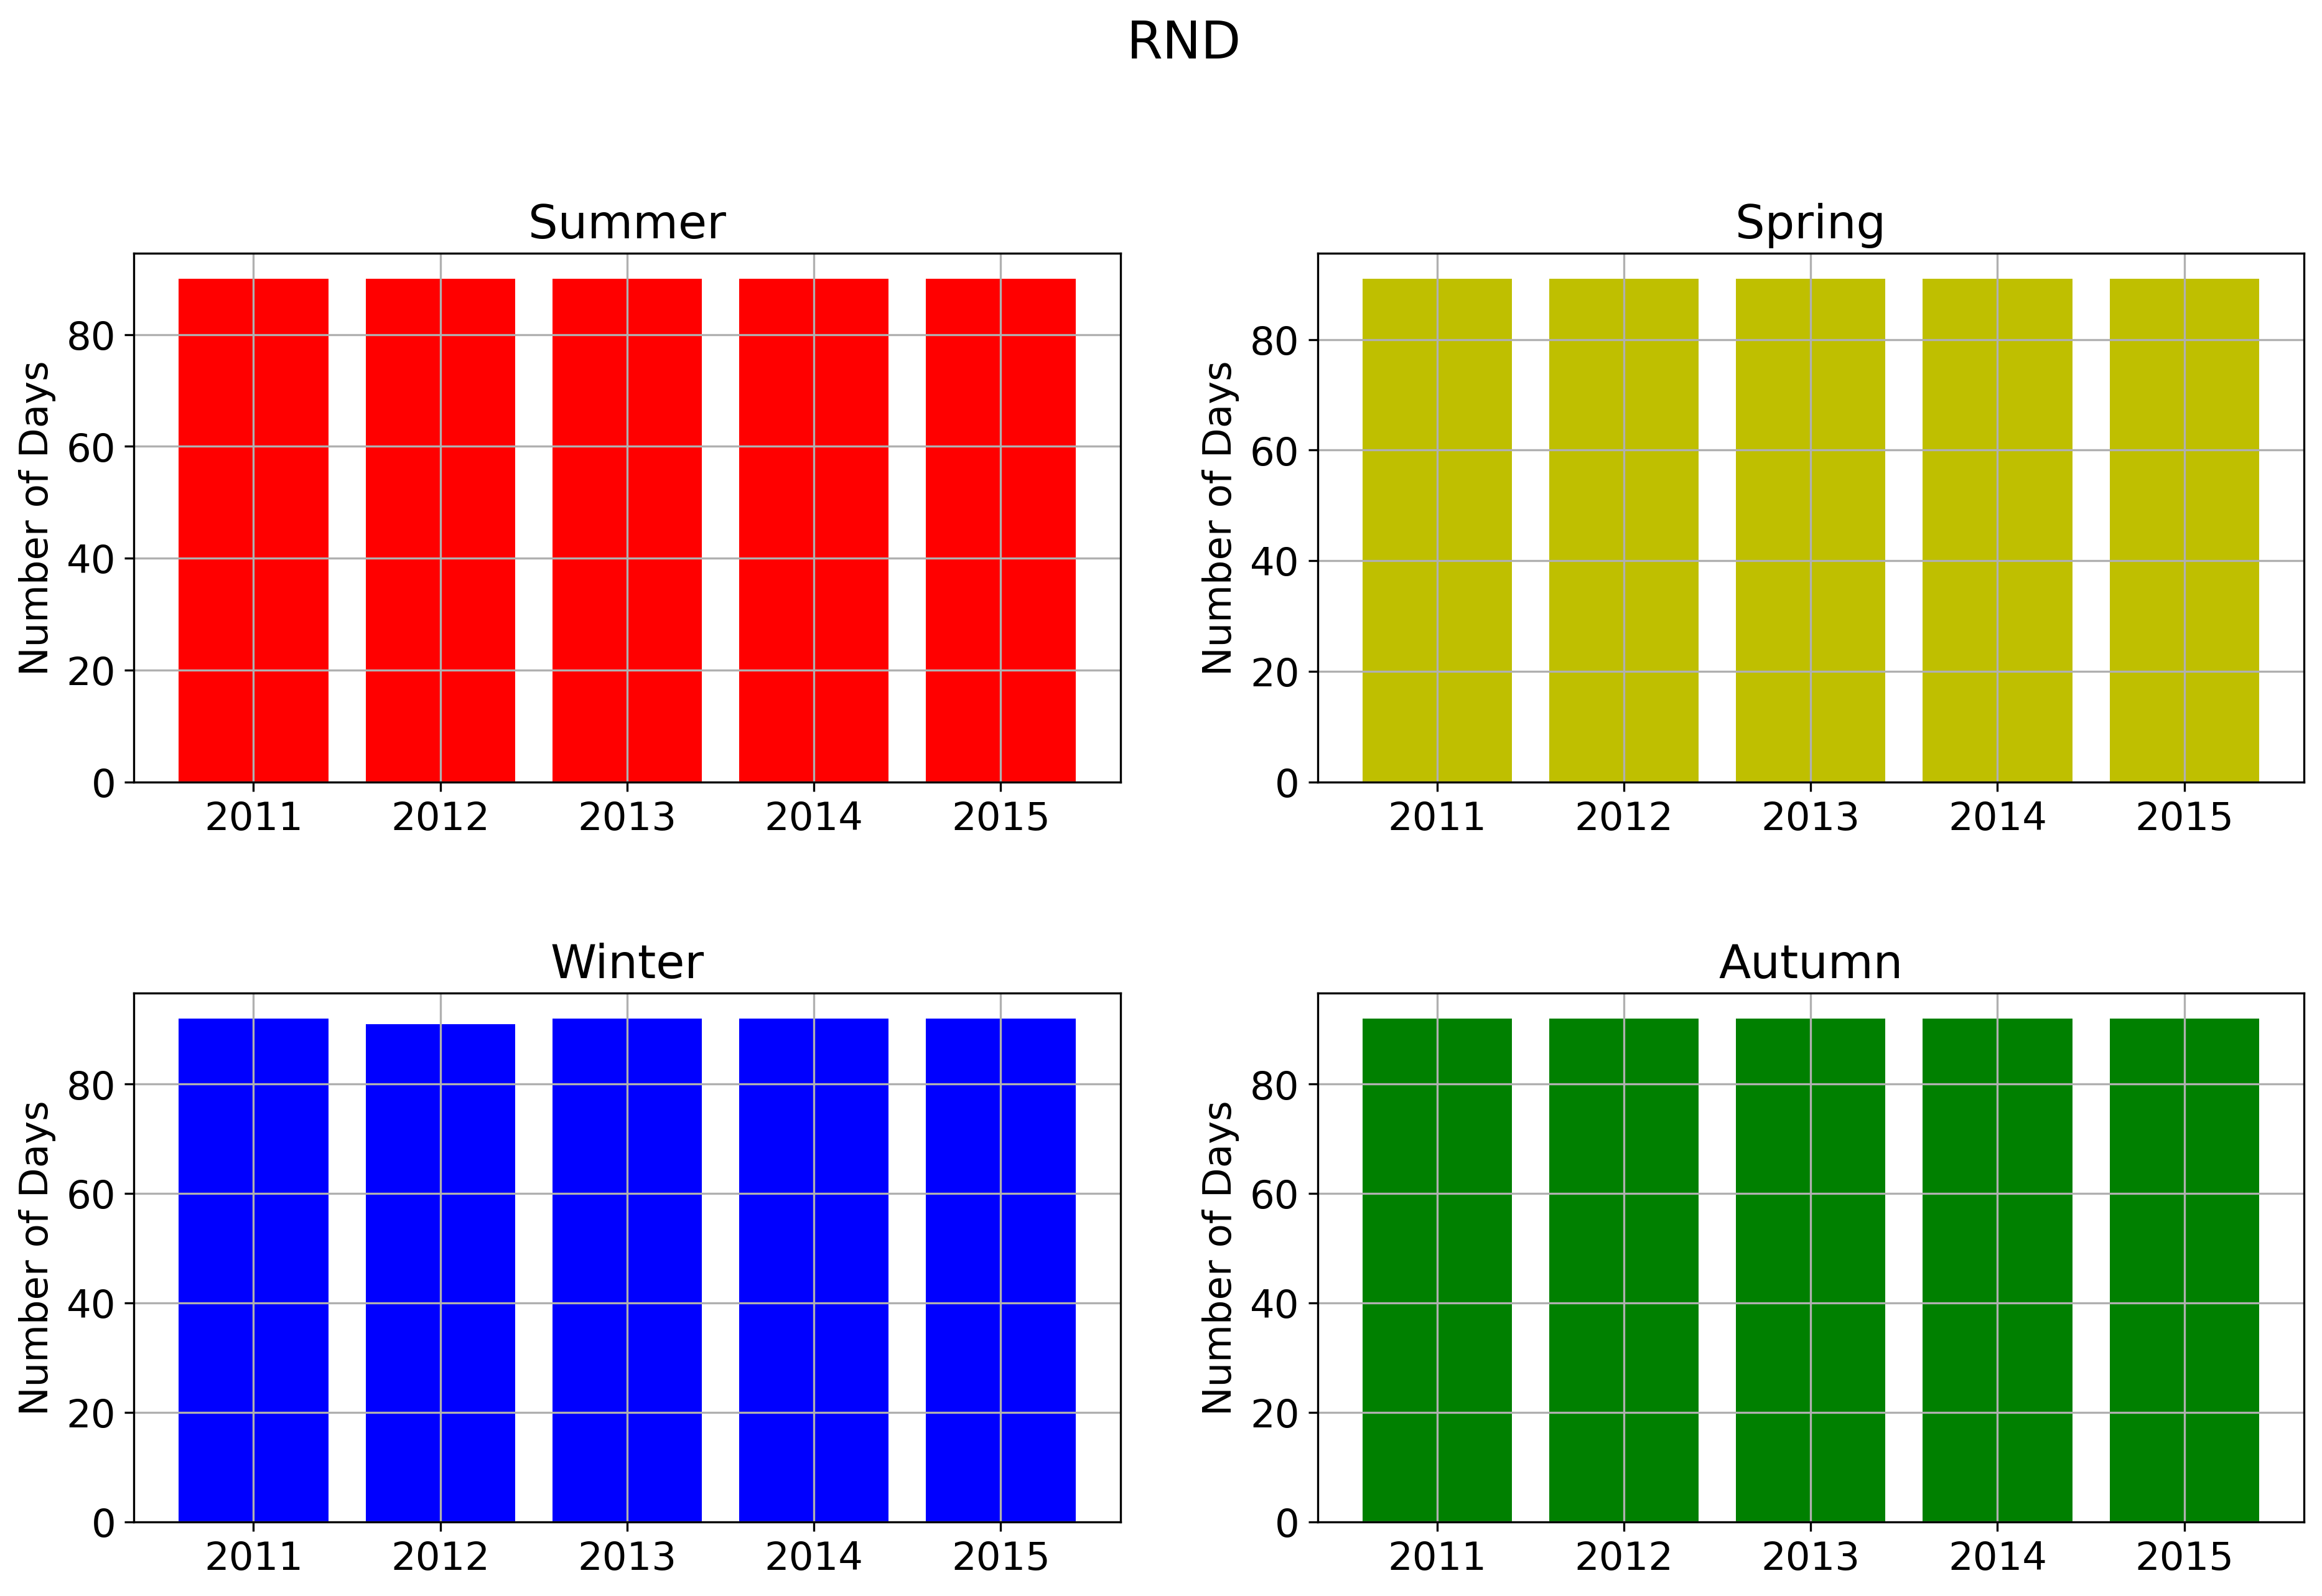

In [85]:
tex.range_seasonMetrics(database_pressure,True)

### Pressure Difference between days

Difference between maximum and minimum humidity between subsequent days above 90th percentile.

In [86]:
help(tex.check_Pressure_difdays)

Help on function check_Pressure_difdays in module climatex:

check_Pressure_difdays(database, db_columnMAX, db_columnMIN, climatic_normal, pct_columnMAX, pct_columnMIN, db_columnDay365=False, db_complete=False, cn_columnDay365=False, df_pct=None, percentile_value=0.9, window_size=15)
    #-------------------------------------------------------------------------------
    ## Checks for subsequent days with a high difference of pressure according to the Climatic Normal
    ##
    ## It first creates columns for the absolute value of difference between maximum
    ## pressure (Dif_max) between two subsequent days and for the difference between minimum
    ## pressure (Dif_min) between two subsequent days in the databate and in the Climatic normal.
    ## It then creates a column 'control' that is equal 1 when dif_max and dif_min have the
    ## same sign (or both positive or both negative).
    ## Then it obtains a  dataframe with the percentiles computed from the
    ## Climatic Normal a

In [87]:
#get dataframe with columns 'above_pct_dif' indicating the occurence of a event
#and the dataframe with the 90th percentile for maximum and minimum pressure difference
database_pressure, df_pct = tex.check_Pressure_difdays(database_pressure,'Pressure_max(HPA)','Pressure_min(HPA)',climatic_norm_pressure,'Pressure_max(HPA)','Pressure_min(HPA)')

In [88]:
database_pressure

DAY365       DATE  Pressure_max(HPA)  ...   Dif_min   Dif_max  above_pct_dif
0          1 2011-01-01         954.900000  ...       NaN       NaN              0
1          2 2011-01-02         955.710345  ...  0.810345  0.810345              0
2          3 2011-01-03         958.120833  ...  2.410489  2.410489              0
3          4 2011-01-04         958.720833  ...  0.600000  0.600000              0
4          5 2011-01-05         957.548000  ... -1.172833 -1.172833              0
...      ...        ...                ...  ...       ...       ...            ...
1820     361 2015-12-27         962.583333  ...  2.033333  2.033333              0
1821     362 2015-12-28         962.325000  ... -0.258333 -0.258333              0
1822     363 2015-12-29         961.611538  ... -0.713462 -0.713462              0
1823     364 2015-12-30         959.528000  ... -2.083538 -2.083538              0
1824     365 2015-12-31         959.688000  ...  0.160000  0.160000              0

[1825 rows x 15 columns]

In [89]:
df_pct

CMX90pct  CMN90pct
DAY365                    
1       2.848077  2.848077
2       2.844662  2.844662
3       2.815895  2.815895
4       2.697387  2.697387
5       2.712283  2.712283
...          ...       ...
361     2.949259  2.949259
362     2.917278  2.917278
363     2.858462  2.858462
364     2.798166  2.798166
365     2.741667  2.741667

[365 rows x 2 columns]

DND
YEAR     
2011   39
2012   33
2013   43
2014   31
2015   39

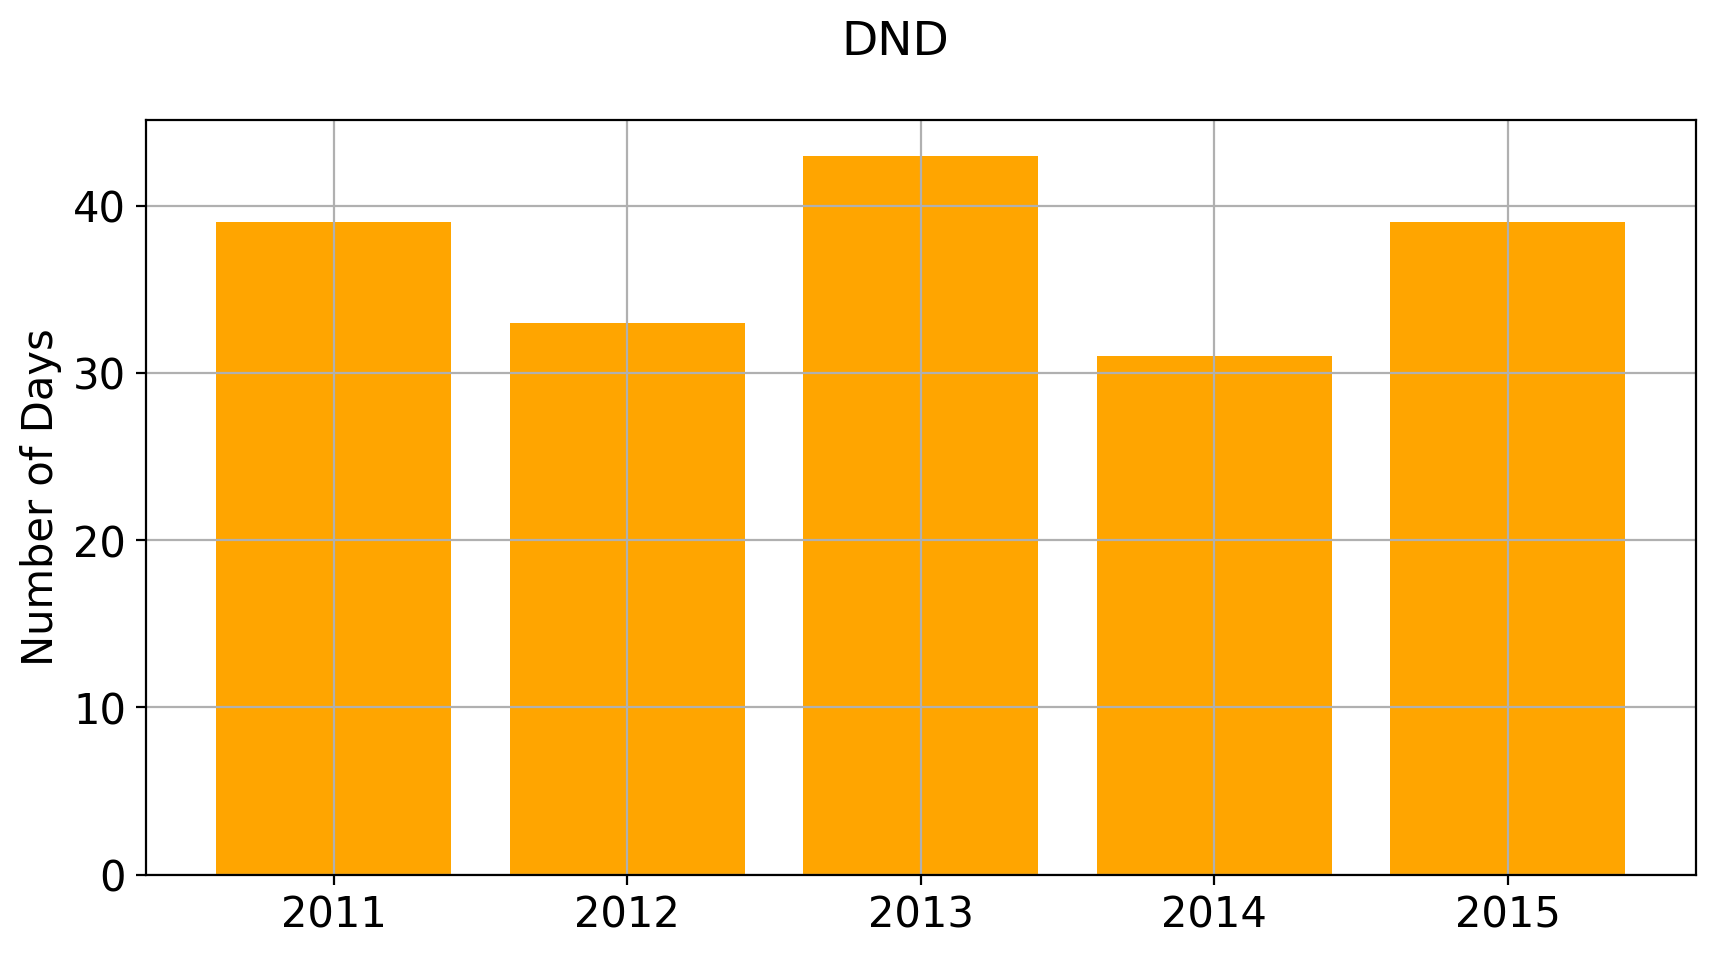

In [90]:
tex.dif_metrics(database_pressure,True)

RND
YEAR SEASON     
2011 1         9
     2         8
     3        10
     4        12
2012 1         7
     2         8
     3        12
     4         6
2013 1        10
     2        12
     3         7
     4        14
2014 1         9
     2         3
     3        12
     4         7
2015 1        10
     2         8
     3        10
     4        11

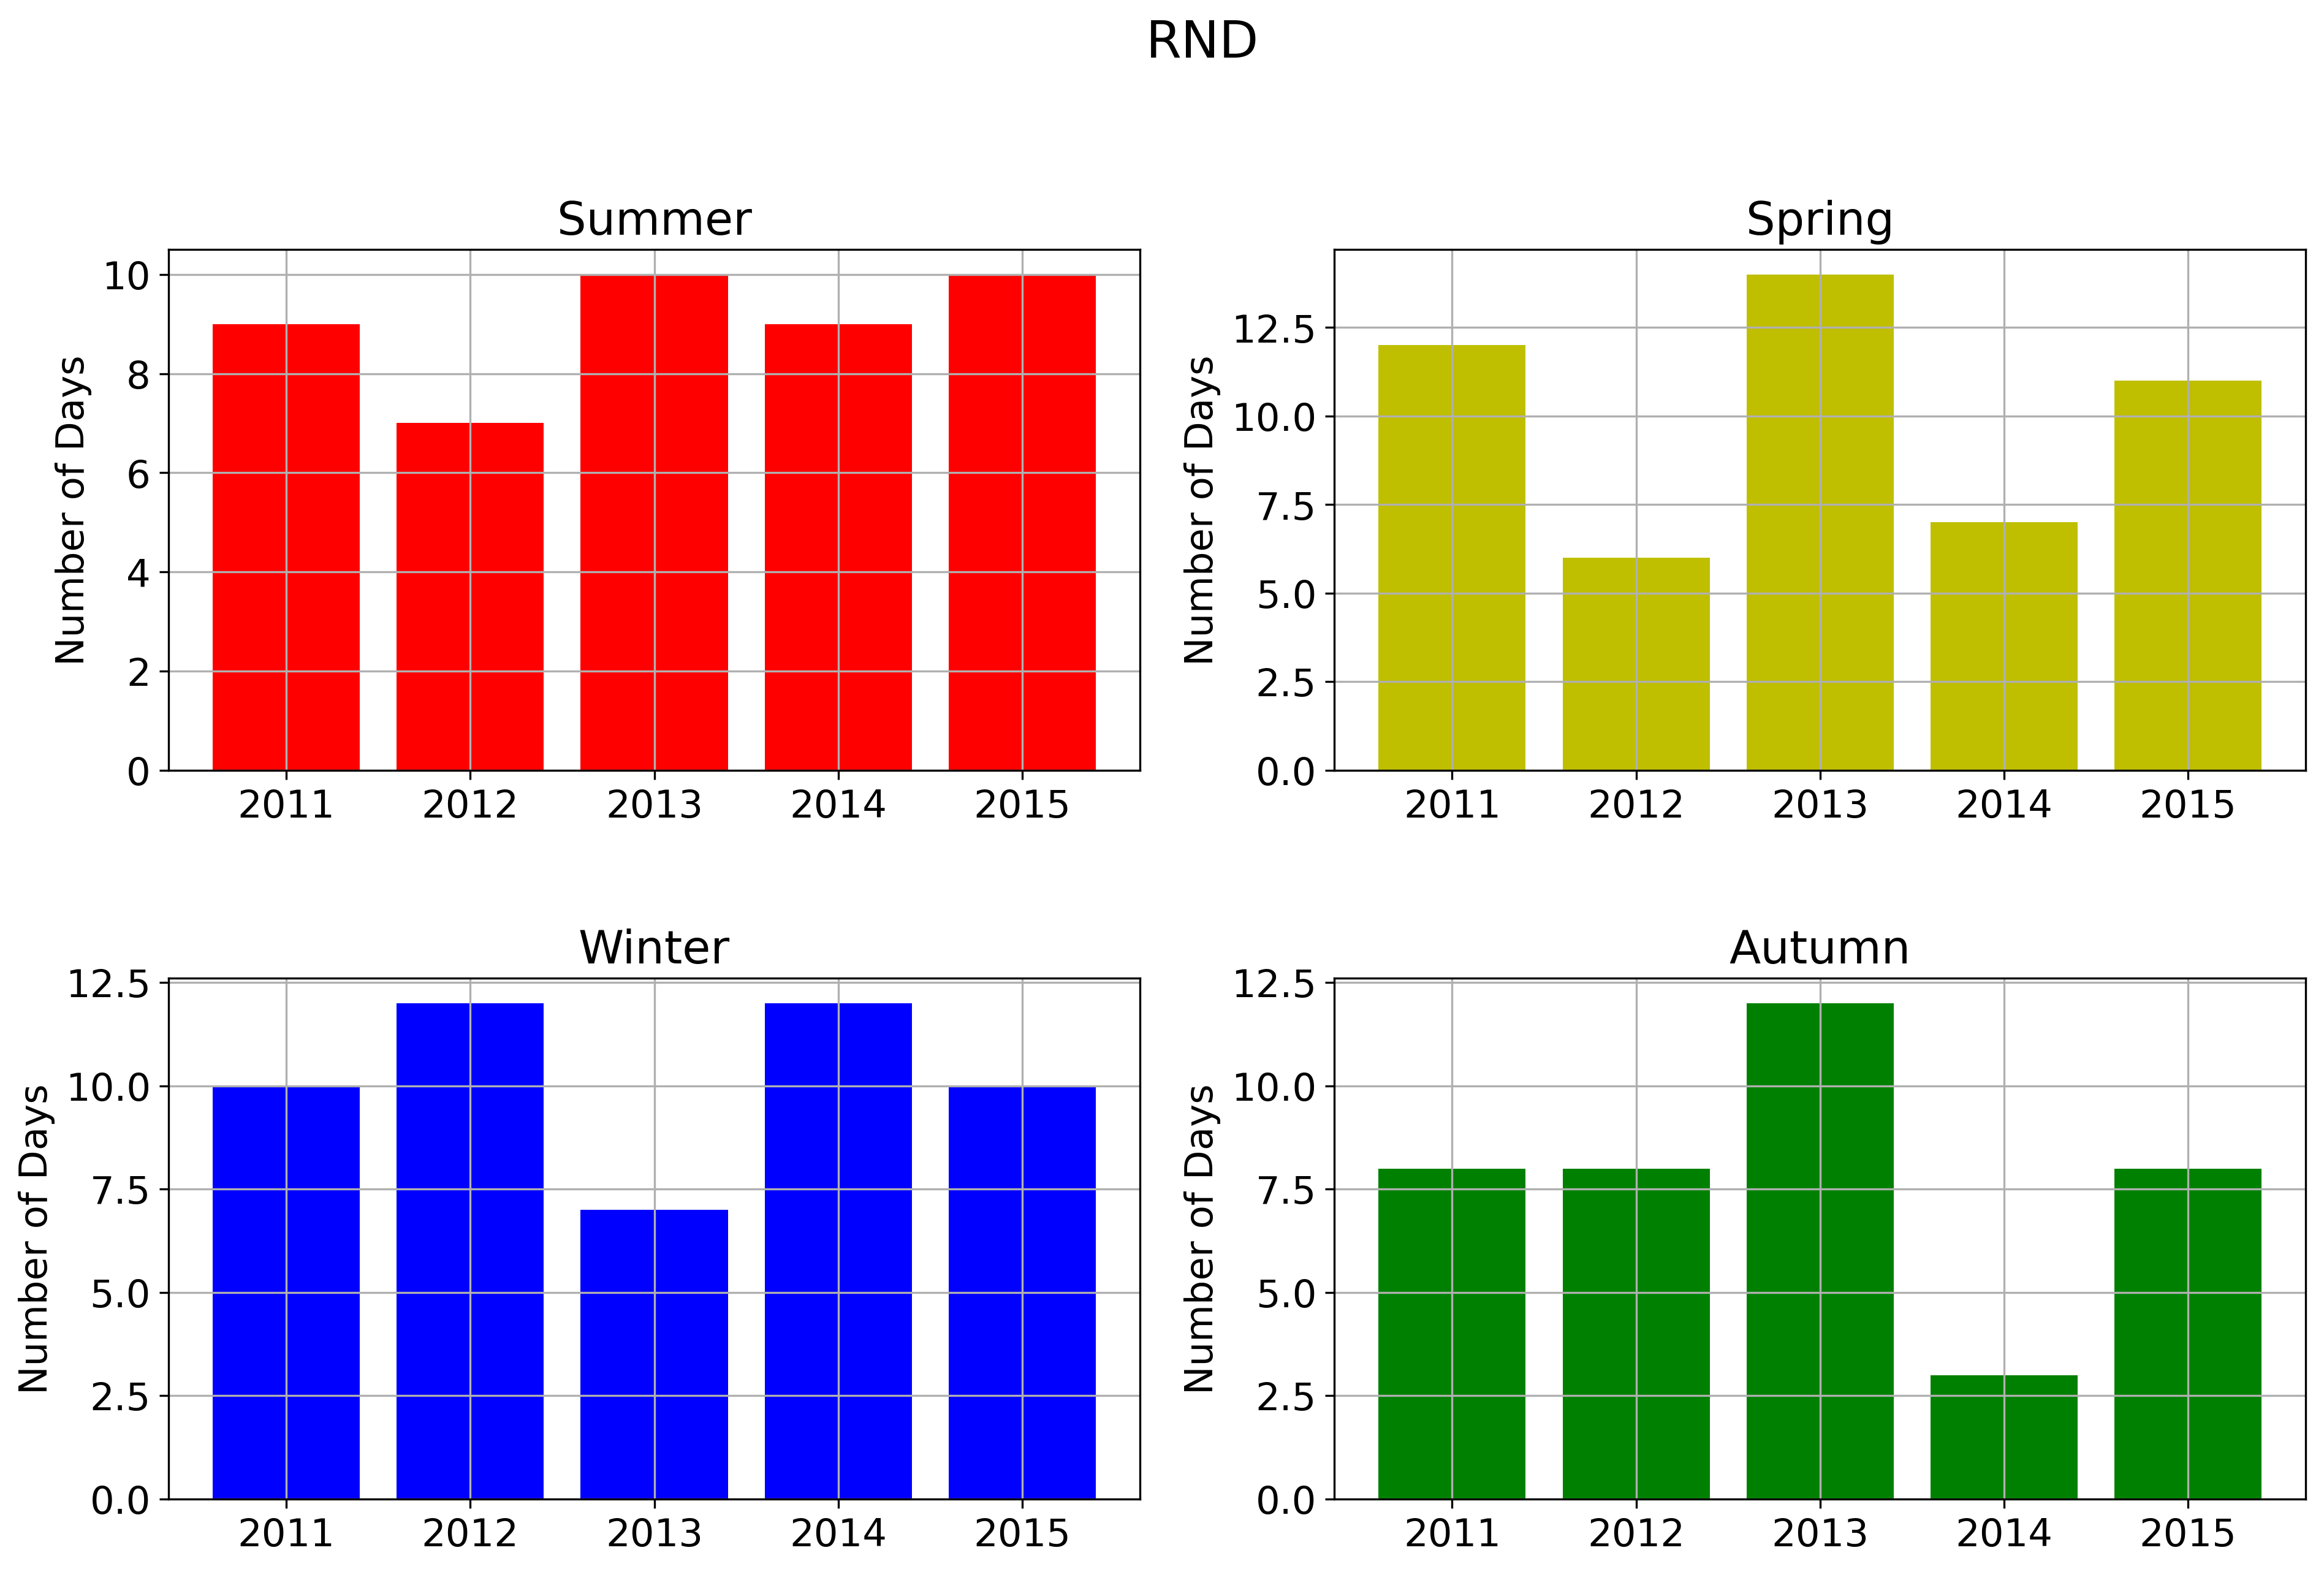

In [91]:
tex.dif_seasonMetrics(database_pressure,True)